In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hmelqcsv/hmelq.csv


In [2]:
data = pd.read_csv("/kaggle/input/hmelqcsv/hmelq.csv")

In [3]:
data.head()

bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327

In [4]:
data = data.dropna(how='any')

In [5]:
HomeImp = pd.get_dummies(data['reason'], drop_first =True)
jobs = pd.get_dummies(data['job'], drop_first =True)
data=pd.concat([data,HomeImp,jobs],axis=1)
data.head()

bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  HomeImp  Office  Other  ProfEx  Sales  Self  
153  168.96   2.0  26.0   36.056        0       0      0       0      0     0  
154   64.51   6.0  24.0   38.079        0       0      0       0      0     0  
155  196.01   3.0  50.0   42.459        0       0      0       0      0     0  
156  131.47   0.0  22.0   29.200        1       0      0       0      0     0  
157   95.36   1.0  17.0   27.108        0       0      0       0      0     0

In [6]:
data.drop(['reason','job'],axis =1,inplace=True)


In [7]:
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
HomeImp    0
Office     0
Other      0
ProfEx     0
Sales      0
Self       0
dtype: int64

In [8]:
X = data.loc[:, data.columns != 'bad']
y = data.loc[:, data.columns == 'bad']


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [10]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier()

In [11]:
?model

In [12]:
model.fit(X_train,y_train)

Learning rate set to 0.012295
0:	learn: 0.6786357	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6647797	total: 58.1ms	remaining: 29s
2:	learn: 0.6517207	total: 60.5ms	remaining: 20.1s
3:	learn: 0.6399588	total: 62.8ms	remaining: 15.6s
4:	learn: 0.6276171	total: 65ms	remaining: 12.9s
5:	learn: 0.6152551	total: 67.2ms	remaining: 11.1s
6:	learn: 0.6033292	total: 69.3ms	remaining: 9.83s
7:	learn: 0.5924068	total: 71.4ms	remaining: 8.85s
8:	learn: 0.5804813	total: 73.8ms	remaining: 8.12s
9:	learn: 0.5697300	total: 75.9ms	remaining: 7.51s
10:	learn: 0.5598782	total: 78ms	remaining: 7.02s
11:	learn: 0.5505297	total: 80.3ms	remaining: 6.62s
12:	learn: 0.5407460	total: 82.5ms	remaining: 6.26s
13:	learn: 0.5305920	total: 84.7ms	remaining: 5.97s
14:	learn: 0.5209468	total: 86.9ms	remaining: 5.71s
15:	learn: 0.5112860	total: 89.1ms	remaining: 5.48s
16:	learn: 0.5035069	total: 91.1ms	remaining: 5.27s
17:	learn: 0.4951656	total: 92.5ms	remaining: 5.05s
18:	learn: 0.4871322	total: 94.7ms	remaining: 4.89

239:	learn: 0.1595709	total: 578ms	remaining: 1.83s
240:	learn: 0.1592215	total: 580ms	remaining: 1.83s
241:	learn: 0.1588815	total: 583ms	remaining: 1.82s
242:	learn: 0.1586736	total: 585ms	remaining: 1.82s
243:	learn: 0.1584033	total: 587ms	remaining: 1.82s
244:	learn: 0.1581892	total: 589ms	remaining: 1.81s
245:	learn: 0.1578592	total: 591ms	remaining: 1.81s
246:	learn: 0.1576857	total: 593ms	remaining: 1.81s
247:	learn: 0.1573430	total: 596ms	remaining: 1.81s
248:	learn: 0.1570423	total: 598ms	remaining: 1.8s
249:	learn: 0.1565963	total: 600ms	remaining: 1.8s
250:	learn: 0.1563660	total: 602ms	remaining: 1.8s
251:	learn: 0.1559835	total: 605ms	remaining: 1.79s
252:	learn: 0.1557803	total: 607ms	remaining: 1.79s
253:	learn: 0.1556547	total: 609ms	remaining: 1.79s
254:	learn: 0.1553386	total: 611ms	remaining: 1.78s
255:	learn: 0.1550044	total: 614ms	remaining: 1.78s
256:	learn: 0.1547175	total: 616ms	remaining: 1.78s
257:	learn: 0.1545849	total: 618ms	remaining: 1.78s
258:	learn: 0.1

415:	learn: 0.1234803	total: 964ms	remaining: 1.35s
416:	learn: 0.1232818	total: 967ms	remaining: 1.35s
417:	learn: 0.1230630	total: 969ms	remaining: 1.35s
418:	learn: 0.1229334	total: 971ms	remaining: 1.35s
419:	learn: 0.1227224	total: 974ms	remaining: 1.34s
420:	learn: 0.1226100	total: 976ms	remaining: 1.34s
421:	learn: 0.1225116	total: 978ms	remaining: 1.34s
422:	learn: 0.1223575	total: 980ms	remaining: 1.34s
423:	learn: 0.1222619	total: 982ms	remaining: 1.33s
424:	learn: 0.1221504	total: 984ms	remaining: 1.33s
425:	learn: 0.1220558	total: 986ms	remaining: 1.33s
426:	learn: 0.1219579	total: 989ms	remaining: 1.33s
427:	learn: 0.1217215	total: 991ms	remaining: 1.32s
428:	learn: 0.1216103	total: 993ms	remaining: 1.32s
429:	learn: 0.1214723	total: 995ms	remaining: 1.32s
430:	learn: 0.1213271	total: 998ms	remaining: 1.32s
431:	learn: 0.1210784	total: 1s	remaining: 1.31s
432:	learn: 0.1210298	total: 1s	remaining: 1.31s
433:	learn: 0.1208403	total: 1s	remaining: 1.31s
434:	learn: 0.1204991

586:	learn: 0.0984793	total: 1.34s	remaining: 947ms
587:	learn: 0.0982282	total: 1.35s	remaining: 946ms
588:	learn: 0.0981732	total: 1.35s	remaining: 943ms
589:	learn: 0.0979927	total: 1.35s	remaining: 941ms
590:	learn: 0.0978298	total: 1.36s	remaining: 938ms
591:	learn: 0.0977070	total: 1.36s	remaining: 936ms
592:	learn: 0.0975849	total: 1.36s	remaining: 934ms
593:	learn: 0.0974835	total: 1.36s	remaining: 931ms
594:	learn: 0.0974064	total: 1.36s	remaining: 929ms
595:	learn: 0.0973058	total: 1.37s	remaining: 927ms
596:	learn: 0.0971831	total: 1.37s	remaining: 924ms
597:	learn: 0.0970342	total: 1.37s	remaining: 922ms
598:	learn: 0.0969857	total: 1.37s	remaining: 919ms
599:	learn: 0.0968715	total: 1.38s	remaining: 917ms
600:	learn: 0.0967744	total: 1.38s	remaining: 915ms
601:	learn: 0.0966121	total: 1.38s	remaining: 912ms
602:	learn: 0.0964694	total: 1.38s	remaining: 910ms
603:	learn: 0.0962839	total: 1.38s	remaining: 908ms
604:	learn: 0.0961625	total: 1.39s	remaining: 905ms
605:	learn: 

747:	learn: 0.0807191	total: 1.73s	remaining: 582ms
748:	learn: 0.0806007	total: 1.73s	remaining: 580ms
749:	learn: 0.0804646	total: 1.73s	remaining: 578ms
750:	learn: 0.0804505	total: 1.74s	remaining: 576ms
751:	learn: 0.0802584	total: 1.74s	remaining: 574ms
752:	learn: 0.0801448	total: 1.74s	remaining: 572ms
753:	learn: 0.0800923	total: 1.75s	remaining: 569ms
754:	learn: 0.0800019	total: 1.75s	remaining: 567ms
755:	learn: 0.0799225	total: 1.75s	remaining: 565ms
756:	learn: 0.0798262	total: 1.75s	remaining: 563ms
757:	learn: 0.0797970	total: 1.76s	remaining: 561ms
758:	learn: 0.0797774	total: 1.76s	remaining: 559ms
759:	learn: 0.0797507	total: 1.77s	remaining: 558ms
760:	learn: 0.0797038	total: 1.77s	remaining: 556ms
761:	learn: 0.0796914	total: 1.77s	remaining: 554ms
762:	learn: 0.0795402	total: 1.78s	remaining: 552ms
763:	learn: 0.0795057	total: 1.78s	remaining: 550ms
764:	learn: 0.0794741	total: 1.78s	remaining: 548ms
765:	learn: 0.0793283	total: 1.78s	remaining: 545ms
766:	learn: 

974:	learn: 0.0630098	total: 2.31s	remaining: 59.2ms
975:	learn: 0.0628905	total: 2.31s	remaining: 56.8ms
976:	learn: 0.0628731	total: 2.31s	remaining: 54.4ms
977:	learn: 0.0627648	total: 2.31s	remaining: 52.1ms
978:	learn: 0.0627101	total: 2.32s	remaining: 49.7ms
979:	learn: 0.0625940	total: 2.32s	remaining: 47.3ms
980:	learn: 0.0625227	total: 2.32s	remaining: 45ms
981:	learn: 0.0624076	total: 2.32s	remaining: 42.6ms
982:	learn: 0.0623496	total: 2.33s	remaining: 40.2ms
983:	learn: 0.0623021	total: 2.33s	remaining: 37.8ms
984:	learn: 0.0622551	total: 2.33s	remaining: 35.5ms
985:	learn: 0.0622035	total: 2.33s	remaining: 33.1ms
986:	learn: 0.0621130	total: 2.33s	remaining: 30.7ms
987:	learn: 0.0620304	total: 2.34s	remaining: 28.4ms
988:	learn: 0.0619353	total: 2.34s	remaining: 26ms
989:	learn: 0.0618600	total: 2.34s	remaining: 23.6ms
990:	learn: 0.0617839	total: 2.34s	remaining: 21.3ms
991:	learn: 0.0617418	total: 2.34s	remaining: 18.9ms
992:	learn: 0.0616320	total: 2.35s	remaining: 16.5

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

0.9643564356435643

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

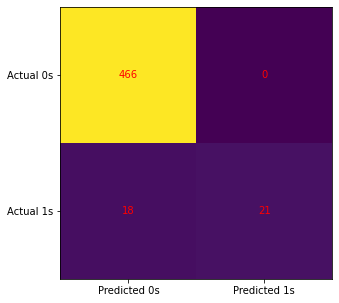

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [17]:
from skopt.space import Real, Categorical, Integer
params = {'depth'         : [3,4,5,6,8,10],
                  'learning_rate' : [0.01,0.02, 0.05, 0.1],
                  'iterations'    : [30, 50, 100,500]
                 }
          
          

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
nb_cv = GridSearchCV(model, params)
nb_cv.fit(X_train, y_train)


0:	learn: 0.6867065	total: 945us	remaining: 27.4ms
1:	learn: 0.6803240	total: 2.04ms	remaining: 28.5ms
2:	learn: 0.6736844	total: 2.79ms	remaining: 25.1ms
3:	learn: 0.6678512	total: 3.49ms	remaining: 22.7ms
4:	learn: 0.6620833	total: 4.17ms	remaining: 20.8ms
5:	learn: 0.6563992	total: 4.87ms	remaining: 19.5ms
6:	learn: 0.6506301	total: 5.78ms	remaining: 19ms
7:	learn: 0.6444315	total: 6.66ms	remaining: 18.3ms
8:	learn: 0.6382131	total: 7.5ms	remaining: 17.5ms
9:	learn: 0.6322264	total: 8.31ms	remaining: 16.6ms
10:	learn: 0.6263475	total: 9.13ms	remaining: 15.8ms
11:	learn: 0.6208993	total: 9.92ms	remaining: 14.9ms
12:	learn: 0.6156641	total: 10.8ms	remaining: 14.1ms
13:	learn: 0.6104204	total: 11.7ms	remaining: 13.4ms
14:	learn: 0.6055040	total: 12.6ms	remaining: 12.6ms
15:	learn: 0.6000823	total: 13.4ms	remaining: 11.7ms
16:	learn: 0.5950643	total: 14.2ms	remaining: 10.9ms
17:	learn: 0.5898212	total: 15ms	remaining: 10ms
18:	learn: 0.5849749	total: 15.8ms	remaining: 9.17ms
19:	learn: 

4:	learn: 0.6321979	total: 5.18ms	remaining: 25.9ms
5:	learn: 0.6212312	total: 6.3ms	remaining: 25.2ms
6:	learn: 0.6109998	total: 7.29ms	remaining: 24ms
7:	learn: 0.6000473	total: 8.23ms	remaining: 22.6ms
8:	learn: 0.5893495	total: 9.12ms	remaining: 21.3ms
9:	learn: 0.5792710	total: 9.98ms	remaining: 20ms
10:	learn: 0.5690459	total: 10.8ms	remaining: 18.6ms
11:	learn: 0.5601650	total: 11.6ms	remaining: 17.4ms
12:	learn: 0.5517597	total: 12.4ms	remaining: 16.2ms
13:	learn: 0.5434351	total: 13.1ms	remaining: 14.9ms
14:	learn: 0.5354798	total: 13.9ms	remaining: 13.9ms
15:	learn: 0.5270491	total: 14.6ms	remaining: 12.7ms
16:	learn: 0.5193899	total: 15.4ms	remaining: 11.8ms
17:	learn: 0.5112194	total: 16.2ms	remaining: 10.8ms
18:	learn: 0.5036103	total: 16.9ms	remaining: 9.77ms
19:	learn: 0.4970543	total: 17.6ms	remaining: 8.79ms
20:	learn: 0.4897278	total: 18.4ms	remaining: 7.88ms
21:	learn: 0.4827211	total: 19.1ms	remaining: 6.95ms
22:	learn: 0.4761346	total: 19.9ms	remaining: 6.06ms
23:	

3:	learn: 0.5796033	total: 4.75ms	remaining: 30.9ms
4:	learn: 0.5587448	total: 5.82ms	remaining: 29.1ms
5:	learn: 0.5379880	total: 6.84ms	remaining: 27.4ms
6:	learn: 0.5196747	total: 7.67ms	remaining: 25.2ms
7:	learn: 0.5005217	total: 8.66ms	remaining: 23.8ms
8:	learn: 0.4822838	total: 9.48ms	remaining: 22.1ms
9:	learn: 0.4658210	total: 10.2ms	remaining: 20.4ms
10:	learn: 0.4504175	total: 11ms	remaining: 19ms
11:	learn: 0.4375905	total: 11.9ms	remaining: 17.8ms
12:	learn: 0.4245341	total: 12.6ms	remaining: 16.5ms
13:	learn: 0.4119674	total: 13.3ms	remaining: 15.2ms
14:	learn: 0.4023262	total: 14ms	remaining: 14ms
15:	learn: 0.3910680	total: 14.7ms	remaining: 12.9ms
16:	learn: 0.3804240	total: 15.5ms	remaining: 11.8ms
17:	learn: 0.3709045	total: 16.2ms	remaining: 10.8ms
18:	learn: 0.3624321	total: 17ms	remaining: 9.86ms
19:	learn: 0.3547682	total: 17.8ms	remaining: 8.91ms
20:	learn: 0.3472024	total: 18.6ms	remaining: 7.99ms
21:	learn: 0.3397798	total: 19.4ms	remaining: 7.07ms
22:	learn:

0:	learn: 0.6313365	total: 900us	remaining: 26.1ms
1:	learn: 0.5802759	total: 2.3ms	remaining: 32.3ms
2:	learn: 0.5334127	total: 3.2ms	remaining: 28.8ms
3:	learn: 0.4950949	total: 4.09ms	remaining: 26.6ms
4:	learn: 0.4634276	total: 4.99ms	remaining: 25ms
5:	learn: 0.4336505	total: 5.91ms	remaining: 23.6ms
6:	learn: 0.4088598	total: 6.7ms	remaining: 22ms
7:	learn: 0.3872611	total: 7.44ms	remaining: 20.5ms
8:	learn: 0.3677686	total: 8.14ms	remaining: 19ms
9:	learn: 0.3503427	total: 9.05ms	remaining: 18.1ms
10:	learn: 0.3351096	total: 9.78ms	remaining: 16.9ms
11:	learn: 0.3213549	total: 10.6ms	remaining: 15.9ms
12:	learn: 0.3108729	total: 11.3ms	remaining: 14.8ms
13:	learn: 0.3003318	total: 12.1ms	remaining: 13.8ms
14:	learn: 0.2920631	total: 12.9ms	remaining: 12.9ms
15:	learn: 0.2835894	total: 13.7ms	remaining: 12ms
16:	learn: 0.2772255	total: 14.5ms	remaining: 11.1ms
17:	learn: 0.2705729	total: 15.3ms	remaining: 10.2ms
18:	learn: 0.2647587	total: 16.1ms	remaining: 9.31ms
19:	learn: 0.25

36:	learn: 0.5068747	total: 31.3ms	remaining: 11ms
37:	learn: 0.5034569	total: 32.4ms	remaining: 10.2ms
38:	learn: 0.4997717	total: 33.3ms	remaining: 9.39ms
39:	learn: 0.4962667	total: 34.1ms	remaining: 8.53ms
40:	learn: 0.4927025	total: 34.9ms	remaining: 7.66ms
41:	learn: 0.4891101	total: 35.6ms	remaining: 6.79ms
42:	learn: 0.4855280	total: 36.4ms	remaining: 5.92ms
43:	learn: 0.4822833	total: 37.3ms	remaining: 5.09ms
44:	learn: 0.4788523	total: 38.2ms	remaining: 4.24ms
45:	learn: 0.4754482	total: 38.9ms	remaining: 3.38ms
46:	learn: 0.4721781	total: 39.6ms	remaining: 2.53ms
47:	learn: 0.4690921	total: 40.5ms	remaining: 1.69ms
48:	learn: 0.4658034	total: 41.2ms	remaining: 840us
49:	learn: 0.4624574	total: 41.9ms	remaining: 0us
0:	learn: 0.6867284	total: 822us	remaining: 40.3ms
1:	learn: 0.6803381	total: 1.82ms	remaining: 43.8ms
2:	learn: 0.6736917	total: 2.69ms	remaining: 42.2ms
3:	learn: 0.6672901	total: 3.48ms	remaining: 40ms
4:	learn: 0.6615840	total: 4.29ms	remaining: 38.6ms
5:	lear

36:	learn: 0.3998365	total: 31.3ms	remaining: 11ms
37:	learn: 0.3957546	total: 32.5ms	remaining: 10.3ms
38:	learn: 0.3915698	total: 33.6ms	remaining: 9.47ms
39:	learn: 0.3872330	total: 34.3ms	remaining: 8.58ms
40:	learn: 0.3832590	total: 35.1ms	remaining: 7.71ms
41:	learn: 0.3793103	total: 36ms	remaining: 6.85ms
42:	learn: 0.3753140	total: 36.7ms	remaining: 5.98ms
43:	learn: 0.3714932	total: 37.5ms	remaining: 5.11ms
44:	learn: 0.3678663	total: 38.2ms	remaining: 4.25ms
45:	learn: 0.3642705	total: 39ms	remaining: 3.39ms
46:	learn: 0.3606521	total: 39.8ms	remaining: 2.54ms
47:	learn: 0.3571833	total: 40.5ms	remaining: 1.69ms
48:	learn: 0.3538196	total: 41.3ms	remaining: 842us
49:	learn: 0.3504094	total: 42.1ms	remaining: 0us
0:	learn: 0.6803717	total: 802us	remaining: 39.3ms
1:	learn: 0.6678966	total: 1.89ms	remaining: 45.4ms
2:	learn: 0.6551382	total: 2.91ms	remaining: 45.6ms
3:	learn: 0.6430784	total: 3.68ms	remaining: 42.4ms
4:	learn: 0.6325521	total: 4.62ms	remaining: 41.6ms
5:	learn:

34:	learn: 0.2723196	total: 28.7ms	remaining: 12.3ms
35:	learn: 0.2692063	total: 30ms	remaining: 11.7ms
36:	learn: 0.2665808	total: 30.9ms	remaining: 10.9ms
37:	learn: 0.2637700	total: 31.7ms	remaining: 10ms
38:	learn: 0.2615572	total: 32.5ms	remaining: 9.17ms
39:	learn: 0.2594915	total: 33.3ms	remaining: 8.32ms
40:	learn: 0.2566477	total: 34ms	remaining: 7.47ms
41:	learn: 0.2542468	total: 34.8ms	remaining: 6.62ms
42:	learn: 0.2523929	total: 35.6ms	remaining: 5.8ms
43:	learn: 0.2506530	total: 36.3ms	remaining: 4.95ms
44:	learn: 0.2484155	total: 37.1ms	remaining: 4.12ms
45:	learn: 0.2465517	total: 37.9ms	remaining: 3.29ms
46:	learn: 0.2447575	total: 38.7ms	remaining: 2.47ms
47:	learn: 0.2421481	total: 39.4ms	remaining: 1.64ms
48:	learn: 0.2408789	total: 40.2ms	remaining: 819us
49:	learn: 0.2394313	total: 41ms	remaining: 0us
0:	learn: 0.6616740	total: 828us	remaining: 40.6ms
1:	learn: 0.6326840	total: 1.83ms	remaining: 43.9ms
2:	learn: 0.6044523	total: 2.77ms	remaining: 43.3ms
3:	learn: 

26:	learn: 0.2354107	total: 24.5ms	remaining: 20.9ms
27:	learn: 0.2316283	total: 25.8ms	remaining: 20.3ms
28:	learn: 0.2281421	total: 26.8ms	remaining: 19.4ms
29:	learn: 0.2265186	total: 27.7ms	remaining: 18.5ms
30:	learn: 0.2249167	total: 28.6ms	remaining: 17.5ms
31:	learn: 0.2231998	total: 29.5ms	remaining: 16.6ms
32:	learn: 0.2199631	total: 30.3ms	remaining: 15.6ms
33:	learn: 0.2183482	total: 31.4ms	remaining: 14.8ms
34:	learn: 0.2165159	total: 32.5ms	remaining: 13.9ms
35:	learn: 0.2150193	total: 33.6ms	remaining: 13.1ms
36:	learn: 0.2142285	total: 35ms	remaining: 12.3ms
37:	learn: 0.2130926	total: 36.1ms	remaining: 11.4ms
38:	learn: 0.2123621	total: 36.9ms	remaining: 10.4ms
39:	learn: 0.2112016	total: 37.7ms	remaining: 9.42ms
40:	learn: 0.2083808	total: 38.5ms	remaining: 8.46ms
41:	learn: 0.2068933	total: 39.3ms	remaining: 7.49ms
42:	learn: 0.2061926	total: 40.1ms	remaining: 6.53ms
43:	learn: 0.2046270	total: 41.1ms	remaining: 5.6ms
44:	learn: 0.2029537	total: 41.8ms	remaining: 4.6

0:	learn: 0.6867013	total: 1.21ms	remaining: 120ms
1:	learn: 0.6802434	total: 2.27ms	remaining: 111ms
2:	learn: 0.6737272	total: 3.15ms	remaining: 102ms
3:	learn: 0.6672948	total: 3.91ms	remaining: 93.9ms
4:	learn: 0.6615656	total: 4.62ms	remaining: 87.7ms
5:	learn: 0.6558872	total: 5.47ms	remaining: 85.8ms
6:	learn: 0.6501864	total: 6.21ms	remaining: 82.6ms
7:	learn: 0.6439957	total: 6.95ms	remaining: 79.9ms
8:	learn: 0.6377860	total: 7.73ms	remaining: 78.2ms
9:	learn: 0.6318156	total: 8.48ms	remaining: 76.4ms
10:	learn: 0.6260618	total: 9.33ms	remaining: 75.5ms
11:	learn: 0.6206361	total: 10.1ms	remaining: 74.3ms
12:	learn: 0.6154223	total: 10.9ms	remaining: 73ms
13:	learn: 0.6102143	total: 11.7ms	remaining: 71.7ms
14:	learn: 0.6052912	total: 12.5ms	remaining: 71.1ms
15:	learn: 0.5998986	total: 13.4ms	remaining: 70.4ms
16:	learn: 0.5948711	total: 14.2ms	remaining: 69.1ms
17:	learn: 0.5896754	total: 15ms	remaining: 68.3ms
18:	learn: 0.5845985	total: 15.8ms	remaining: 67.5ms
19:	learn:

80:	learn: 0.3850267	total: 67.3ms	remaining: 15.8ms
81:	learn: 0.3830253	total: 68.4ms	remaining: 15ms
82:	learn: 0.3810265	total: 69.5ms	remaining: 14.2ms
83:	learn: 0.3788996	total: 70.4ms	remaining: 13.4ms
84:	learn: 0.3769495	total: 71.2ms	remaining: 12.6ms
85:	learn: 0.3750638	total: 72ms	remaining: 11.7ms
86:	learn: 0.3731154	total: 72.8ms	remaining: 10.9ms
87:	learn: 0.3711240	total: 73.6ms	remaining: 10ms
88:	learn: 0.3691379	total: 74.4ms	remaining: 9.2ms
89:	learn: 0.3671846	total: 75.4ms	remaining: 8.38ms
90:	learn: 0.3653955	total: 76.6ms	remaining: 7.57ms
91:	learn: 0.3636231	total: 77.6ms	remaining: 6.74ms
92:	learn: 0.3617436	total: 78.3ms	remaining: 5.9ms
93:	learn: 0.3599354	total: 79ms	remaining: 5.04ms
94:	learn: 0.3583296	total: 79.8ms	remaining: 4.2ms
95:	learn: 0.3566207	total: 80.6ms	remaining: 3.36ms
96:	learn: 0.3552132	total: 81.3ms	remaining: 2.51ms
97:	learn: 0.3534427	total: 82ms	remaining: 1.67ms
98:	learn: 0.3518106	total: 82.8ms	remaining: 836us
99:	lea

93:	learn: 0.2703808	total: 76.7ms	remaining: 4.89ms
94:	learn: 0.2693021	total: 80.1ms	remaining: 4.22ms
95:	learn: 0.2681762	total: 81.1ms	remaining: 3.38ms
96:	learn: 0.2673199	total: 81.8ms	remaining: 2.53ms
97:	learn: 0.2662841	total: 82.5ms	remaining: 1.68ms
98:	learn: 0.2654194	total: 83.3ms	remaining: 841us
99:	learn: 0.2643985	total: 84.1ms	remaining: 0us
0:	learn: 0.6803178	total: 816us	remaining: 80.9ms
1:	learn: 0.6677102	total: 1.78ms	remaining: 87.1ms
2:	learn: 0.6552136	total: 2.81ms	remaining: 90.7ms
3:	learn: 0.6430931	total: 3.57ms	remaining: 85.6ms
4:	learn: 0.6324943	total: 4.26ms	remaining: 80.9ms
5:	learn: 0.6221923	total: 5.19ms	remaining: 81.4ms
6:	learn: 0.6119702	total: 5.96ms	remaining: 79.3ms
7:	learn: 0.6010403	total: 6.91ms	remaining: 79.5ms
8:	learn: 0.5902355	total: 7.78ms	remaining: 78.6ms
9:	learn: 0.5800244	total: 8.76ms	remaining: 78.8ms
10:	learn: 0.5701322	total: 9.47ms	remaining: 76.6ms
11:	learn: 0.5612317	total: 10.2ms	remaining: 74.8ms
12:	lear

0:	learn: 0.6615675	total: 857us	remaining: 84.9ms
1:	learn: 0.6326159	total: 1.97ms	remaining: 96.4ms
2:	learn: 0.6044198	total: 2.85ms	remaining: 92.2ms
3:	learn: 0.5790138	total: 3.82ms	remaining: 91.6ms
4:	learn: 0.5580056	total: 4.66ms	remaining: 88.6ms
5:	learn: 0.5370902	total: 5.48ms	remaining: 85.8ms
6:	learn: 0.5156547	total: 6.25ms	remaining: 83ms
7:	learn: 0.4967060	total: 7.04ms	remaining: 81ms
8:	learn: 0.4786716	total: 7.82ms	remaining: 79.1ms
9:	learn: 0.4623778	total: 8.58ms	remaining: 77.3ms
10:	learn: 0.4477384	total: 9.35ms	remaining: 75.6ms
11:	learn: 0.4349469	total: 10.1ms	remaining: 73.9ms
12:	learn: 0.4220627	total: 10.9ms	remaining: 72.7ms
13:	learn: 0.4110521	total: 11.6ms	remaining: 71.2ms
14:	learn: 0.3999106	total: 12.3ms	remaining: 69.8ms
15:	learn: 0.3887284	total: 13.1ms	remaining: 68.7ms
16:	learn: 0.3781493	total: 13.8ms	remaining: 67.6ms
17:	learn: 0.3686328	total: 14.6ms	remaining: 66.6ms
18:	learn: 0.3601051	total: 15.3ms	remaining: 65.4ms
19:	lear

84:	learn: 0.2184131	total: 71.2ms	remaining: 12.6ms
85:	learn: 0.2181934	total: 72.3ms	remaining: 11.8ms
86:	learn: 0.2175153	total: 73.5ms	remaining: 11ms
87:	learn: 0.2170690	total: 74.3ms	remaining: 10.1ms
88:	learn: 0.2162948	total: 75.1ms	remaining: 9.28ms
89:	learn: 0.2156459	total: 75.9ms	remaining: 8.43ms
90:	learn: 0.2151610	total: 76.7ms	remaining: 7.58ms
91:	learn: 0.2148801	total: 77.4ms	remaining: 6.73ms
92:	learn: 0.2143406	total: 78.2ms	remaining: 5.88ms
93:	learn: 0.2140269	total: 78.9ms	remaining: 5.04ms
94:	learn: 0.2136596	total: 79.7ms	remaining: 4.19ms
95:	learn: 0.2130801	total: 80.4ms	remaining: 3.35ms
96:	learn: 0.2125170	total: 81.1ms	remaining: 2.51ms
97:	learn: 0.2122186	total: 81.8ms	remaining: 1.67ms
98:	learn: 0.2119459	total: 82.6ms	remaining: 834us
99:	learn: 0.2114916	total: 83.4ms	remaining: 0us
0:	learn: 0.6615418	total: 785us	remaining: 77.8ms
1:	learn: 0.6326329	total: 1.95ms	remaining: 95.3ms
2:	learn: 0.6050446	total: 2.82ms	remaining: 91.2ms
3:	

0:	learn: 0.6315440	total: 841us	remaining: 83.3ms
1:	learn: 0.5805072	total: 1.94ms	remaining: 95.2ms
2:	learn: 0.5343350	total: 2.78ms	remaining: 90ms
3:	learn: 0.4960589	total: 3.54ms	remaining: 85ms
4:	learn: 0.4620276	total: 4.41ms	remaining: 83.8ms
5:	learn: 0.4328189	total: 5.32ms	remaining: 83.4ms
6:	learn: 0.4082828	total: 6.04ms	remaining: 80.3ms
7:	learn: 0.3870598	total: 7.2ms	remaining: 82.8ms
8:	learn: 0.3678334	total: 8.16ms	remaining: 82.5ms
9:	learn: 0.3516175	total: 9.01ms	remaining: 81.1ms
10:	learn: 0.3357266	total: 9.8ms	remaining: 79.3ms
11:	learn: 0.3238520	total: 10.7ms	remaining: 78.2ms
12:	learn: 0.3134541	total: 11.4ms	remaining: 76.5ms
13:	learn: 0.3029354	total: 12.2ms	remaining: 74.7ms
14:	learn: 0.2948064	total: 12.9ms	remaining: 73.4ms
15:	learn: 0.2867508	total: 13.8ms	remaining: 72.4ms
16:	learn: 0.2802389	total: 14.7ms	remaining: 71.7ms
17:	learn: 0.2744778	total: 15.6ms	remaining: 71ms
18:	learn: 0.2688655	total: 16.4ms	remaining: 70ms
19:	learn: 0.2

81:	learn: 0.1949676	total: 68ms	remaining: 14.9ms
82:	learn: 0.1948486	total: 69ms	remaining: 14.1ms
83:	learn: 0.1940456	total: 70.1ms	remaining: 13.4ms
84:	learn: 0.1939714	total: 70.8ms	remaining: 12.5ms
85:	learn: 0.1938797	total: 71.7ms	remaining: 11.7ms
86:	learn: 0.1936244	total: 72.5ms	remaining: 10.8ms
87:	learn: 0.1932660	total: 73.2ms	remaining: 9.99ms
88:	learn: 0.1931509	total: 74ms	remaining: 9.14ms
89:	learn: 0.1930116	total: 74.7ms	remaining: 8.3ms
90:	learn: 0.1928410	total: 75.5ms	remaining: 7.46ms
91:	learn: 0.1927739	total: 76.2ms	remaining: 6.63ms
92:	learn: 0.1927081	total: 77.1ms	remaining: 5.8ms
93:	learn: 0.1926437	total: 77.8ms	remaining: 4.97ms
94:	learn: 0.1916800	total: 78.6ms	remaining: 4.14ms
95:	learn: 0.1915964	total: 79.4ms	remaining: 3.31ms
96:	learn: 0.1915196	total: 80.2ms	remaining: 2.48ms
97:	learn: 0.1914396	total: 80.9ms	remaining: 1.65ms
98:	learn: 0.1913657	total: 81.7ms	remaining: 824us
99:	learn: 0.1913068	total: 82.6ms	remaining: 0us
0:	le

73:	learn: 0.1939633	total: 82.4ms	remaining: 29ms
74:	learn: 0.1932554	total: 84.5ms	remaining: 28.2ms
75:	learn: 0.1932086	total: 85.8ms	remaining: 27.1ms
76:	learn: 0.1930934	total: 87ms	remaining: 26ms
77:	learn: 0.1928764	total: 87.9ms	remaining: 24.8ms
78:	learn: 0.1923648	total: 89.1ms	remaining: 23.7ms
79:	learn: 0.1922308	total: 90.7ms	remaining: 22.7ms
80:	learn: 0.1919609	total: 92.1ms	remaining: 21.6ms
81:	learn: 0.1918367	total: 93.2ms	remaining: 20.5ms
82:	learn: 0.1917952	total: 94.3ms	remaining: 19.3ms
83:	learn: 0.1916846	total: 95.3ms	remaining: 18.1ms
84:	learn: 0.1915582	total: 96.3ms	remaining: 17ms
85:	learn: 0.1912611	total: 97.5ms	remaining: 15.9ms
86:	learn: 0.1907157	total: 98.7ms	remaining: 14.8ms
87:	learn: 0.1904911	total: 99.8ms	remaining: 13.6ms
88:	learn: 0.1902153	total: 101ms	remaining: 12.5ms
89:	learn: 0.1901282	total: 102ms	remaining: 11.3ms
90:	learn: 0.1900901	total: 103ms	remaining: 10.2ms
91:	learn: 0.1897030	total: 106ms	remaining: 9.24ms
92:	l

247:	learn: 0.2119177	total: 301ms	remaining: 306ms
248:	learn: 0.2116154	total: 306ms	remaining: 308ms
249:	learn: 0.2113922	total: 307ms	remaining: 307ms
250:	learn: 0.2112007	total: 308ms	remaining: 306ms
251:	learn: 0.2110243	total: 309ms	remaining: 304ms
252:	learn: 0.2108001	total: 310ms	remaining: 303ms
253:	learn: 0.2106664	total: 311ms	remaining: 302ms
254:	learn: 0.2102857	total: 312ms	remaining: 300ms
255:	learn: 0.2100067	total: 314ms	remaining: 299ms
256:	learn: 0.2098565	total: 315ms	remaining: 298ms
257:	learn: 0.2095873	total: 316ms	remaining: 296ms
258:	learn: 0.2093456	total: 317ms	remaining: 295ms
259:	learn: 0.2091625	total: 318ms	remaining: 294ms
260:	learn: 0.2088590	total: 320ms	remaining: 293ms
261:	learn: 0.2085928	total: 321ms	remaining: 291ms
262:	learn: 0.2082637	total: 322ms	remaining: 290ms
263:	learn: 0.2080990	total: 324ms	remaining: 289ms
264:	learn: 0.2079089	total: 325ms	remaining: 288ms
265:	learn: 0.2076364	total: 326ms	remaining: 287ms
266:	learn: 

30:	learn: 0.4610833	total: 37.3ms	remaining: 564ms
31:	learn: 0.4553547	total: 39ms	remaining: 570ms
32:	learn: 0.4507153	total: 40.1ms	remaining: 568ms
33:	learn: 0.4458395	total: 41.3ms	remaining: 566ms
34:	learn: 0.4411141	total: 42.5ms	remaining: 564ms
35:	learn: 0.4368051	total: 43.5ms	remaining: 561ms
36:	learn: 0.4323030	total: 44.7ms	remaining: 559ms
37:	learn: 0.4277685	total: 45.8ms	remaining: 557ms
38:	learn: 0.4237023	total: 46.9ms	remaining: 554ms
39:	learn: 0.4190900	total: 47.9ms	remaining: 551ms
40:	learn: 0.4146516	total: 49.1ms	remaining: 549ms
41:	learn: 0.4111643	total: 50.1ms	remaining: 547ms
42:	learn: 0.4070476	total: 51.3ms	remaining: 545ms
43:	learn: 0.4029299	total: 52.4ms	remaining: 543ms
44:	learn: 0.3990778	total: 53.6ms	remaining: 542ms
45:	learn: 0.3956305	total: 54.7ms	remaining: 540ms
46:	learn: 0.3921561	total: 55.8ms	remaining: 537ms
47:	learn: 0.3890583	total: 56.8ms	remaining: 535ms
48:	learn: 0.3859808	total: 58.1ms	remaining: 534ms
49:	learn: 0.3

195:	learn: 0.2250546	total: 224ms	remaining: 347ms
196:	learn: 0.2247529	total: 225ms	remaining: 346ms
197:	learn: 0.2243445	total: 227ms	remaining: 346ms
198:	learn: 0.2240430	total: 228ms	remaining: 344ms
199:	learn: 0.2237703	total: 229ms	remaining: 344ms
200:	learn: 0.2235252	total: 230ms	remaining: 343ms
201:	learn: 0.2232442	total: 231ms	remaining: 341ms
202:	learn: 0.2228822	total: 232ms	remaining: 340ms
203:	learn: 0.2225820	total: 234ms	remaining: 339ms
204:	learn: 0.2221445	total: 235ms	remaining: 338ms
205:	learn: 0.2218468	total: 236ms	remaining: 337ms
206:	learn: 0.2216277	total: 237ms	remaining: 336ms
207:	learn: 0.2211988	total: 238ms	remaining: 334ms
208:	learn: 0.2209972	total: 239ms	remaining: 333ms
209:	learn: 0.2206814	total: 240ms	remaining: 332ms
210:	learn: 0.2203611	total: 241ms	remaining: 331ms
211:	learn: 0.2200237	total: 242ms	remaining: 329ms
212:	learn: 0.2196777	total: 244ms	remaining: 328ms
213:	learn: 0.2194389	total: 245ms	remaining: 327ms
214:	learn: 

360:	learn: 0.1922151	total: 410ms	remaining: 158ms
361:	learn: 0.1920731	total: 412ms	remaining: 157ms
362:	learn: 0.1919529	total: 413ms	remaining: 156ms
363:	learn: 0.1918220	total: 414ms	remaining: 155ms
364:	learn: 0.1916449	total: 415ms	remaining: 154ms
365:	learn: 0.1914774	total: 417ms	remaining: 153ms
366:	learn: 0.1913849	total: 418ms	remaining: 151ms
367:	learn: 0.1913401	total: 419ms	remaining: 150ms
368:	learn: 0.1911563	total: 420ms	remaining: 149ms
369:	learn: 0.1909750	total: 421ms	remaining: 148ms
370:	learn: 0.1907516	total: 423ms	remaining: 147ms
371:	learn: 0.1906061	total: 424ms	remaining: 146ms
372:	learn: 0.1905009	total: 425ms	remaining: 145ms
373:	learn: 0.1903317	total: 426ms	remaining: 143ms
374:	learn: 0.1902788	total: 427ms	remaining: 142ms
375:	learn: 0.1902525	total: 428ms	remaining: 141ms
376:	learn: 0.1901483	total: 429ms	remaining: 140ms
377:	learn: 0.1899982	total: 430ms	remaining: 139ms
378:	learn: 0.1898989	total: 432ms	remaining: 138ms
379:	learn: 

162:	learn: 0.2381258	total: 185ms	remaining: 383ms
163:	learn: 0.2377722	total: 188ms	remaining: 386ms
164:	learn: 0.2374300	total: 189ms	remaining: 384ms
165:	learn: 0.2369832	total: 190ms	remaining: 383ms
166:	learn: 0.2365726	total: 192ms	remaining: 383ms
167:	learn: 0.2361237	total: 193ms	remaining: 382ms
168:	learn: 0.2355394	total: 194ms	remaining: 380ms
169:	learn: 0.2349355	total: 195ms	remaining: 379ms
170:	learn: 0.2344394	total: 196ms	remaining: 378ms
171:	learn: 0.2340387	total: 198ms	remaining: 377ms
172:	learn: 0.2336562	total: 199ms	remaining: 376ms
173:	learn: 0.2332051	total: 200ms	remaining: 374ms
174:	learn: 0.2328790	total: 201ms	remaining: 373ms
175:	learn: 0.2324097	total: 202ms	remaining: 372ms
176:	learn: 0.2320230	total: 203ms	remaining: 371ms
177:	learn: 0.2316624	total: 204ms	remaining: 370ms
178:	learn: 0.2313048	total: 205ms	remaining: 368ms
179:	learn: 0.2309323	total: 207ms	remaining: 367ms
180:	learn: 0.2305451	total: 208ms	remaining: 366ms
181:	learn: 

322:	learn: 0.1969961	total: 369ms	remaining: 202ms
323:	learn: 0.1967816	total: 371ms	remaining: 202ms
324:	learn: 0.1966420	total: 373ms	remaining: 201ms
325:	learn: 0.1965089	total: 374ms	remaining: 199ms
326:	learn: 0.1963288	total: 375ms	remaining: 198ms
327:	learn: 0.1961419	total: 376ms	remaining: 197ms
328:	learn: 0.1960350	total: 377ms	remaining: 196ms
329:	learn: 0.1959173	total: 378ms	remaining: 195ms
330:	learn: 0.1957340	total: 379ms	remaining: 194ms
331:	learn: 0.1955934	total: 380ms	remaining: 192ms
332:	learn: 0.1953357	total: 381ms	remaining: 191ms
333:	learn: 0.1952117	total: 383ms	remaining: 190ms
334:	learn: 0.1951109	total: 384ms	remaining: 189ms
335:	learn: 0.1949684	total: 385ms	remaining: 188ms
336:	learn: 0.1947271	total: 386ms	remaining: 187ms
337:	learn: 0.1944713	total: 387ms	remaining: 186ms
338:	learn: 0.1943552	total: 388ms	remaining: 184ms
339:	learn: 0.1942228	total: 390ms	remaining: 183ms
340:	learn: 0.1940177	total: 391ms	remaining: 182ms
341:	learn: 

484:	learn: 0.1768512	total: 554ms	remaining: 17.1ms
485:	learn: 0.1767441	total: 557ms	remaining: 16ms
486:	learn: 0.1766207	total: 558ms	remaining: 14.9ms
487:	learn: 0.1764867	total: 559ms	remaining: 13.8ms
488:	learn: 0.1764676	total: 561ms	remaining: 12.6ms
489:	learn: 0.1763831	total: 562ms	remaining: 11.5ms
490:	learn: 0.1763346	total: 563ms	remaining: 10.3ms
491:	learn: 0.1762951	total: 564ms	remaining: 9.17ms
492:	learn: 0.1762234	total: 565ms	remaining: 8.03ms
493:	learn: 0.1761828	total: 566ms	remaining: 6.88ms
494:	learn: 0.1760933	total: 568ms	remaining: 5.73ms
495:	learn: 0.1760002	total: 569ms	remaining: 4.59ms
496:	learn: 0.1759640	total: 570ms	remaining: 3.44ms
497:	learn: 0.1759412	total: 571ms	remaining: 2.29ms
498:	learn: 0.1757403	total: 572ms	remaining: 1.15ms
499:	learn: 0.1755955	total: 574ms	remaining: 0us
0:	learn: 0.6834387	total: 1.3ms	remaining: 649ms
1:	learn: 0.6723255	total: 2.73ms	remaining: 679ms
2:	learn: 0.6634204	total: 3.94ms	remaining: 652ms
3:	le

275:	learn: 0.1959053	total: 318ms	remaining: 258ms
276:	learn: 0.1955774	total: 319ms	remaining: 257ms
277:	learn: 0.1953442	total: 320ms	remaining: 256ms
278:	learn: 0.1950594	total: 322ms	remaining: 255ms
279:	learn: 0.1949213	total: 323ms	remaining: 254ms
280:	learn: 0.1947444	total: 324ms	remaining: 253ms
281:	learn: 0.1945661	total: 325ms	remaining: 252ms
282:	learn: 0.1942601	total: 326ms	remaining: 250ms
283:	learn: 0.1941446	total: 328ms	remaining: 249ms
284:	learn: 0.1938466	total: 329ms	remaining: 248ms
285:	learn: 0.1937337	total: 330ms	remaining: 247ms
286:	learn: 0.1935150	total: 331ms	remaining: 246ms
287:	learn: 0.1933910	total: 332ms	remaining: 244ms
288:	learn: 0.1933226	total: 333ms	remaining: 243ms
289:	learn: 0.1931507	total: 334ms	remaining: 242ms
290:	learn: 0.1930049	total: 335ms	remaining: 241ms
291:	learn: 0.1927742	total: 336ms	remaining: 240ms
292:	learn: 0.1926625	total: 337ms	remaining: 238ms
293:	learn: 0.1924922	total: 338ms	remaining: 237ms
294:	learn: 

438:	learn: 0.1732595	total: 504ms	remaining: 70ms
439:	learn: 0.1732102	total: 505ms	remaining: 68.9ms
440:	learn: 0.1731414	total: 507ms	remaining: 67.8ms
441:	learn: 0.1730051	total: 508ms	remaining: 66.6ms
442:	learn: 0.1728949	total: 509ms	remaining: 65.5ms
443:	learn: 0.1727320	total: 510ms	remaining: 64.4ms
444:	learn: 0.1726378	total: 512ms	remaining: 63.2ms
445:	learn: 0.1724871	total: 513ms	remaining: 62.1ms
446:	learn: 0.1724715	total: 514ms	remaining: 60.9ms
447:	learn: 0.1723327	total: 515ms	remaining: 59.8ms
448:	learn: 0.1722598	total: 516ms	remaining: 58.6ms
449:	learn: 0.1721833	total: 517ms	remaining: 57.5ms
450:	learn: 0.1720463	total: 518ms	remaining: 56.3ms
451:	learn: 0.1718722	total: 519ms	remaining: 55.1ms
452:	learn: 0.1718248	total: 520ms	remaining: 54ms
453:	learn: 0.1716795	total: 522ms	remaining: 52.8ms
454:	learn: 0.1715414	total: 523ms	remaining: 51.7ms
455:	learn: 0.1714375	total: 524ms	remaining: 50.5ms
456:	learn: 0.1713938	total: 525ms	remaining: 49.4

230:	learn: 0.2148627	total: 269ms	remaining: 314ms
231:	learn: 0.2147163	total: 271ms	remaining: 313ms
232:	learn: 0.2144479	total: 272ms	remaining: 312ms
233:	learn: 0.2141902	total: 273ms	remaining: 310ms
234:	learn: 0.2138936	total: 274ms	remaining: 309ms
235:	learn: 0.2135703	total: 275ms	remaining: 308ms
236:	learn: 0.2133446	total: 276ms	remaining: 307ms
237:	learn: 0.2132295	total: 277ms	remaining: 305ms
238:	learn: 0.2128560	total: 279ms	remaining: 304ms
239:	learn: 0.2126407	total: 280ms	remaining: 303ms
240:	learn: 0.2124414	total: 281ms	remaining: 302ms
241:	learn: 0.2122175	total: 282ms	remaining: 301ms
242:	learn: 0.2119408	total: 283ms	remaining: 299ms
243:	learn: 0.2118108	total: 284ms	remaining: 298ms
244:	learn: 0.2116200	total: 285ms	remaining: 297ms
245:	learn: 0.2114095	total: 287ms	remaining: 296ms
246:	learn: 0.2111628	total: 288ms	remaining: 295ms
247:	learn: 0.2107986	total: 289ms	remaining: 293ms
248:	learn: 0.2105542	total: 290ms	remaining: 292ms
249:	learn: 

394:	learn: 0.1877474	total: 453ms	remaining: 120ms
395:	learn: 0.1875386	total: 455ms	remaining: 120ms
396:	learn: 0.1874370	total: 457ms	remaining: 119ms
397:	learn: 0.1873605	total: 458ms	remaining: 117ms
398:	learn: 0.1872549	total: 459ms	remaining: 116ms
399:	learn: 0.1871264	total: 460ms	remaining: 115ms
400:	learn: 0.1870721	total: 462ms	remaining: 114ms
401:	learn: 0.1869064	total: 463ms	remaining: 113ms
402:	learn: 0.1868214	total: 464ms	remaining: 112ms
403:	learn: 0.1866603	total: 465ms	remaining: 110ms
404:	learn: 0.1865511	total: 466ms	remaining: 109ms
405:	learn: 0.1864824	total: 467ms	remaining: 108ms
406:	learn: 0.1863698	total: 468ms	remaining: 107ms
407:	learn: 0.1863436	total: 469ms	remaining: 106ms
408:	learn: 0.1861802	total: 470ms	remaining: 105ms
409:	learn: 0.1860312	total: 471ms	remaining: 103ms
410:	learn: 0.1859439	total: 473ms	remaining: 102ms
411:	learn: 0.1858650	total: 474ms	remaining: 101ms
412:	learn: 0.1857638	total: 475ms	remaining: 100ms
413:	learn: 

112:	learn: 0.2170873	total: 187ms	remaining: 640ms
113:	learn: 0.2165346	total: 189ms	remaining: 640ms
114:	learn: 0.2161658	total: 190ms	remaining: 636ms
115:	learn: 0.2155300	total: 191ms	remaining: 632ms
116:	learn: 0.2149817	total: 192ms	remaining: 629ms
117:	learn: 0.2145568	total: 193ms	remaining: 626ms
118:	learn: 0.2142102	total: 194ms	remaining: 622ms
119:	learn: 0.2135897	total: 195ms	remaining: 619ms
120:	learn: 0.2133007	total: 197ms	remaining: 616ms
121:	learn: 0.2129582	total: 198ms	remaining: 612ms
122:	learn: 0.2124175	total: 199ms	remaining: 609ms
123:	learn: 0.2121337	total: 200ms	remaining: 606ms
124:	learn: 0.2118235	total: 201ms	remaining: 603ms
125:	learn: 0.2113974	total: 202ms	remaining: 599ms
126:	learn: 0.2109598	total: 203ms	remaining: 597ms
127:	learn: 0.2105258	total: 205ms	remaining: 595ms
128:	learn: 0.2100980	total: 206ms	remaining: 592ms
129:	learn: 0.2096986	total: 207ms	remaining: 589ms
130:	learn: 0.2091298	total: 208ms	remaining: 586ms
131:	learn: 

275:	learn: 0.1721258	total: 372ms	remaining: 302ms
276:	learn: 0.1718144	total: 375ms	remaining: 302ms
277:	learn: 0.1716643	total: 376ms	remaining: 301ms
278:	learn: 0.1713838	total: 378ms	remaining: 299ms
279:	learn: 0.1712106	total: 379ms	remaining: 298ms
280:	learn: 0.1710164	total: 380ms	remaining: 296ms
281:	learn: 0.1706749	total: 381ms	remaining: 295ms
282:	learn: 0.1705231	total: 382ms	remaining: 293ms
283:	learn: 0.1703431	total: 384ms	remaining: 292ms
284:	learn: 0.1702473	total: 385ms	remaining: 291ms
285:	learn: 0.1701315	total: 387ms	remaining: 290ms
286:	learn: 0.1698823	total: 388ms	remaining: 288ms
287:	learn: 0.1698257	total: 390ms	remaining: 287ms
288:	learn: 0.1696086	total: 391ms	remaining: 285ms
289:	learn: 0.1695088	total: 392ms	remaining: 284ms
290:	learn: 0.1692406	total: 393ms	remaining: 282ms
291:	learn: 0.1690521	total: 394ms	remaining: 281ms
292:	learn: 0.1689394	total: 395ms	remaining: 279ms
293:	learn: 0.1688982	total: 397ms	remaining: 278ms
294:	learn: 

433:	learn: 0.1443963	total: 559ms	remaining: 85ms
434:	learn: 0.1442456	total: 561ms	remaining: 83.8ms
435:	learn: 0.1441375	total: 562ms	remaining: 82.5ms
436:	learn: 0.1441194	total: 563ms	remaining: 81.2ms
437:	learn: 0.1440894	total: 564ms	remaining: 79.9ms
438:	learn: 0.1438224	total: 566ms	remaining: 78.6ms
439:	learn: 0.1437966	total: 567ms	remaining: 77.3ms
440:	learn: 0.1434961	total: 568ms	remaining: 76ms
441:	learn: 0.1432866	total: 569ms	remaining: 74.6ms
442:	learn: 0.1432027	total: 570ms	remaining: 73.3ms
443:	learn: 0.1431745	total: 571ms	remaining: 72ms
444:	learn: 0.1428884	total: 572ms	remaining: 70.7ms
445:	learn: 0.1428609	total: 574ms	remaining: 69.4ms
446:	learn: 0.1426965	total: 575ms	remaining: 68.2ms
447:	learn: 0.1426170	total: 576ms	remaining: 66.9ms
448:	learn: 0.1424248	total: 578ms	remaining: 65.6ms
449:	learn: 0.1422320	total: 579ms	remaining: 64.3ms
450:	learn: 0.1421295	total: 580ms	remaining: 63ms
451:	learn: 0.1421022	total: 581ms	remaining: 61.7ms
4

221:	learn: 0.1831574	total: 255ms	remaining: 319ms
222:	learn: 0.1827704	total: 257ms	remaining: 319ms
223:	learn: 0.1825944	total: 258ms	remaining: 318ms
224:	learn: 0.1824749	total: 259ms	remaining: 316ms
225:	learn: 0.1821453	total: 260ms	remaining: 315ms
226:	learn: 0.1819033	total: 261ms	remaining: 314ms
227:	learn: 0.1817277	total: 263ms	remaining: 313ms
228:	learn: 0.1814058	total: 264ms	remaining: 312ms
229:	learn: 0.1810876	total: 265ms	remaining: 311ms
230:	learn: 0.1809727	total: 266ms	remaining: 310ms
231:	learn: 0.1807156	total: 267ms	remaining: 309ms
232:	learn: 0.1802550	total: 268ms	remaining: 307ms
233:	learn: 0.1799300	total: 269ms	remaining: 306ms
234:	learn: 0.1798493	total: 270ms	remaining: 305ms
235:	learn: 0.1794676	total: 272ms	remaining: 304ms
236:	learn: 0.1794426	total: 273ms	remaining: 303ms
237:	learn: 0.1792439	total: 274ms	remaining: 301ms
238:	learn: 0.1791135	total: 275ms	remaining: 300ms
239:	learn: 0.1790637	total: 276ms	remaining: 299ms
240:	learn: 

379:	learn: 0.1570856	total: 441ms	remaining: 139ms
380:	learn: 0.1568785	total: 442ms	remaining: 138ms
381:	learn: 0.1567977	total: 444ms	remaining: 137ms
382:	learn: 0.1565730	total: 445ms	remaining: 136ms
383:	learn: 0.1565094	total: 446ms	remaining: 135ms
384:	learn: 0.1564761	total: 447ms	remaining: 134ms
385:	learn: 0.1564281	total: 449ms	remaining: 132ms
386:	learn: 0.1562516	total: 450ms	remaining: 131ms
387:	learn: 0.1561312	total: 451ms	remaining: 130ms
388:	learn: 0.1560233	total: 452ms	remaining: 129ms
389:	learn: 0.1558926	total: 453ms	remaining: 128ms
390:	learn: 0.1556220	total: 454ms	remaining: 127ms
391:	learn: 0.1554600	total: 455ms	remaining: 125ms
392:	learn: 0.1554376	total: 457ms	remaining: 124ms
393:	learn: 0.1553252	total: 458ms	remaining: 123ms
394:	learn: 0.1549859	total: 459ms	remaining: 122ms
395:	learn: 0.1546262	total: 460ms	remaining: 121ms
396:	learn: 0.1546105	total: 461ms	remaining: 120ms
397:	learn: 0.1544768	total: 463ms	remaining: 119ms
398:	learn: 

160:	learn: 0.1981978	total: 192ms	remaining: 405ms
161:	learn: 0.1978030	total: 194ms	remaining: 405ms
162:	learn: 0.1975252	total: 195ms	remaining: 404ms
163:	learn: 0.1970100	total: 196ms	remaining: 403ms
164:	learn: 0.1969019	total: 197ms	remaining: 401ms
165:	learn: 0.1967894	total: 199ms	remaining: 400ms
166:	learn: 0.1966198	total: 200ms	remaining: 399ms
167:	learn: 0.1963269	total: 201ms	remaining: 398ms
168:	learn: 0.1958879	total: 203ms	remaining: 397ms
169:	learn: 0.1954806	total: 204ms	remaining: 395ms
170:	learn: 0.1951852	total: 205ms	remaining: 394ms
171:	learn: 0.1949429	total: 206ms	remaining: 393ms
172:	learn: 0.1947639	total: 207ms	remaining: 392ms
173:	learn: 0.1945273	total: 208ms	remaining: 390ms
174:	learn: 0.1944028	total: 210ms	remaining: 389ms
175:	learn: 0.1940339	total: 211ms	remaining: 388ms
176:	learn: 0.1936386	total: 212ms	remaining: 387ms
177:	learn: 0.1933493	total: 213ms	remaining: 386ms
178:	learn: 0.1931288	total: 215ms	remaining: 385ms
179:	learn: 

318:	learn: 0.1653299	total: 379ms	remaining: 215ms
319:	learn: 0.1649781	total: 380ms	remaining: 214ms
320:	learn: 0.1647959	total: 381ms	remaining: 213ms
321:	learn: 0.1644663	total: 383ms	remaining: 212ms
322:	learn: 0.1644057	total: 384ms	remaining: 210ms
323:	learn: 0.1643699	total: 385ms	remaining: 209ms
324:	learn: 0.1641539	total: 386ms	remaining: 208ms
325:	learn: 0.1641233	total: 387ms	remaining: 207ms
326:	learn: 0.1639942	total: 388ms	remaining: 205ms
327:	learn: 0.1638353	total: 390ms	remaining: 204ms
328:	learn: 0.1635928	total: 391ms	remaining: 203ms
329:	learn: 0.1633328	total: 392ms	remaining: 202ms
330:	learn: 0.1632186	total: 393ms	remaining: 201ms
331:	learn: 0.1629755	total: 394ms	remaining: 199ms
332:	learn: 0.1628940	total: 395ms	remaining: 198ms
333:	learn: 0.1628691	total: 397ms	remaining: 197ms
334:	learn: 0.1627249	total: 398ms	remaining: 196ms
335:	learn: 0.1627005	total: 399ms	remaining: 195ms
336:	learn: 0.1626624	total: 400ms	remaining: 193ms
337:	learn: 

481:	learn: 0.1431419	total: 565ms	remaining: 21.1ms
482:	learn: 0.1429730	total: 567ms	remaining: 19.9ms
483:	learn: 0.1429556	total: 568ms	remaining: 18.8ms
484:	learn: 0.1428545	total: 569ms	remaining: 17.6ms
485:	learn: 0.1428349	total: 571ms	remaining: 16.4ms
486:	learn: 0.1428182	total: 572ms	remaining: 15.3ms
487:	learn: 0.1426225	total: 573ms	remaining: 14.1ms
488:	learn: 0.1426035	total: 574ms	remaining: 12.9ms
489:	learn: 0.1425851	total: 575ms	remaining: 11.7ms
490:	learn: 0.1424518	total: 576ms	remaining: 10.6ms
491:	learn: 0.1422402	total: 577ms	remaining: 9.39ms
492:	learn: 0.1420875	total: 579ms	remaining: 8.21ms
493:	learn: 0.1419733	total: 580ms	remaining: 7.04ms
494:	learn: 0.1418087	total: 581ms	remaining: 5.87ms
495:	learn: 0.1417605	total: 582ms	remaining: 4.69ms
496:	learn: 0.1417412	total: 583ms	remaining: 3.52ms
497:	learn: 0.1417224	total: 584ms	remaining: 2.35ms
498:	learn: 0.1415736	total: 585ms	remaining: 1.17ms
499:	learn: 0.1414054	total: 586ms	remaining: 

266:	learn: 0.1602043	total: 311ms	remaining: 271ms
267:	learn: 0.1599365	total: 313ms	remaining: 271ms
268:	learn: 0.1596107	total: 314ms	remaining: 270ms
269:	learn: 0.1595471	total: 315ms	remaining: 268ms
270:	learn: 0.1592895	total: 316ms	remaining: 267ms
271:	learn: 0.1591042	total: 317ms	remaining: 266ms
272:	learn: 0.1590542	total: 319ms	remaining: 265ms
273:	learn: 0.1589812	total: 320ms	remaining: 264ms
274:	learn: 0.1589177	total: 321ms	remaining: 263ms
275:	learn: 0.1588273	total: 322ms	remaining: 261ms
276:	learn: 0.1586896	total: 323ms	remaining: 260ms
277:	learn: 0.1584621	total: 324ms	remaining: 259ms
278:	learn: 0.1581812	total: 326ms	remaining: 258ms
279:	learn: 0.1579237	total: 327ms	remaining: 257ms
280:	learn: 0.1576841	total: 328ms	remaining: 255ms
281:	learn: 0.1573700	total: 329ms	remaining: 255ms
282:	learn: 0.1573494	total: 330ms	remaining: 253ms
283:	learn: 0.1571677	total: 331ms	remaining: 252ms
284:	learn: 0.1569396	total: 333ms	remaining: 251ms
285:	learn: 

47:	learn: 0.2850293	total: 56.3ms	remaining: 530ms
48:	learn: 0.2821783	total: 58.1ms	remaining: 535ms
49:	learn: 0.2795402	total: 59.3ms	remaining: 534ms
50:	learn: 0.2771153	total: 60.4ms	remaining: 532ms
51:	learn: 0.2748652	total: 61.6ms	remaining: 530ms
52:	learn: 0.2726846	total: 62.6ms	remaining: 528ms
53:	learn: 0.2707587	total: 63.7ms	remaining: 526ms
54:	learn: 0.2690899	total: 64.9ms	remaining: 525ms
55:	learn: 0.2671525	total: 66ms	remaining: 523ms
56:	learn: 0.2651390	total: 67.1ms	remaining: 521ms
57:	learn: 0.2632741	total: 68.2ms	remaining: 520ms
58:	learn: 0.2612096	total: 69.3ms	remaining: 518ms
59:	learn: 0.2594008	total: 70.4ms	remaining: 516ms
60:	learn: 0.2582913	total: 71.5ms	remaining: 515ms
61:	learn: 0.2568802	total: 72.6ms	remaining: 513ms
62:	learn: 0.2550793	total: 73.7ms	remaining: 511ms
63:	learn: 0.2537366	total: 74.7ms	remaining: 509ms
64:	learn: 0.2525407	total: 75.9ms	remaining: 508ms
65:	learn: 0.2513632	total: 77ms	remaining: 506ms
66:	learn: 0.250

209:	learn: 0.1835079	total: 242ms	remaining: 334ms
210:	learn: 0.1833697	total: 243ms	remaining: 333ms
211:	learn: 0.1831454	total: 245ms	remaining: 333ms
212:	learn: 0.1828725	total: 246ms	remaining: 331ms
213:	learn: 0.1828184	total: 247ms	remaining: 330ms
214:	learn: 0.1826318	total: 248ms	remaining: 329ms
215:	learn: 0.1824398	total: 249ms	remaining: 328ms
216:	learn: 0.1821901	total: 251ms	remaining: 327ms
217:	learn: 0.1820846	total: 252ms	remaining: 326ms
218:	learn: 0.1819017	total: 253ms	remaining: 324ms
219:	learn: 0.1817004	total: 254ms	remaining: 323ms
220:	learn: 0.1813680	total: 255ms	remaining: 322ms
221:	learn: 0.1813303	total: 256ms	remaining: 321ms
222:	learn: 0.1810399	total: 257ms	remaining: 319ms
223:	learn: 0.1809334	total: 258ms	remaining: 318ms
224:	learn: 0.1808183	total: 259ms	remaining: 317ms
225:	learn: 0.1807046	total: 260ms	remaining: 316ms
226:	learn: 0.1804687	total: 262ms	remaining: 315ms
227:	learn: 0.1802146	total: 263ms	remaining: 314ms
228:	learn: 

0:	learn: 0.6464162	total: 1.24ms	remaining: 617ms
1:	learn: 0.5978028	total: 2.77ms	remaining: 691ms
2:	learn: 0.5623727	total: 3.92ms	remaining: 649ms
3:	learn: 0.5289307	total: 5.14ms	remaining: 638ms
4:	learn: 0.4944329	total: 6.29ms	remaining: 623ms
5:	learn: 0.4682373	total: 7.36ms	remaining: 606ms
6:	learn: 0.4423101	total: 8.54ms	remaining: 602ms
7:	learn: 0.4191543	total: 9.69ms	remaining: 596ms
8:	learn: 0.4013628	total: 10.8ms	remaining: 591ms
9:	learn: 0.3841722	total: 12.1ms	remaining: 591ms
10:	learn: 0.3678324	total: 13.2ms	remaining: 585ms
11:	learn: 0.3531755	total: 14.2ms	remaining: 578ms
12:	learn: 0.3430868	total: 15.4ms	remaining: 578ms
13:	learn: 0.3300289	total: 16.5ms	remaining: 574ms
14:	learn: 0.3191228	total: 17.7ms	remaining: 573ms
15:	learn: 0.3089818	total: 18.8ms	remaining: 570ms
16:	learn: 0.3011531	total: 20ms	remaining: 569ms
17:	learn: 0.2940895	total: 21.2ms	remaining: 567ms
18:	learn: 0.2865008	total: 22.4ms	remaining: 566ms
19:	learn: 0.2810286	tot

160:	learn: 0.1513212	total: 185ms	remaining: 389ms
161:	learn: 0.1509264	total: 187ms	remaining: 389ms
162:	learn: 0.1508748	total: 188ms	remaining: 388ms
163:	learn: 0.1506727	total: 189ms	remaining: 387ms
164:	learn: 0.1505863	total: 190ms	remaining: 386ms
165:	learn: 0.1505140	total: 191ms	remaining: 385ms
166:	learn: 0.1504669	total: 192ms	remaining: 383ms
167:	learn: 0.1499769	total: 193ms	remaining: 382ms
168:	learn: 0.1494501	total: 195ms	remaining: 381ms
169:	learn: 0.1492687	total: 196ms	remaining: 380ms
170:	learn: 0.1487164	total: 197ms	remaining: 379ms
171:	learn: 0.1479307	total: 198ms	remaining: 378ms
172:	learn: 0.1474513	total: 199ms	remaining: 376ms
173:	learn: 0.1468780	total: 200ms	remaining: 375ms
174:	learn: 0.1468045	total: 201ms	remaining: 374ms
175:	learn: 0.1461378	total: 202ms	remaining: 373ms
176:	learn: 0.1457729	total: 204ms	remaining: 372ms
177:	learn: 0.1457245	total: 205ms	remaining: 370ms
178:	learn: 0.1449740	total: 206ms	remaining: 369ms
179:	learn: 

321:	learn: 0.1019465	total: 368ms	remaining: 204ms
322:	learn: 0.1016344	total: 371ms	remaining: 203ms
323:	learn: 0.1013778	total: 373ms	remaining: 202ms
324:	learn: 0.1011874	total: 374ms	remaining: 201ms
325:	learn: 0.1009472	total: 375ms	remaining: 200ms
326:	learn: 0.1008849	total: 376ms	remaining: 199ms
327:	learn: 0.1006228	total: 378ms	remaining: 198ms
328:	learn: 0.1002082	total: 379ms	remaining: 197ms
329:	learn: 0.0997766	total: 380ms	remaining: 196ms
330:	learn: 0.0997457	total: 381ms	remaining: 195ms
331:	learn: 0.0995060	total: 382ms	remaining: 193ms
332:	learn: 0.0994896	total: 383ms	remaining: 192ms
333:	learn: 0.0993933	total: 385ms	remaining: 191ms
334:	learn: 0.0993646	total: 386ms	remaining: 190ms
335:	learn: 0.0992349	total: 387ms	remaining: 189ms
336:	learn: 0.0991461	total: 388ms	remaining: 188ms
337:	learn: 0.0988978	total: 389ms	remaining: 187ms
338:	learn: 0.0987386	total: 391ms	remaining: 185ms
339:	learn: 0.0984822	total: 392ms	remaining: 184ms
340:	learn: 

100:	learn: 0.1781549	total: 122ms	remaining: 482ms
101:	learn: 0.1779496	total: 124ms	remaining: 482ms
102:	learn: 0.1778420	total: 125ms	remaining: 481ms
103:	learn: 0.1775913	total: 126ms	remaining: 479ms
104:	learn: 0.1772686	total: 127ms	remaining: 478ms
105:	learn: 0.1767180	total: 128ms	remaining: 477ms
106:	learn: 0.1760440	total: 129ms	remaining: 476ms
107:	learn: 0.1753702	total: 131ms	remaining: 474ms
108:	learn: 0.1744642	total: 132ms	remaining: 472ms
109:	learn: 0.1739869	total: 133ms	remaining: 471ms
110:	learn: 0.1736803	total: 134ms	remaining: 469ms
111:	learn: 0.1736038	total: 135ms	remaining: 468ms
112:	learn: 0.1729611	total: 136ms	remaining: 466ms
113:	learn: 0.1725750	total: 137ms	remaining: 465ms
114:	learn: 0.1717848	total: 138ms	remaining: 463ms
115:	learn: 0.1712425	total: 140ms	remaining: 462ms
116:	learn: 0.1707090	total: 141ms	remaining: 461ms
117:	learn: 0.1702062	total: 142ms	remaining: 459ms
118:	learn: 0.1701448	total: 143ms	remaining: 458ms
119:	learn: 

259:	learn: 0.1190913	total: 306ms	remaining: 282ms
260:	learn: 0.1189581	total: 309ms	remaining: 283ms
261:	learn: 0.1186284	total: 310ms	remaining: 282ms
262:	learn: 0.1185731	total: 311ms	remaining: 281ms
263:	learn: 0.1185211	total: 313ms	remaining: 279ms
264:	learn: 0.1181071	total: 314ms	remaining: 278ms
265:	learn: 0.1180701	total: 315ms	remaining: 277ms
266:	learn: 0.1178945	total: 316ms	remaining: 276ms
267:	learn: 0.1175087	total: 317ms	remaining: 275ms
268:	learn: 0.1172905	total: 319ms	remaining: 274ms
269:	learn: 0.1171056	total: 320ms	remaining: 272ms
270:	learn: 0.1168458	total: 321ms	remaining: 271ms
271:	learn: 0.1164637	total: 322ms	remaining: 270ms
272:	learn: 0.1162906	total: 323ms	remaining: 269ms
273:	learn: 0.1160669	total: 324ms	remaining: 268ms
274:	learn: 0.1160315	total: 326ms	remaining: 266ms
275:	learn: 0.1156764	total: 327ms	remaining: 265ms
276:	learn: 0.1155116	total: 328ms	remaining: 264ms
277:	learn: 0.1151107	total: 329ms	remaining: 263ms
278:	learn: 

33:	learn: 0.2346189	total: 41.2ms	remaining: 565ms
34:	learn: 0.2323992	total: 43.7ms	remaining: 581ms
35:	learn: 0.2306853	total: 44.9ms	remaining: 578ms
36:	learn: 0.2285027	total: 45.9ms	remaining: 575ms
37:	learn: 0.2271085	total: 47ms	remaining: 572ms
38:	learn: 0.2257516	total: 48.1ms	remaining: 568ms
39:	learn: 0.2234716	total: 49.1ms	remaining: 565ms
40:	learn: 0.2217207	total: 50.2ms	remaining: 562ms
41:	learn: 0.2204615	total: 51.3ms	remaining: 559ms
42:	learn: 0.2189901	total: 52.5ms	remaining: 558ms
43:	learn: 0.2180973	total: 53.6ms	remaining: 555ms
44:	learn: 0.2163848	total: 54.9ms	remaining: 555ms
45:	learn: 0.2147361	total: 56ms	remaining: 553ms
46:	learn: 0.2134328	total: 57.2ms	remaining: 551ms
47:	learn: 0.2120553	total: 58.3ms	remaining: 549ms
48:	learn: 0.2110366	total: 59.4ms	remaining: 546ms
49:	learn: 0.2096612	total: 60.5ms	remaining: 544ms
50:	learn: 0.2079379	total: 61.6ms	remaining: 542ms
51:	learn: 0.2070285	total: 62.7ms	remaining: 540ms
52:	learn: 0.205

196:	learn: 0.1412334	total: 227ms	remaining: 349ms
197:	learn: 0.1411709	total: 229ms	remaining: 349ms
198:	learn: 0.1407368	total: 230ms	remaining: 348ms
199:	learn: 0.1401051	total: 232ms	remaining: 348ms
200:	learn: 0.1397988	total: 233ms	remaining: 347ms
201:	learn: 0.1395245	total: 234ms	remaining: 346ms
202:	learn: 0.1391069	total: 236ms	remaining: 345ms
203:	learn: 0.1388235	total: 237ms	remaining: 344ms
204:	learn: 0.1383623	total: 238ms	remaining: 343ms
205:	learn: 0.1380201	total: 239ms	remaining: 341ms
206:	learn: 0.1374747	total: 240ms	remaining: 340ms
207:	learn: 0.1373604	total: 242ms	remaining: 339ms
208:	learn: 0.1367538	total: 243ms	remaining: 338ms
209:	learn: 0.1363094	total: 244ms	remaining: 337ms
210:	learn: 0.1359760	total: 245ms	remaining: 336ms
211:	learn: 0.1359396	total: 246ms	remaining: 335ms
212:	learn: 0.1356231	total: 247ms	remaining: 333ms
213:	learn: 0.1353322	total: 249ms	remaining: 332ms
214:	learn: 0.1349544	total: 250ms	remaining: 331ms
215:	learn: 

354:	learn: 0.1015769	total: 414ms	remaining: 169ms
355:	learn: 0.1012398	total: 416ms	remaining: 168ms
356:	learn: 0.1012188	total: 417ms	remaining: 167ms
357:	learn: 0.1011292	total: 418ms	remaining: 166ms
358:	learn: 0.1008804	total: 419ms	remaining: 165ms
359:	learn: 0.1006507	total: 421ms	remaining: 164ms
360:	learn: 0.1004305	total: 422ms	remaining: 163ms
361:	learn: 0.1003401	total: 423ms	remaining: 161ms
362:	learn: 0.1001617	total: 425ms	remaining: 160ms
363:	learn: 0.1000089	total: 426ms	remaining: 159ms
364:	learn: 0.0999082	total: 427ms	remaining: 158ms
365:	learn: 0.0997842	total: 428ms	remaining: 157ms
366:	learn: 0.0993845	total: 429ms	remaining: 156ms
367:	learn: 0.0991184	total: 430ms	remaining: 154ms
368:	learn: 0.0988745	total: 432ms	remaining: 153ms
369:	learn: 0.0986970	total: 433ms	remaining: 152ms
370:	learn: 0.0984511	total: 434ms	remaining: 151ms
371:	learn: 0.0982220	total: 435ms	remaining: 150ms
372:	learn: 0.0981175	total: 436ms	remaining: 149ms
373:	learn: 

161:	learn: 0.1413328	total: 187ms	remaining: 390ms
162:	learn: 0.1411275	total: 189ms	remaining: 390ms
163:	learn: 0.1406035	total: 190ms	remaining: 389ms
164:	learn: 0.1401748	total: 191ms	remaining: 388ms
165:	learn: 0.1398336	total: 192ms	remaining: 387ms
166:	learn: 0.1394394	total: 193ms	remaining: 385ms
167:	learn: 0.1391740	total: 194ms	remaining: 384ms
168:	learn: 0.1386591	total: 196ms	remaining: 383ms
169:	learn: 0.1383015	total: 197ms	remaining: 382ms
170:	learn: 0.1380807	total: 198ms	remaining: 381ms
171:	learn: 0.1380268	total: 199ms	remaining: 380ms
172:	learn: 0.1378623	total: 200ms	remaining: 379ms
173:	learn: 0.1374615	total: 201ms	remaining: 377ms
174:	learn: 0.1372188	total: 203ms	remaining: 376ms
175:	learn: 0.1369639	total: 204ms	remaining: 375ms
176:	learn: 0.1363864	total: 205ms	remaining: 374ms
177:	learn: 0.1362751	total: 206ms	remaining: 372ms
178:	learn: 0.1362447	total: 207ms	remaining: 371ms
179:	learn: 0.1357437	total: 208ms	remaining: 370ms
180:	learn: 

322:	learn: 0.0929390	total: 371ms	remaining: 204ms
323:	learn: 0.0927583	total: 374ms	remaining: 203ms
324:	learn: 0.0926760	total: 376ms	remaining: 202ms
325:	learn: 0.0924532	total: 377ms	remaining: 201ms
326:	learn: 0.0924311	total: 378ms	remaining: 200ms
327:	learn: 0.0922753	total: 379ms	remaining: 199ms
328:	learn: 0.0922555	total: 380ms	remaining: 198ms
329:	learn: 0.0920888	total: 381ms	remaining: 196ms
330:	learn: 0.0918650	total: 383ms	remaining: 195ms
331:	learn: 0.0917225	total: 384ms	remaining: 194ms
332:	learn: 0.0913923	total: 385ms	remaining: 193ms
333:	learn: 0.0910561	total: 386ms	remaining: 192ms
334:	learn: 0.0907513	total: 388ms	remaining: 191ms
335:	learn: 0.0907102	total: 389ms	remaining: 190ms
336:	learn: 0.0906691	total: 390ms	remaining: 189ms
337:	learn: 0.0903686	total: 391ms	remaining: 187ms
338:	learn: 0.0901203	total: 392ms	remaining: 186ms
339:	learn: 0.0898198	total: 393ms	remaining: 185ms
340:	learn: 0.0896502	total: 394ms	remaining: 184ms
341:	learn: 

482:	learn: 0.0640835	total: 558ms	remaining: 19.7ms
483:	learn: 0.0639394	total: 561ms	remaining: 18.5ms
484:	learn: 0.0638023	total: 562ms	remaining: 17.4ms
485:	learn: 0.0636795	total: 564ms	remaining: 16.2ms
486:	learn: 0.0635574	total: 565ms	remaining: 15.1ms
487:	learn: 0.0634538	total: 566ms	remaining: 13.9ms
488:	learn: 0.0632512	total: 567ms	remaining: 12.8ms
489:	learn: 0.0631799	total: 568ms	remaining: 11.6ms
490:	learn: 0.0631696	total: 569ms	remaining: 10.4ms
491:	learn: 0.0630953	total: 570ms	remaining: 9.27ms
492:	learn: 0.0629299	total: 571ms	remaining: 8.11ms
493:	learn: 0.0627769	total: 573ms	remaining: 6.95ms
494:	learn: 0.0626625	total: 574ms	remaining: 5.79ms
495:	learn: 0.0624650	total: 575ms	remaining: 4.63ms
496:	learn: 0.0623394	total: 576ms	remaining: 3.48ms
497:	learn: 0.0620443	total: 577ms	remaining: 2.32ms
498:	learn: 0.0619571	total: 578ms	remaining: 1.16ms
499:	learn: 0.0618203	total: 579ms	remaining: 0us
0:	learn: 0.6470589	total: 1.23ms	remaining: 612m

279:	learn: 0.1144025	total: 317ms	remaining: 249ms
280:	learn: 0.1142423	total: 318ms	remaining: 248ms
281:	learn: 0.1142251	total: 320ms	remaining: 247ms
282:	learn: 0.1139414	total: 321ms	remaining: 246ms
283:	learn: 0.1137823	total: 322ms	remaining: 245ms
284:	learn: 0.1134985	total: 323ms	remaining: 244ms
285:	learn: 0.1133464	total: 324ms	remaining: 243ms
286:	learn: 0.1132075	total: 325ms	remaining: 242ms
287:	learn: 0.1128403	total: 327ms	remaining: 240ms
288:	learn: 0.1124804	total: 328ms	remaining: 239ms
289:	learn: 0.1120963	total: 329ms	remaining: 238ms
290:	learn: 0.1119533	total: 330ms	remaining: 237ms
291:	learn: 0.1110961	total: 331ms	remaining: 236ms
292:	learn: 0.1107644	total: 332ms	remaining: 235ms
293:	learn: 0.1104725	total: 334ms	remaining: 234ms
294:	learn: 0.1102970	total: 335ms	remaining: 232ms
295:	learn: 0.1101367	total: 336ms	remaining: 231ms
296:	learn: 0.1101216	total: 337ms	remaining: 230ms
297:	learn: 0.1097530	total: 338ms	remaining: 229ms
298:	learn: 

438:	learn: 0.0850917	total: 503ms	remaining: 69.9ms
439:	learn: 0.0847772	total: 505ms	remaining: 68.8ms
440:	learn: 0.0845925	total: 506ms	remaining: 67.7ms
441:	learn: 0.0844825	total: 507ms	remaining: 66.5ms
442:	learn: 0.0842069	total: 508ms	remaining: 65.4ms
443:	learn: 0.0839934	total: 510ms	remaining: 64.3ms
444:	learn: 0.0839124	total: 511ms	remaining: 63.1ms
445:	learn: 0.0836596	total: 512ms	remaining: 62ms
446:	learn: 0.0834207	total: 513ms	remaining: 60.8ms
447:	learn: 0.0832776	total: 514ms	remaining: 59.7ms
448:	learn: 0.0831494	total: 516ms	remaining: 58.6ms
449:	learn: 0.0830102	total: 517ms	remaining: 57.4ms
450:	learn: 0.0829139	total: 518ms	remaining: 56.3ms
451:	learn: 0.0828123	total: 519ms	remaining: 55.1ms
452:	learn: 0.0827404	total: 520ms	remaining: 54ms
453:	learn: 0.0824816	total: 521ms	remaining: 52.8ms
454:	learn: 0.0823509	total: 523ms	remaining: 51.7ms
455:	learn: 0.0821558	total: 524ms	remaining: 50.5ms
456:	learn: 0.0819244	total: 525ms	remaining: 49.4

228:	learn: 0.0753739	total: 267ms	remaining: 316ms
229:	learn: 0.0750291	total: 268ms	remaining: 315ms
230:	learn: 0.0747383	total: 270ms	remaining: 314ms
231:	learn: 0.0747186	total: 271ms	remaining: 313ms
232:	learn: 0.0742215	total: 272ms	remaining: 312ms
233:	learn: 0.0734497	total: 273ms	remaining: 311ms
234:	learn: 0.0728320	total: 274ms	remaining: 309ms
235:	learn: 0.0727112	total: 276ms	remaining: 308ms
236:	learn: 0.0723821	total: 277ms	remaining: 307ms
237:	learn: 0.0722356	total: 278ms	remaining: 306ms
238:	learn: 0.0720600	total: 279ms	remaining: 305ms
239:	learn: 0.0718857	total: 280ms	remaining: 304ms
240:	learn: 0.0714807	total: 282ms	remaining: 303ms
241:	learn: 0.0712503	total: 283ms	remaining: 301ms
242:	learn: 0.0708884	total: 284ms	remaining: 300ms
243:	learn: 0.0708096	total: 285ms	remaining: 299ms
244:	learn: 0.0707883	total: 286ms	remaining: 298ms
245:	learn: 0.0701911	total: 287ms	remaining: 297ms
246:	learn: 0.0700777	total: 288ms	remaining: 295ms
247:	learn: 

392:	learn: 0.0442290	total: 454ms	remaining: 123ms
393:	learn: 0.0442216	total: 455ms	remaining: 122ms
394:	learn: 0.0440695	total: 456ms	remaining: 121ms
395:	learn: 0.0439695	total: 457ms	remaining: 120ms
396:	learn: 0.0437289	total: 459ms	remaining: 119ms
397:	learn: 0.0435883	total: 460ms	remaining: 118ms
398:	learn: 0.0434130	total: 461ms	remaining: 117ms
399:	learn: 0.0433578	total: 462ms	remaining: 116ms
400:	learn: 0.0431530	total: 463ms	remaining: 114ms
401:	learn: 0.0429839	total: 465ms	remaining: 113ms
402:	learn: 0.0429331	total: 466ms	remaining: 112ms
403:	learn: 0.0428352	total: 467ms	remaining: 111ms
404:	learn: 0.0426476	total: 468ms	remaining: 110ms
405:	learn: 0.0425633	total: 469ms	remaining: 109ms
406:	learn: 0.0424207	total: 470ms	remaining: 107ms
407:	learn: 0.0424137	total: 472ms	remaining: 106ms
408:	learn: 0.0422921	total: 473ms	remaining: 105ms
409:	learn: 0.0420553	total: 474ms	remaining: 104ms
410:	learn: 0.0420358	total: 475ms	remaining: 103ms
411:	learn: 

131:	learn: 0.1158614	total: 188ms	remaining: 525ms
132:	learn: 0.1146915	total: 190ms	remaining: 525ms
133:	learn: 0.1142760	total: 192ms	remaining: 523ms
134:	learn: 0.1137451	total: 193ms	remaining: 521ms
135:	learn: 0.1134460	total: 194ms	remaining: 519ms
136:	learn: 0.1129413	total: 195ms	remaining: 518ms
137:	learn: 0.1124267	total: 196ms	remaining: 515ms
138:	learn: 0.1123774	total: 198ms	remaining: 514ms
139:	learn: 0.1123325	total: 199ms	remaining: 512ms
140:	learn: 0.1120749	total: 200ms	remaining: 509ms
141:	learn: 0.1120160	total: 201ms	remaining: 507ms
142:	learn: 0.1114049	total: 202ms	remaining: 505ms
143:	learn: 0.1107825	total: 203ms	remaining: 503ms
144:	learn: 0.1107401	total: 204ms	remaining: 500ms
145:	learn: 0.1107033	total: 206ms	remaining: 498ms
146:	learn: 0.1101680	total: 207ms	remaining: 496ms
147:	learn: 0.1096223	total: 208ms	remaining: 494ms
148:	learn: 0.1090150	total: 209ms	remaining: 492ms
149:	learn: 0.1087997	total: 210ms	remaining: 490ms
150:	learn: 

448:	learn: 0.0361690	total: 558ms	remaining: 63.4ms
449:	learn: 0.0359551	total: 560ms	remaining: 62.2ms
450:	learn: 0.0359075	total: 562ms	remaining: 61ms
451:	learn: 0.0358190	total: 563ms	remaining: 59.8ms
452:	learn: 0.0357317	total: 564ms	remaining: 58.6ms
453:	learn: 0.0355383	total: 566ms	remaining: 57.3ms
454:	learn: 0.0354328	total: 567ms	remaining: 56.1ms
455:	learn: 0.0352341	total: 568ms	remaining: 54.8ms
456:	learn: 0.0351683	total: 569ms	remaining: 53.6ms
457:	learn: 0.0350835	total: 570ms	remaining: 52.3ms
458:	learn: 0.0349530	total: 572ms	remaining: 51.1ms
459:	learn: 0.0347433	total: 573ms	remaining: 49.8ms
460:	learn: 0.0345808	total: 574ms	remaining: 48.6ms
461:	learn: 0.0345489	total: 575ms	remaining: 47.3ms
462:	learn: 0.0344805	total: 577ms	remaining: 46.1ms
463:	learn: 0.0344115	total: 578ms	remaining: 44.8ms
464:	learn: 0.0343131	total: 579ms	remaining: 43.6ms
465:	learn: 0.0341859	total: 580ms	remaining: 42.3ms
466:	learn: 0.0341788	total: 581ms	remaining: 41

239:	learn: 0.0828455	total: 274ms	remaining: 297ms
240:	learn: 0.0826149	total: 278ms	remaining: 298ms
241:	learn: 0.0825800	total: 279ms	remaining: 297ms
242:	learn: 0.0824212	total: 280ms	remaining: 296ms
243:	learn: 0.0820414	total: 281ms	remaining: 295ms
244:	learn: 0.0817131	total: 282ms	remaining: 294ms
245:	learn: 0.0813689	total: 284ms	remaining: 293ms
246:	learn: 0.0809920	total: 285ms	remaining: 292ms
247:	learn: 0.0804616	total: 286ms	remaining: 290ms
248:	learn: 0.0800489	total: 287ms	remaining: 289ms
249:	learn: 0.0798130	total: 288ms	remaining: 288ms
250:	learn: 0.0792783	total: 289ms	remaining: 287ms
251:	learn: 0.0788213	total: 290ms	remaining: 286ms
252:	learn: 0.0786903	total: 291ms	remaining: 284ms
253:	learn: 0.0786565	total: 293ms	remaining: 284ms
254:	learn: 0.0784100	total: 294ms	remaining: 282ms
255:	learn: 0.0781429	total: 295ms	remaining: 281ms
256:	learn: 0.0779242	total: 296ms	remaining: 280ms
257:	learn: 0.0777437	total: 297ms	remaining: 279ms
258:	learn: 

400:	learn: 0.0501758	total: 459ms	remaining: 113ms
401:	learn: 0.0501397	total: 460ms	remaining: 112ms
402:	learn: 0.0500069	total: 462ms	remaining: 111ms
403:	learn: 0.0498578	total: 463ms	remaining: 110ms
404:	learn: 0.0497112	total: 464ms	remaining: 109ms
405:	learn: 0.0495417	total: 465ms	remaining: 108ms
406:	learn: 0.0494838	total: 466ms	remaining: 107ms
407:	learn: 0.0494729	total: 467ms	remaining: 105ms
408:	learn: 0.0493463	total: 468ms	remaining: 104ms
409:	learn: 0.0491007	total: 470ms	remaining: 103ms
410:	learn: 0.0489775	total: 471ms	remaining: 102ms
411:	learn: 0.0488848	total: 472ms	remaining: 101ms
412:	learn: 0.0485826	total: 473ms	remaining: 99.6ms
413:	learn: 0.0484394	total: 474ms	remaining: 98.5ms
414:	learn: 0.0481778	total: 475ms	remaining: 97.3ms
415:	learn: 0.0480629	total: 476ms	remaining: 96.2ms
416:	learn: 0.0479257	total: 478ms	remaining: 95.1ms
417:	learn: 0.0478249	total: 479ms	remaining: 93.9ms
418:	learn: 0.0477594	total: 480ms	remaining: 92.8ms
419:	

189:	learn: 0.0801494	total: 222ms	remaining: 362ms
190:	learn: 0.0797367	total: 223ms	remaining: 361ms
191:	learn: 0.0790817	total: 225ms	remaining: 361ms
192:	learn: 0.0786941	total: 226ms	remaining: 360ms
193:	learn: 0.0781664	total: 227ms	remaining: 358ms
194:	learn: 0.0780570	total: 228ms	remaining: 357ms
195:	learn: 0.0778700	total: 229ms	remaining: 356ms
196:	learn: 0.0775266	total: 231ms	remaining: 355ms
197:	learn: 0.0771096	total: 232ms	remaining: 353ms
198:	learn: 0.0765301	total: 233ms	remaining: 352ms
199:	learn: 0.0763397	total: 234ms	remaining: 351ms
200:	learn: 0.0759976	total: 235ms	remaining: 350ms
201:	learn: 0.0755455	total: 236ms	remaining: 348ms
202:	learn: 0.0751790	total: 237ms	remaining: 347ms
203:	learn: 0.0748106	total: 239ms	remaining: 346ms
204:	learn: 0.0745601	total: 240ms	remaining: 345ms
205:	learn: 0.0740766	total: 241ms	remaining: 344ms
206:	learn: 0.0739613	total: 242ms	remaining: 343ms
207:	learn: 0.0728727	total: 243ms	remaining: 342ms
208:	learn: 

352:	learn: 0.0394258	total: 406ms	remaining: 169ms
353:	learn: 0.0392767	total: 409ms	remaining: 169ms
354:	learn: 0.0392673	total: 410ms	remaining: 167ms
355:	learn: 0.0391435	total: 411ms	remaining: 166ms
356:	learn: 0.0391217	total: 412ms	remaining: 165ms
357:	learn: 0.0389033	total: 413ms	remaining: 164ms
358:	learn: 0.0387195	total: 414ms	remaining: 163ms
359:	learn: 0.0385595	total: 416ms	remaining: 162ms
360:	learn: 0.0383920	total: 417ms	remaining: 160ms
361:	learn: 0.0382910	total: 418ms	remaining: 159ms
362:	learn: 0.0382174	total: 419ms	remaining: 158ms
363:	learn: 0.0378343	total: 420ms	remaining: 157ms
364:	learn: 0.0377323	total: 421ms	remaining: 156ms
365:	learn: 0.0375212	total: 422ms	remaining: 155ms
366:	learn: 0.0372338	total: 424ms	remaining: 154ms
367:	learn: 0.0370379	total: 425ms	remaining: 152ms
368:	learn: 0.0369334	total: 426ms	remaining: 151ms
369:	learn: 0.0366904	total: 427ms	remaining: 150ms
370:	learn: 0.0365017	total: 428ms	remaining: 149ms
371:	learn: 

164:	learn: 0.1035997	total: 186ms	remaining: 378ms
165:	learn: 0.1032497	total: 188ms	remaining: 378ms
166:	learn: 0.1025750	total: 189ms	remaining: 378ms
167:	learn: 0.1018310	total: 191ms	remaining: 377ms
168:	learn: 0.1014458	total: 192ms	remaining: 376ms
169:	learn: 0.1008189	total: 193ms	remaining: 375ms
170:	learn: 0.1004958	total: 194ms	remaining: 374ms
171:	learn: 0.1000714	total: 195ms	remaining: 372ms
172:	learn: 0.0996075	total: 196ms	remaining: 371ms
173:	learn: 0.0990006	total: 197ms	remaining: 370ms
174:	learn: 0.0989758	total: 199ms	remaining: 369ms
175:	learn: 0.0987072	total: 200ms	remaining: 367ms
176:	learn: 0.0983579	total: 201ms	remaining: 367ms
177:	learn: 0.0976952	total: 202ms	remaining: 365ms
178:	learn: 0.0976724	total: 203ms	remaining: 364ms
179:	learn: 0.0976401	total: 204ms	remaining: 363ms
180:	learn: 0.0972387	total: 205ms	remaining: 362ms
181:	learn: 0.0972066	total: 206ms	remaining: 361ms
182:	learn: 0.0968238	total: 208ms	remaining: 360ms
183:	learn: 

327:	learn: 0.0596255	total: 372ms	remaining: 195ms
328:	learn: 0.0596017	total: 373ms	remaining: 194ms
329:	learn: 0.0594400	total: 375ms	remaining: 193ms
330:	learn: 0.0593192	total: 376ms	remaining: 192ms
331:	learn: 0.0591134	total: 377ms	remaining: 191ms
332:	learn: 0.0589514	total: 379ms	remaining: 190ms
333:	learn: 0.0582815	total: 380ms	remaining: 189ms
334:	learn: 0.0581381	total: 381ms	remaining: 188ms
335:	learn: 0.0581233	total: 382ms	remaining: 186ms
336:	learn: 0.0580426	total: 383ms	remaining: 185ms
337:	learn: 0.0580291	total: 384ms	remaining: 184ms
338:	learn: 0.0578607	total: 385ms	remaining: 183ms
339:	learn: 0.0576544	total: 386ms	remaining: 182ms
340:	learn: 0.0575865	total: 388ms	remaining: 181ms
341:	learn: 0.0574116	total: 389ms	remaining: 180ms
342:	learn: 0.0572029	total: 390ms	remaining: 178ms
343:	learn: 0.0570128	total: 391ms	remaining: 177ms
344:	learn: 0.0569326	total: 392ms	remaining: 176ms
345:	learn: 0.0568236	total: 393ms	remaining: 175ms
346:	learn: 

488:	learn: 0.0364072	total: 557ms	remaining: 12.5ms
489:	learn: 0.0362370	total: 559ms	remaining: 11.4ms
490:	learn: 0.0360477	total: 560ms	remaining: 10.3ms
491:	learn: 0.0359977	total: 561ms	remaining: 9.12ms
492:	learn: 0.0358869	total: 562ms	remaining: 7.98ms
493:	learn: 0.0358182	total: 563ms	remaining: 6.84ms
494:	learn: 0.0357759	total: 564ms	remaining: 5.7ms
495:	learn: 0.0356631	total: 565ms	remaining: 4.56ms
496:	learn: 0.0355174	total: 566ms	remaining: 3.42ms
497:	learn: 0.0354226	total: 568ms	remaining: 2.28ms
498:	learn: 0.0354140	total: 569ms	remaining: 1.14ms
499:	learn: 0.0354107	total: 570ms	remaining: 0us
0:	learn: 0.6869163	total: 1.51ms	remaining: 43.7ms
1:	learn: 0.6798083	total: 2.86ms	remaining: 40ms
2:	learn: 0.6734165	total: 3.95ms	remaining: 35.6ms
3:	learn: 0.6672344	total: 4.89ms	remaining: 31.8ms
4:	learn: 0.6614342	total: 5.83ms	remaining: 29.2ms
5:	learn: 0.6553257	total: 6.81ms	remaining: 27.2ms
6:	learn: 0.6490224	total: 7.82ms	remaining: 25.7ms
7:	lea

0:	learn: 0.6807438	total: 1.04ms	remaining: 30.1ms
1:	learn: 0.6668333	total: 2.63ms	remaining: 36.8ms
2:	learn: 0.6545755	total: 3.81ms	remaining: 34.3ms
3:	learn: 0.6429358	total: 4.78ms	remaining: 31.1ms
4:	learn: 0.6322090	total: 5.76ms	remaining: 28.8ms
5:	learn: 0.6204596	total: 6.72ms	remaining: 26.9ms
6:	learn: 0.6091381	total: 7.6ms	remaining: 25ms
7:	learn: 0.5980879	total: 8.54ms	remaining: 23.5ms
8:	learn: 0.5877163	total: 9.62ms	remaining: 22.5ms
9:	learn: 0.5785576	total: 10.6ms	remaining: 21.2ms
10:	learn: 0.5691485	total: 11.5ms	remaining: 19.9ms
11:	learn: 0.5602287	total: 12.5ms	remaining: 18.7ms
12:	learn: 0.5507982	total: 13.5ms	remaining: 17.7ms
13:	learn: 0.5431590	total: 14.5ms	remaining: 16.6ms
14:	learn: 0.5349263	total: 15.4ms	remaining: 15.4ms
15:	learn: 0.5263691	total: 16.4ms	remaining: 14.4ms
16:	learn: 0.5187648	total: 17.5ms	remaining: 13.3ms
17:	learn: 0.5107405	total: 18.4ms	remaining: 12.3ms
18:	learn: 0.5035678	total: 19.4ms	remaining: 11.2ms
19:	le

0:	learn: 0.6626172	total: 1.07ms	remaining: 31.1ms
1:	learn: 0.6325990	total: 2.08ms	remaining: 29.2ms
2:	learn: 0.6054290	total: 3.21ms	remaining: 28.9ms
3:	learn: 0.5805388	total: 4.17ms	remaining: 27.1ms
4:	learn: 0.5577681	total: 5.23ms	remaining: 26.1ms
5:	learn: 0.5349569	total: 6.23ms	remaining: 24.9ms
6:	learn: 0.5139136	total: 7.24ms	remaining: 23.8ms
7:	learn: 0.4941197	total: 8.22ms	remaining: 22.6ms
8:	learn: 0.4767472	total: 9.24ms	remaining: 21.6ms
9:	learn: 0.4618704	total: 10.3ms	remaining: 20.5ms
10:	learn: 0.4462296	total: 11.3ms	remaining: 19.4ms
11:	learn: 0.4329517	total: 12.2ms	remaining: 18.4ms
12:	learn: 0.4196581	total: 13.5ms	remaining: 17.6ms
13:	learn: 0.4071869	total: 14.5ms	remaining: 16.5ms
14:	learn: 0.3965138	total: 15.4ms	remaining: 15.4ms
15:	learn: 0.3858657	total: 16.4ms	remaining: 14.3ms
16:	learn: 0.3761909	total: 17.5ms	remaining: 13.3ms
17:	learn: 0.3668609	total: 18.4ms	remaining: 12.3ms
18:	learn: 0.3590772	total: 19.3ms	remaining: 11.2ms
19:

0:	learn: 0.6333570	total: 1.02ms	remaining: 29.5ms
1:	learn: 0.5798282	total: 2.38ms	remaining: 33.3ms
2:	learn: 0.5355844	total: 3.49ms	remaining: 31.4ms
3:	learn: 0.4958127	total: 4.47ms	remaining: 29ms
4:	learn: 0.4616854	total: 5.41ms	remaining: 27ms
5:	learn: 0.4312032	total: 6.42ms	remaining: 25.7ms
6:	learn: 0.4057239	total: 7.36ms	remaining: 24.2ms
7:	learn: 0.3840492	total: 8.28ms	remaining: 22.8ms
8:	learn: 0.3654851	total: 9.19ms	remaining: 21.4ms
9:	learn: 0.3481668	total: 10.2ms	remaining: 20.3ms
10:	learn: 0.3334434	total: 11.2ms	remaining: 19.3ms
11:	learn: 0.3220798	total: 12.3ms	remaining: 18.4ms
12:	learn: 0.3106700	total: 13.3ms	remaining: 17.4ms
13:	learn: 0.2997556	total: 14.4ms	remaining: 16.5ms
14:	learn: 0.2907794	total: 15.6ms	remaining: 15.6ms
15:	learn: 0.2822257	total: 16.5ms	remaining: 14.5ms
16:	learn: 0.2762481	total: 17.4ms	remaining: 13.3ms
17:	learn: 0.2700376	total: 18.4ms	remaining: 12.3ms
18:	learn: 0.2654392	total: 19.5ms	remaining: 11.3ms
19:	lea

14:	learn: 0.6046172	total: 17.1ms	remaining: 39.9ms
15:	learn: 0.5997847	total: 18.5ms	remaining: 39.4ms
16:	learn: 0.5948636	total: 19.7ms	remaining: 38.2ms
17:	learn: 0.5896910	total: 20.6ms	remaining: 36.6ms
18:	learn: 0.5848658	total: 21.5ms	remaining: 35.1ms
19:	learn: 0.5799279	total: 22.5ms	remaining: 33.8ms
20:	learn: 0.5751418	total: 23.5ms	remaining: 32.4ms
21:	learn: 0.5708861	total: 24.4ms	remaining: 31ms
22:	learn: 0.5660217	total: 25.4ms	remaining: 29.8ms
23:	learn: 0.5615351	total: 26.3ms	remaining: 28.5ms
24:	learn: 0.5569694	total: 27.3ms	remaining: 27.3ms
25:	learn: 0.5527564	total: 28.2ms	remaining: 26.1ms
26:	learn: 0.5482203	total: 29.2ms	remaining: 24.9ms
27:	learn: 0.5437218	total: 30.1ms	remaining: 23.7ms
28:	learn: 0.5396315	total: 31.1ms	remaining: 22.5ms
29:	learn: 0.5354446	total: 32ms	remaining: 21.3ms
30:	learn: 0.5315876	total: 33ms	remaining: 20.2ms
31:	learn: 0.5271814	total: 33.9ms	remaining: 19.1ms
32:	learn: 0.5229795	total: 34.8ms	remaining: 17.9ms

34:	learn: 0.4086933	total: 36.2ms	remaining: 15.5ms
35:	learn: 0.4043219	total: 37.9ms	remaining: 14.7ms
36:	learn: 0.3996906	total: 39.2ms	remaining: 13.8ms
37:	learn: 0.3952901	total: 40.2ms	remaining: 12.7ms
38:	learn: 0.3905671	total: 41.3ms	remaining: 11.6ms
39:	learn: 0.3861241	total: 42.2ms	remaining: 10.6ms
40:	learn: 0.3822031	total: 43.2ms	remaining: 9.48ms
41:	learn: 0.3781826	total: 44.3ms	remaining: 8.43ms
42:	learn: 0.3742084	total: 45.2ms	remaining: 7.36ms
43:	learn: 0.3702720	total: 46.2ms	remaining: 6.29ms
44:	learn: 0.3667870	total: 47.2ms	remaining: 5.24ms
45:	learn: 0.3632339	total: 48.2ms	remaining: 4.19ms
46:	learn: 0.3602665	total: 49.1ms	remaining: 3.13ms
47:	learn: 0.3569257	total: 50.1ms	remaining: 2.09ms
48:	learn: 0.3537867	total: 51.2ms	remaining: 1.04ms
49:	learn: 0.3503563	total: 52.2ms	remaining: 0us
0:	learn: 0.6807225	total: 1.19ms	remaining: 58.5ms
1:	learn: 0.6678515	total: 2.41ms	remaining: 57.9ms
2:	learn: 0.6555538	total: 3.45ms	remaining: 54ms
3

0:	learn: 0.6626172	total: 1.09ms	remaining: 53.3ms
1:	learn: 0.6325990	total: 2.35ms	remaining: 56.4ms
2:	learn: 0.6054290	total: 3.36ms	remaining: 52.6ms
3:	learn: 0.5805388	total: 4.29ms	remaining: 49.3ms
4:	learn: 0.5577681	total: 5.36ms	remaining: 48.2ms
5:	learn: 0.5349569	total: 6.42ms	remaining: 47.1ms
6:	learn: 0.5139136	total: 7.48ms	remaining: 46ms
7:	learn: 0.4941197	total: 8.44ms	remaining: 44.3ms
8:	learn: 0.4767472	total: 9.46ms	remaining: 43.1ms
9:	learn: 0.4618704	total: 10.5ms	remaining: 42ms
10:	learn: 0.4462296	total: 11.5ms	remaining: 40.8ms
11:	learn: 0.4329517	total: 12.5ms	remaining: 39.6ms
12:	learn: 0.4196581	total: 13.5ms	remaining: 38.3ms
13:	learn: 0.4071869	total: 14.4ms	remaining: 37.1ms
14:	learn: 0.3965138	total: 15.4ms	remaining: 35.9ms
15:	learn: 0.3858657	total: 16.4ms	remaining: 34.8ms
16:	learn: 0.3761909	total: 17.3ms	remaining: 33.7ms
17:	learn: 0.3668609	total: 18.3ms	remaining: 32.5ms
18:	learn: 0.3590772	total: 19.4ms	remaining: 31.6ms
19:	lea

8:	learn: 0.3658164	total: 10.6ms	remaining: 48.4ms
9:	learn: 0.3503300	total: 12.2ms	remaining: 48.7ms
10:	learn: 0.3354851	total: 13.3ms	remaining: 47.3ms
11:	learn: 0.3219106	total: 14.4ms	remaining: 45.6ms
12:	learn: 0.3098034	total: 15.5ms	remaining: 44.1ms
13:	learn: 0.2989973	total: 16.6ms	remaining: 42.6ms
14:	learn: 0.2899488	total: 17.5ms	remaining: 40.9ms
15:	learn: 0.2821939	total: 18.5ms	remaining: 39.3ms
16:	learn: 0.2744788	total: 19.5ms	remaining: 37.9ms
17:	learn: 0.2680526	total: 20.6ms	remaining: 36.6ms
18:	learn: 0.2633440	total: 21.5ms	remaining: 35.1ms
19:	learn: 0.2588598	total: 22.9ms	remaining: 34.3ms
20:	learn: 0.2546117	total: 24ms	remaining: 33.1ms
21:	learn: 0.2502939	total: 25.1ms	remaining: 32ms
22:	learn: 0.2466649	total: 26.1ms	remaining: 30.7ms
23:	learn: 0.2423479	total: 27.1ms	remaining: 29.4ms
24:	learn: 0.2391412	total: 28ms	remaining: 28ms
25:	learn: 0.2370494	total: 29ms	remaining: 26.8ms
26:	learn: 0.2343614	total: 30.1ms	remaining: 25.6ms
27:	l

31:	learn: 0.2227918	total: 34.1ms	remaining: 19.2ms
32:	learn: 0.2206472	total: 36ms	remaining: 18.5ms
33:	learn: 0.2192105	total: 37.4ms	remaining: 17.6ms
34:	learn: 0.2179548	total: 38.8ms	remaining: 16.6ms
35:	learn: 0.2155360	total: 40.3ms	remaining: 15.7ms
36:	learn: 0.2137307	total: 41.4ms	remaining: 14.5ms
37:	learn: 0.2122157	total: 42.2ms	remaining: 13.3ms
38:	learn: 0.2109702	total: 43.2ms	remaining: 12.2ms
39:	learn: 0.2101549	total: 44.1ms	remaining: 11ms
40:	learn: 0.2096998	total: 45.1ms	remaining: 9.9ms
41:	learn: 0.2087947	total: 46ms	remaining: 8.77ms
42:	learn: 0.2077709	total: 46.9ms	remaining: 7.64ms
43:	learn: 0.2056418	total: 47.8ms	remaining: 6.52ms
44:	learn: 0.2054486	total: 49.2ms	remaining: 5.47ms
45:	learn: 0.2032595	total: 50.4ms	remaining: 4.38ms
46:	learn: 0.2031743	total: 51.4ms	remaining: 3.28ms
47:	learn: 0.2029270	total: 52.2ms	remaining: 2.18ms
48:	learn: 0.2022550	total: 53.2ms	remaining: 1.08ms
49:	learn: 0.2010472	total: 54.1ms	remaining: 0us
0:	

46:	learn: 0.4738822	total: 47.9ms	remaining: 54.1ms
47:	learn: 0.4706478	total: 49.4ms	remaining: 53.5ms
48:	learn: 0.4678463	total: 50.6ms	remaining: 52.7ms
49:	learn: 0.4648737	total: 51.7ms	remaining: 51.7ms
50:	learn: 0.4618976	total: 52.7ms	remaining: 50.6ms
51:	learn: 0.4586377	total: 53.7ms	remaining: 49.5ms
52:	learn: 0.4557671	total: 54.7ms	remaining: 48.5ms
53:	learn: 0.4528532	total: 55.6ms	remaining: 47.4ms
54:	learn: 0.4498137	total: 56.6ms	remaining: 46.3ms
55:	learn: 0.4468708	total: 57.6ms	remaining: 45.2ms
56:	learn: 0.4441309	total: 58.5ms	remaining: 44.2ms
57:	learn: 0.4411253	total: 59.6ms	remaining: 43.1ms
58:	learn: 0.4382245	total: 60.6ms	remaining: 42.1ms
59:	learn: 0.4354913	total: 61.6ms	remaining: 41.1ms
60:	learn: 0.4329106	total: 62.6ms	remaining: 40ms
61:	learn: 0.4305040	total: 63.6ms	remaining: 39ms
62:	learn: 0.4280631	total: 64.6ms	remaining: 37.9ms
63:	learn: 0.4256699	total: 65.6ms	remaining: 36.9ms
64:	learn: 0.4233107	total: 66.5ms	remaining: 35.8

0:	learn: 0.6807438	total: 3.42ms	remaining: 338ms
1:	learn: 0.6668333	total: 4.73ms	remaining: 232ms
2:	learn: 0.6545755	total: 5.81ms	remaining: 188ms
3:	learn: 0.6429358	total: 6.82ms	remaining: 164ms
4:	learn: 0.6322090	total: 7.86ms	remaining: 149ms
5:	learn: 0.6204596	total: 8.89ms	remaining: 139ms
6:	learn: 0.6091381	total: 10.1ms	remaining: 134ms
7:	learn: 0.5980879	total: 11.1ms	remaining: 127ms
8:	learn: 0.5877163	total: 12ms	remaining: 122ms
9:	learn: 0.5785576	total: 13ms	remaining: 117ms
10:	learn: 0.5691485	total: 14ms	remaining: 114ms
11:	learn: 0.5602287	total: 15ms	remaining: 110ms
12:	learn: 0.5507982	total: 16ms	remaining: 107ms
13:	learn: 0.5431590	total: 16.9ms	remaining: 104ms
14:	learn: 0.5349263	total: 17.7ms	remaining: 100ms
15:	learn: 0.5263691	total: 18.7ms	remaining: 98.2ms
16:	learn: 0.5187648	total: 19.7ms	remaining: 96.2ms
17:	learn: 0.5107405	total: 20.6ms	remaining: 93.9ms
18:	learn: 0.5035678	total: 21.7ms	remaining: 92.7ms
19:	learn: 0.4962908	total: 

93:	learn: 0.2665280	total: 94.7ms	remaining: 6.04ms
94:	learn: 0.2654350	total: 96.6ms	remaining: 5.08ms
95:	learn: 0.2645059	total: 97.5ms	remaining: 4.06ms
96:	learn: 0.2632466	total: 98.6ms	remaining: 3.05ms
97:	learn: 0.2621599	total: 99.6ms	remaining: 2.03ms
98:	learn: 0.2609390	total: 101ms	remaining: 1.02ms
99:	learn: 0.2600155	total: 102ms	remaining: 0us
0:	learn: 0.6807087	total: 1.17ms	remaining: 115ms
1:	learn: 0.6678261	total: 2.4ms	remaining: 118ms
2:	learn: 0.6554244	total: 3.58ms	remaining: 116ms
3:	learn: 0.6436415	total: 4.8ms	remaining: 115ms
4:	learn: 0.6322655	total: 5.82ms	remaining: 111ms
5:	learn: 0.6203528	total: 6.82ms	remaining: 107ms
6:	learn: 0.6088250	total: 7.88ms	remaining: 105ms
7:	learn: 0.5984613	total: 8.94ms	remaining: 103ms
8:	learn: 0.5880440	total: 9.94ms	remaining: 101ms
9:	learn: 0.5783952	total: 10.9ms	remaining: 97.9ms
10:	learn: 0.5688855	total: 11.9ms	remaining: 96.1ms
11:	learn: 0.5597737	total: 13ms	remaining: 95.1ms
12:	learn: 0.5501579	

48:	learn: 0.2413414	total: 49.9ms	remaining: 52ms
49:	learn: 0.2400688	total: 51.6ms	remaining: 51.6ms
50:	learn: 0.2384457	total: 52.6ms	remaining: 50.6ms
51:	learn: 0.2369948	total: 53.6ms	remaining: 49.5ms
52:	learn: 0.2353994	total: 54.5ms	remaining: 48.4ms
53:	learn: 0.2339536	total: 55.6ms	remaining: 47.4ms
54:	learn: 0.2330306	total: 56.5ms	remaining: 46.2ms
55:	learn: 0.2315210	total: 57.7ms	remaining: 45.3ms
56:	learn: 0.2307634	total: 58.6ms	remaining: 44.2ms
57:	learn: 0.2296563	total: 59.6ms	remaining: 43.1ms
58:	learn: 0.2284521	total: 60.6ms	remaining: 42.1ms
59:	learn: 0.2275948	total: 61.5ms	remaining: 41ms
60:	learn: 0.2267114	total: 62.7ms	remaining: 40.1ms
61:	learn: 0.2253667	total: 63.7ms	remaining: 39.1ms
62:	learn: 0.2244548	total: 64.6ms	remaining: 38ms
63:	learn: 0.2236898	total: 65.6ms	remaining: 36.9ms
64:	learn: 0.2229311	total: 66.7ms	remaining: 35.9ms
65:	learn: 0.2219833	total: 67.6ms	remaining: 34.8ms
66:	learn: 0.2210751	total: 68.6ms	remaining: 33.8ms

12:	learn: 0.4176557	total: 14.3ms	remaining: 95.4ms
13:	learn: 0.4051987	total: 15.9ms	remaining: 97.7ms
14:	learn: 0.3943765	total: 16.8ms	remaining: 95.4ms
15:	learn: 0.3835811	total: 18.1ms	remaining: 94.8ms
16:	learn: 0.3736251	total: 19.3ms	remaining: 94.1ms
17:	learn: 0.3638953	total: 20.2ms	remaining: 92.1ms
18:	learn: 0.3561690	total: 21.1ms	remaining: 90.1ms
19:	learn: 0.3484983	total: 22.1ms	remaining: 88.5ms
20:	learn: 0.3402597	total: 23.1ms	remaining: 87.1ms
21:	learn: 0.3330207	total: 24.1ms	remaining: 85.3ms
22:	learn: 0.3260338	total: 25.2ms	remaining: 84.4ms
23:	learn: 0.3188380	total: 26.2ms	remaining: 83.1ms
24:	learn: 0.3130669	total: 27.1ms	remaining: 81.4ms
25:	learn: 0.3074003	total: 28.1ms	remaining: 80.1ms
26:	learn: 0.3021314	total: 29.1ms	remaining: 78.7ms
27:	learn: 0.2970384	total: 30.1ms	remaining: 77.3ms
28:	learn: 0.2923902	total: 31ms	remaining: 76ms
29:	learn: 0.2878903	total: 32ms	remaining: 74.6ms
30:	learn: 0.2831216	total: 32.9ms	remaining: 73.2ms

93:	learn: 0.1822435	total: 102ms	remaining: 6.48ms
94:	learn: 0.1821918	total: 103ms	remaining: 5.42ms
95:	learn: 0.1821409	total: 104ms	remaining: 4.33ms
96:	learn: 0.1820903	total: 105ms	remaining: 3.25ms
97:	learn: 0.1820408	total: 106ms	remaining: 2.16ms
98:	learn: 0.1817509	total: 107ms	remaining: 1.08ms
99:	learn: 0.1817030	total: 108ms	remaining: 0us
0:	learn: 0.6335404	total: 1.2ms	remaining: 119ms
1:	learn: 0.5800459	total: 2.38ms	remaining: 117ms
2:	learn: 0.5315568	total: 3.37ms	remaining: 109ms
3:	learn: 0.4942440	total: 4.3ms	remaining: 103ms
4:	learn: 0.4623983	total: 5.31ms	remaining: 101ms
5:	learn: 0.4320824	total: 6.36ms	remaining: 99.7ms
6:	learn: 0.4060698	total: 7.42ms	remaining: 98.5ms
7:	learn: 0.3815831	total: 8.37ms	remaining: 96.3ms
8:	learn: 0.3624816	total: 9.29ms	remaining: 93.9ms
9:	learn: 0.3482329	total: 10.2ms	remaining: 92.2ms
10:	learn: 0.3330879	total: 11.2ms	remaining: 90.7ms
11:	learn: 0.3195740	total: 12.2ms	remaining: 89.6ms
12:	learn: 0.3082305

47:	learn: 0.1936707	total: 49.9ms	remaining: 54.1ms
48:	learn: 0.1933073	total: 51.7ms	remaining: 53.8ms
49:	learn: 0.1920106	total: 52.6ms	remaining: 52.6ms
50:	learn: 0.1918018	total: 53.6ms	remaining: 51.5ms
51:	learn: 0.1911843	total: 54.6ms	remaining: 50.4ms
52:	learn: 0.1890884	total: 55.5ms	remaining: 49.2ms
53:	learn: 0.1875735	total: 56.4ms	remaining: 48ms
54:	learn: 0.1872008	total: 57.3ms	remaining: 46.9ms
55:	learn: 0.1867905	total: 58.2ms	remaining: 45.7ms
56:	learn: 0.1862905	total: 59.2ms	remaining: 44.6ms
57:	learn: 0.1858409	total: 60.1ms	remaining: 43.5ms
58:	learn: 0.1851994	total: 61ms	remaining: 42.4ms
59:	learn: 0.1849107	total: 62.4ms	remaining: 41.6ms
60:	learn: 0.1842064	total: 63.3ms	remaining: 40.5ms
61:	learn: 0.1827595	total: 64.3ms	remaining: 39.4ms
62:	learn: 0.1824082	total: 65.2ms	remaining: 38.3ms
63:	learn: 0.1818039	total: 66.2ms	remaining: 37.2ms
64:	learn: 0.1816798	total: 67.1ms	remaining: 36.1ms
65:	learn: 0.1807040	total: 68ms	remaining: 35.1ms

101:	learn: 0.2700866	total: 146ms	remaining: 570ms
102:	learn: 0.2690306	total: 148ms	remaining: 570ms
103:	learn: 0.2681316	total: 149ms	remaining: 569ms
104:	learn: 0.2668256	total: 151ms	remaining: 567ms
105:	learn: 0.2655662	total: 152ms	remaining: 565ms
106:	learn: 0.2644802	total: 154ms	remaining: 565ms
107:	learn: 0.2634101	total: 155ms	remaining: 564ms
108:	learn: 0.2623089	total: 157ms	remaining: 562ms
109:	learn: 0.2611003	total: 158ms	remaining: 561ms
110:	learn: 0.2602210	total: 159ms	remaining: 559ms
111:	learn: 0.2591779	total: 161ms	remaining: 557ms
112:	learn: 0.2580679	total: 162ms	remaining: 555ms
113:	learn: 0.2571544	total: 163ms	remaining: 553ms
114:	learn: 0.2564375	total: 165ms	remaining: 551ms
115:	learn: 0.2553810	total: 166ms	remaining: 550ms
116:	learn: 0.2543881	total: 167ms	remaining: 548ms
117:	learn: 0.2533769	total: 169ms	remaining: 547ms
118:	learn: 0.2526244	total: 170ms	remaining: 545ms
119:	learn: 0.2518957	total: 172ms	remaining: 543ms
120:	learn: 

370:	learn: 0.1737413	total: 521ms	remaining: 181ms
371:	learn: 0.1735516	total: 523ms	remaining: 180ms
372:	learn: 0.1733490	total: 524ms	remaining: 178ms
373:	learn: 0.1731532	total: 526ms	remaining: 177ms
374:	learn: 0.1730169	total: 527ms	remaining: 176ms
375:	learn: 0.1728959	total: 528ms	remaining: 174ms
376:	learn: 0.1727710	total: 530ms	remaining: 173ms
377:	learn: 0.1726448	total: 531ms	remaining: 171ms
378:	learn: 0.1725636	total: 533ms	remaining: 170ms
379:	learn: 0.1724258	total: 534ms	remaining: 169ms
380:	learn: 0.1722372	total: 535ms	remaining: 167ms
381:	learn: 0.1721379	total: 537ms	remaining: 166ms
382:	learn: 0.1719505	total: 538ms	remaining: 164ms
383:	learn: 0.1719389	total: 539ms	remaining: 163ms
384:	learn: 0.1717992	total: 540ms	remaining: 161ms
385:	learn: 0.1717443	total: 542ms	remaining: 160ms
386:	learn: 0.1715864	total: 543ms	remaining: 159ms
387:	learn: 0.1715330	total: 544ms	remaining: 157ms
388:	learn: 0.1714396	total: 546ms	remaining: 156ms
389:	learn: 

131:	learn: 0.2428715	total: 187ms	remaining: 521ms
132:	learn: 0.2418759	total: 189ms	remaining: 521ms
133:	learn: 0.2411052	total: 190ms	remaining: 520ms
134:	learn: 0.2405244	total: 192ms	remaining: 519ms
135:	learn: 0.2399280	total: 193ms	remaining: 517ms
136:	learn: 0.2392300	total: 195ms	remaining: 515ms
137:	learn: 0.2387459	total: 196ms	remaining: 514ms
138:	learn: 0.2381949	total: 197ms	remaining: 512ms
139:	learn: 0.2375657	total: 198ms	remaining: 510ms
140:	learn: 0.2369143	total: 200ms	remaining: 509ms
141:	learn: 0.2363412	total: 201ms	remaining: 507ms
142:	learn: 0.2355355	total: 202ms	remaining: 505ms
143:	learn: 0.2349973	total: 204ms	remaining: 503ms
144:	learn: 0.2345769	total: 205ms	remaining: 502ms
145:	learn: 0.2339235	total: 206ms	remaining: 500ms
146:	learn: 0.2335100	total: 208ms	remaining: 498ms
147:	learn: 0.2330077	total: 209ms	remaining: 497ms
148:	learn: 0.2324982	total: 210ms	remaining: 495ms
149:	learn: 0.2320524	total: 211ms	remaining: 493ms
150:	learn: 

399:	learn: 0.1706138	total: 561ms	remaining: 140ms
400:	learn: 0.1705484	total: 564ms	remaining: 139ms
401:	learn: 0.1703796	total: 565ms	remaining: 138ms
402:	learn: 0.1702131	total: 567ms	remaining: 136ms
403:	learn: 0.1700510	total: 568ms	remaining: 135ms
404:	learn: 0.1700130	total: 569ms	remaining: 134ms
405:	learn: 0.1699301	total: 571ms	remaining: 132ms
406:	learn: 0.1698499	total: 572ms	remaining: 131ms
407:	learn: 0.1697615	total: 573ms	remaining: 129ms
408:	learn: 0.1696062	total: 575ms	remaining: 128ms
409:	learn: 0.1694263	total: 576ms	remaining: 126ms
410:	learn: 0.1692800	total: 577ms	remaining: 125ms
411:	learn: 0.1692384	total: 579ms	remaining: 124ms
412:	learn: 0.1690487	total: 580ms	remaining: 122ms
413:	learn: 0.1689770	total: 581ms	remaining: 121ms
414:	learn: 0.1687763	total: 583ms	remaining: 119ms
415:	learn: 0.1686676	total: 584ms	remaining: 118ms
416:	learn: 0.1684675	total: 586ms	remaining: 117ms
417:	learn: 0.1682307	total: 587ms	remaining: 115ms
418:	learn: 

135:	learn: 0.2399349	total: 203ms	remaining: 543ms
136:	learn: 0.2391163	total: 205ms	remaining: 544ms
137:	learn: 0.2385991	total: 207ms	remaining: 543ms
138:	learn: 0.2380572	total: 209ms	remaining: 543ms
139:	learn: 0.2372904	total: 211ms	remaining: 542ms
140:	learn: 0.2368324	total: 212ms	remaining: 541ms
141:	learn: 0.2363013	total: 214ms	remaining: 540ms
142:	learn: 0.2358182	total: 216ms	remaining: 539ms
143:	learn: 0.2352449	total: 218ms	remaining: 539ms
144:	learn: 0.2344352	total: 220ms	remaining: 537ms
145:	learn: 0.2339329	total: 221ms	remaining: 537ms
146:	learn: 0.2334737	total: 223ms	remaining: 536ms
147:	learn: 0.2329215	total: 225ms	remaining: 535ms
148:	learn: 0.2323129	total: 227ms	remaining: 534ms
149:	learn: 0.2316152	total: 229ms	remaining: 534ms
150:	learn: 0.2311197	total: 231ms	remaining: 533ms
151:	learn: 0.2305935	total: 234ms	remaining: 536ms
152:	learn: 0.2299829	total: 238ms	remaining: 540ms
153:	learn: 0.2295983	total: 241ms	remaining: 541ms
154:	learn: 

359:	learn: 0.1755986	total: 580ms	remaining: 226ms
360:	learn: 0.1752629	total: 583ms	remaining: 224ms
361:	learn: 0.1751330	total: 584ms	remaining: 223ms
362:	learn: 0.1750284	total: 586ms	remaining: 221ms
363:	learn: 0.1749148	total: 588ms	remaining: 220ms
364:	learn: 0.1748630	total: 590ms	remaining: 218ms
365:	learn: 0.1747262	total: 591ms	remaining: 217ms
366:	learn: 0.1745195	total: 593ms	remaining: 215ms
367:	learn: 0.1744221	total: 594ms	remaining: 213ms
368:	learn: 0.1742580	total: 596ms	remaining: 212ms
369:	learn: 0.1741330	total: 597ms	remaining: 210ms
370:	learn: 0.1739731	total: 599ms	remaining: 208ms
371:	learn: 0.1737180	total: 600ms	remaining: 206ms
372:	learn: 0.1735770	total: 601ms	remaining: 205ms
373:	learn: 0.1734305	total: 603ms	remaining: 203ms
374:	learn: 0.1732628	total: 604ms	remaining: 201ms
375:	learn: 0.1730233	total: 605ms	remaining: 200ms
376:	learn: 0.1729396	total: 607ms	remaining: 198ms
377:	learn: 0.1727729	total: 608ms	remaining: 196ms
378:	learn: 

91:	learn: 0.2760032	total: 131ms	remaining: 583ms
92:	learn: 0.2744959	total: 133ms	remaining: 583ms
93:	learn: 0.2734093	total: 135ms	remaining: 583ms
94:	learn: 0.2721712	total: 137ms	remaining: 583ms
95:	learn: 0.2707818	total: 138ms	remaining: 582ms
96:	learn: 0.2693676	total: 140ms	remaining: 581ms
97:	learn: 0.2683190	total: 141ms	remaining: 579ms
98:	learn: 0.2671576	total: 142ms	remaining: 577ms
99:	learn: 0.2658899	total: 144ms	remaining: 575ms
100:	learn: 0.2645976	total: 145ms	remaining: 573ms
101:	learn: 0.2636456	total: 146ms	remaining: 571ms
102:	learn: 0.2626295	total: 148ms	remaining: 570ms
103:	learn: 0.2611981	total: 149ms	remaining: 568ms
104:	learn: 0.2599817	total: 151ms	remaining: 566ms
105:	learn: 0.2590275	total: 152ms	remaining: 564ms
106:	learn: 0.2579438	total: 153ms	remaining: 563ms
107:	learn: 0.2567654	total: 155ms	remaining: 561ms
108:	learn: 0.2557929	total: 156ms	remaining: 559ms
109:	learn: 0.2549707	total: 157ms	remaining: 558ms
110:	learn: 0.2538547

357:	learn: 0.1661206	total: 503ms	remaining: 199ms
358:	learn: 0.1659275	total: 505ms	remaining: 198ms
359:	learn: 0.1656634	total: 506ms	remaining: 197ms
360:	learn: 0.1655586	total: 508ms	remaining: 195ms
361:	learn: 0.1653859	total: 509ms	remaining: 194ms
362:	learn: 0.1651983	total: 510ms	remaining: 193ms
363:	learn: 0.1650545	total: 511ms	remaining: 191ms
364:	learn: 0.1649700	total: 513ms	remaining: 190ms
365:	learn: 0.1647742	total: 515ms	remaining: 188ms
366:	learn: 0.1646812	total: 516ms	remaining: 187ms
367:	learn: 0.1644206	total: 518ms	remaining: 186ms
368:	learn: 0.1642914	total: 519ms	remaining: 184ms
369:	learn: 0.1641216	total: 521ms	remaining: 183ms
370:	learn: 0.1640047	total: 522ms	remaining: 181ms
371:	learn: 0.1638811	total: 523ms	remaining: 180ms
372:	learn: 0.1637825	total: 525ms	remaining: 179ms
373:	learn: 0.1636157	total: 526ms	remaining: 177ms
374:	learn: 0.1634259	total: 527ms	remaining: 176ms
375:	learn: 0.1632908	total: 529ms	remaining: 174ms
376:	learn: 

94:	learn: 0.2790893	total: 132ms	remaining: 563ms
95:	learn: 0.2776730	total: 136ms	remaining: 571ms
96:	learn: 0.2761428	total: 137ms	remaining: 570ms
97:	learn: 0.2749002	total: 139ms	remaining: 570ms
98:	learn: 0.2738870	total: 141ms	remaining: 569ms
99:	learn: 0.2727057	total: 142ms	remaining: 567ms
100:	learn: 0.2715491	total: 143ms	remaining: 566ms
101:	learn: 0.2704243	total: 145ms	remaining: 564ms
102:	learn: 0.2695739	total: 146ms	remaining: 562ms
103:	learn: 0.2684570	total: 147ms	remaining: 560ms
104:	learn: 0.2670823	total: 149ms	remaining: 562ms
105:	learn: 0.2659745	total: 151ms	remaining: 560ms
106:	learn: 0.2650635	total: 152ms	remaining: 558ms
107:	learn: 0.2640283	total: 153ms	remaining: 557ms
108:	learn: 0.2628937	total: 155ms	remaining: 556ms
109:	learn: 0.2617162	total: 156ms	remaining: 554ms
110:	learn: 0.2608846	total: 157ms	remaining: 552ms
111:	learn: 0.2600831	total: 159ms	remaining: 550ms
112:	learn: 0.2592910	total: 160ms	remaining: 548ms
113:	learn: 0.2583

364:	learn: 0.1752552	total: 505ms	remaining: 187ms
365:	learn: 0.1751145	total: 508ms	remaining: 186ms
366:	learn: 0.1750897	total: 509ms	remaining: 185ms
367:	learn: 0.1749839	total: 511ms	remaining: 183ms
368:	learn: 0.1747941	total: 512ms	remaining: 182ms
369:	learn: 0.1745698	total: 514ms	remaining: 180ms
370:	learn: 0.1743294	total: 515ms	remaining: 179ms
371:	learn: 0.1740930	total: 516ms	remaining: 178ms
372:	learn: 0.1738936	total: 518ms	remaining: 176ms
373:	learn: 0.1736958	total: 519ms	remaining: 175ms
374:	learn: 0.1734616	total: 521ms	remaining: 174ms
375:	learn: 0.1733449	total: 522ms	remaining: 172ms
376:	learn: 0.1732251	total: 523ms	remaining: 171ms
377:	learn: 0.1730196	total: 525ms	remaining: 169ms
378:	learn: 0.1729165	total: 526ms	remaining: 168ms
379:	learn: 0.1728046	total: 527ms	remaining: 166ms
380:	learn: 0.1726078	total: 528ms	remaining: 165ms
381:	learn: 0.1724871	total: 530ms	remaining: 164ms
382:	learn: 0.1723347	total: 531ms	remaining: 162ms
383:	learn: 

98:	learn: 0.2120170	total: 151ms	remaining: 612ms
99:	learn: 0.2113389	total: 153ms	remaining: 614ms
100:	learn: 0.2108256	total: 155ms	remaining: 614ms
101:	learn: 0.2104525	total: 157ms	remaining: 614ms
102:	learn: 0.2099011	total: 159ms	remaining: 613ms
103:	learn: 0.2089261	total: 161ms	remaining: 612ms
104:	learn: 0.2084992	total: 162ms	remaining: 611ms
105:	learn: 0.2081949	total: 164ms	remaining: 610ms
106:	learn: 0.2075877	total: 166ms	remaining: 609ms
107:	learn: 0.2071132	total: 167ms	remaining: 608ms
108:	learn: 0.2064076	total: 171ms	remaining: 614ms
109:	learn: 0.2056108	total: 173ms	remaining: 614ms
110:	learn: 0.2050208	total: 180ms	remaining: 630ms
111:	learn: 0.2043471	total: 182ms	remaining: 629ms
112:	learn: 0.2039984	total: 183ms	remaining: 628ms
113:	learn: 0.2034658	total: 185ms	remaining: 627ms
114:	learn: 0.2029695	total: 187ms	remaining: 627ms
115:	learn: 0.2027137	total: 189ms	remaining: 625ms
116:	learn: 0.2023410	total: 191ms	remaining: 624ms
117:	learn: 0.

315:	learn: 0.1452153	total: 527ms	remaining: 307ms
316:	learn: 0.1451941	total: 531ms	remaining: 306ms
317:	learn: 0.1448646	total: 532ms	remaining: 305ms
318:	learn: 0.1446988	total: 534ms	remaining: 303ms
319:	learn: 0.1445081	total: 535ms	remaining: 301ms
320:	learn: 0.1443132	total: 537ms	remaining: 299ms
321:	learn: 0.1441140	total: 538ms	remaining: 297ms
322:	learn: 0.1436990	total: 540ms	remaining: 296ms
323:	learn: 0.1436044	total: 541ms	remaining: 294ms
324:	learn: 0.1435716	total: 542ms	remaining: 292ms
325:	learn: 0.1433048	total: 544ms	remaining: 290ms
326:	learn: 0.1428917	total: 545ms	remaining: 288ms
327:	learn: 0.1427146	total: 547ms	remaining: 287ms
328:	learn: 0.1424350	total: 548ms	remaining: 285ms
329:	learn: 0.1422891	total: 549ms	remaining: 283ms
330:	learn: 0.1420131	total: 551ms	remaining: 281ms
331:	learn: 0.1417086	total: 552ms	remaining: 279ms
332:	learn: 0.1416780	total: 553ms	remaining: 278ms
333:	learn: 0.1415119	total: 555ms	remaining: 276ms
334:	learn: 

47:	learn: 0.2760212	total: 66ms	remaining: 621ms
48:	learn: 0.2728987	total: 67.8ms	remaining: 624ms
49:	learn: 0.2705252	total: 69ms	remaining: 621ms
50:	learn: 0.2683155	total: 70.4ms	remaining: 619ms
51:	learn: 0.2660607	total: 71.7ms	remaining: 617ms
52:	learn: 0.2641252	total: 72.9ms	remaining: 615ms
53:	learn: 0.2621568	total: 74.3ms	remaining: 613ms
54:	learn: 0.2604616	total: 75.7ms	remaining: 612ms
55:	learn: 0.2584869	total: 77ms	remaining: 611ms
56:	learn: 0.2564276	total: 78.4ms	remaining: 610ms
57:	learn: 0.2549835	total: 79.8ms	remaining: 608ms
58:	learn: 0.2534364	total: 81.3ms	remaining: 608ms
59:	learn: 0.2515869	total: 82.6ms	remaining: 606ms
60:	learn: 0.2499444	total: 83.9ms	remaining: 604ms
61:	learn: 0.2482964	total: 85.2ms	remaining: 602ms
62:	learn: 0.2468152	total: 86.6ms	remaining: 601ms
63:	learn: 0.2454188	total: 87.9ms	remaining: 599ms
64:	learn: 0.2439403	total: 89.3ms	remaining: 597ms
65:	learn: 0.2424267	total: 90.8ms	remaining: 597ms
66:	learn: 0.24132

317:	learn: 0.1434168	total: 441ms	remaining: 252ms
318:	learn: 0.1432429	total: 443ms	remaining: 251ms
319:	learn: 0.1431210	total: 444ms	remaining: 250ms
320:	learn: 0.1429330	total: 446ms	remaining: 248ms
321:	learn: 0.1428524	total: 447ms	remaining: 247ms
322:	learn: 0.1426456	total: 448ms	remaining: 246ms
323:	learn: 0.1425339	total: 450ms	remaining: 244ms
324:	learn: 0.1425183	total: 451ms	remaining: 243ms
325:	learn: 0.1423093	total: 452ms	remaining: 241ms
326:	learn: 0.1421740	total: 454ms	remaining: 240ms
327:	learn: 0.1421395	total: 455ms	remaining: 239ms
328:	learn: 0.1419887	total: 456ms	remaining: 237ms
329:	learn: 0.1417775	total: 458ms	remaining: 236ms
330:	learn: 0.1417218	total: 459ms	remaining: 234ms
331:	learn: 0.1415974	total: 460ms	remaining: 233ms
332:	learn: 0.1413862	total: 462ms	remaining: 231ms
333:	learn: 0.1413378	total: 463ms	remaining: 230ms
334:	learn: 0.1411873	total: 465ms	remaining: 229ms
335:	learn: 0.1408818	total: 467ms	remaining: 228ms
336:	learn: 

55:	learn: 0.2578381	total: 79ms	remaining: 626ms
56:	learn: 0.2558598	total: 82.4ms	remaining: 640ms
57:	learn: 0.2547227	total: 83.8ms	remaining: 639ms
58:	learn: 0.2532555	total: 85.2ms	remaining: 637ms
59:	learn: 0.2516473	total: 86.6ms	remaining: 635ms
60:	learn: 0.2496620	total: 87.9ms	remaining: 633ms
61:	learn: 0.2485429	total: 89.4ms	remaining: 631ms
62:	learn: 0.2470183	total: 90.7ms	remaining: 629ms
63:	learn: 0.2456414	total: 92ms	remaining: 627ms
64:	learn: 0.2443267	total: 93.5ms	remaining: 625ms
65:	learn: 0.2425440	total: 94.8ms	remaining: 623ms
66:	learn: 0.2415457	total: 96.2ms	remaining: 621ms
67:	learn: 0.2404356	total: 97.5ms	remaining: 619ms
68:	learn: 0.2389586	total: 98.8ms	remaining: 617ms
69:	learn: 0.2378581	total: 100ms	remaining: 616ms
70:	learn: 0.2364699	total: 102ms	remaining: 614ms
71:	learn: 0.2354071	total: 103ms	remaining: 612ms
72:	learn: 0.2344223	total: 104ms	remaining: 610ms
73:	learn: 0.2334546	total: 106ms	remaining: 608ms
74:	learn: 0.2321668	

318:	learn: 0.1438888	total: 453ms	remaining: 257ms
319:	learn: 0.1436945	total: 455ms	remaining: 256ms
320:	learn: 0.1434579	total: 457ms	remaining: 255ms
321:	learn: 0.1434090	total: 458ms	remaining: 253ms
322:	learn: 0.1433047	total: 459ms	remaining: 252ms
323:	learn: 0.1430031	total: 460ms	remaining: 250ms
324:	learn: 0.1429855	total: 462ms	remaining: 249ms
325:	learn: 0.1426934	total: 463ms	remaining: 247ms
326:	learn: 0.1424954	total: 465ms	remaining: 246ms
327:	learn: 0.1422919	total: 466ms	remaining: 244ms
328:	learn: 0.1421099	total: 467ms	remaining: 243ms
329:	learn: 0.1420938	total: 469ms	remaining: 241ms
330:	learn: 0.1418096	total: 470ms	remaining: 240ms
331:	learn: 0.1417709	total: 471ms	remaining: 238ms
332:	learn: 0.1415311	total: 473ms	remaining: 237ms
333:	learn: 0.1414986	total: 474ms	remaining: 236ms
334:	learn: 0.1413307	total: 475ms	remaining: 234ms
335:	learn: 0.1411348	total: 477ms	remaining: 233ms
336:	learn: 0.1408631	total: 478ms	remaining: 231ms
337:	learn: 

10:	learn: 0.5030571	total: 24.9ms	remaining: 1.11s
11:	learn: 0.4906317	total: 28.3ms	remaining: 1.15s
12:	learn: 0.4779498	total: 29.7ms	remaining: 1.11s
13:	learn: 0.4653462	total: 31.3ms	remaining: 1.09s
14:	learn: 0.4539287	total: 32.7ms	remaining: 1.06s
15:	learn: 0.4440080	total: 34.1ms	remaining: 1.03s
16:	learn: 0.4336154	total: 35.5ms	remaining: 1.01s
17:	learn: 0.4227661	total: 37.4ms	remaining: 1s
18:	learn: 0.4147359	total: 39.2ms	remaining: 994ms
19:	learn: 0.4052369	total: 41.1ms	remaining: 987ms
20:	learn: 0.3971229	total: 42.6ms	remaining: 971ms
21:	learn: 0.3895571	total: 43.9ms	remaining: 955ms
22:	learn: 0.3824162	total: 46ms	remaining: 953ms
23:	learn: 0.3764036	total: 47.1ms	remaining: 934ms
24:	learn: 0.3689943	total: 49ms	remaining: 930ms
25:	learn: 0.3622139	total: 50.6ms	remaining: 923ms
26:	learn: 0.3565247	total: 52.5ms	remaining: 919ms
27:	learn: 0.3503849	total: 54.2ms	remaining: 914ms
28:	learn: 0.3439615	total: 56ms	remaining: 909ms
29:	learn: 0.3394062	

237:	learn: 0.1490660	total: 402ms	remaining: 443ms
238:	learn: 0.1487600	total: 405ms	remaining: 443ms
239:	learn: 0.1485371	total: 407ms	remaining: 441ms
240:	learn: 0.1483534	total: 408ms	remaining: 439ms
241:	learn: 0.1480664	total: 410ms	remaining: 437ms
242:	learn: 0.1478188	total: 412ms	remaining: 435ms
243:	learn: 0.1475887	total: 413ms	remaining: 434ms
244:	learn: 0.1471323	total: 415ms	remaining: 432ms
245:	learn: 0.1467580	total: 416ms	remaining: 430ms
246:	learn: 0.1465795	total: 418ms	remaining: 428ms
247:	learn: 0.1464795	total: 420ms	remaining: 427ms
248:	learn: 0.1462259	total: 422ms	remaining: 425ms
249:	learn: 0.1460629	total: 424ms	remaining: 424ms
250:	learn: 0.1457906	total: 425ms	remaining: 422ms
251:	learn: 0.1455854	total: 427ms	remaining: 420ms
252:	learn: 0.1455210	total: 429ms	remaining: 419ms
253:	learn: 0.1454318	total: 430ms	remaining: 417ms
254:	learn: 0.1452372	total: 432ms	remaining: 415ms
255:	learn: 0.1450139	total: 434ms	remaining: 414ms
256:	learn: 

490:	learn: 0.1003105	total: 774ms	remaining: 14.2ms
491:	learn: 0.1001157	total: 778ms	remaining: 12.6ms
492:	learn: 0.0999852	total: 780ms	remaining: 11.1ms
493:	learn: 0.0998523	total: 781ms	remaining: 9.49ms
494:	learn: 0.0997376	total: 782ms	remaining: 7.9ms
495:	learn: 0.0995081	total: 784ms	remaining: 6.32ms
496:	learn: 0.0992242	total: 785ms	remaining: 4.74ms
497:	learn: 0.0991008	total: 786ms	remaining: 3.16ms
498:	learn: 0.0988885	total: 788ms	remaining: 1.58ms
499:	learn: 0.0987763	total: 789ms	remaining: 0us
0:	learn: 0.6737851	total: 1.51ms	remaining: 754ms
1:	learn: 0.6511686	total: 3.09ms	remaining: 770ms
2:	learn: 0.6321281	total: 4.63ms	remaining: 768ms
3:	learn: 0.6133754	total: 6.18ms	remaining: 766ms
4:	learn: 0.5962373	total: 7.63ms	remaining: 755ms
5:	learn: 0.5781858	total: 9.08ms	remaining: 747ms
6:	learn: 0.5616958	total: 10.7ms	remaining: 750ms
7:	learn: 0.5463451	total: 12ms	remaining: 738ms
8:	learn: 0.5310346	total: 13.3ms	remaining: 724ms
9:	learn: 0.51831

215:	learn: 0.1644693	total: 318ms	remaining: 418ms
216:	learn: 0.1641551	total: 320ms	remaining: 418ms
217:	learn: 0.1638425	total: 322ms	remaining: 416ms
218:	learn: 0.1635507	total: 323ms	remaining: 415ms
219:	learn: 0.1631433	total: 325ms	remaining: 413ms
220:	learn: 0.1631124	total: 326ms	remaining: 412ms
221:	learn: 0.1629918	total: 328ms	remaining: 410ms
222:	learn: 0.1628455	total: 329ms	remaining: 409ms
223:	learn: 0.1626773	total: 330ms	remaining: 407ms
224:	learn: 0.1626128	total: 332ms	remaining: 406ms
225:	learn: 0.1624816	total: 333ms	remaining: 404ms
226:	learn: 0.1623587	total: 335ms	remaining: 402ms
227:	learn: 0.1622800	total: 336ms	remaining: 401ms
228:	learn: 0.1620181	total: 337ms	remaining: 399ms
229:	learn: 0.1616506	total: 339ms	remaining: 398ms
230:	learn: 0.1615531	total: 341ms	remaining: 397ms
231:	learn: 0.1612562	total: 342ms	remaining: 395ms
232:	learn: 0.1609036	total: 344ms	remaining: 394ms
233:	learn: 0.1607635	total: 345ms	remaining: 392ms
234:	learn: 

485:	learn: 0.1161132	total: 691ms	remaining: 19.9ms
486:	learn: 0.1160871	total: 694ms	remaining: 18.5ms
487:	learn: 0.1160529	total: 696ms	remaining: 17.1ms
488:	learn: 0.1158941	total: 697ms	remaining: 15.7ms
489:	learn: 0.1156642	total: 698ms	remaining: 14.3ms
490:	learn: 0.1156452	total: 700ms	remaining: 12.8ms
491:	learn: 0.1154468	total: 701ms	remaining: 11.4ms
492:	learn: 0.1153938	total: 702ms	remaining: 9.97ms
493:	learn: 0.1153335	total: 704ms	remaining: 8.55ms
494:	learn: 0.1153040	total: 705ms	remaining: 7.12ms
495:	learn: 0.1152794	total: 706ms	remaining: 5.7ms
496:	learn: 0.1151982	total: 708ms	remaining: 4.27ms
497:	learn: 0.1150121	total: 709ms	remaining: 2.85ms
498:	learn: 0.1149019	total: 710ms	remaining: 1.42ms
499:	learn: 0.1148630	total: 712ms	remaining: 0us
0:	learn: 0.6459376	total: 1.49ms	remaining: 743ms
1:	learn: 0.5982152	total: 3.04ms	remaining: 758ms
2:	learn: 0.5612053	total: 4.43ms	remaining: 734ms
3:	learn: 0.5250911	total: 5.79ms	remaining: 718ms
4:	le

217:	learn: 0.1036294	total: 311ms	remaining: 403ms
218:	learn: 0.1033288	total: 313ms	remaining: 402ms
219:	learn: 0.1032995	total: 315ms	remaining: 401ms
220:	learn: 0.1026734	total: 316ms	remaining: 399ms
221:	learn: 0.1026201	total: 318ms	remaining: 398ms
222:	learn: 0.1022344	total: 319ms	remaining: 396ms
223:	learn: 0.1018436	total: 320ms	remaining: 395ms
224:	learn: 0.1013332	total: 322ms	remaining: 393ms
225:	learn: 0.1006649	total: 323ms	remaining: 392ms
226:	learn: 0.1004100	total: 325ms	remaining: 390ms
227:	learn: 0.0995946	total: 326ms	remaining: 389ms
228:	learn: 0.0991753	total: 327ms	remaining: 387ms
229:	learn: 0.0986734	total: 329ms	remaining: 386ms
230:	learn: 0.0986533	total: 330ms	remaining: 384ms
231:	learn: 0.0986006	total: 332ms	remaining: 383ms
232:	learn: 0.0985429	total: 333ms	remaining: 382ms
233:	learn: 0.0979751	total: 334ms	remaining: 380ms
234:	learn: 0.0976331	total: 337ms	remaining: 379ms
235:	learn: 0.0973196	total: 338ms	remaining: 378ms
236:	learn: 

486:	learn: 0.0490264	total: 683ms	remaining: 18.2ms
487:	learn: 0.0489646	total: 686ms	remaining: 16.9ms
488:	learn: 0.0489346	total: 688ms	remaining: 15.5ms
489:	learn: 0.0486091	total: 689ms	remaining: 14.1ms
490:	learn: 0.0486030	total: 691ms	remaining: 12.7ms
491:	learn: 0.0485889	total: 692ms	remaining: 11.3ms
492:	learn: 0.0485597	total: 693ms	remaining: 9.84ms
493:	learn: 0.0483805	total: 695ms	remaining: 8.44ms
494:	learn: 0.0483085	total: 696ms	remaining: 7.03ms
495:	learn: 0.0483025	total: 697ms	remaining: 5.62ms
496:	learn: 0.0482215	total: 699ms	remaining: 4.22ms
497:	learn: 0.0480660	total: 700ms	remaining: 2.81ms
498:	learn: 0.0479564	total: 701ms	remaining: 1.41ms
499:	learn: 0.0478775	total: 703ms	remaining: 0us
0:	learn: 0.6466766	total: 1.44ms	remaining: 721ms
1:	learn: 0.5975461	total: 2.99ms	remaining: 745ms
2:	learn: 0.5587893	total: 4.43ms	remaining: 733ms
3:	learn: 0.5224112	total: 5.96ms	remaining: 739ms
4:	learn: 0.4904779	total: 7.32ms	remaining: 724ms
5:	lea

217:	learn: 0.1045163	total: 316ms	remaining: 409ms
218:	learn: 0.1042803	total: 318ms	remaining: 408ms
219:	learn: 0.1037115	total: 319ms	remaining: 406ms
220:	learn: 0.1033591	total: 320ms	remaining: 404ms
221:	learn: 0.1028438	total: 322ms	remaining: 403ms
222:	learn: 0.1028232	total: 323ms	remaining: 402ms
223:	learn: 0.1024168	total: 325ms	remaining: 400ms
224:	learn: 0.1022983	total: 326ms	remaining: 398ms
225:	learn: 0.1018540	total: 327ms	remaining: 397ms
226:	learn: 0.1013526	total: 329ms	remaining: 395ms
227:	learn: 0.1009675	total: 330ms	remaining: 394ms
228:	learn: 0.1004710	total: 332ms	remaining: 392ms
229:	learn: 0.1004468	total: 333ms	remaining: 391ms
230:	learn: 0.0998386	total: 334ms	remaining: 389ms
231:	learn: 0.0994603	total: 336ms	remaining: 388ms
232:	learn: 0.0991288	total: 337ms	remaining: 386ms
233:	learn: 0.0988047	total: 339ms	remaining: 385ms
234:	learn: 0.0983157	total: 340ms	remaining: 384ms
235:	learn: 0.0979532	total: 342ms	remaining: 382ms
236:	learn: 

472:	learn: 0.0518158	total: 690ms	remaining: 39.4ms
473:	learn: 0.0517582	total: 692ms	remaining: 38ms
474:	learn: 0.0516423	total: 694ms	remaining: 36.5ms
475:	learn: 0.0513281	total: 695ms	remaining: 35ms
476:	learn: 0.0512944	total: 696ms	remaining: 33.6ms
477:	learn: 0.0511962	total: 698ms	remaining: 32.1ms
478:	learn: 0.0511066	total: 699ms	remaining: 30.6ms
479:	learn: 0.0508318	total: 700ms	remaining: 29.2ms
480:	learn: 0.0507760	total: 702ms	remaining: 27.7ms
481:	learn: 0.0506293	total: 703ms	remaining: 26.3ms
482:	learn: 0.0505732	total: 705ms	remaining: 24.8ms
483:	learn: 0.0504927	total: 706ms	remaining: 23.3ms
484:	learn: 0.0504407	total: 708ms	remaining: 21.9ms
485:	learn: 0.0503533	total: 709ms	remaining: 20.4ms
486:	learn: 0.0501829	total: 710ms	remaining: 19ms
487:	learn: 0.0500954	total: 712ms	remaining: 17.5ms
488:	learn: 0.0500417	total: 713ms	remaining: 16ms
489:	learn: 0.0498226	total: 714ms	remaining: 14.6ms
490:	learn: 0.0496654	total: 716ms	remaining: 13.1ms
4

205:	learn: 0.1146921	total: 295ms	remaining: 421ms
206:	learn: 0.1144117	total: 298ms	remaining: 421ms
207:	learn: 0.1143912	total: 299ms	remaining: 420ms
208:	learn: 0.1141793	total: 301ms	remaining: 418ms
209:	learn: 0.1134203	total: 302ms	remaining: 417ms
210:	learn: 0.1133814	total: 303ms	remaining: 415ms
211:	learn: 0.1128225	total: 305ms	remaining: 414ms
212:	learn: 0.1125605	total: 306ms	remaining: 412ms
213:	learn: 0.1122819	total: 307ms	remaining: 411ms
214:	learn: 0.1119638	total: 309ms	remaining: 409ms
215:	learn: 0.1119126	total: 310ms	remaining: 408ms
216:	learn: 0.1115530	total: 312ms	remaining: 406ms
217:	learn: 0.1112083	total: 313ms	remaining: 405ms
218:	learn: 0.1105843	total: 314ms	remaining: 403ms
219:	learn: 0.1101142	total: 316ms	remaining: 402ms
220:	learn: 0.1095496	total: 317ms	remaining: 401ms
221:	learn: 0.1092924	total: 319ms	remaining: 399ms
222:	learn: 0.1090309	total: 320ms	remaining: 398ms
223:	learn: 0.1087020	total: 321ms	remaining: 396ms
224:	learn: 

471:	learn: 0.0593737	total: 669ms	remaining: 39.7ms
472:	learn: 0.0593053	total: 671ms	remaining: 38.3ms
473:	learn: 0.0592559	total: 673ms	remaining: 36.9ms
474:	learn: 0.0591869	total: 674ms	remaining: 35.5ms
475:	learn: 0.0591651	total: 676ms	remaining: 34.1ms
476:	learn: 0.0591098	total: 677ms	remaining: 32.6ms
477:	learn: 0.0588872	total: 679ms	remaining: 31.2ms
478:	learn: 0.0588239	total: 680ms	remaining: 29.8ms
479:	learn: 0.0586294	total: 682ms	remaining: 28.4ms
480:	learn: 0.0585081	total: 683ms	remaining: 27ms
481:	learn: 0.0582090	total: 684ms	remaining: 25.6ms
482:	learn: 0.0581201	total: 686ms	remaining: 24.1ms
483:	learn: 0.0580445	total: 687ms	remaining: 22.7ms
484:	learn: 0.0579079	total: 689ms	remaining: 21.3ms
485:	learn: 0.0579008	total: 690ms	remaining: 19.9ms
486:	learn: 0.0577973	total: 691ms	remaining: 18.5ms
487:	learn: 0.0577672	total: 693ms	remaining: 17ms
488:	learn: 0.0576603	total: 694ms	remaining: 15.6ms
489:	learn: 0.0575515	total: 695ms	remaining: 14.2

209:	learn: 0.0961189	total: 295ms	remaining: 408ms
210:	learn: 0.0954014	total: 297ms	remaining: 407ms
211:	learn: 0.0950552	total: 298ms	remaining: 405ms
212:	learn: 0.0947373	total: 300ms	remaining: 404ms
213:	learn: 0.0944394	total: 301ms	remaining: 403ms
214:	learn: 0.0941444	total: 303ms	remaining: 401ms
215:	learn: 0.0937750	total: 304ms	remaining: 400ms
216:	learn: 0.0937565	total: 305ms	remaining: 398ms
217:	learn: 0.0934012	total: 307ms	remaining: 397ms
218:	learn: 0.0933852	total: 308ms	remaining: 395ms
219:	learn: 0.0931588	total: 309ms	remaining: 394ms
220:	learn: 0.0929213	total: 311ms	remaining: 392ms
221:	learn: 0.0923105	total: 312ms	remaining: 391ms
222:	learn: 0.0922052	total: 313ms	remaining: 389ms
223:	learn: 0.0920463	total: 314ms	remaining: 387ms
224:	learn: 0.0917977	total: 316ms	remaining: 386ms
225:	learn: 0.0914970	total: 317ms	remaining: 384ms
226:	learn: 0.0909579	total: 318ms	remaining: 383ms
227:	learn: 0.0907328	total: 320ms	remaining: 382ms
228:	learn: 

477:	learn: 0.0389705	total: 668ms	remaining: 30.8ms
478:	learn: 0.0388757	total: 670ms	remaining: 29.4ms
479:	learn: 0.0387279	total: 672ms	remaining: 28ms
480:	learn: 0.0386160	total: 673ms	remaining: 26.6ms
481:	learn: 0.0385313	total: 675ms	remaining: 25.2ms
482:	learn: 0.0383806	total: 677ms	remaining: 23.8ms
483:	learn: 0.0382730	total: 678ms	remaining: 22.4ms
484:	learn: 0.0382657	total: 679ms	remaining: 21ms
485:	learn: 0.0381471	total: 681ms	remaining: 19.6ms
486:	learn: 0.0380010	total: 683ms	remaining: 18.2ms
487:	learn: 0.0378501	total: 684ms	remaining: 16.8ms
488:	learn: 0.0377155	total: 685ms	remaining: 15.4ms
489:	learn: 0.0376107	total: 687ms	remaining: 14ms
490:	learn: 0.0374989	total: 688ms	remaining: 12.6ms
491:	learn: 0.0374305	total: 690ms	remaining: 11.2ms
492:	learn: 0.0373501	total: 691ms	remaining: 9.81ms
493:	learn: 0.0372989	total: 692ms	remaining: 8.41ms
494:	learn: 0.0372249	total: 694ms	remaining: 7.01ms
495:	learn: 0.0371260	total: 695ms	remaining: 5.61ms

185:	learn: 0.1187620	total: 303ms	remaining: 511ms
186:	learn: 0.1183310	total: 306ms	remaining: 513ms
187:	learn: 0.1175275	total: 308ms	remaining: 512ms
188:	learn: 0.1168919	total: 310ms	remaining: 510ms
189:	learn: 0.1166461	total: 312ms	remaining: 508ms
190:	learn: 0.1161561	total: 313ms	remaining: 507ms
191:	learn: 0.1158326	total: 315ms	remaining: 505ms
192:	learn: 0.1153000	total: 316ms	remaining: 503ms
193:	learn: 0.1151431	total: 318ms	remaining: 502ms
194:	learn: 0.1151094	total: 320ms	remaining: 501ms
195:	learn: 0.1145960	total: 322ms	remaining: 499ms
196:	learn: 0.1142781	total: 323ms	remaining: 497ms
197:	learn: 0.1140054	total: 325ms	remaining: 495ms
198:	learn: 0.1138729	total: 326ms	remaining: 494ms
199:	learn: 0.1133259	total: 328ms	remaining: 492ms
200:	learn: 0.1126384	total: 330ms	remaining: 490ms
201:	learn: 0.1123942	total: 331ms	remaining: 489ms
202:	learn: 0.1118933	total: 333ms	remaining: 487ms
203:	learn: 0.1113134	total: 334ms	remaining: 485ms
204:	learn: 

407:	learn: 0.0651671	total: 682ms	remaining: 154ms
408:	learn: 0.0650695	total: 685ms	remaining: 152ms
409:	learn: 0.0649981	total: 686ms	remaining: 151ms
410:	learn: 0.0649634	total: 688ms	remaining: 149ms
411:	learn: 0.0647521	total: 690ms	remaining: 147ms
412:	learn: 0.0646271	total: 691ms	remaining: 146ms
413:	learn: 0.0644080	total: 693ms	remaining: 144ms
414:	learn: 0.0643528	total: 694ms	remaining: 142ms
415:	learn: 0.0640558	total: 696ms	remaining: 140ms
416:	learn: 0.0638593	total: 697ms	remaining: 139ms
417:	learn: 0.0635578	total: 699ms	remaining: 137ms
418:	learn: 0.0634868	total: 700ms	remaining: 135ms
419:	learn: 0.0633515	total: 702ms	remaining: 134ms
420:	learn: 0.0631711	total: 703ms	remaining: 132ms
421:	learn: 0.0627976	total: 704ms	remaining: 130ms
422:	learn: 0.0626066	total: 706ms	remaining: 128ms
423:	learn: 0.0625566	total: 707ms	remaining: 127ms
424:	learn: 0.0625194	total: 709ms	remaining: 125ms
425:	learn: 0.0624680	total: 710ms	remaining: 123ms
426:	learn: 

132:	learn: 0.0860002	total: 187ms	remaining: 517ms
133:	learn: 0.0854645	total: 189ms	remaining: 517ms
134:	learn: 0.0849829	total: 191ms	remaining: 516ms
135:	learn: 0.0847275	total: 192ms	remaining: 515ms
136:	learn: 0.0838109	total: 194ms	remaining: 513ms
137:	learn: 0.0834452	total: 195ms	remaining: 511ms
138:	learn: 0.0831896	total: 196ms	remaining: 510ms
139:	learn: 0.0828695	total: 198ms	remaining: 508ms
140:	learn: 0.0819662	total: 199ms	remaining: 506ms
141:	learn: 0.0816601	total: 200ms	remaining: 505ms
142:	learn: 0.0810897	total: 201ms	remaining: 503ms
143:	learn: 0.0807719	total: 203ms	remaining: 501ms
144:	learn: 0.0803451	total: 204ms	remaining: 500ms
145:	learn: 0.0799210	total: 206ms	remaining: 498ms
146:	learn: 0.0790223	total: 207ms	remaining: 497ms
147:	learn: 0.0781430	total: 208ms	remaining: 495ms
148:	learn: 0.0774276	total: 210ms	remaining: 494ms
149:	learn: 0.0772478	total: 211ms	remaining: 492ms
150:	learn: 0.0770831	total: 212ms	remaining: 491ms
151:	learn: 

351:	learn: 0.0292572	total: 566ms	remaining: 238ms
352:	learn: 0.0292523	total: 567ms	remaining: 236ms
353:	learn: 0.0292463	total: 569ms	remaining: 235ms
354:	learn: 0.0290527	total: 570ms	remaining: 233ms
355:	learn: 0.0290467	total: 572ms	remaining: 231ms
356:	learn: 0.0289470	total: 573ms	remaining: 230ms
357:	learn: 0.0289412	total: 574ms	remaining: 228ms
358:	learn: 0.0289357	total: 576ms	remaining: 226ms
359:	learn: 0.0289305	total: 577ms	remaining: 224ms
360:	learn: 0.0289002	total: 578ms	remaining: 223ms
361:	learn: 0.0287816	total: 580ms	remaining: 221ms
362:	learn: 0.0286272	total: 581ms	remaining: 219ms
363:	learn: 0.0284902	total: 582ms	remaining: 218ms
364:	learn: 0.0283401	total: 584ms	remaining: 216ms
365:	learn: 0.0282300	total: 585ms	remaining: 214ms
366:	learn: 0.0281800	total: 586ms	remaining: 213ms
367:	learn: 0.0280507	total: 588ms	remaining: 211ms
368:	learn: 0.0280454	total: 589ms	remaining: 209ms
369:	learn: 0.0278393	total: 590ms	remaining: 207ms
370:	learn: 

87:	learn: 0.1213126	total: 122ms	remaining: 572ms
88:	learn: 0.1212364	total: 124ms	remaining: 574ms
89:	learn: 0.1211681	total: 126ms	remaining: 572ms
90:	learn: 0.1196824	total: 127ms	remaining: 571ms
91:	learn: 0.1190308	total: 128ms	remaining: 569ms
92:	learn: 0.1185496	total: 130ms	remaining: 568ms
93:	learn: 0.1173793	total: 131ms	remaining: 566ms
94:	learn: 0.1156888	total: 132ms	remaining: 565ms
95:	learn: 0.1145768	total: 134ms	remaining: 563ms
96:	learn: 0.1132127	total: 135ms	remaining: 561ms
97:	learn: 0.1124042	total: 136ms	remaining: 560ms
98:	learn: 0.1118254	total: 138ms	remaining: 559ms
99:	learn: 0.1117581	total: 139ms	remaining: 558ms
100:	learn: 0.1109134	total: 141ms	remaining: 556ms
101:	learn: 0.1103575	total: 143ms	remaining: 556ms
102:	learn: 0.1103000	total: 144ms	remaining: 556ms
103:	learn: 0.1099689	total: 146ms	remaining: 556ms
104:	learn: 0.1099167	total: 147ms	remaining: 555ms
105:	learn: 0.1088806	total: 149ms	remaining: 553ms
106:	learn: 0.1083219	tot

348:	learn: 0.0307289	total: 500ms	remaining: 216ms
349:	learn: 0.0306491	total: 501ms	remaining: 215ms
350:	learn: 0.0305724	total: 503ms	remaining: 213ms
351:	learn: 0.0305318	total: 504ms	remaining: 212ms
352:	learn: 0.0304587	total: 506ms	remaining: 211ms
353:	learn: 0.0303907	total: 507ms	remaining: 209ms
354:	learn: 0.0303763	total: 508ms	remaining: 208ms
355:	learn: 0.0302644	total: 510ms	remaining: 206ms
356:	learn: 0.0300145	total: 511ms	remaining: 205ms
357:	learn: 0.0297853	total: 512ms	remaining: 203ms
358:	learn: 0.0296135	total: 514ms	remaining: 202ms
359:	learn: 0.0294607	total: 515ms	remaining: 200ms
360:	learn: 0.0294158	total: 516ms	remaining: 199ms
361:	learn: 0.0293155	total: 518ms	remaining: 197ms
362:	learn: 0.0293095	total: 519ms	remaining: 196ms
363:	learn: 0.0291849	total: 520ms	remaining: 194ms
364:	learn: 0.0291143	total: 522ms	remaining: 193ms
365:	learn: 0.0287892	total: 523ms	remaining: 191ms
366:	learn: 0.0286471	total: 524ms	remaining: 190ms
367:	learn: 

84:	learn: 0.1290291	total: 118ms	remaining: 578ms
85:	learn: 0.1274799	total: 121ms	remaining: 581ms
86:	learn: 0.1269488	total: 122ms	remaining: 580ms
87:	learn: 0.1261888	total: 124ms	remaining: 578ms
88:	learn: 0.1254576	total: 125ms	remaining: 577ms
89:	learn: 0.1252459	total: 126ms	remaining: 575ms
90:	learn: 0.1236338	total: 128ms	remaining: 574ms
91:	learn: 0.1226401	total: 129ms	remaining: 572ms
92:	learn: 0.1225494	total: 130ms	remaining: 570ms
93:	learn: 0.1215575	total: 132ms	remaining: 568ms
94:	learn: 0.1202727	total: 133ms	remaining: 567ms
95:	learn: 0.1193666	total: 134ms	remaining: 565ms
96:	learn: 0.1185990	total: 136ms	remaining: 564ms
97:	learn: 0.1180459	total: 137ms	remaining: 562ms
98:	learn: 0.1173342	total: 138ms	remaining: 560ms
99:	learn: 0.1172061	total: 140ms	remaining: 558ms
100:	learn: 0.1167851	total: 141ms	remaining: 557ms
101:	learn: 0.1155895	total: 142ms	remaining: 555ms
102:	learn: 0.1151491	total: 144ms	remaining: 554ms
103:	learn: 0.1150683	total:

350:	learn: 0.0353406	total: 491ms	remaining: 209ms
351:	learn: 0.0351634	total: 493ms	remaining: 207ms
352:	learn: 0.0350755	total: 495ms	remaining: 206ms
353:	learn: 0.0349478	total: 496ms	remaining: 205ms
354:	learn: 0.0347630	total: 498ms	remaining: 203ms
355:	learn: 0.0347377	total: 499ms	remaining: 202ms
356:	learn: 0.0347168	total: 501ms	remaining: 201ms
357:	learn: 0.0345940	total: 502ms	remaining: 199ms
358:	learn: 0.0343109	total: 504ms	remaining: 198ms
359:	learn: 0.0341049	total: 505ms	remaining: 196ms
360:	learn: 0.0340333	total: 506ms	remaining: 195ms
361:	learn: 0.0340123	total: 507ms	remaining: 193ms
362:	learn: 0.0338245	total: 509ms	remaining: 192ms
363:	learn: 0.0337925	total: 510ms	remaining: 191ms
364:	learn: 0.0337784	total: 511ms	remaining: 189ms
365:	learn: 0.0335352	total: 513ms	remaining: 188ms
366:	learn: 0.0331967	total: 514ms	remaining: 186ms
367:	learn: 0.0331493	total: 515ms	remaining: 185ms
368:	learn: 0.0331382	total: 517ms	remaining: 183ms
369:	learn: 

87:	learn: 0.1089238	total: 129ms	remaining: 602ms
88:	learn: 0.1088709	total: 130ms	remaining: 602ms
89:	learn: 0.1087688	total: 132ms	remaining: 600ms
90:	learn: 0.1086001	total: 133ms	remaining: 598ms
91:	learn: 0.1075520	total: 134ms	remaining: 596ms
92:	learn: 0.1074956	total: 136ms	remaining: 594ms
93:	learn: 0.1065079	total: 137ms	remaining: 593ms
94:	learn: 0.1056243	total: 139ms	remaining: 591ms
95:	learn: 0.1049810	total: 140ms	remaining: 589ms
96:	learn: 0.1048736	total: 141ms	remaining: 588ms
97:	learn: 0.1043238	total: 143ms	remaining: 587ms
98:	learn: 0.1032467	total: 144ms	remaining: 585ms
99:	learn: 0.1024803	total: 146ms	remaining: 584ms
100:	learn: 0.1016153	total: 147ms	remaining: 582ms
101:	learn: 0.1007070	total: 149ms	remaining: 580ms
102:	learn: 0.1001909	total: 150ms	remaining: 578ms
103:	learn: 0.1000499	total: 153ms	remaining: 582ms
104:	learn: 0.0990434	total: 155ms	remaining: 582ms
105:	learn: 0.0979993	total: 156ms	remaining: 581ms
106:	learn: 0.0972084	tot

345:	learn: 0.0246476	total: 503ms	remaining: 224ms
346:	learn: 0.0245394	total: 505ms	remaining: 223ms
347:	learn: 0.0244546	total: 506ms	remaining: 221ms
348:	learn: 0.0243703	total: 508ms	remaining: 220ms
349:	learn: 0.0242484	total: 509ms	remaining: 218ms
350:	learn: 0.0241297	total: 511ms	remaining: 217ms
351:	learn: 0.0241246	total: 512ms	remaining: 215ms
352:	learn: 0.0240633	total: 513ms	remaining: 214ms
353:	learn: 0.0238754	total: 515ms	remaining: 212ms
354:	learn: 0.0238698	total: 516ms	remaining: 211ms
355:	learn: 0.0237558	total: 517ms	remaining: 209ms
356:	learn: 0.0236283	total: 519ms	remaining: 208ms
357:	learn: 0.0235519	total: 520ms	remaining: 206ms
358:	learn: 0.0234627	total: 521ms	remaining: 205ms
359:	learn: 0.0234573	total: 523ms	remaining: 203ms
360:	learn: 0.0233443	total: 524ms	remaining: 202ms
361:	learn: 0.0232682	total: 525ms	remaining: 200ms
362:	learn: 0.0232640	total: 527ms	remaining: 199ms
363:	learn: 0.0232588	total: 528ms	remaining: 197ms
364:	learn: 

67:	learn: 0.1375669	total: 111ms	remaining: 703ms
68:	learn: 0.1362117	total: 113ms	remaining: 703ms
69:	learn: 0.1355410	total: 114ms	remaining: 700ms
70:	learn: 0.1349350	total: 115ms	remaining: 697ms
71:	learn: 0.1343822	total: 117ms	remaining: 694ms
72:	learn: 0.1339905	total: 118ms	remaining: 691ms
73:	learn: 0.1330343	total: 120ms	remaining: 689ms
74:	learn: 0.1323400	total: 121ms	remaining: 686ms
75:	learn: 0.1317603	total: 122ms	remaining: 683ms
76:	learn: 0.1306623	total: 124ms	remaining: 681ms
77:	learn: 0.1301184	total: 125ms	remaining: 678ms
78:	learn: 0.1296598	total: 127ms	remaining: 675ms
79:	learn: 0.1291486	total: 128ms	remaining: 673ms
80:	learn: 0.1284587	total: 130ms	remaining: 671ms
81:	learn: 0.1277050	total: 131ms	remaining: 668ms
82:	learn: 0.1265011	total: 133ms	remaining: 667ms
83:	learn: 0.1263956	total: 134ms	remaining: 664ms
84:	learn: 0.1259253	total: 135ms	remaining: 661ms
85:	learn: 0.1253083	total: 137ms	remaining: 659ms
86:	learn: 0.1243414	total: 138

318:	learn: 0.0379866	total: 483ms	remaining: 274ms
319:	learn: 0.0376608	total: 485ms	remaining: 273ms
320:	learn: 0.0376065	total: 487ms	remaining: 271ms
321:	learn: 0.0375775	total: 488ms	remaining: 270ms
322:	learn: 0.0375669	total: 490ms	remaining: 268ms
323:	learn: 0.0371217	total: 491ms	remaining: 267ms
324:	learn: 0.0369053	total: 493ms	remaining: 265ms
325:	learn: 0.0368427	total: 494ms	remaining: 264ms
326:	learn: 0.0364952	total: 495ms	remaining: 262ms
327:	learn: 0.0361289	total: 497ms	remaining: 260ms
328:	learn: 0.0359570	total: 498ms	remaining: 259ms
329:	learn: 0.0359224	total: 500ms	remaining: 257ms
330:	learn: 0.0355451	total: 501ms	remaining: 256ms
331:	learn: 0.0352854	total: 502ms	remaining: 254ms
332:	learn: 0.0351357	total: 504ms	remaining: 253ms
333:	learn: 0.0351289	total: 505ms	remaining: 251ms
334:	learn: 0.0351247	total: 507ms	remaining: 250ms
335:	learn: 0.0348480	total: 508ms	remaining: 248ms
336:	learn: 0.0345752	total: 510ms	remaining: 247ms
337:	learn: 

0:	learn: 0.6871107	total: 2.31ms	remaining: 66.9ms
1:	learn: 0.6809709	total: 4.41ms	remaining: 61.7ms
2:	learn: 0.6740930	total: 6.43ms	remaining: 57.9ms
3:	learn: 0.6678751	total: 8.64ms	remaining: 56.2ms
4:	learn: 0.6617432	total: 10.7ms	remaining: 53.3ms
5:	learn: 0.6554368	total: 12.7ms	remaining: 50.8ms
6:	learn: 0.6492243	total: 14.8ms	remaining: 48.5ms
7:	learn: 0.6431105	total: 16.3ms	remaining: 44.8ms
8:	learn: 0.6369397	total: 17.9ms	remaining: 41.8ms
9:	learn: 0.6316174	total: 19.9ms	remaining: 39.7ms
10:	learn: 0.6259451	total: 21.7ms	remaining: 37.4ms
11:	learn: 0.6201738	total: 23.5ms	remaining: 35.2ms
12:	learn: 0.6147399	total: 25.3ms	remaining: 33.1ms
13:	learn: 0.6095714	total: 27.3ms	remaining: 31.2ms
14:	learn: 0.6044607	total: 29.5ms	remaining: 29.5ms
15:	learn: 0.5989095	total: 31ms	remaining: 27.1ms
16:	learn: 0.5936773	total: 32.5ms	remaining: 24.8ms
17:	learn: 0.5888166	total: 34.1ms	remaining: 22.7ms
18:	learn: 0.5836618	total: 35.9ms	remaining: 20.8ms
19:	l

17:	learn: 0.5084586	total: 32.6ms	remaining: 21.7ms
18:	learn: 0.5007249	total: 34.2ms	remaining: 19.8ms
19:	learn: 0.4932863	total: 35.4ms	remaining: 17.7ms
20:	learn: 0.4863771	total: 36.5ms	remaining: 15.7ms
21:	learn: 0.4796620	total: 37.7ms	remaining: 13.7ms
22:	learn: 0.4730108	total: 38.9ms	remaining: 11.8ms
23:	learn: 0.4673352	total: 40.1ms	remaining: 10ms
24:	learn: 0.4610432	total: 41.3ms	remaining: 8.25ms
25:	learn: 0.4551851	total: 42.7ms	remaining: 6.57ms
26:	learn: 0.4497894	total: 43.9ms	remaining: 4.88ms
27:	learn: 0.4438599	total: 45.3ms	remaining: 3.24ms
28:	learn: 0.4381716	total: 46.6ms	remaining: 1.61ms
29:	learn: 0.4326413	total: 48.1ms	remaining: 0us
0:	learn: 0.6797177	total: 1.39ms	remaining: 40.3ms
1:	learn: 0.6677942	total: 2.96ms	remaining: 41.4ms
2:	learn: 0.6547905	total: 4.5ms	remaining: 40.5ms
3:	learn: 0.6428954	total: 6.12ms	remaining: 39.8ms
4:	learn: 0.6319831	total: 7.43ms	remaining: 37.1ms
5:	learn: 0.6203081	total: 8.8ms	remaining: 35.2ms
6:	lea

0:	learn: 0.6352493	total: 1.34ms	remaining: 38.9ms
1:	learn: 0.5853452	total: 3ms	remaining: 42ms
2:	learn: 0.5360784	total: 4.3ms	remaining: 38.7ms
3:	learn: 0.4961324	total: 5.57ms	remaining: 36.2ms
4:	learn: 0.4639904	total: 7.11ms	remaining: 35.5ms
5:	learn: 0.4349369	total: 8.37ms	remaining: 33.5ms
6:	learn: 0.4082213	total: 9.64ms	remaining: 31.7ms
7:	learn: 0.3869998	total: 10.9ms	remaining: 30ms
8:	learn: 0.3669957	total: 12.1ms	remaining: 28.2ms
9:	learn: 0.3501008	total: 13.5ms	remaining: 27ms
10:	learn: 0.3346509	total: 14.7ms	remaining: 25.4ms
11:	learn: 0.3213551	total: 16ms	remaining: 24ms
12:	learn: 0.3097610	total: 17.1ms	remaining: 22.4ms
13:	learn: 0.2989403	total: 18.4ms	remaining: 21ms
14:	learn: 0.2892132	total: 19.7ms	remaining: 19.7ms
15:	learn: 0.2803976	total: 21.1ms	remaining: 18.4ms
16:	learn: 0.2724108	total: 22.3ms	remaining: 17.1ms
17:	learn: 0.2663877	total: 23.6ms	remaining: 15.7ms
18:	learn: 0.2600409	total: 25.1ms	remaining: 14.5ms
19:	learn: 0.255198

49:	learn: 0.4638761	total: 70ms	remaining: 0us
0:	learn: 0.6871107	total: 1.41ms	remaining: 68.9ms
1:	learn: 0.6809709	total: 2.9ms	remaining: 69.7ms
2:	learn: 0.6740930	total: 4.46ms	remaining: 69.8ms
3:	learn: 0.6678751	total: 5.82ms	remaining: 67ms
4:	learn: 0.6617432	total: 7.19ms	remaining: 64.7ms
5:	learn: 0.6554368	total: 8.46ms	remaining: 62.1ms
6:	learn: 0.6492243	total: 9.71ms	remaining: 59.7ms
7:	learn: 0.6431105	total: 11.2ms	remaining: 58.9ms
8:	learn: 0.6369397	total: 12.6ms	remaining: 57.6ms
9:	learn: 0.6316174	total: 13.9ms	remaining: 55.8ms
10:	learn: 0.6259451	total: 15.2ms	remaining: 54ms
11:	learn: 0.6201738	total: 16.5ms	remaining: 52.3ms
12:	learn: 0.6147399	total: 17.7ms	remaining: 50.3ms
13:	learn: 0.6095714	total: 19ms	remaining: 48.9ms
14:	learn: 0.6044607	total: 20.4ms	remaining: 47.5ms
15:	learn: 0.5989095	total: 21.6ms	remaining: 45.8ms
16:	learn: 0.5936773	total: 22.8ms	remaining: 44.2ms
17:	learn: 0.5888166	total: 24.2ms	remaining: 43.1ms
18:	learn: 0.58

25:	learn: 0.5523664	total: 33.4ms	remaining: 30.8ms
26:	learn: 0.5485748	total: 35.7ms	remaining: 30.4ms
27:	learn: 0.5442568	total: 37.2ms	remaining: 29.2ms
28:	learn: 0.5400979	total: 38.3ms	remaining: 27.7ms
29:	learn: 0.5358451	total: 39.6ms	remaining: 26.4ms
30:	learn: 0.5316704	total: 40.9ms	remaining: 25.1ms
31:	learn: 0.5275338	total: 42.1ms	remaining: 23.7ms
32:	learn: 0.5232765	total: 43.3ms	remaining: 22.3ms
33:	learn: 0.5193101	total: 44.5ms	remaining: 20.9ms
34:	learn: 0.5153646	total: 45.6ms	remaining: 19.6ms
35:	learn: 0.5115951	total: 46.8ms	remaining: 18.2ms
36:	learn: 0.5080085	total: 48.1ms	remaining: 16.9ms
37:	learn: 0.5043288	total: 49.4ms	remaining: 15.6ms
38:	learn: 0.5004922	total: 50.7ms	remaining: 14.3ms
39:	learn: 0.4973301	total: 51.9ms	remaining: 13ms
40:	learn: 0.4937762	total: 53.2ms	remaining: 11.7ms
41:	learn: 0.4902339	total: 54.5ms	remaining: 10.4ms
42:	learn: 0.4866255	total: 55.6ms	remaining: 9.05ms
43:	learn: 0.4831885	total: 56.8ms	remaining: 7.

0:	learn: 0.6796737	total: 1.43ms	remaining: 70.2ms
1:	learn: 0.6676685	total: 3.06ms	remaining: 73.6ms
2:	learn: 0.6545156	total: 4.52ms	remaining: 70.8ms
3:	learn: 0.6425638	total: 5.82ms	remaining: 67ms
4:	learn: 0.6312105	total: 7.03ms	remaining: 63.3ms
5:	learn: 0.6195920	total: 8.33ms	remaining: 61.1ms
6:	learn: 0.6084817	total: 9.48ms	remaining: 58.3ms
7:	learn: 0.5977532	total: 10.7ms	remaining: 56.3ms
8:	learn: 0.5869980	total: 11.9ms	remaining: 54.2ms
9:	learn: 0.5768488	total: 13.2ms	remaining: 52.8ms
10:	learn: 0.5673017	total: 14.4ms	remaining: 51ms
11:	learn: 0.5576811	total: 15.6ms	remaining: 49.4ms
12:	learn: 0.5489382	total: 16.9ms	remaining: 48ms
13:	learn: 0.5406458	total: 18.2ms	remaining: 46.8ms
14:	learn: 0.5324374	total: 19.6ms	remaining: 45.8ms
15:	learn: 0.5237313	total: 20.9ms	remaining: 44.3ms
16:	learn: 0.5157248	total: 22ms	remaining: 42.7ms
17:	learn: 0.5084586	total: 23.4ms	remaining: 41.6ms
18:	learn: 0.5007249	total: 24.6ms	remaining: 40.2ms
19:	learn: 

0:	learn: 0.6634634	total: 1.36ms	remaining: 66.6ms
1:	learn: 0.6355935	total: 3.04ms	remaining: 72.9ms
2:	learn: 0.6061167	total: 4.32ms	remaining: 67.7ms
3:	learn: 0.5811635	total: 5.54ms	remaining: 63.7ms
4:	learn: 0.5584745	total: 6.74ms	remaining: 60.6ms
5:	learn: 0.5367702	total: 7.95ms	remaining: 58.3ms
6:	learn: 0.5162915	total: 9.19ms	remaining: 56.5ms
7:	learn: 0.4973130	total: 10.5ms	remaining: 55.4ms
8:	learn: 0.4795112	total: 11.8ms	remaining: 53.8ms
9:	learn: 0.4632596	total: 13ms	remaining: 52.2ms
10:	learn: 0.4483336	total: 14.2ms	remaining: 50.3ms
11:	learn: 0.4342810	total: 15.4ms	remaining: 48.8ms
12:	learn: 0.4212146	total: 16.6ms	remaining: 47.3ms
13:	learn: 0.4085673	total: 17.9ms	remaining: 46.1ms
14:	learn: 0.3978235	total: 19.2ms	remaining: 44.7ms
15:	learn: 0.3861878	total: 20.4ms	remaining: 43.3ms
16:	learn: 0.3763373	total: 21.6ms	remaining: 41.9ms
17:	learn: 0.3665981	total: 22.8ms	remaining: 40.6ms
18:	learn: 0.3573451	total: 24ms	remaining: 39.2ms
19:	lea

0:	learn: 0.6352493	total: 1.45ms	remaining: 70.9ms
1:	learn: 0.5853452	total: 3.13ms	remaining: 75.1ms
2:	learn: 0.5360784	total: 4.46ms	remaining: 69.8ms
3:	learn: 0.4961324	total: 5.72ms	remaining: 65.8ms
4:	learn: 0.4639904	total: 7.01ms	remaining: 63.1ms
5:	learn: 0.4349369	total: 8.29ms	remaining: 60.8ms
6:	learn: 0.4082213	total: 9.55ms	remaining: 58.7ms
7:	learn: 0.3869998	total: 10.8ms	remaining: 56.9ms
8:	learn: 0.3669957	total: 12.2ms	remaining: 55.6ms
9:	learn: 0.3501008	total: 13.4ms	remaining: 53.6ms
10:	learn: 0.3346509	total: 14.6ms	remaining: 51.9ms
11:	learn: 0.3213551	total: 15.8ms	remaining: 50.1ms
12:	learn: 0.3097610	total: 17ms	remaining: 48.5ms
13:	learn: 0.2989403	total: 18.3ms	remaining: 47ms
14:	learn: 0.2892132	total: 19.6ms	remaining: 45.8ms
15:	learn: 0.2803976	total: 20.9ms	remaining: 44.4ms
16:	learn: 0.2724108	total: 22.2ms	remaining: 43.1ms
17:	learn: 0.2663877	total: 23.6ms	remaining: 42ms
18:	learn: 0.2600409	total: 24.9ms	remaining: 40.6ms
19:	learn

0:	learn: 0.6870946	total: 1.41ms	remaining: 139ms
1:	learn: 0.6809466	total: 2.9ms	remaining: 142ms
2:	learn: 0.6742250	total: 4.22ms	remaining: 136ms
3:	learn: 0.6679812	total: 5.38ms	remaining: 129ms
4:	learn: 0.6619120	total: 6.69ms	remaining: 127ms
5:	learn: 0.6558466	total: 8.28ms	remaining: 130ms
6:	learn: 0.6500061	total: 9.52ms	remaining: 127ms
7:	learn: 0.6439181	total: 10.9ms	remaining: 126ms
8:	learn: 0.6378451	total: 12.1ms	remaining: 123ms
9:	learn: 0.6319509	total: 13.4ms	remaining: 121ms
10:	learn: 0.6262888	total: 14.6ms	remaining: 118ms
11:	learn: 0.6204876	total: 15.8ms	remaining: 116ms
12:	learn: 0.6151446	total: 16.9ms	remaining: 113ms
13:	learn: 0.6099841	total: 18.2ms	remaining: 112ms
14:	learn: 0.6048658	total: 19.5ms	remaining: 111ms
15:	learn: 0.5993180	total: 20.8ms	remaining: 109ms
16:	learn: 0.5941116	total: 22ms	remaining: 107ms
17:	learn: 0.5894657	total: 23.2ms	remaining: 106ms
18:	learn: 0.5842743	total: 24.6ms	remaining: 105ms
19:	learn: 0.5791962	tota

32:	learn: 0.5244044	total: 44.2ms	remaining: 89.7ms
33:	learn: 0.5205576	total: 46.9ms	remaining: 91.1ms
34:	learn: 0.5164311	total: 48.4ms	remaining: 89.9ms
35:	learn: 0.5124495	total: 49.6ms	remaining: 88.1ms
36:	learn: 0.5089066	total: 51ms	remaining: 86.8ms
37:	learn: 0.5053112	total: 52.2ms	remaining: 85.2ms
38:	learn: 0.5014511	total: 53.5ms	remaining: 83.6ms
39:	learn: 0.4983414	total: 54.7ms	remaining: 82.1ms
40:	learn: 0.4950014	total: 55.8ms	remaining: 80.4ms
41:	learn: 0.4913799	total: 57ms	remaining: 78.7ms
42:	learn: 0.4876459	total: 58.8ms	remaining: 77.9ms
43:	learn: 0.4841566	total: 60.5ms	remaining: 77ms
44:	learn: 0.4805610	total: 61.8ms	remaining: 75.6ms
45:	learn: 0.4770592	total: 63ms	remaining: 74ms
46:	learn: 0.4744451	total: 64.3ms	remaining: 72.5ms
47:	learn: 0.4712447	total: 65.4ms	remaining: 70.9ms
48:	learn: 0.4684370	total: 66.7ms	remaining: 69.4ms
49:	learn: 0.4651607	total: 67.9ms	remaining: 67.9ms
50:	learn: 0.4621228	total: 69.1ms	remaining: 66.3ms
51:

63:	learn: 0.4240438	total: 84.8ms	remaining: 47.7ms
64:	learn: 0.4215996	total: 86.6ms	remaining: 46.7ms
65:	learn: 0.4190940	total: 88.5ms	remaining: 45.6ms
66:	learn: 0.4165278	total: 89.7ms	remaining: 44.2ms
67:	learn: 0.4139763	total: 91.2ms	remaining: 42.9ms
68:	learn: 0.4115972	total: 92.4ms	remaining: 41.5ms
69:	learn: 0.4091369	total: 93.7ms	remaining: 40.2ms
70:	learn: 0.4067669	total: 95ms	remaining: 38.8ms
71:	learn: 0.4043566	total: 96.2ms	remaining: 37.4ms
72:	learn: 0.4020506	total: 97.8ms	remaining: 36.2ms
73:	learn: 0.3999596	total: 99.1ms	remaining: 34.8ms
74:	learn: 0.3978175	total: 101ms	remaining: 33.5ms
75:	learn: 0.3959090	total: 102ms	remaining: 32.2ms
76:	learn: 0.3937742	total: 103ms	remaining: 30.8ms
77:	learn: 0.3917746	total: 104ms	remaining: 29.4ms
78:	learn: 0.3895328	total: 106ms	remaining: 28.1ms
79:	learn: 0.3874852	total: 107ms	remaining: 26.7ms
80:	learn: 0.3857481	total: 108ms	remaining: 25.4ms
81:	learn: 0.3835908	total: 109ms	remaining: 24ms
82:	l

0:	learn: 0.6811091	total: 1.38ms	remaining: 136ms
1:	learn: 0.6691684	total: 3.07ms	remaining: 150ms
2:	learn: 0.6559725	total: 4.43ms	remaining: 143ms
3:	learn: 0.6442137	total: 5.74ms	remaining: 138ms
4:	learn: 0.6329051	total: 6.93ms	remaining: 132ms
5:	learn: 0.6215808	total: 8.25ms	remaining: 129ms
6:	learn: 0.6104924	total: 9.57ms	remaining: 127ms
7:	learn: 0.5997307	total: 10.7ms	remaining: 124ms
8:	learn: 0.5891782	total: 12.3ms	remaining: 124ms
9:	learn: 0.5801673	total: 13.5ms	remaining: 122ms
10:	learn: 0.5705846	total: 14.8ms	remaining: 120ms
11:	learn: 0.5621240	total: 16.1ms	remaining: 118ms
12:	learn: 0.5532756	total: 17.5ms	remaining: 117ms
13:	learn: 0.5450458	total: 18.9ms	remaining: 116ms
14:	learn: 0.5368641	total: 20.1ms	remaining: 114ms
15:	learn: 0.5289101	total: 21.4ms	remaining: 112ms
16:	learn: 0.5208237	total: 22.6ms	remaining: 110ms
17:	learn: 0.5130317	total: 23.9ms	remaining: 109ms
18:	learn: 0.5052737	total: 25.1ms	remaining: 107ms
19:	learn: 0.4978136	t

30:	learn: 0.4301943	total: 42.6ms	remaining: 94.8ms
31:	learn: 0.4249107	total: 44.7ms	remaining: 94.9ms
32:	learn: 0.4195078	total: 46ms	remaining: 93.5ms
33:	learn: 0.4146499	total: 47.3ms	remaining: 91.7ms
34:	learn: 0.4095774	total: 48.5ms	remaining: 90.1ms
35:	learn: 0.4051226	total: 49.8ms	remaining: 88.6ms
36:	learn: 0.4004940	total: 51.2ms	remaining: 87.2ms
37:	learn: 0.3961625	total: 52.6ms	remaining: 85.7ms
38:	learn: 0.3916008	total: 53.8ms	remaining: 84.1ms
39:	learn: 0.3875904	total: 55ms	remaining: 82.5ms
40:	learn: 0.3835758	total: 56.3ms	remaining: 81.1ms
41:	learn: 0.3795812	total: 57.7ms	remaining: 79.7ms
42:	learn: 0.3755298	total: 59ms	remaining: 78.2ms
43:	learn: 0.3718145	total: 60.2ms	remaining: 76.6ms
44:	learn: 0.3678720	total: 61.3ms	remaining: 75ms
45:	learn: 0.3640934	total: 62.7ms	remaining: 73.6ms
46:	learn: 0.3606126	total: 63.9ms	remaining: 72.1ms
47:	learn: 0.3571904	total: 65.2ms	remaining: 70.6ms
48:	learn: 0.3543722	total: 66.5ms	remaining: 69.2ms
4

63:	learn: 0.2202903	total: 83.2ms	remaining: 46.8ms
64:	learn: 0.2196155	total: 85.2ms	remaining: 45.9ms
65:	learn: 0.2186513	total: 86.6ms	remaining: 44.6ms
66:	learn: 0.2180332	total: 88.3ms	remaining: 43.5ms
67:	learn: 0.2165656	total: 89.8ms	remaining: 42.3ms
68:	learn: 0.2159073	total: 91.1ms	remaining: 40.9ms
69:	learn: 0.2151630	total: 92.5ms	remaining: 39.7ms
70:	learn: 0.2144883	total: 93.9ms	remaining: 38.3ms
71:	learn: 0.2138487	total: 95.1ms	remaining: 37ms
72:	learn: 0.2132266	total: 96.3ms	remaining: 35.6ms
73:	learn: 0.2126018	total: 97.6ms	remaining: 34.3ms
74:	learn: 0.2121226	total: 98.8ms	remaining: 32.9ms
75:	learn: 0.2114414	total: 100ms	remaining: 31.7ms
76:	learn: 0.2107391	total: 101ms	remaining: 30.3ms
77:	learn: 0.2102890	total: 103ms	remaining: 29ms
78:	learn: 0.2096038	total: 104ms	remaining: 27.6ms
79:	learn: 0.2086241	total: 105ms	remaining: 26.3ms
80:	learn: 0.2080501	total: 106ms	remaining: 24.9ms
81:	learn: 0.2067221	total: 108ms	remaining: 23.7ms
82:	

96:	learn: 0.1864325	total: 124ms	remaining: 3.85ms
97:	learn: 0.1857915	total: 126ms	remaining: 2.58ms
98:	learn: 0.1846497	total: 128ms	remaining: 1.29ms
99:	learn: 0.1839831	total: 129ms	remaining: 0us
0:	learn: 0.6600428	total: 1.32ms	remaining: 131ms
1:	learn: 0.6322756	total: 2.86ms	remaining: 140ms
2:	learn: 0.6033998	total: 4.37ms	remaining: 141ms
3:	learn: 0.5782738	total: 5.79ms	remaining: 139ms
4:	learn: 0.5563852	total: 7.14ms	remaining: 136ms
5:	learn: 0.5338992	total: 8.69ms	remaining: 136ms
6:	learn: 0.5135473	total: 10.1ms	remaining: 134ms
7:	learn: 0.4949169	total: 11.5ms	remaining: 132ms
8:	learn: 0.4770450	total: 12.7ms	remaining: 128ms
9:	learn: 0.4607846	total: 14ms	remaining: 126ms
10:	learn: 0.4461431	total: 15.3ms	remaining: 124ms
11:	learn: 0.4321072	total: 16.5ms	remaining: 121ms
12:	learn: 0.4192507	total: 17.7ms	remaining: 119ms
13:	learn: 0.4065481	total: 18.9ms	remaining: 116ms
14:	learn: 0.3958675	total: 20.1ms	remaining: 114ms
15:	learn: 0.3845715	total:

18:	learn: 0.2600409	total: 26.1ms	remaining: 111ms
19:	learn: 0.2551980	total: 29.8ms	remaining: 119ms
20:	learn: 0.2512865	total: 31.3ms	remaining: 118ms
21:	learn: 0.2467270	total: 32.6ms	remaining: 116ms
22:	learn: 0.2437988	total: 34.2ms	remaining: 115ms
23:	learn: 0.2408321	total: 35.5ms	remaining: 112ms
24:	learn: 0.2382435	total: 36.8ms	remaining: 110ms
25:	learn: 0.2349020	total: 38.2ms	remaining: 109ms
26:	learn: 0.2320244	total: 39.5ms	remaining: 107ms
27:	learn: 0.2289832	total: 40.9ms	remaining: 105ms
28:	learn: 0.2260856	total: 42.1ms	remaining: 103ms
29:	learn: 0.2237163	total: 43.3ms	remaining: 101ms
30:	learn: 0.2220794	total: 44.5ms	remaining: 99.1ms
31:	learn: 0.2197729	total: 45.7ms	remaining: 97.1ms
32:	learn: 0.2185496	total: 47ms	remaining: 95.4ms
33:	learn: 0.2172121	total: 48.6ms	remaining: 94.4ms
34:	learn: 0.2155247	total: 50ms	remaining: 92.8ms
35:	learn: 0.2137200	total: 51.5ms	remaining: 91.6ms
36:	learn: 0.2120898	total: 52.7ms	remaining: 89.8ms
37:	learn

30:	learn: 0.2121035	total: 70ms	remaining: 156ms
31:	learn: 0.2096106	total: 72.9ms	remaining: 155ms
32:	learn: 0.2070685	total: 74.8ms	remaining: 152ms
33:	learn: 0.2054259	total: 76.6ms	remaining: 149ms
34:	learn: 0.2025254	total: 78.3ms	remaining: 145ms
35:	learn: 0.1999012	total: 79.8ms	remaining: 142ms
36:	learn: 0.1981045	total: 81.4ms	remaining: 139ms
37:	learn: 0.1964638	total: 83.1ms	remaining: 136ms
38:	learn: 0.1948510	total: 84.8ms	remaining: 133ms
39:	learn: 0.1924574	total: 86.3ms	remaining: 129ms
40:	learn: 0.1908732	total: 87.9ms	remaining: 126ms
41:	learn: 0.1898594	total: 89.5ms	remaining: 124ms
42:	learn: 0.1888794	total: 90.9ms	remaining: 120ms
43:	learn: 0.1878398	total: 92.5ms	remaining: 118ms
44:	learn: 0.1873511	total: 94.6ms	remaining: 116ms
45:	learn: 0.1863683	total: 96ms	remaining: 113ms
46:	learn: 0.1860147	total: 98.4ms	remaining: 111ms
47:	learn: 0.1851512	total: 101ms	remaining: 109ms
48:	learn: 0.1834701	total: 108ms	remaining: 112ms
49:	learn: 0.18254

18:	learn: 0.5246643	total: 32.8ms	remaining: 830ms
19:	learn: 0.5173341	total: 36.1ms	remaining: 867ms
20:	learn: 0.5106140	total: 37.9ms	remaining: 865ms
21:	learn: 0.5045695	total: 39.6ms	remaining: 859ms
22:	learn: 0.4991771	total: 41.3ms	remaining: 857ms
23:	learn: 0.4922322	total: 43.1ms	remaining: 854ms
24:	learn: 0.4857971	total: 44.7ms	remaining: 849ms
25:	learn: 0.4795958	total: 46.3ms	remaining: 844ms
26:	learn: 0.4740297	total: 47.9ms	remaining: 839ms
27:	learn: 0.4683936	total: 49.5ms	remaining: 835ms
28:	learn: 0.4620143	total: 51.1ms	remaining: 831ms
29:	learn: 0.4564298	total: 52.9ms	remaining: 828ms
30:	learn: 0.4510722	total: 54.5ms	remaining: 824ms
31:	learn: 0.4455872	total: 56.1ms	remaining: 820ms
32:	learn: 0.4406550	total: 57.7ms	remaining: 817ms
33:	learn: 0.4356457	total: 59.6ms	remaining: 817ms
34:	learn: 0.4302101	total: 61.3ms	remaining: 814ms
35:	learn: 0.4256067	total: 63ms	remaining: 812ms
36:	learn: 0.4206581	total: 64.9ms	remaining: 812ms
37:	learn: 0.4

240:	learn: 0.1840957	total: 412ms	remaining: 443ms
241:	learn: 0.1836744	total: 415ms	remaining: 442ms
242:	learn: 0.1832870	total: 417ms	remaining: 441ms
243:	learn: 0.1830110	total: 419ms	remaining: 440ms
244:	learn: 0.1828574	total: 422ms	remaining: 439ms
245:	learn: 0.1827008	total: 423ms	remaining: 437ms
246:	learn: 0.1823778	total: 425ms	remaining: 435ms
247:	learn: 0.1819242	total: 427ms	remaining: 434ms
248:	learn: 0.1817970	total: 428ms	remaining: 432ms
249:	learn: 0.1814674	total: 430ms	remaining: 430ms
250:	learn: 0.1809427	total: 432ms	remaining: 428ms
251:	learn: 0.1806089	total: 433ms	remaining: 426ms
252:	learn: 0.1804548	total: 435ms	remaining: 424ms
253:	learn: 0.1802837	total: 436ms	remaining: 423ms
254:	learn: 0.1801672	total: 438ms	remaining: 421ms
255:	learn: 0.1800270	total: 440ms	remaining: 419ms
256:	learn: 0.1798792	total: 441ms	remaining: 417ms
257:	learn: 0.1796519	total: 443ms	remaining: 415ms
258:	learn: 0.1793662	total: 444ms	remaining: 413ms
259:	learn: 

463:	learn: 0.1414060	total: 790ms	remaining: 61.3ms
464:	learn: 0.1411874	total: 794ms	remaining: 59.7ms
465:	learn: 0.1409362	total: 795ms	remaining: 58ms
466:	learn: 0.1407210	total: 797ms	remaining: 56.3ms
467:	learn: 0.1406332	total: 798ms	remaining: 54.6ms
468:	learn: 0.1404705	total: 800ms	remaining: 52.9ms
469:	learn: 0.1403415	total: 802ms	remaining: 51.2ms
470:	learn: 0.1401786	total: 804ms	remaining: 49.5ms
471:	learn: 0.1398787	total: 805ms	remaining: 47.8ms
472:	learn: 0.1398239	total: 807ms	remaining: 46.1ms
473:	learn: 0.1397289	total: 808ms	remaining: 44.3ms
474:	learn: 0.1395477	total: 810ms	remaining: 42.6ms
475:	learn: 0.1394356	total: 812ms	remaining: 40.9ms
476:	learn: 0.1391320	total: 813ms	remaining: 39.2ms
477:	learn: 0.1389396	total: 815ms	remaining: 37.5ms
478:	learn: 0.1388918	total: 816ms	remaining: 35.8ms
479:	learn: 0.1387716	total: 818ms	remaining: 34.1ms
480:	learn: 0.1386979	total: 820ms	remaining: 32.4ms
481:	learn: 0.1386341	total: 821ms	remaining: 30

166:	learn: 0.2111343	total: 279ms	remaining: 557ms
167:	learn: 0.2105048	total: 281ms	remaining: 556ms
168:	learn: 0.2098585	total: 283ms	remaining: 555ms
169:	learn: 0.2092253	total: 285ms	remaining: 553ms
170:	learn: 0.2086885	total: 287ms	remaining: 552ms
171:	learn: 0.2082780	total: 288ms	remaining: 550ms
172:	learn: 0.2078784	total: 290ms	remaining: 548ms
173:	learn: 0.2074800	total: 292ms	remaining: 546ms
174:	learn: 0.2071834	total: 293ms	remaining: 545ms
175:	learn: 0.2068442	total: 295ms	remaining: 543ms
176:	learn: 0.2063852	total: 297ms	remaining: 541ms
177:	learn: 0.2059142	total: 298ms	remaining: 540ms
178:	learn: 0.2053592	total: 300ms	remaining: 538ms
179:	learn: 0.2048233	total: 301ms	remaining: 536ms
180:	learn: 0.2043535	total: 303ms	remaining: 534ms
181:	learn: 0.2038947	total: 305ms	remaining: 533ms
182:	learn: 0.2034346	total: 307ms	remaining: 531ms
183:	learn: 0.2029963	total: 308ms	remaining: 529ms
184:	learn: 0.2026992	total: 310ms	remaining: 528ms
185:	learn: 

385:	learn: 0.1563677	total: 658ms	remaining: 194ms
386:	learn: 0.1561830	total: 660ms	remaining: 193ms
387:	learn: 0.1560086	total: 662ms	remaining: 191ms
388:	learn: 0.1557746	total: 664ms	remaining: 189ms
389:	learn: 0.1557193	total: 665ms	remaining: 188ms
390:	learn: 0.1556052	total: 667ms	remaining: 186ms
391:	learn: 0.1554203	total: 669ms	remaining: 184ms
392:	learn: 0.1553067	total: 671ms	remaining: 183ms
393:	learn: 0.1551029	total: 672ms	remaining: 181ms
394:	learn: 0.1550068	total: 674ms	remaining: 179ms
395:	learn: 0.1548264	total: 676ms	remaining: 177ms
396:	learn: 0.1546371	total: 677ms	remaining: 176ms
397:	learn: 0.1544792	total: 679ms	remaining: 174ms
398:	learn: 0.1543898	total: 680ms	remaining: 172ms
399:	learn: 0.1542362	total: 682ms	remaining: 171ms
400:	learn: 0.1540338	total: 684ms	remaining: 169ms
401:	learn: 0.1538780	total: 686ms	remaining: 167ms
402:	learn: 0.1537397	total: 688ms	remaining: 165ms
403:	learn: 0.1534395	total: 689ms	remaining: 164ms
404:	learn: 

87:	learn: 0.2803265	total: 147ms	remaining: 687ms
88:	learn: 0.2788163	total: 149ms	remaining: 686ms
89:	learn: 0.2774062	total: 150ms	remaining: 685ms
90:	learn: 0.2759285	total: 152ms	remaining: 683ms
91:	learn: 0.2745706	total: 154ms	remaining: 683ms
92:	learn: 0.2728619	total: 156ms	remaining: 681ms
93:	learn: 0.2716607	total: 157ms	remaining: 678ms
94:	learn: 0.2703463	total: 159ms	remaining: 676ms
95:	learn: 0.2691584	total: 160ms	remaining: 675ms
96:	learn: 0.2680254	total: 162ms	remaining: 673ms
97:	learn: 0.2665828	total: 164ms	remaining: 672ms
98:	learn: 0.2651889	total: 165ms	remaining: 670ms
99:	learn: 0.2638788	total: 167ms	remaining: 668ms
100:	learn: 0.2625979	total: 169ms	remaining: 667ms
101:	learn: 0.2614672	total: 171ms	remaining: 665ms
102:	learn: 0.2603138	total: 172ms	remaining: 663ms
103:	learn: 0.2592592	total: 174ms	remaining: 663ms
104:	learn: 0.2582134	total: 176ms	remaining: 661ms
105:	learn: 0.2566025	total: 177ms	remaining: 659ms
106:	learn: 0.2554236	tot

314:	learn: 0.1665916	total: 524ms	remaining: 308ms
315:	learn: 0.1664839	total: 528ms	remaining: 307ms
316:	learn: 0.1661426	total: 530ms	remaining: 306ms
317:	learn: 0.1659970	total: 531ms	remaining: 304ms
318:	learn: 0.1657798	total: 533ms	remaining: 302ms
319:	learn: 0.1655570	total: 535ms	remaining: 301ms
320:	learn: 0.1653923	total: 537ms	remaining: 299ms
321:	learn: 0.1652191	total: 538ms	remaining: 298ms
322:	learn: 0.1650665	total: 540ms	remaining: 296ms
323:	learn: 0.1649628	total: 542ms	remaining: 294ms
324:	learn: 0.1647901	total: 543ms	remaining: 293ms
325:	learn: 0.1646817	total: 545ms	remaining: 291ms
326:	learn: 0.1645038	total: 547ms	remaining: 289ms
327:	learn: 0.1643781	total: 548ms	remaining: 288ms
328:	learn: 0.1643008	total: 550ms	remaining: 286ms
329:	learn: 0.1641448	total: 552ms	remaining: 284ms
330:	learn: 0.1639044	total: 553ms	remaining: 282ms
331:	learn: 0.1637673	total: 555ms	remaining: 281ms
332:	learn: 0.1635586	total: 557ms	remaining: 279ms
333:	learn: 

15:	learn: 0.5426135	total: 28.9ms	remaining: 875ms
16:	learn: 0.5349865	total: 31.2ms	remaining: 886ms
17:	learn: 0.5268910	total: 32.8ms	remaining: 878ms
18:	learn: 0.5196288	total: 34.4ms	remaining: 872ms
19:	learn: 0.5119822	total: 35.9ms	remaining: 862ms
20:	learn: 0.5037265	total: 37.6ms	remaining: 857ms
21:	learn: 0.4971753	total: 39.2ms	remaining: 853ms
22:	learn: 0.4916448	total: 40.8ms	remaining: 847ms
23:	learn: 0.4852613	total: 42.5ms	remaining: 843ms
24:	learn: 0.4789998	total: 44.1ms	remaining: 837ms
25:	learn: 0.4727701	total: 45.6ms	remaining: 832ms
26:	learn: 0.4669017	total: 47.3ms	remaining: 829ms
27:	learn: 0.4612610	total: 48.8ms	remaining: 822ms
28:	learn: 0.4562596	total: 50.4ms	remaining: 818ms
29:	learn: 0.4505735	total: 51.9ms	remaining: 814ms
30:	learn: 0.4451738	total: 53.6ms	remaining: 811ms
31:	learn: 0.4397035	total: 55.2ms	remaining: 807ms
32:	learn: 0.4344736	total: 56.8ms	remaining: 804ms
33:	learn: 0.4297349	total: 58.5ms	remaining: 802ms
34:	learn: 0

245:	learn: 0.1729722	total: 408ms	remaining: 421ms
246:	learn: 0.1727010	total: 412ms	remaining: 422ms
247:	learn: 0.1722009	total: 414ms	remaining: 420ms
248:	learn: 0.1718279	total: 415ms	remaining: 419ms
249:	learn: 0.1715781	total: 417ms	remaining: 417ms
250:	learn: 0.1713419	total: 418ms	remaining: 415ms
251:	learn: 0.1708123	total: 420ms	remaining: 413ms
252:	learn: 0.1705438	total: 422ms	remaining: 412ms
253:	learn: 0.1703350	total: 424ms	remaining: 410ms
254:	learn: 0.1700399	total: 425ms	remaining: 408ms
255:	learn: 0.1698428	total: 427ms	remaining: 407ms
256:	learn: 0.1694983	total: 428ms	remaining: 405ms
257:	learn: 0.1692446	total: 430ms	remaining: 404ms
258:	learn: 0.1690820	total: 432ms	remaining: 402ms
259:	learn: 0.1688167	total: 434ms	remaining: 400ms
260:	learn: 0.1683764	total: 435ms	remaining: 399ms
261:	learn: 0.1682910	total: 437ms	remaining: 397ms
262:	learn: 0.1680805	total: 439ms	remaining: 395ms
263:	learn: 0.1677253	total: 440ms	remaining: 394ms
264:	learn: 

474:	learn: 0.1303960	total: 787ms	remaining: 41.4ms
475:	learn: 0.1302042	total: 791ms	remaining: 39.9ms
476:	learn: 0.1300927	total: 793ms	remaining: 38.2ms
477:	learn: 0.1299799	total: 795ms	remaining: 36.6ms
478:	learn: 0.1298692	total: 797ms	remaining: 34.9ms
479:	learn: 0.1297664	total: 798ms	remaining: 33.3ms
480:	learn: 0.1296214	total: 800ms	remaining: 31.6ms
481:	learn: 0.1293604	total: 802ms	remaining: 29.9ms
482:	learn: 0.1292038	total: 803ms	remaining: 28.3ms
483:	learn: 0.1291037	total: 805ms	remaining: 26.6ms
484:	learn: 0.1288791	total: 807ms	remaining: 24.9ms
485:	learn: 0.1288142	total: 808ms	remaining: 23.3ms
486:	learn: 0.1286472	total: 810ms	remaining: 21.6ms
487:	learn: 0.1285443	total: 811ms	remaining: 20ms
488:	learn: 0.1283021	total: 813ms	remaining: 18.3ms
489:	learn: 0.1281110	total: 815ms	remaining: 16.6ms
490:	learn: 0.1278976	total: 816ms	remaining: 15ms
491:	learn: 0.1277684	total: 818ms	remaining: 13.3ms
492:	learn: 0.1275067	total: 820ms	remaining: 11.6

178:	learn: 0.2061823	total: 295ms	remaining: 530ms
179:	learn: 0.2057570	total: 298ms	remaining: 529ms
180:	learn: 0.2052897	total: 299ms	remaining: 528ms
181:	learn: 0.2047522	total: 301ms	remaining: 526ms
182:	learn: 0.2044366	total: 303ms	remaining: 524ms
183:	learn: 0.2041077	total: 304ms	remaining: 523ms
184:	learn: 0.2036234	total: 306ms	remaining: 521ms
185:	learn: 0.2032362	total: 308ms	remaining: 519ms
186:	learn: 0.2026742	total: 309ms	remaining: 518ms
187:	learn: 0.2023440	total: 311ms	remaining: 516ms
188:	learn: 0.2019971	total: 313ms	remaining: 514ms
189:	learn: 0.2014718	total: 314ms	remaining: 513ms
190:	learn: 0.2011114	total: 316ms	remaining: 511ms
191:	learn: 0.2006926	total: 317ms	remaining: 509ms
192:	learn: 0.2003234	total: 319ms	remaining: 508ms
193:	learn: 0.2000782	total: 321ms	remaining: 506ms
194:	learn: 0.1997772	total: 323ms	remaining: 505ms
195:	learn: 0.1996025	total: 324ms	remaining: 503ms
196:	learn: 0.1993665	total: 326ms	remaining: 501ms
197:	learn: 

404:	learn: 0.1511821	total: 673ms	remaining: 158ms
405:	learn: 0.1510873	total: 676ms	remaining: 156ms
406:	learn: 0.1508882	total: 678ms	remaining: 155ms
407:	learn: 0.1508578	total: 680ms	remaining: 153ms
408:	learn: 0.1507663	total: 681ms	remaining: 152ms
409:	learn: 0.1506569	total: 683ms	remaining: 150ms
410:	learn: 0.1506323	total: 685ms	remaining: 148ms
411:	learn: 0.1505117	total: 686ms	remaining: 147ms
412:	learn: 0.1503984	total: 688ms	remaining: 145ms
413:	learn: 0.1502128	total: 690ms	remaining: 143ms
414:	learn: 0.1500409	total: 691ms	remaining: 142ms
415:	learn: 0.1498514	total: 693ms	remaining: 140ms
416:	learn: 0.1497742	total: 695ms	remaining: 138ms
417:	learn: 0.1496487	total: 696ms	remaining: 137ms
418:	learn: 0.1494544	total: 698ms	remaining: 135ms
419:	learn: 0.1494292	total: 699ms	remaining: 133ms
420:	learn: 0.1491581	total: 701ms	remaining: 131ms
421:	learn: 0.1489468	total: 702ms	remaining: 130ms
422:	learn: 0.1489062	total: 704ms	remaining: 128ms
423:	learn: 

110:	learn: 0.1870649	total: 190ms	remaining: 667ms
111:	learn: 0.1862925	total: 193ms	remaining: 670ms
112:	learn: 0.1858435	total: 195ms	remaining: 668ms
113:	learn: 0.1853070	total: 197ms	remaining: 666ms
114:	learn: 0.1844361	total: 199ms	remaining: 665ms
115:	learn: 0.1836948	total: 200ms	remaining: 664ms
116:	learn: 0.1833176	total: 202ms	remaining: 661ms
117:	learn: 0.1827821	total: 204ms	remaining: 660ms
118:	learn: 0.1822857	total: 205ms	remaining: 658ms
119:	learn: 0.1817948	total: 207ms	remaining: 656ms
120:	learn: 0.1812859	total: 209ms	remaining: 654ms
121:	learn: 0.1807696	total: 210ms	remaining: 652ms
122:	learn: 0.1805094	total: 212ms	remaining: 650ms
123:	learn: 0.1799192	total: 214ms	remaining: 648ms
124:	learn: 0.1796398	total: 215ms	remaining: 646ms
125:	learn: 0.1793677	total: 217ms	remaining: 644ms
126:	learn: 0.1790602	total: 218ms	remaining: 642ms
127:	learn: 0.1786908	total: 220ms	remaining: 640ms
128:	learn: 0.1784078	total: 222ms	remaining: 638ms
129:	learn: 

334:	learn: 0.1143603	total: 568ms	remaining: 280ms
335:	learn: 0.1140246	total: 571ms	remaining: 279ms
336:	learn: 0.1137586	total: 572ms	remaining: 277ms
337:	learn: 0.1133568	total: 574ms	remaining: 275ms
338:	learn: 0.1131964	total: 576ms	remaining: 273ms
339:	learn: 0.1131132	total: 577ms	remaining: 272ms
340:	learn: 0.1128943	total: 579ms	remaining: 270ms
341:	learn: 0.1127601	total: 581ms	remaining: 268ms
342:	learn: 0.1125414	total: 582ms	remaining: 267ms
343:	learn: 0.1122338	total: 584ms	remaining: 265ms
344:	learn: 0.1120667	total: 585ms	remaining: 263ms
345:	learn: 0.1118786	total: 587ms	remaining: 261ms
346:	learn: 0.1114061	total: 589ms	remaining: 260ms
347:	learn: 0.1111397	total: 590ms	remaining: 258ms
348:	learn: 0.1109589	total: 592ms	remaining: 256ms
349:	learn: 0.1106861	total: 594ms	remaining: 254ms
350:	learn: 0.1104556	total: 595ms	remaining: 253ms
351:	learn: 0.1102209	total: 597ms	remaining: 251ms
352:	learn: 0.1099771	total: 599ms	remaining: 249ms
353:	learn: 

36:	learn: 0.3081392	total: 63.6ms	remaining: 796ms
37:	learn: 0.3038693	total: 65.8ms	remaining: 800ms
38:	learn: 0.2998875	total: 67.4ms	remaining: 797ms
39:	learn: 0.2960296	total: 69ms	remaining: 794ms
40:	learn: 0.2934607	total: 70.9ms	remaining: 793ms
41:	learn: 0.2895869	total: 72.6ms	remaining: 792ms
42:	learn: 0.2863724	total: 74.2ms	remaining: 789ms
43:	learn: 0.2831885	total: 75.9ms	remaining: 787ms
44:	learn: 0.2798728	total: 77.6ms	remaining: 784ms
45:	learn: 0.2770410	total: 79.5ms	remaining: 785ms
46:	learn: 0.2744249	total: 81.2ms	remaining: 782ms
47:	learn: 0.2717469	total: 82.9ms	remaining: 781ms
48:	learn: 0.2697858	total: 84.2ms	remaining: 775ms
49:	learn: 0.2674163	total: 85.7ms	remaining: 772ms
50:	learn: 0.2656552	total: 87.3ms	remaining: 768ms
51:	learn: 0.2631877	total: 88.8ms	remaining: 765ms
52:	learn: 0.2614504	total: 90.4ms	remaining: 762ms
53:	learn: 0.2593628	total: 92ms	remaining: 760ms
54:	learn: 0.2568943	total: 93.6ms	remaining: 757ms
55:	learn: 0.254

262:	learn: 0.1386398	total: 439ms	remaining: 396ms
263:	learn: 0.1385034	total: 442ms	remaining: 395ms
264:	learn: 0.1383254	total: 443ms	remaining: 393ms
265:	learn: 0.1380418	total: 446ms	remaining: 392ms
266:	learn: 0.1378176	total: 447ms	remaining: 390ms
267:	learn: 0.1375772	total: 449ms	remaining: 389ms
268:	learn: 0.1372823	total: 450ms	remaining: 387ms
269:	learn: 0.1371668	total: 452ms	remaining: 385ms
270:	learn: 0.1368546	total: 454ms	remaining: 383ms
271:	learn: 0.1365318	total: 455ms	remaining: 382ms
272:	learn: 0.1365033	total: 457ms	remaining: 380ms
273:	learn: 0.1362220	total: 459ms	remaining: 378ms
274:	learn: 0.1360502	total: 460ms	remaining: 377ms
275:	learn: 0.1358302	total: 462ms	remaining: 375ms
276:	learn: 0.1354813	total: 464ms	remaining: 373ms
277:	learn: 0.1353778	total: 465ms	remaining: 372ms
278:	learn: 0.1350593	total: 467ms	remaining: 370ms
279:	learn: 0.1347614	total: 469ms	remaining: 368ms
280:	learn: 0.1345086	total: 470ms	remaining: 367ms
281:	learn: 

482:	learn: 0.0942680	total: 816ms	remaining: 28.7ms
483:	learn: 0.0939813	total: 819ms	remaining: 27.1ms
484:	learn: 0.0939526	total: 820ms	remaining: 25.4ms
485:	learn: 0.0936544	total: 822ms	remaining: 23.7ms
486:	learn: 0.0936320	total: 824ms	remaining: 22ms
487:	learn: 0.0934066	total: 825ms	remaining: 20.3ms
488:	learn: 0.0932614	total: 827ms	remaining: 18.6ms
489:	learn: 0.0930345	total: 829ms	remaining: 16.9ms
490:	learn: 0.0928941	total: 830ms	remaining: 15.2ms
491:	learn: 0.0927292	total: 832ms	remaining: 13.5ms
492:	learn: 0.0925936	total: 834ms	remaining: 11.8ms
493:	learn: 0.0925756	total: 836ms	remaining: 10.1ms
494:	learn: 0.0925414	total: 837ms	remaining: 8.46ms
495:	learn: 0.0922163	total: 839ms	remaining: 6.77ms
496:	learn: 0.0920887	total: 841ms	remaining: 5.07ms
497:	learn: 0.0920352	total: 842ms	remaining: 3.38ms
498:	learn: 0.0919138	total: 844ms	remaining: 1.69ms
499:	learn: 0.0917460	total: 846ms	remaining: 0us
0:	learn: 0.6735021	total: 1.88ms	remaining: 936ms


186:	learn: 0.1567381	total: 308ms	remaining: 515ms
187:	learn: 0.1564915	total: 310ms	remaining: 515ms
188:	learn: 0.1562129	total: 312ms	remaining: 514ms
189:	learn: 0.1557288	total: 314ms	remaining: 512ms
190:	learn: 0.1554523	total: 316ms	remaining: 511ms
191:	learn: 0.1550628	total: 317ms	remaining: 509ms
192:	learn: 0.1546093	total: 319ms	remaining: 507ms
193:	learn: 0.1542304	total: 321ms	remaining: 506ms
194:	learn: 0.1540847	total: 323ms	remaining: 504ms
195:	learn: 0.1538216	total: 324ms	remaining: 503ms
196:	learn: 0.1534399	total: 326ms	remaining: 501ms
197:	learn: 0.1530960	total: 327ms	remaining: 499ms
198:	learn: 0.1527034	total: 329ms	remaining: 498ms
199:	learn: 0.1523553	total: 331ms	remaining: 496ms
200:	learn: 0.1519697	total: 333ms	remaining: 495ms
201:	learn: 0.1518488	total: 334ms	remaining: 493ms
202:	learn: 0.1516150	total: 336ms	remaining: 491ms
203:	learn: 0.1513364	total: 337ms	remaining: 490ms
204:	learn: 0.1509534	total: 339ms	remaining: 488ms
205:	learn: 

409:	learn: 0.1067656	total: 685ms	remaining: 150ms
410:	learn: 0.1066544	total: 689ms	remaining: 149ms
411:	learn: 0.1065109	total: 690ms	remaining: 147ms
412:	learn: 0.1063555	total: 692ms	remaining: 146ms
413:	learn: 0.1061922	total: 693ms	remaining: 144ms
414:	learn: 0.1060148	total: 695ms	remaining: 142ms
415:	learn: 0.1056837	total: 697ms	remaining: 141ms
416:	learn: 0.1055651	total: 699ms	remaining: 139ms
417:	learn: 0.1054368	total: 700ms	remaining: 137ms
418:	learn: 0.1053707	total: 702ms	remaining: 136ms
419:	learn: 0.1052422	total: 704ms	remaining: 134ms
420:	learn: 0.1051944	total: 705ms	remaining: 132ms
421:	learn: 0.1050705	total: 707ms	remaining: 131ms
422:	learn: 0.1048475	total: 709ms	remaining: 129ms
423:	learn: 0.1045331	total: 711ms	remaining: 127ms
424:	learn: 0.1042187	total: 712ms	remaining: 126ms
425:	learn: 0.1040257	total: 714ms	remaining: 124ms
426:	learn: 0.1038986	total: 716ms	remaining: 122ms
427:	learn: 0.1037524	total: 717ms	remaining: 121ms
428:	learn: 

112:	learn: 0.1760967	total: 192ms	remaining: 659ms
113:	learn: 0.1753458	total: 194ms	remaining: 658ms
114:	learn: 0.1743171	total: 196ms	remaining: 656ms
115:	learn: 0.1738591	total: 198ms	remaining: 654ms
116:	learn: 0.1731026	total: 199ms	remaining: 652ms
117:	learn: 0.1728307	total: 201ms	remaining: 650ms
118:	learn: 0.1721215	total: 202ms	remaining: 648ms
119:	learn: 0.1715955	total: 204ms	remaining: 646ms
120:	learn: 0.1713663	total: 206ms	remaining: 644ms
121:	learn: 0.1708065	total: 207ms	remaining: 642ms
122:	learn: 0.1701094	total: 209ms	remaining: 640ms
123:	learn: 0.1694758	total: 210ms	remaining: 638ms
124:	learn: 0.1687999	total: 212ms	remaining: 636ms
125:	learn: 0.1680658	total: 214ms	remaining: 634ms
126:	learn: 0.1675348	total: 215ms	remaining: 632ms
127:	learn: 0.1669972	total: 217ms	remaining: 630ms
128:	learn: 0.1666487	total: 218ms	remaining: 628ms
129:	learn: 0.1665058	total: 220ms	remaining: 626ms
130:	learn: 0.1660325	total: 222ms	remaining: 624ms
131:	learn: 

336:	learn: 0.1028948	total: 569ms	remaining: 275ms
337:	learn: 0.1027063	total: 571ms	remaining: 274ms
338:	learn: 0.1025108	total: 573ms	remaining: 272ms
339:	learn: 0.1023498	total: 575ms	remaining: 270ms
340:	learn: 0.1020860	total: 576ms	remaining: 269ms
341:	learn: 0.1017816	total: 578ms	remaining: 267ms
342:	learn: 0.1016530	total: 580ms	remaining: 265ms
343:	learn: 0.1014526	total: 581ms	remaining: 264ms
344:	learn: 0.1009512	total: 583ms	remaining: 262ms
345:	learn: 0.1007397	total: 585ms	remaining: 260ms
346:	learn: 0.1005578	total: 586ms	remaining: 259ms
347:	learn: 0.1002000	total: 588ms	remaining: 257ms
348:	learn: 0.0999513	total: 590ms	remaining: 255ms
349:	learn: 0.0998546	total: 591ms	remaining: 253ms
350:	learn: 0.0995792	total: 593ms	remaining: 252ms
351:	learn: 0.0993197	total: 595ms	remaining: 250ms
352:	learn: 0.0990408	total: 596ms	remaining: 248ms
353:	learn: 0.0989183	total: 598ms	remaining: 247ms
354:	learn: 0.0984670	total: 599ms	remaining: 245ms
355:	learn: 

38:	learn: 0.2949456	total: 64.1ms	remaining: 758ms
39:	learn: 0.2911307	total: 66.2ms	remaining: 762ms
40:	learn: 0.2879913	total: 68.1ms	remaining: 763ms
41:	learn: 0.2839238	total: 69.8ms	remaining: 761ms
42:	learn: 0.2807179	total: 71.3ms	remaining: 758ms
43:	learn: 0.2766831	total: 73.3ms	remaining: 760ms
44:	learn: 0.2738813	total: 74.9ms	remaining: 758ms
45:	learn: 0.2713467	total: 76.5ms	remaining: 755ms
46:	learn: 0.2674060	total: 78.1ms	remaining: 753ms
47:	learn: 0.2651492	total: 79.9ms	remaining: 752ms
48:	learn: 0.2630105	total: 81.6ms	remaining: 751ms
49:	learn: 0.2604737	total: 83.4ms	remaining: 750ms
50:	learn: 0.2584585	total: 85ms	remaining: 749ms
51:	learn: 0.2557334	total: 86.6ms	remaining: 746ms
52:	learn: 0.2530916	total: 88.2ms	remaining: 744ms
53:	learn: 0.2510831	total: 89.9ms	remaining: 743ms
54:	learn: 0.2492486	total: 91.5ms	remaining: 740ms
55:	learn: 0.2472633	total: 93ms	remaining: 737ms
56:	learn: 0.2457850	total: 94.6ms	remaining: 736ms
57:	learn: 0.244

263:	learn: 0.1359295	total: 443ms	remaining: 396ms
264:	learn: 0.1358365	total: 445ms	remaining: 395ms
265:	learn: 0.1357426	total: 447ms	remaining: 393ms
266:	learn: 0.1355819	total: 448ms	remaining: 391ms
267:	learn: 0.1354108	total: 450ms	remaining: 389ms
268:	learn: 0.1353225	total: 451ms	remaining: 388ms
269:	learn: 0.1350175	total: 453ms	remaining: 386ms
270:	learn: 0.1345781	total: 455ms	remaining: 385ms
271:	learn: 0.1344912	total: 457ms	remaining: 383ms
272:	learn: 0.1341176	total: 458ms	remaining: 381ms
273:	learn: 0.1337957	total: 460ms	remaining: 380ms
274:	learn: 0.1334276	total: 462ms	remaining: 378ms
275:	learn: 0.1331760	total: 464ms	remaining: 376ms
276:	learn: 0.1327873	total: 466ms	remaining: 375ms
277:	learn: 0.1326112	total: 467ms	remaining: 373ms
278:	learn: 0.1324532	total: 469ms	remaining: 372ms
279:	learn: 0.1321389	total: 471ms	remaining: 370ms
280:	learn: 0.1318917	total: 472ms	remaining: 368ms
281:	learn: 0.1316777	total: 474ms	remaining: 366ms
282:	learn: 

485:	learn: 0.0918942	total: 821ms	remaining: 23.6ms
486:	learn: 0.0918872	total: 824ms	remaining: 22ms
487:	learn: 0.0918132	total: 826ms	remaining: 20.3ms
488:	learn: 0.0915258	total: 828ms	remaining: 18.6ms
489:	learn: 0.0912915	total: 830ms	remaining: 16.9ms
490:	learn: 0.0911305	total: 832ms	remaining: 15.2ms
491:	learn: 0.0911109	total: 834ms	remaining: 13.6ms
492:	learn: 0.0910503	total: 836ms	remaining: 11.9ms
493:	learn: 0.0908554	total: 837ms	remaining: 10.2ms
494:	learn: 0.0908171	total: 839ms	remaining: 8.47ms
495:	learn: 0.0907369	total: 840ms	remaining: 6.78ms
496:	learn: 0.0905741	total: 842ms	remaining: 5.08ms
497:	learn: 0.0904328	total: 844ms	remaining: 3.39ms
498:	learn: 0.0903622	total: 845ms	remaining: 1.69ms
499:	learn: 0.0903442	total: 847ms	remaining: 0us
0:	learn: 0.6450944	total: 1.89ms	remaining: 942ms
1:	learn: 0.5961551	total: 3.66ms	remaining: 911ms
2:	learn: 0.5585969	total: 4.92ms	remaining: 815ms
3:	learn: 0.5218323	total: 6.51ms	remaining: 808ms
4:	lea

188:	learn: 0.0918606	total: 313ms	remaining: 516ms
189:	learn: 0.0916497	total: 316ms	remaining: 515ms
190:	learn: 0.0911755	total: 317ms	remaining: 513ms
191:	learn: 0.0908836	total: 319ms	remaining: 512ms
192:	learn: 0.0906222	total: 321ms	remaining: 510ms
193:	learn: 0.0900248	total: 322ms	remaining: 508ms
194:	learn: 0.0888894	total: 324ms	remaining: 507ms
195:	learn: 0.0881803	total: 325ms	remaining: 505ms
196:	learn: 0.0880677	total: 327ms	remaining: 503ms
197:	learn: 0.0876355	total: 329ms	remaining: 501ms
198:	learn: 0.0873781	total: 330ms	remaining: 500ms
199:	learn: 0.0870188	total: 332ms	remaining: 498ms
200:	learn: 0.0865375	total: 334ms	remaining: 496ms
201:	learn: 0.0859997	total: 335ms	remaining: 494ms
202:	learn: 0.0856394	total: 337ms	remaining: 493ms
203:	learn: 0.0853576	total: 339ms	remaining: 491ms
204:	learn: 0.0849470	total: 340ms	remaining: 490ms
205:	learn: 0.0845416	total: 342ms	remaining: 488ms
206:	learn: 0.0835672	total: 344ms	remaining: 486ms
207:	learn: 

415:	learn: 0.0402433	total: 692ms	remaining: 140ms
416:	learn: 0.0401371	total: 694ms	remaining: 138ms
417:	learn: 0.0400260	total: 696ms	remaining: 137ms
418:	learn: 0.0399312	total: 698ms	remaining: 135ms
419:	learn: 0.0397700	total: 699ms	remaining: 133ms
420:	learn: 0.0396652	total: 701ms	remaining: 132ms
421:	learn: 0.0395406	total: 703ms	remaining: 130ms
422:	learn: 0.0395189	total: 704ms	remaining: 128ms
423:	learn: 0.0393165	total: 706ms	remaining: 127ms
424:	learn: 0.0392399	total: 708ms	remaining: 125ms
425:	learn: 0.0390809	total: 709ms	remaining: 123ms
426:	learn: 0.0389442	total: 711ms	remaining: 122ms
427:	learn: 0.0388542	total: 712ms	remaining: 120ms
428:	learn: 0.0386344	total: 714ms	remaining: 118ms
429:	learn: 0.0384786	total: 716ms	remaining: 117ms
430:	learn: 0.0383730	total: 717ms	remaining: 115ms
431:	learn: 0.0383247	total: 719ms	remaining: 113ms
432:	learn: 0.0382066	total: 721ms	remaining: 112ms
433:	learn: 0.0381663	total: 723ms	remaining: 110ms
434:	learn: 

110:	learn: 0.1293263	total: 207ms	remaining: 724ms
111:	learn: 0.1290039	total: 209ms	remaining: 724ms
112:	learn: 0.1282045	total: 216ms	remaining: 739ms
113:	learn: 0.1271768	total: 218ms	remaining: 739ms
114:	learn: 0.1269429	total: 220ms	remaining: 738ms
115:	learn: 0.1265920	total: 223ms	remaining: 737ms
116:	learn: 0.1262405	total: 225ms	remaining: 736ms
117:	learn: 0.1259430	total: 227ms	remaining: 734ms
118:	learn: 0.1252310	total: 229ms	remaining: 732ms
119:	learn: 0.1245720	total: 231ms	remaining: 731ms
120:	learn: 0.1244282	total: 233ms	remaining: 729ms
121:	learn: 0.1237819	total: 235ms	remaining: 728ms
122:	learn: 0.1233075	total: 237ms	remaining: 726ms
123:	learn: 0.1223102	total: 239ms	remaining: 725ms
124:	learn: 0.1221328	total: 241ms	remaining: 724ms
125:	learn: 0.1218333	total: 243ms	remaining: 723ms
126:	learn: 0.1216037	total: 245ms	remaining: 721ms
127:	learn: 0.1212484	total: 249ms	remaining: 722ms
128:	learn: 0.1210204	total: 252ms	remaining: 724ms
129:	learn: 

366:	learn: 0.0465041	total: 782ms	remaining: 283ms
367:	learn: 0.0461333	total: 785ms	remaining: 281ms
368:	learn: 0.0460305	total: 786ms	remaining: 279ms
369:	learn: 0.0457995	total: 788ms	remaining: 277ms
370:	learn: 0.0455817	total: 790ms	remaining: 275ms
371:	learn: 0.0452842	total: 792ms	remaining: 272ms
372:	learn: 0.0451760	total: 793ms	remaining: 270ms
373:	learn: 0.0450630	total: 795ms	remaining: 268ms
374:	learn: 0.0448775	total: 796ms	remaining: 265ms
375:	learn: 0.0446195	total: 798ms	remaining: 263ms
376:	learn: 0.0444154	total: 800ms	remaining: 261ms
377:	learn: 0.0440601	total: 801ms	remaining: 259ms
378:	learn: 0.0436584	total: 803ms	remaining: 256ms
379:	learn: 0.0433553	total: 805ms	remaining: 254ms
380:	learn: 0.0433001	total: 806ms	remaining: 252ms
381:	learn: 0.0430773	total: 808ms	remaining: 250ms
382:	learn: 0.0430372	total: 810ms	remaining: 247ms
383:	learn: 0.0427254	total: 811ms	remaining: 245ms
384:	learn: 0.0426147	total: 813ms	remaining: 243ms
385:	learn: 

65:	learn: 0.1638288	total: 113ms	remaining: 742ms
66:	learn: 0.1623627	total: 115ms	remaining: 743ms
67:	learn: 0.1615769	total: 117ms	remaining: 742ms
68:	learn: 0.1600841	total: 119ms	remaining: 741ms
69:	learn: 0.1593510	total: 121ms	remaining: 740ms
70:	learn: 0.1589223	total: 122ms	remaining: 738ms
71:	learn: 0.1577909	total: 124ms	remaining: 735ms
72:	learn: 0.1567365	total: 125ms	remaining: 733ms
73:	learn: 0.1555453	total: 127ms	remaining: 730ms
74:	learn: 0.1543822	total: 129ms	remaining: 728ms
75:	learn: 0.1532879	total: 130ms	remaining: 726ms
76:	learn: 0.1526817	total: 132ms	remaining: 723ms
77:	learn: 0.1525257	total: 133ms	remaining: 721ms
78:	learn: 0.1522021	total: 135ms	remaining: 718ms
79:	learn: 0.1516200	total: 136ms	remaining: 716ms
80:	learn: 0.1507469	total: 138ms	remaining: 713ms
81:	learn: 0.1505494	total: 139ms	remaining: 711ms
82:	learn: 0.1489772	total: 141ms	remaining: 708ms
83:	learn: 0.1480106	total: 143ms	remaining: 706ms
84:	learn: 0.1469435	total: 144

290:	learn: 0.0648337	total: 491ms	remaining: 353ms
291:	learn: 0.0646960	total: 494ms	remaining: 352ms
292:	learn: 0.0644059	total: 495ms	remaining: 350ms
293:	learn: 0.0640388	total: 497ms	remaining: 348ms
294:	learn: 0.0637696	total: 499ms	remaining: 347ms
295:	learn: 0.0633877	total: 500ms	remaining: 345ms
296:	learn: 0.0633495	total: 502ms	remaining: 343ms
297:	learn: 0.0632426	total: 504ms	remaining: 341ms
298:	learn: 0.0631354	total: 505ms	remaining: 340ms
299:	learn: 0.0629136	total: 507ms	remaining: 338ms
300:	learn: 0.0627976	total: 508ms	remaining: 336ms
301:	learn: 0.0627100	total: 510ms	remaining: 334ms
302:	learn: 0.0625650	total: 512ms	remaining: 333ms
303:	learn: 0.0623623	total: 513ms	remaining: 331ms
304:	learn: 0.0621938	total: 515ms	remaining: 329ms
305:	learn: 0.0619283	total: 517ms	remaining: 328ms
306:	learn: 0.0615834	total: 518ms	remaining: 326ms
307:	learn: 0.0613362	total: 520ms	remaining: 324ms
308:	learn: 0.0612042	total: 522ms	remaining: 322ms
309:	learn: 

0:	learn: 0.6356407	total: 1.79ms	remaining: 894ms
1:	learn: 0.5848906	total: 3.79ms	remaining: 944ms
2:	learn: 0.5474526	total: 4.93ms	remaining: 817ms
3:	learn: 0.5071494	total: 6.69ms	remaining: 830ms
4:	learn: 0.4737457	total: 8.3ms	remaining: 822ms
5:	learn: 0.4471836	total: 9.92ms	remaining: 817ms
6:	learn: 0.4209218	total: 11.5ms	remaining: 812ms
7:	learn: 0.3973756	total: 13.2ms	remaining: 809ms
8:	learn: 0.3771497	total: 14.7ms	remaining: 803ms
9:	learn: 0.3593222	total: 16.4ms	remaining: 803ms
10:	learn: 0.3414384	total: 18ms	remaining: 799ms
11:	learn: 0.3295377	total: 19.6ms	remaining: 795ms
12:	learn: 0.3152455	total: 21.1ms	remaining: 792ms
13:	learn: 0.3035089	total: 22.7ms	remaining: 790ms
14:	learn: 0.2913451	total: 24.3ms	remaining: 786ms
15:	learn: 0.2834202	total: 26ms	remaining: 787ms
16:	learn: 0.2764188	total: 27.6ms	remaining: 783ms
17:	learn: 0.2679926	total: 29.3ms	remaining: 784ms
18:	learn: 0.2597990	total: 30.8ms	remaining: 781ms
19:	learn: 0.2518087	total:

228:	learn: 0.0633208	total: 380ms	remaining: 449ms
229:	learn: 0.0630509	total: 382ms	remaining: 448ms
230:	learn: 0.0628061	total: 383ms	remaining: 447ms
231:	learn: 0.0625712	total: 385ms	remaining: 445ms
232:	learn: 0.0622004	total: 387ms	remaining: 443ms
233:	learn: 0.0618250	total: 389ms	remaining: 442ms
234:	learn: 0.0614190	total: 390ms	remaining: 440ms
235:	learn: 0.0611129	total: 392ms	remaining: 438ms
236:	learn: 0.0607885	total: 394ms	remaining: 437ms
237:	learn: 0.0605541	total: 395ms	remaining: 435ms
238:	learn: 0.0603269	total: 397ms	remaining: 433ms
239:	learn: 0.0601782	total: 398ms	remaining: 432ms
240:	learn: 0.0599369	total: 400ms	remaining: 430ms
241:	learn: 0.0596594	total: 402ms	remaining: 428ms
242:	learn: 0.0593527	total: 403ms	remaining: 426ms
243:	learn: 0.0590676	total: 405ms	remaining: 425ms
244:	learn: 0.0588517	total: 406ms	remaining: 423ms
245:	learn: 0.0584982	total: 408ms	remaining: 422ms
246:	learn: 0.0582917	total: 410ms	remaining: 420ms
247:	learn: 

454:	learn: 0.0264599	total: 759ms	remaining: 75.1ms
455:	learn: 0.0263568	total: 761ms	remaining: 73.5ms
456:	learn: 0.0263057	total: 763ms	remaining: 71.8ms
457:	learn: 0.0262245	total: 765ms	remaining: 70.1ms
458:	learn: 0.0261396	total: 766ms	remaining: 68.5ms
459:	learn: 0.0259708	total: 768ms	remaining: 66.8ms
460:	learn: 0.0258612	total: 770ms	remaining: 65.1ms
461:	learn: 0.0258425	total: 772ms	remaining: 63.5ms
462:	learn: 0.0257380	total: 773ms	remaining: 61.8ms
463:	learn: 0.0256163	total: 775ms	remaining: 60.1ms
464:	learn: 0.0254850	total: 777ms	remaining: 58.5ms
465:	learn: 0.0254435	total: 778ms	remaining: 56.8ms
466:	learn: 0.0253293	total: 780ms	remaining: 55.1ms
467:	learn: 0.0252937	total: 782ms	remaining: 53.5ms
468:	learn: 0.0250318	total: 784ms	remaining: 51.8ms
469:	learn: 0.0249601	total: 785ms	remaining: 50.1ms
470:	learn: 0.0249105	total: 787ms	remaining: 48.5ms
471:	learn: 0.0248910	total: 789ms	remaining: 46.8ms
472:	learn: 0.0248470	total: 790ms	remaining: 

159:	learn: 0.1063491	total: 264ms	remaining: 560ms
160:	learn: 0.1058779	total: 266ms	remaining: 560ms
161:	learn: 0.1056476	total: 267ms	remaining: 558ms
162:	learn: 0.1047252	total: 269ms	remaining: 556ms
163:	learn: 0.1044625	total: 271ms	remaining: 554ms
164:	learn: 0.1041404	total: 272ms	remaining: 553ms
165:	learn: 0.1037967	total: 274ms	remaining: 551ms
166:	learn: 0.1031015	total: 275ms	remaining: 549ms
167:	learn: 0.1024560	total: 277ms	remaining: 547ms
168:	learn: 0.1022416	total: 279ms	remaining: 546ms
169:	learn: 0.1022121	total: 280ms	remaining: 543ms
170:	learn: 0.1019508	total: 281ms	remaining: 541ms
171:	learn: 0.1016674	total: 283ms	remaining: 540ms
172:	learn: 0.1009518	total: 285ms	remaining: 538ms
173:	learn: 0.1005134	total: 286ms	remaining: 536ms
174:	learn: 0.0998324	total: 288ms	remaining: 535ms
175:	learn: 0.0993537	total: 289ms	remaining: 533ms
176:	learn: 0.0988209	total: 291ms	remaining: 532ms
177:	learn: 0.0985710	total: 293ms	remaining: 530ms
178:	learn: 

389:	learn: 0.0494403	total: 641ms	remaining: 181ms
390:	learn: 0.0491708	total: 645ms	remaining: 180ms
391:	learn: 0.0489665	total: 646ms	remaining: 178ms
392:	learn: 0.0489443	total: 648ms	remaining: 176ms
393:	learn: 0.0489261	total: 649ms	remaining: 175ms
394:	learn: 0.0487012	total: 652ms	remaining: 173ms
395:	learn: 0.0486147	total: 653ms	remaining: 172ms
396:	learn: 0.0485305	total: 655ms	remaining: 170ms
397:	learn: 0.0484643	total: 656ms	remaining: 168ms
398:	learn: 0.0483269	total: 658ms	remaining: 167ms
399:	learn: 0.0482354	total: 660ms	remaining: 165ms
400:	learn: 0.0479492	total: 661ms	remaining: 163ms
401:	learn: 0.0478091	total: 663ms	remaining: 162ms
402:	learn: 0.0477561	total: 664ms	remaining: 160ms
403:	learn: 0.0476920	total: 666ms	remaining: 158ms
404:	learn: 0.0475342	total: 668ms	remaining: 157ms
405:	learn: 0.0474381	total: 669ms	remaining: 155ms
406:	learn: 0.0470535	total: 671ms	remaining: 153ms
407:	learn: 0.0469103	total: 673ms	remaining: 152ms
408:	learn: 

113:	learn: 0.0752933	total: 191ms	remaining: 645ms
114:	learn: 0.0751772	total: 193ms	remaining: 646ms
115:	learn: 0.0747961	total: 195ms	remaining: 645ms
116:	learn: 0.0745623	total: 197ms	remaining: 643ms
117:	learn: 0.0742827	total: 198ms	remaining: 641ms
118:	learn: 0.0742402	total: 200ms	remaining: 640ms
119:	learn: 0.0733937	total: 202ms	remaining: 638ms
120:	learn: 0.0725667	total: 203ms	remaining: 636ms
121:	learn: 0.0725282	total: 205ms	remaining: 634ms
122:	learn: 0.0716941	total: 206ms	remaining: 632ms
123:	learn: 0.0707777	total: 208ms	remaining: 631ms
124:	learn: 0.0700982	total: 210ms	remaining: 629ms
125:	learn: 0.0696051	total: 211ms	remaining: 627ms
126:	learn: 0.0689024	total: 213ms	remaining: 625ms
127:	learn: 0.0687649	total: 214ms	remaining: 623ms
128:	learn: 0.0686644	total: 216ms	remaining: 621ms
129:	learn: 0.0678001	total: 218ms	remaining: 620ms
130:	learn: 0.0674731	total: 219ms	remaining: 618ms
131:	learn: 0.0666258	total: 221ms	remaining: 616ms
132:	learn: 

338:	learn: 0.0202191	total: 569ms	remaining: 270ms
339:	learn: 0.0200532	total: 571ms	remaining: 269ms
340:	learn: 0.0200484	total: 573ms	remaining: 267ms
341:	learn: 0.0200444	total: 574ms	remaining: 265ms
342:	learn: 0.0199241	total: 576ms	remaining: 264ms
343:	learn: 0.0197924	total: 578ms	remaining: 262ms
344:	learn: 0.0197882	total: 579ms	remaining: 260ms
345:	learn: 0.0197844	total: 581ms	remaining: 259ms
346:	learn: 0.0197809	total: 583ms	remaining: 257ms
347:	learn: 0.0197196	total: 584ms	remaining: 255ms
348:	learn: 0.0196157	total: 586ms	remaining: 253ms
349:	learn: 0.0195222	total: 587ms	remaining: 252ms
350:	learn: 0.0193514	total: 589ms	remaining: 250ms
351:	learn: 0.0192669	total: 591ms	remaining: 248ms
352:	learn: 0.0192631	total: 592ms	remaining: 247ms
353:	learn: 0.0191625	total: 594ms	remaining: 245ms
354:	learn: 0.0190605	total: 596ms	remaining: 243ms
355:	learn: 0.0189119	total: 597ms	remaining: 242ms
356:	learn: 0.0188848	total: 599ms	remaining: 240ms
357:	learn: 

42:	learn: 0.1535380	total: 72ms	remaining: 765ms
43:	learn: 0.1525007	total: 74.4ms	remaining: 771ms
44:	learn: 0.1511874	total: 76ms	remaining: 768ms
45:	learn: 0.1504372	total: 77.5ms	remaining: 765ms
46:	learn: 0.1503156	total: 78.8ms	remaining: 759ms
47:	learn: 0.1491520	total: 80.4ms	remaining: 757ms
48:	learn: 0.1485717	total: 82.1ms	remaining: 755ms
49:	learn: 0.1468944	total: 83.7ms	remaining: 754ms
50:	learn: 0.1462972	total: 85.3ms	remaining: 751ms
51:	learn: 0.1460929	total: 87ms	remaining: 749ms
52:	learn: 0.1449357	total: 88.6ms	remaining: 747ms
53:	learn: 0.1438711	total: 90.3ms	remaining: 746ms
54:	learn: 0.1413658	total: 91.9ms	remaining: 743ms
55:	learn: 0.1388878	total: 93.5ms	remaining: 741ms
56:	learn: 0.1372254	total: 95.1ms	remaining: 739ms
57:	learn: 0.1367241	total: 96.6ms	remaining: 736ms
58:	learn: 0.1356974	total: 98.2ms	remaining: 734ms
59:	learn: 0.1346394	total: 99.8ms	remaining: 732ms
60:	learn: 0.1338439	total: 101ms	remaining: 730ms
61:	learn: 0.132434

272:	learn: 0.0268097	total: 451ms	remaining: 375ms
273:	learn: 0.0265755	total: 453ms	remaining: 374ms
274:	learn: 0.0263457	total: 455ms	remaining: 372ms
275:	learn: 0.0262668	total: 457ms	remaining: 371ms
276:	learn: 0.0260738	total: 458ms	remaining: 369ms
277:	learn: 0.0257642	total: 460ms	remaining: 367ms
278:	learn: 0.0255552	total: 461ms	remaining: 366ms
279:	learn: 0.0254358	total: 463ms	remaining: 364ms
280:	learn: 0.0252585	total: 465ms	remaining: 362ms
281:	learn: 0.0251921	total: 467ms	remaining: 361ms
282:	learn: 0.0251427	total: 468ms	remaining: 359ms
283:	learn: 0.0250564	total: 470ms	remaining: 357ms
284:	learn: 0.0250349	total: 471ms	remaining: 355ms
285:	learn: 0.0249237	total: 473ms	remaining: 354ms
286:	learn: 0.0246647	total: 475ms	remaining: 352ms
287:	learn: 0.0244483	total: 476ms	remaining: 351ms
288:	learn: 0.0243055	total: 478ms	remaining: 349ms
289:	learn: 0.0241600	total: 480ms	remaining: 347ms
290:	learn: 0.0241508	total: 481ms	remaining: 346ms
291:	learn: 

497:	learn: 0.0109972	total: 830ms	remaining: 3.33ms
498:	learn: 0.0109756	total: 832ms	remaining: 1.67ms
499:	learn: 0.0109183	total: 834ms	remaining: 0us
0:	learn: 0.6008363	total: 1.76ms	remaining: 876ms
1:	learn: 0.5177940	total: 3.75ms	remaining: 933ms
2:	learn: 0.4629143	total: 4.95ms	remaining: 820ms
3:	learn: 0.4143235	total: 6.61ms	remaining: 820ms
4:	learn: 0.3785475	total: 8.19ms	remaining: 810ms
5:	learn: 0.3459857	total: 9.81ms	remaining: 808ms
6:	learn: 0.3196578	total: 11.4ms	remaining: 803ms
7:	learn: 0.3000071	total: 13ms	remaining: 799ms
8:	learn: 0.2820907	total: 14.6ms	remaining: 796ms
9:	learn: 0.2690955	total: 16.1ms	remaining: 788ms
10:	learn: 0.2539601	total: 17.8ms	remaining: 789ms
11:	learn: 0.2422387	total: 19.3ms	remaining: 786ms
12:	learn: 0.2355002	total: 21.2ms	remaining: 793ms
13:	learn: 0.2302050	total: 22.9ms	remaining: 795ms
14:	learn: 0.2245704	total: 24.4ms	remaining: 790ms
15:	learn: 0.2180001	total: 26.1ms	remaining: 789ms
16:	learn: 0.2135463	tot

200:	learn: 0.0452321	total: 337ms	remaining: 502ms
201:	learn: 0.0450923	total: 339ms	remaining: 501ms
202:	learn: 0.0449383	total: 341ms	remaining: 499ms
203:	learn: 0.0449075	total: 343ms	remaining: 497ms
204:	learn: 0.0443927	total: 344ms	remaining: 495ms
205:	learn: 0.0440478	total: 346ms	remaining: 494ms
206:	learn: 0.0432220	total: 348ms	remaining: 492ms
207:	learn: 0.0427847	total: 349ms	remaining: 490ms
208:	learn: 0.0427764	total: 351ms	remaining: 488ms
209:	learn: 0.0424157	total: 352ms	remaining: 486ms
210:	learn: 0.0422244	total: 354ms	remaining: 485ms
211:	learn: 0.0421835	total: 355ms	remaining: 483ms
212:	learn: 0.0420902	total: 357ms	remaining: 481ms
213:	learn: 0.0419446	total: 359ms	remaining: 479ms
214:	learn: 0.0415288	total: 360ms	remaining: 478ms
215:	learn: 0.0412455	total: 362ms	remaining: 476ms
216:	learn: 0.0411277	total: 364ms	remaining: 474ms
217:	learn: 0.0409201	total: 365ms	remaining: 472ms
218:	learn: 0.0407822	total: 367ms	remaining: 471ms
219:	learn: 

430:	learn: 0.0160881	total: 715ms	remaining: 115ms
431:	learn: 0.0160336	total: 718ms	remaining: 113ms
432:	learn: 0.0159942	total: 720ms	remaining: 111ms
433:	learn: 0.0159752	total: 721ms	remaining: 110ms
434:	learn: 0.0159601	total: 723ms	remaining: 108ms
435:	learn: 0.0158736	total: 725ms	remaining: 106ms
436:	learn: 0.0158427	total: 726ms	remaining: 105ms
437:	learn: 0.0158315	total: 728ms	remaining: 103ms
438:	learn: 0.0158182	total: 729ms	remaining: 101ms
439:	learn: 0.0157736	total: 731ms	remaining: 99.7ms
440:	learn: 0.0157264	total: 733ms	remaining: 98ms
441:	learn: 0.0156840	total: 734ms	remaining: 96.4ms
442:	learn: 0.0156323	total: 736ms	remaining: 94.7ms
443:	learn: 0.0156108	total: 738ms	remaining: 93ms
444:	learn: 0.0155350	total: 739ms	remaining: 91.4ms
445:	learn: 0.0155015	total: 741ms	remaining: 89.7ms
446:	learn: 0.0154812	total: 743ms	remaining: 88ms
447:	learn: 0.0154307	total: 744ms	remaining: 86.4ms
448:	learn: 0.0153407	total: 746ms	remaining: 84.7ms
449:	lea

112:	learn: 0.0667381	total: 191ms	remaining: 654ms
113:	learn: 0.0660951	total: 193ms	remaining: 653ms
114:	learn: 0.0654965	total: 195ms	remaining: 651ms
115:	learn: 0.0647227	total: 196ms	remaining: 650ms
116:	learn: 0.0643043	total: 198ms	remaining: 648ms
117:	learn: 0.0632690	total: 200ms	remaining: 646ms
118:	learn: 0.0627173	total: 201ms	remaining: 644ms
119:	learn: 0.0623892	total: 203ms	remaining: 642ms
120:	learn: 0.0613960	total: 204ms	remaining: 640ms
121:	learn: 0.0609138	total: 206ms	remaining: 639ms
122:	learn: 0.0604270	total: 208ms	remaining: 637ms
123:	learn: 0.0600789	total: 209ms	remaining: 635ms
124:	learn: 0.0595755	total: 211ms	remaining: 633ms
125:	learn: 0.0589441	total: 213ms	remaining: 631ms
126:	learn: 0.0581457	total: 214ms	remaining: 629ms
127:	learn: 0.0571864	total: 216ms	remaining: 627ms
128:	learn: 0.0567905	total: 217ms	remaining: 625ms
129:	learn: 0.0564481	total: 219ms	remaining: 624ms
130:	learn: 0.0558752	total: 221ms	remaining: 622ms
131:	learn: 

337:	learn: 0.0137915	total: 571ms	remaining: 274ms
338:	learn: 0.0136766	total: 573ms	remaining: 272ms
339:	learn: 0.0136181	total: 575ms	remaining: 270ms
340:	learn: 0.0135658	total: 576ms	remaining: 269ms
341:	learn: 0.0134818	total: 578ms	remaining: 267ms
342:	learn: 0.0133974	total: 580ms	remaining: 265ms
343:	learn: 0.0133416	total: 581ms	remaining: 264ms
344:	learn: 0.0133360	total: 583ms	remaining: 262ms
345:	learn: 0.0132761	total: 584ms	remaining: 260ms
346:	learn: 0.0132642	total: 586ms	remaining: 258ms
347:	learn: 0.0132117	total: 588ms	remaining: 257ms
348:	learn: 0.0131935	total: 589ms	remaining: 255ms
349:	learn: 0.0131693	total: 591ms	remaining: 253ms
350:	learn: 0.0131660	total: 592ms	remaining: 251ms
351:	learn: 0.0131229	total: 594ms	remaining: 250ms
352:	learn: 0.0131004	total: 595ms	remaining: 248ms
353:	learn: 0.0130487	total: 597ms	remaining: 246ms
354:	learn: 0.0129868	total: 599ms	remaining: 244ms
355:	learn: 0.0129760	total: 600ms	remaining: 243ms
356:	learn: 

37:	learn: 0.1563132	total: 65.8ms	remaining: 800ms
38:	learn: 0.1555026	total: 67.7ms	remaining: 801ms
39:	learn: 0.1549386	total: 69.4ms	remaining: 798ms
40:	learn: 0.1515321	total: 71.3ms	remaining: 798ms
41:	learn: 0.1506574	total: 72.9ms	remaining: 795ms
42:	learn: 0.1492530	total: 74.6ms	remaining: 793ms
43:	learn: 0.1482100	total: 76.2ms	remaining: 790ms
44:	learn: 0.1476438	total: 77.9ms	remaining: 788ms
45:	learn: 0.1455658	total: 79.8ms	remaining: 788ms
46:	learn: 0.1440320	total: 81.4ms	remaining: 784ms
47:	learn: 0.1430633	total: 83.2ms	remaining: 783ms
48:	learn: 0.1411632	total: 84.8ms	remaining: 780ms
49:	learn: 0.1385943	total: 86.5ms	remaining: 778ms
50:	learn: 0.1361513	total: 88.1ms	remaining: 776ms
51:	learn: 0.1354224	total: 89.7ms	remaining: 773ms
52:	learn: 0.1342774	total: 91.6ms	remaining: 772ms
53:	learn: 0.1332779	total: 93.3ms	remaining: 770ms
54:	learn: 0.1320771	total: 95.1ms	remaining: 769ms
55:	learn: 0.1314689	total: 96.8ms	remaining: 767ms
56:	learn: 0

262:	learn: 0.0298269	total: 447ms	remaining: 402ms
263:	learn: 0.0294032	total: 449ms	remaining: 401ms
264:	learn: 0.0293602	total: 451ms	remaining: 400ms
265:	learn: 0.0293461	total: 452ms	remaining: 398ms
266:	learn: 0.0292943	total: 454ms	remaining: 396ms
267:	learn: 0.0289150	total: 455ms	remaining: 394ms
268:	learn: 0.0287516	total: 457ms	remaining: 392ms
269:	learn: 0.0286944	total: 459ms	remaining: 391ms
270:	learn: 0.0286092	total: 460ms	remaining: 389ms
271:	learn: 0.0285073	total: 462ms	remaining: 387ms
272:	learn: 0.0284734	total: 463ms	remaining: 385ms
273:	learn: 0.0282173	total: 465ms	remaining: 384ms
274:	learn: 0.0276431	total: 467ms	remaining: 382ms
275:	learn: 0.0274805	total: 468ms	remaining: 380ms
276:	learn: 0.0272582	total: 470ms	remaining: 378ms
277:	learn: 0.0272458	total: 472ms	remaining: 377ms
278:	learn: 0.0272343	total: 473ms	remaining: 375ms
279:	learn: 0.0270518	total: 475ms	remaining: 373ms
280:	learn: 0.0269560	total: 477ms	remaining: 371ms
281:	learn: 

486:	learn: 0.0119648	total: 824ms	remaining: 22ms
487:	learn: 0.0119176	total: 827ms	remaining: 20.3ms
488:	learn: 0.0119074	total: 828ms	remaining: 18.6ms
489:	learn: 0.0118658	total: 830ms	remaining: 16.9ms
490:	learn: 0.0118084	total: 832ms	remaining: 15.2ms
491:	learn: 0.0117922	total: 833ms	remaining: 13.6ms
492:	learn: 0.0117791	total: 835ms	remaining: 11.9ms
493:	learn: 0.0116962	total: 837ms	remaining: 10.2ms
494:	learn: 0.0116530	total: 838ms	remaining: 8.47ms
495:	learn: 0.0116328	total: 840ms	remaining: 6.78ms
496:	learn: 0.0116100	total: 842ms	remaining: 5.08ms
497:	learn: 0.0116015	total: 844ms	remaining: 3.39ms
498:	learn: 0.0115231	total: 845ms	remaining: 1.69ms
499:	learn: 0.0114501	total: 847ms	remaining: 0us
0:	learn: 0.6871657	total: 2.1ms	remaining: 60.9ms
1:	learn: 0.6809799	total: 3.97ms	remaining: 55.6ms
2:	learn: 0.6744718	total: 5.77ms	remaining: 52ms
3:	learn: 0.6677728	total: 7.44ms	remaining: 48.3ms
4:	learn: 0.6620136	total: 9.03ms	remaining: 45.2ms
5:	lea

0:	learn: 0.6810381	total: 1.97ms	remaining: 57.2ms
1:	learn: 0.6690168	total: 4.39ms	remaining: 61.4ms
2:	learn: 0.6561165	total: 6.15ms	remaining: 55.3ms
3:	learn: 0.6434315	total: 7.86ms	remaining: 51.1ms
4:	learn: 0.6325774	total: 9.65ms	remaining: 48.3ms
5:	learn: 0.6212847	total: 11.4ms	remaining: 45.4ms
6:	learn: 0.6110847	total: 13ms	remaining: 42.6ms
7:	learn: 0.6009105	total: 14.7ms	remaining: 40.3ms
8:	learn: 0.5909547	total: 16.4ms	remaining: 38.3ms
9:	learn: 0.5809122	total: 18.3ms	remaining: 36.5ms
10:	learn: 0.5711974	total: 19.9ms	remaining: 34.4ms
11:	learn: 0.5626325	total: 21.6ms	remaining: 32.4ms
12:	learn: 0.5533501	total: 23.2ms	remaining: 30.3ms
13:	learn: 0.5446837	total: 24.9ms	remaining: 28.5ms
14:	learn: 0.5371375	total: 26.8ms	remaining: 26.8ms
15:	learn: 0.5296812	total: 28.5ms	remaining: 24.9ms
16:	learn: 0.5209330	total: 30.2ms	remaining: 23.1ms
17:	learn: 0.5125516	total: 31.9ms	remaining: 21.2ms
18:	learn: 0.5049473	total: 33.4ms	remaining: 19.4ms
19:	l

15:	learn: 0.3887353	total: 29.2ms	remaining: 25.6ms
16:	learn: 0.3776895	total: 31.3ms	remaining: 23.9ms
17:	learn: 0.3673016	total: 33.1ms	remaining: 22ms
18:	learn: 0.3581050	total: 34.7ms	remaining: 20.1ms
19:	learn: 0.3495013	total: 36.7ms	remaining: 18.3ms
20:	learn: 0.3423450	total: 37.9ms	remaining: 16.3ms
21:	learn: 0.3342440	total: 39.8ms	remaining: 14.5ms
22:	learn: 0.3270945	total: 41.4ms	remaining: 12.6ms
23:	learn: 0.3203601	total: 43ms	remaining: 10.8ms
24:	learn: 0.3139707	total: 44.6ms	remaining: 8.93ms
25:	learn: 0.3083306	total: 46.2ms	remaining: 7.12ms
26:	learn: 0.3040160	total: 48ms	remaining: 5.33ms
27:	learn: 0.2988736	total: 49.6ms	remaining: 3.54ms
28:	learn: 0.2937842	total: 51.3ms	remaining: 1.77ms
29:	learn: 0.2896554	total: 53ms	remaining: 0us
0:	learn: 0.6597809	total: 2.68ms	remaining: 77.8ms
1:	learn: 0.6317018	total: 4.61ms	remaining: 64.5ms
2:	learn: 0.6038957	total: 6.4ms	remaining: 57.6ms
3:	learn: 0.5778617	total: 8.12ms	remaining: 52.8ms
4:	learn:

29:	learn: 0.2078662	total: 55.9ms	remaining: 0us
0:	learn: 0.6281016	total: 1.71ms	remaining: 49.5ms
1:	learn: 0.5782230	total: 3.58ms	remaining: 50.1ms
2:	learn: 0.5328054	total: 5.59ms	remaining: 50.3ms
3:	learn: 0.4920038	total: 7.39ms	remaining: 48ms
4:	learn: 0.4586130	total: 9.08ms	remaining: 45.4ms
5:	learn: 0.4286520	total: 10.8ms	remaining: 43ms
6:	learn: 0.4062343	total: 12.7ms	remaining: 41.6ms
7:	learn: 0.3844206	total: 14.5ms	remaining: 39.9ms
8:	learn: 0.3645990	total: 16.1ms	remaining: 37.6ms
9:	learn: 0.3473453	total: 18.1ms	remaining: 36.2ms
10:	learn: 0.3327533	total: 19.7ms	remaining: 34.1ms
11:	learn: 0.3212831	total: 21.3ms	remaining: 32ms
12:	learn: 0.3092170	total: 22.9ms	remaining: 30ms
13:	learn: 0.2987068	total: 24.5ms	remaining: 28ms
14:	learn: 0.2889073	total: 26.1ms	remaining: 26.1ms
15:	learn: 0.2816844	total: 27.9ms	remaining: 24.4ms
16:	learn: 0.2737346	total: 28.7ms	remaining: 22ms
17:	learn: 0.2675943	total: 30.5ms	remaining: 20.3ms
18:	learn: 0.26008

41:	learn: 0.4906518	total: 73.9ms	remaining: 14.1ms
42:	learn: 0.4870949	total: 76.1ms	remaining: 12.4ms
43:	learn: 0.4835352	total: 77.8ms	remaining: 10.6ms
44:	learn: 0.4799791	total: 79.7ms	remaining: 8.86ms
45:	learn: 0.4765937	total: 81.4ms	remaining: 7.08ms
46:	learn: 0.4734561	total: 83.2ms	remaining: 5.31ms
47:	learn: 0.4703385	total: 84.9ms	remaining: 3.54ms
48:	learn: 0.4670025	total: 86.7ms	remaining: 1.77ms
49:	learn: 0.4641343	total: 88.4ms	remaining: 0us
0:	learn: 0.6863596	total: 1.86ms	remaining: 91.1ms
1:	learn: 0.6802046	total: 3.91ms	remaining: 93.8ms
2:	learn: 0.6737307	total: 5.75ms	remaining: 90.2ms
3:	learn: 0.6675336	total: 7.65ms	remaining: 88ms
4:	learn: 0.6612891	total: 9.46ms	remaining: 85.2ms
5:	learn: 0.6549784	total: 11.3ms	remaining: 82.6ms
6:	learn: 0.6493580	total: 13.1ms	remaining: 80.5ms
7:	learn: 0.6433508	total: 14.9ms	remaining: 78.1ms
8:	learn: 0.6379272	total: 16.9ms	remaining: 77ms
9:	learn: 0.6321518	total: 18.8ms	remaining: 75.3ms
10:	learn:

0:	learn: 0.6796115	total: 1.82ms	remaining: 89.3ms
1:	learn: 0.6675670	total: 3.88ms	remaining: 93.2ms
2:	learn: 0.6550443	total: 5.72ms	remaining: 89.6ms
3:	learn: 0.6427509	total: 7.36ms	remaining: 84.7ms
4:	learn: 0.6320065	total: 9.13ms	remaining: 82.2ms
5:	learn: 0.6206508	total: 10.9ms	remaining: 80.1ms
6:	learn: 0.6103994	total: 12.6ms	remaining: 77.4ms
7:	learn: 0.6001279	total: 14.2ms	remaining: 74.8ms
8:	learn: 0.5907067	total: 15.8ms	remaining: 72.1ms
9:	learn: 0.5805608	total: 17.5ms	remaining: 69.8ms
10:	learn: 0.5706942	total: 19.7ms	remaining: 69.9ms
11:	learn: 0.5622708	total: 22.1ms	remaining: 69.9ms
12:	learn: 0.5528832	total: 24ms	remaining: 68.3ms
13:	learn: 0.5442431	total: 25.7ms	remaining: 66ms
14:	learn: 0.5367061	total: 27.5ms	remaining: 64.2ms
15:	learn: 0.5290845	total: 30.1ms	remaining: 64ms
16:	learn: 0.5201428	total: 32.5ms	remaining: 63.1ms
17:	learn: 0.5117122	total: 34.9ms	remaining: 62ms
18:	learn: 0.5037891	total: 37.5ms	remaining: 61.1ms
19:	learn: 

32:	learn: 0.2778015	total: 57.4ms	remaining: 29.6ms
33:	learn: 0.2740762	total: 59.6ms	remaining: 28.1ms
34:	learn: 0.2705638	total: 61.3ms	remaining: 26.3ms
35:	learn: 0.2673937	total: 62.9ms	remaining: 24.5ms
36:	learn: 0.2642064	total: 64.6ms	remaining: 22.7ms
37:	learn: 0.2609356	total: 66.3ms	remaining: 20.9ms
38:	learn: 0.2574743	total: 68ms	remaining: 19.2ms
39:	learn: 0.2545050	total: 69.7ms	remaining: 17.4ms
40:	learn: 0.2520729	total: 71.3ms	remaining: 15.7ms
41:	learn: 0.2495827	total: 73ms	remaining: 13.9ms
42:	learn: 0.2469644	total: 74.8ms	remaining: 12.2ms
43:	learn: 0.2442578	total: 76.5ms	remaining: 10.4ms
44:	learn: 0.2414106	total: 78.2ms	remaining: 8.69ms
45:	learn: 0.2397838	total: 79.9ms	remaining: 6.94ms
46:	learn: 0.2381556	total: 81.5ms	remaining: 5.2ms
47:	learn: 0.2365209	total: 82.4ms	remaining: 3.44ms
48:	learn: 0.2338611	total: 84.2ms	remaining: 1.72ms
49:	learn: 0.2315574	total: 85.8ms	remaining: 0us
0:	learn: 0.6597809	total: 1.89ms	remaining: 92.5ms
1:

2:	learn: 0.5382853	total: 6.72ms	remaining: 105ms
3:	learn: 0.4974062	total: 8.92ms	remaining: 103ms
4:	learn: 0.4632986	total: 10.8ms	remaining: 97.1ms
5:	learn: 0.4346378	total: 12.5ms	remaining: 91.8ms
6:	learn: 0.4117134	total: 14.2ms	remaining: 87.3ms
7:	learn: 0.3885879	total: 16ms	remaining: 84.2ms
8:	learn: 0.3690323	total: 17.7ms	remaining: 80.6ms
9:	learn: 0.3523228	total: 19.6ms	remaining: 78.3ms
10:	learn: 0.3370188	total: 21.3ms	remaining: 75.4ms
11:	learn: 0.3248146	total: 23ms	remaining: 72.8ms
12:	learn: 0.3125190	total: 24.9ms	remaining: 70.8ms
13:	learn: 0.3014860	total: 26.6ms	remaining: 68.3ms
14:	learn: 0.2922026	total: 28.1ms	remaining: 65.6ms
15:	learn: 0.2826925	total: 29.7ms	remaining: 63.2ms
16:	learn: 0.2741440	total: 31.4ms	remaining: 61ms
17:	learn: 0.2673207	total: 33.3ms	remaining: 59.1ms
18:	learn: 0.2612405	total: 34.9ms	remaining: 56.9ms
19:	learn: 0.2545074	total: 36.6ms	remaining: 54.9ms
20:	learn: 0.2497656	total: 38.4ms	remaining: 53ms
21:	learn: 

0:	learn: 0.6870650	total: 1.81ms	remaining: 179ms
1:	learn: 0.6809182	total: 3.75ms	remaining: 184ms
2:	learn: 0.6742213	total: 5.51ms	remaining: 178ms
3:	learn: 0.6675172	total: 7.28ms	remaining: 175ms
4:	learn: 0.6613853	total: 8.98ms	remaining: 171ms
5:	learn: 0.6552031	total: 10.7ms	remaining: 168ms
6:	learn: 0.6495307	total: 12.3ms	remaining: 164ms
7:	learn: 0.6437827	total: 13.9ms	remaining: 160ms
8:	learn: 0.6380728	total: 15.7ms	remaining: 158ms
9:	learn: 0.6322368	total: 17.3ms	remaining: 156ms
10:	learn: 0.6264828	total: 18.9ms	remaining: 153ms
11:	learn: 0.6213286	total: 20.5ms	remaining: 150ms
12:	learn: 0.6156948	total: 22.1ms	remaining: 148ms
13:	learn: 0.6103461	total: 23.7ms	remaining: 145ms
14:	learn: 0.6055893	total: 25.3ms	remaining: 144ms
15:	learn: 0.6008002	total: 26.9ms	remaining: 141ms
16:	learn: 0.5952148	total: 28.8ms	remaining: 141ms
17:	learn: 0.5898143	total: 30.4ms	remaining: 138ms
18:	learn: 0.5847858	total: 32.1ms	remaining: 137ms
19:	learn: 0.5797424	t

0:	learn: 0.6863478	total: 1.75ms	remaining: 173ms
1:	learn: 0.6801845	total: 4.02ms	remaining: 197ms
2:	learn: 0.6736688	total: 5.9ms	remaining: 191ms
3:	learn: 0.6671648	total: 7.66ms	remaining: 184ms
4:	learn: 0.6613749	total: 9.23ms	remaining: 175ms
5:	learn: 0.6551582	total: 11ms	remaining: 172ms
6:	learn: 0.6494495	total: 12.7ms	remaining: 168ms
7:	learn: 0.6436461	total: 14.3ms	remaining: 165ms
8:	learn: 0.6382537	total: 16.1ms	remaining: 163ms
9:	learn: 0.6323590	total: 17.8ms	remaining: 160ms
10:	learn: 0.6265493	total: 19.5ms	remaining: 158ms
11:	learn: 0.6214955	total: 21.2ms	remaining: 155ms
12:	learn: 0.6165004	total: 22.8ms	remaining: 153ms
13:	learn: 0.6111582	total: 24.6ms	remaining: 151ms
14:	learn: 0.6064248	total: 26.3ms	remaining: 149ms
15:	learn: 0.6015366	total: 27.9ms	remaining: 146ms
16:	learn: 0.5958343	total: 29.6ms	remaining: 145ms
17:	learn: 0.5903622	total: 31.3ms	remaining: 143ms
18:	learn: 0.5851428	total: 33ms	remaining: 141ms
19:	learn: 0.5800587	total:

0:	learn: 0.6812377	total: 1.8ms	remaining: 179ms
1:	learn: 0.6691355	total: 3.88ms	remaining: 190ms
2:	learn: 0.6566070	total: 5.72ms	remaining: 185ms
3:	learn: 0.6439267	total: 7.38ms	remaining: 177ms
4:	learn: 0.6332328	total: 9.35ms	remaining: 178ms
5:	learn: 0.6217015	total: 11.2ms	remaining: 176ms
6:	learn: 0.6115205	total: 12.9ms	remaining: 172ms
7:	learn: 0.6013641	total: 14.6ms	remaining: 168ms
8:	learn: 0.5920434	total: 16.8ms	remaining: 170ms
9:	learn: 0.5820172	total: 18.5ms	remaining: 166ms
10:	learn: 0.5724160	total: 20.1ms	remaining: 163ms
11:	learn: 0.5640337	total: 21.8ms	remaining: 160ms
12:	learn: 0.5547250	total: 23.4ms	remaining: 157ms
13:	learn: 0.5460522	total: 25.1ms	remaining: 154ms
14:	learn: 0.5384382	total: 26.8ms	remaining: 152ms
15:	learn: 0.5308704	total: 28.3ms	remaining: 149ms
16:	learn: 0.5220311	total: 30ms	remaining: 147ms
17:	learn: 0.5137396	total: 31.9ms	remaining: 145ms
18:	learn: 0.5059882	total: 34ms	remaining: 145ms
19:	learn: 0.4985744	total:

0:	learn: 0.6810179	total: 1.85ms	remaining: 183ms
1:	learn: 0.6690380	total: 3.87ms	remaining: 190ms
2:	learn: 0.6564877	total: 5.56ms	remaining: 180ms
3:	learn: 0.6445079	total: 7.27ms	remaining: 174ms
4:	learn: 0.6337566	total: 8.97ms	remaining: 170ms
5:	learn: 0.6223774	total: 10.7ms	remaining: 168ms
6:	learn: 0.6122327	total: 12.6ms	remaining: 167ms
7:	learn: 0.6020595	total: 14.3ms	remaining: 164ms
8:	learn: 0.5923838	total: 15.8ms	remaining: 160ms
9:	learn: 0.5824242	total: 17.4ms	remaining: 157ms
10:	learn: 0.5726186	total: 19ms	remaining: 153ms
11:	learn: 0.5640605	total: 20.7ms	remaining: 152ms
12:	learn: 0.5547762	total: 22.3ms	remaining: 150ms
13:	learn: 0.5462420	total: 24ms	remaining: 147ms
14:	learn: 0.5387445	total: 25.6ms	remaining: 145ms
15:	learn: 0.5312349	total: 27.2ms	remaining: 143ms
16:	learn: 0.5225451	total: 28.9ms	remaining: 141ms
17:	learn: 0.5147655	total: 30.5ms	remaining: 139ms
18:	learn: 0.5071245	total: 32.1ms	remaining: 137ms
19:	learn: 0.4997292	total

0:	learn: 0.6796350	total: 1.82ms	remaining: 181ms
1:	learn: 0.6676062	total: 4.01ms	remaining: 197ms
2:	learn: 0.6551648	total: 5.76ms	remaining: 186ms
3:	learn: 0.6427376	total: 7.47ms	remaining: 179ms
4:	learn: 0.6311409	total: 9.16ms	remaining: 174ms
5:	learn: 0.6196210	total: 10.8ms	remaining: 169ms
6:	learn: 0.6095602	total: 12.4ms	remaining: 165ms
7:	learn: 0.5989527	total: 14ms	remaining: 161ms
8:	learn: 0.5890131	total: 15.6ms	remaining: 158ms
9:	learn: 0.5788320	total: 17.2ms	remaining: 155ms
10:	learn: 0.5692369	total: 18.9ms	remaining: 153ms
11:	learn: 0.5601818	total: 20.6ms	remaining: 151ms
12:	learn: 0.5509752	total: 22.2ms	remaining: 149ms
13:	learn: 0.5423521	total: 23.9ms	remaining: 147ms
14:	learn: 0.5348372	total: 25.6ms	remaining: 145ms
15:	learn: 0.5269576	total: 27.2ms	remaining: 143ms
16:	learn: 0.5185548	total: 28.8ms	remaining: 141ms
17:	learn: 0.5103363	total: 30.4ms	remaining: 138ms
18:	learn: 0.5026367	total: 32.1ms	remaining: 137ms
19:	learn: 0.4950256	tot

0:	learn: 0.6632887	total: 1.92ms	remaining: 190ms
1:	learn: 0.6352005	total: 4.07ms	remaining: 199ms
2:	learn: 0.6063533	total: 5.99ms	remaining: 194ms
3:	learn: 0.5794060	total: 7.88ms	remaining: 189ms
4:	learn: 0.5556116	total: 9.58ms	remaining: 182ms
5:	learn: 0.5340066	total: 11.3ms	remaining: 176ms
6:	learn: 0.5153571	total: 13ms	remaining: 172ms
7:	learn: 0.4975010	total: 14.6ms	remaining: 168ms
8:	learn: 0.4806523	total: 16.7ms	remaining: 169ms
9:	learn: 0.4637380	total: 18.4ms	remaining: 165ms
10:	learn: 0.4486457	total: 20.1ms	remaining: 163ms
11:	learn: 0.4350111	total: 21.9ms	remaining: 161ms
12:	learn: 0.4215383	total: 23.6ms	remaining: 158ms
13:	learn: 0.4095229	total: 25.3ms	remaining: 155ms
14:	learn: 0.3980468	total: 27.1ms	remaining: 153ms
15:	learn: 0.3882491	total: 28.8ms	remaining: 151ms
16:	learn: 0.3771021	total: 30.4ms	remaining: 149ms
17:	learn: 0.3668272	total: 32.2ms	remaining: 147ms
18:	learn: 0.3578308	total: 33.9ms	remaining: 144ms
19:	learn: 0.3490694	tot

0:	learn: 0.6597809	total: 1.89ms	remaining: 188ms
1:	learn: 0.6317018	total: 4.04ms	remaining: 198ms
2:	learn: 0.6038957	total: 5.97ms	remaining: 193ms
3:	learn: 0.5778617	total: 7.62ms	remaining: 183ms
4:	learn: 0.5562770	total: 9.43ms	remaining: 179ms
5:	learn: 0.5344228	total: 11.2ms	remaining: 176ms
6:	learn: 0.5155979	total: 12.9ms	remaining: 171ms
7:	learn: 0.4965643	total: 14.7ms	remaining: 169ms
8:	learn: 0.4796501	total: 16.4ms	remaining: 166ms
9:	learn: 0.4629360	total: 18.3ms	remaining: 165ms
10:	learn: 0.4474376	total: 19.9ms	remaining: 161ms
11:	learn: 0.4347849	total: 21.6ms	remaining: 159ms
12:	learn: 0.4209396	total: 23.2ms	remaining: 155ms
13:	learn: 0.4076689	total: 24.8ms	remaining: 153ms
14:	learn: 0.3969958	total: 26.5ms	remaining: 150ms
15:	learn: 0.3868649	total: 28.2ms	remaining: 148ms
16:	learn: 0.3752231	total: 29.8ms	remaining: 146ms
17:	learn: 0.3652864	total: 31.4ms	remaining: 143ms
18:	learn: 0.3558622	total: 33.1ms	remaining: 141ms
19:	learn: 0.3466563	t

0:	learn: 0.6357352	total: 2.02ms	remaining: 200ms
1:	learn: 0.5851081	total: 4.33ms	remaining: 212ms
2:	learn: 0.5379992	total: 6.16ms	remaining: 199ms
3:	learn: 0.4986434	total: 7.91ms	remaining: 190ms
4:	learn: 0.4642320	total: 9.63ms	remaining: 183ms
5:	learn: 0.4347844	total: 11.3ms	remaining: 177ms
6:	learn: 0.4117165	total: 13ms	remaining: 172ms
7:	learn: 0.3897295	total: 14.7ms	remaining: 170ms
8:	learn: 0.3693874	total: 16.6ms	remaining: 167ms
9:	learn: 0.3517730	total: 18.3ms	remaining: 164ms
10:	learn: 0.3366579	total: 20ms	remaining: 162ms
11:	learn: 0.3242706	total: 21.9ms	remaining: 161ms
12:	learn: 0.3116236	total: 23.7ms	remaining: 158ms
13:	learn: 0.3006812	total: 25.4ms	remaining: 156ms
14:	learn: 0.2914011	total: 27.3ms	remaining: 155ms
15:	learn: 0.2841419	total: 29.1ms	remaining: 153ms
16:	learn: 0.2753846	total: 30.8ms	remaining: 150ms
17:	learn: 0.2688563	total: 32.5ms	remaining: 148ms
18:	learn: 0.2630438	total: 34.4ms	remaining: 146ms
19:	learn: 0.2574035	total

0:	learn: 0.6347086	total: 1.75ms	remaining: 174ms
1:	learn: 0.5847558	total: 3.72ms	remaining: 182ms
2:	learn: 0.5382853	total: 5.8ms	remaining: 188ms
3:	learn: 0.4974062	total: 7.47ms	remaining: 179ms
4:	learn: 0.4632986	total: 9.27ms	remaining: 176ms
5:	learn: 0.4346378	total: 10.9ms	remaining: 170ms
6:	learn: 0.4117134	total: 12.7ms	remaining: 169ms
7:	learn: 0.3885879	total: 14.5ms	remaining: 167ms
8:	learn: 0.3690323	total: 16.2ms	remaining: 164ms
9:	learn: 0.3523228	total: 18ms	remaining: 162ms
10:	learn: 0.3370188	total: 20.2ms	remaining: 163ms
11:	learn: 0.3248146	total: 22ms	remaining: 161ms
12:	learn: 0.3125190	total: 23.9ms	remaining: 160ms
13:	learn: 0.3014860	total: 25.6ms	remaining: 157ms
14:	learn: 0.2922026	total: 27.4ms	remaining: 155ms
15:	learn: 0.2826925	total: 29.2ms	remaining: 153ms
16:	learn: 0.2741440	total: 30.9ms	remaining: 151ms
17:	learn: 0.2673207	total: 32.5ms	remaining: 148ms
18:	learn: 0.2612405	total: 34.1ms	remaining: 145ms
19:	learn: 0.2545074	total:

0:	learn: 0.6281016	total: 1.83ms	remaining: 181ms
1:	learn: 0.5782230	total: 3.98ms	remaining: 195ms
2:	learn: 0.5328054	total: 5.64ms	remaining: 182ms
3:	learn: 0.4920038	total: 7.25ms	remaining: 174ms
4:	learn: 0.4586130	total: 8.93ms	remaining: 170ms
5:	learn: 0.4286520	total: 10.7ms	remaining: 167ms
6:	learn: 0.4062343	total: 12.4ms	remaining: 165ms
7:	learn: 0.3844206	total: 14.1ms	remaining: 162ms
8:	learn: 0.3645990	total: 15.7ms	remaining: 159ms
9:	learn: 0.3473453	total: 17.4ms	remaining: 157ms
10:	learn: 0.3327533	total: 19ms	remaining: 154ms
11:	learn: 0.3212831	total: 20.6ms	remaining: 151ms
12:	learn: 0.3092170	total: 22.3ms	remaining: 149ms
13:	learn: 0.2987068	total: 23.9ms	remaining: 147ms
14:	learn: 0.2889073	total: 25.5ms	remaining: 145ms
15:	learn: 0.2816844	total: 27.3ms	remaining: 143ms
16:	learn: 0.2737346	total: 28.1ms	remaining: 137ms
17:	learn: 0.2675943	total: 29.7ms	remaining: 135ms
18:	learn: 0.2600836	total: 31.6ms	remaining: 135ms
19:	learn: 0.2551921	tot

92:	learn: 0.2628081	total: 192ms	remaining: 840ms
93:	learn: 0.2615253	total: 195ms	remaining: 842ms
94:	learn: 0.2600817	total: 197ms	remaining: 840ms
95:	learn: 0.2587382	total: 199ms	remaining: 838ms
96:	learn: 0.2574163	total: 201ms	remaining: 836ms
97:	learn: 0.2562780	total: 203ms	remaining: 833ms
98:	learn: 0.2547536	total: 205ms	remaining: 832ms
99:	learn: 0.2538889	total: 207ms	remaining: 827ms
100:	learn: 0.2528935	total: 209ms	remaining: 825ms
101:	learn: 0.2516739	total: 211ms	remaining: 822ms
102:	learn: 0.2503533	total: 213ms	remaining: 820ms
103:	learn: 0.2491881	total: 215ms	remaining: 818ms
104:	learn: 0.2478896	total: 217ms	remaining: 816ms
105:	learn: 0.2468972	total: 219ms	remaining: 814ms
106:	learn: 0.2453481	total: 221ms	remaining: 812ms
107:	learn: 0.2443000	total: 224ms	remaining: 811ms
108:	learn: 0.2433120	total: 226ms	remaining: 810ms
109:	learn: 0.2424536	total: 228ms	remaining: 808ms
110:	learn: 0.2412787	total: 230ms	remaining: 806ms
111:	learn: 0.240198

269:	learn: 0.1613419	total: 575ms	remaining: 490ms
270:	learn: 0.1611875	total: 578ms	remaining: 489ms
271:	learn: 0.1611040	total: 580ms	remaining: 486ms
272:	learn: 0.1606324	total: 582ms	remaining: 484ms
273:	learn: 0.1605001	total: 584ms	remaining: 482ms
274:	learn: 0.1603935	total: 586ms	remaining: 480ms
275:	learn: 0.1602098	total: 589ms	remaining: 478ms
276:	learn: 0.1599750	total: 591ms	remaining: 475ms
277:	learn: 0.1597543	total: 593ms	remaining: 473ms
278:	learn: 0.1594916	total: 595ms	remaining: 471ms
279:	learn: 0.1591140	total: 597ms	remaining: 469ms
280:	learn: 0.1586577	total: 599ms	remaining: 467ms
281:	learn: 0.1585169	total: 601ms	remaining: 465ms
282:	learn: 0.1582576	total: 604ms	remaining: 463ms
283:	learn: 0.1580291	total: 606ms	remaining: 461ms
284:	learn: 0.1577399	total: 608ms	remaining: 459ms
285:	learn: 0.1575694	total: 610ms	remaining: 456ms
286:	learn: 0.1572582	total: 612ms	remaining: 454ms
287:	learn: 0.1570696	total: 614ms	remaining: 452ms
288:	learn: 

451:	learn: 0.1249928	total: 959ms	remaining: 102ms
452:	learn: 0.1247731	total: 962ms	remaining: 99.8ms
453:	learn: 0.1246943	total: 964ms	remaining: 97.7ms
454:	learn: 0.1243631	total: 967ms	remaining: 95.6ms
455:	learn: 0.1241302	total: 969ms	remaining: 93.5ms
456:	learn: 0.1240878	total: 970ms	remaining: 91.3ms
457:	learn: 0.1239736	total: 973ms	remaining: 89.2ms
458:	learn: 0.1237977	total: 975ms	remaining: 87.1ms
459:	learn: 0.1237434	total: 977ms	remaining: 85ms
460:	learn: 0.1235747	total: 979ms	remaining: 82.9ms
461:	learn: 0.1233751	total: 982ms	remaining: 80.8ms
462:	learn: 0.1231568	total: 984ms	remaining: 78.6ms
463:	learn: 0.1230038	total: 986ms	remaining: 76.5ms
464:	learn: 0.1228898	total: 988ms	remaining: 74.4ms
465:	learn: 0.1226758	total: 991ms	remaining: 72.3ms
466:	learn: 0.1225693	total: 993ms	remaining: 70.1ms
467:	learn: 0.1224611	total: 995ms	remaining: 68ms
468:	learn: 0.1223546	total: 997ms	remaining: 65.9ms
469:	learn: 0.1222804	total: 999ms	remaining: 63.8m

113:	learn: 0.2390154	total: 234ms	remaining: 792ms
114:	learn: 0.2380961	total: 236ms	remaining: 791ms
115:	learn: 0.2370949	total: 238ms	remaining: 789ms
116:	learn: 0.2361982	total: 241ms	remaining: 788ms
117:	learn: 0.2351073	total: 243ms	remaining: 787ms
118:	learn: 0.2339291	total: 245ms	remaining: 785ms
119:	learn: 0.2328225	total: 247ms	remaining: 782ms
120:	learn: 0.2318401	total: 249ms	remaining: 780ms
121:	learn: 0.2309064	total: 251ms	remaining: 779ms
122:	learn: 0.2301396	total: 253ms	remaining: 776ms
123:	learn: 0.2293001	total: 255ms	remaining: 774ms
124:	learn: 0.2284329	total: 257ms	remaining: 772ms
125:	learn: 0.2275748	total: 260ms	remaining: 770ms
126:	learn: 0.2268355	total: 262ms	remaining: 768ms
127:	learn: 0.2257355	total: 264ms	remaining: 766ms
128:	learn: 0.2250304	total: 266ms	remaining: 764ms
129:	learn: 0.2243187	total: 268ms	remaining: 762ms
130:	learn: 0.2234707	total: 270ms	remaining: 760ms
131:	learn: 0.2227967	total: 272ms	remaining: 759ms
132:	learn: 

295:	learn: 0.1572436	total: 618ms	remaining: 426ms
296:	learn: 0.1569681	total: 620ms	remaining: 424ms
297:	learn: 0.1565919	total: 622ms	remaining: 422ms
298:	learn: 0.1564353	total: 624ms	remaining: 420ms
299:	learn: 0.1561797	total: 626ms	remaining: 418ms
300:	learn: 0.1559278	total: 628ms	remaining: 415ms
301:	learn: 0.1555436	total: 630ms	remaining: 413ms
302:	learn: 0.1553501	total: 632ms	remaining: 411ms
303:	learn: 0.1550705	total: 634ms	remaining: 409ms
304:	learn: 0.1547916	total: 636ms	remaining: 407ms
305:	learn: 0.1545959	total: 638ms	remaining: 405ms
306:	learn: 0.1544077	total: 640ms	remaining: 403ms
307:	learn: 0.1543009	total: 642ms	remaining: 400ms
308:	learn: 0.1539377	total: 644ms	remaining: 398ms
309:	learn: 0.1537437	total: 646ms	remaining: 396ms
310:	learn: 0.1535860	total: 648ms	remaining: 394ms
311:	learn: 0.1534020	total: 651ms	remaining: 392ms
312:	learn: 0.1531305	total: 653ms	remaining: 390ms
313:	learn: 0.1528767	total: 655ms	remaining: 388ms
314:	learn: 

474:	learn: 0.1246050	total: 998ms	remaining: 52.5ms
475:	learn: 0.1245465	total: 1s	remaining: 50.5ms
476:	learn: 0.1243655	total: 1s	remaining: 48.4ms
477:	learn: 0.1241950	total: 1.01s	remaining: 46.4ms
478:	learn: 0.1240577	total: 1.01s	remaining: 44.3ms
479:	learn: 0.1239459	total: 1.01s	remaining: 42.2ms
480:	learn: 0.1238307	total: 1.02s	remaining: 40.2ms
481:	learn: 0.1236138	total: 1.02s	remaining: 38.1ms
482:	learn: 0.1234909	total: 1.02s	remaining: 36ms
483:	learn: 0.1234367	total: 1.02s	remaining: 33.9ms
484:	learn: 0.1233394	total: 1.03s	remaining: 31.8ms
485:	learn: 0.1232112	total: 1.03s	remaining: 29.7ms
486:	learn: 0.1231082	total: 1.03s	remaining: 27.6ms
487:	learn: 0.1229961	total: 1.03s	remaining: 25.4ms
488:	learn: 0.1229419	total: 1.04s	remaining: 23.3ms
489:	learn: 0.1228482	total: 1.04s	remaining: 21.2ms
490:	learn: 0.1228138	total: 1.04s	remaining: 19.1ms
491:	learn: 0.1226432	total: 1.04s	remaining: 17ms
492:	learn: 0.1224620	total: 1.04s	remaining: 14.8ms
493

223:	learn: 0.1761233	total: 473ms	remaining: 583ms
224:	learn: 0.1758897	total: 475ms	remaining: 581ms
225:	learn: 0.1756627	total: 478ms	remaining: 579ms
226:	learn: 0.1752466	total: 480ms	remaining: 577ms
227:	learn: 0.1750015	total: 482ms	remaining: 575ms
228:	learn: 0.1746993	total: 484ms	remaining: 573ms
229:	learn: 0.1742638	total: 486ms	remaining: 571ms
230:	learn: 0.1740017	total: 488ms	remaining: 569ms
231:	learn: 0.1738387	total: 490ms	remaining: 567ms
232:	learn: 0.1734721	total: 493ms	remaining: 564ms
233:	learn: 0.1731819	total: 495ms	remaining: 562ms
234:	learn: 0.1729057	total: 496ms	remaining: 560ms
235:	learn: 0.1725620	total: 499ms	remaining: 558ms
236:	learn: 0.1722101	total: 501ms	remaining: 556ms
237:	learn: 0.1719113	total: 503ms	remaining: 554ms
238:	learn: 0.1716701	total: 505ms	remaining: 552ms
239:	learn: 0.1713762	total: 507ms	remaining: 550ms
240:	learn: 0.1711097	total: 509ms	remaining: 548ms
241:	learn: 0.1707593	total: 512ms	remaining: 546ms
242:	learn: 

404:	learn: 0.1341763	total: 857ms	remaining: 201ms
405:	learn: 0.1340299	total: 860ms	remaining: 199ms
406:	learn: 0.1338327	total: 862ms	remaining: 197ms
407:	learn: 0.1336162	total: 864ms	remaining: 195ms
408:	learn: 0.1334423	total: 866ms	remaining: 193ms
409:	learn: 0.1332360	total: 868ms	remaining: 191ms
410:	learn: 0.1331621	total: 870ms	remaining: 188ms
411:	learn: 0.1329130	total: 872ms	remaining: 186ms
412:	learn: 0.1327643	total: 874ms	remaining: 184ms
413:	learn: 0.1326530	total: 877ms	remaining: 182ms
414:	learn: 0.1323318	total: 879ms	remaining: 180ms
415:	learn: 0.1322593	total: 881ms	remaining: 178ms
416:	learn: 0.1320863	total: 883ms	remaining: 176ms
417:	learn: 0.1318929	total: 885ms	remaining: 174ms
418:	learn: 0.1317900	total: 887ms	remaining: 171ms
419:	learn: 0.1316984	total: 889ms	remaining: 169ms
420:	learn: 0.1315909	total: 891ms	remaining: 167ms
421:	learn: 0.1313879	total: 893ms	remaining: 165ms
422:	learn: 0.1312968	total: 895ms	remaining: 163ms
423:	learn: 

63:	learn: 0.3115779	total: 137ms	remaining: 935ms
64:	learn: 0.3091576	total: 140ms	remaining: 937ms
65:	learn: 0.3063410	total: 142ms	remaining: 935ms
66:	learn: 0.3037992	total: 144ms	remaining: 933ms
67:	learn: 0.3016593	total: 147ms	remaining: 932ms
68:	learn: 0.2992999	total: 149ms	remaining: 929ms
69:	learn: 0.2970152	total: 151ms	remaining: 927ms
70:	learn: 0.2946216	total: 153ms	remaining: 924ms
71:	learn: 0.2920001	total: 155ms	remaining: 921ms
72:	learn: 0.2896269	total: 157ms	remaining: 918ms
73:	learn: 0.2878591	total: 159ms	remaining: 917ms
74:	learn: 0.2855238	total: 161ms	remaining: 914ms
75:	learn: 0.2834178	total: 164ms	remaining: 912ms
76:	learn: 0.2810474	total: 166ms	remaining: 911ms
77:	learn: 0.2792026	total: 168ms	remaining: 908ms
78:	learn: 0.2770782	total: 170ms	remaining: 906ms
79:	learn: 0.2749569	total: 172ms	remaining: 903ms
80:	learn: 0.2734296	total: 174ms	remaining: 899ms
81:	learn: 0.2719104	total: 175ms	remaining: 893ms
82:	learn: 0.2699322	total: 178

241:	learn: 0.1576638	total: 519ms	remaining: 553ms
242:	learn: 0.1575013	total: 521ms	remaining: 551ms
243:	learn: 0.1571915	total: 523ms	remaining: 549ms
244:	learn: 0.1569062	total: 526ms	remaining: 547ms
245:	learn: 0.1566224	total: 528ms	remaining: 545ms
246:	learn: 0.1563628	total: 530ms	remaining: 542ms
247:	learn: 0.1560522	total: 532ms	remaining: 540ms
248:	learn: 0.1557441	total: 534ms	remaining: 538ms
249:	learn: 0.1554350	total: 536ms	remaining: 536ms
250:	learn: 0.1551317	total: 538ms	remaining: 534ms
251:	learn: 0.1547628	total: 540ms	remaining: 532ms
252:	learn: 0.1543721	total: 542ms	remaining: 529ms
253:	learn: 0.1541408	total: 545ms	remaining: 527ms
254:	learn: 0.1538860	total: 547ms	remaining: 526ms
255:	learn: 0.1537328	total: 549ms	remaining: 523ms
256:	learn: 0.1535653	total: 551ms	remaining: 521ms
257:	learn: 0.1531620	total: 553ms	remaining: 519ms
258:	learn: 0.1529910	total: 555ms	remaining: 517ms
259:	learn: 0.1527132	total: 558ms	remaining: 515ms
260:	learn: 

411:	learn: 0.1203686	total: 904ms	remaining: 193ms
412:	learn: 0.1202850	total: 907ms	remaining: 191ms
413:	learn: 0.1200226	total: 911ms	remaining: 189ms
414:	learn: 0.1197295	total: 914ms	remaining: 187ms
415:	learn: 0.1195892	total: 917ms	remaining: 185ms
416:	learn: 0.1192976	total: 920ms	remaining: 183ms
417:	learn: 0.1190765	total: 925ms	remaining: 181ms
418:	learn: 0.1189278	total: 928ms	remaining: 179ms
419:	learn: 0.1187357	total: 931ms	remaining: 177ms
420:	learn: 0.1185581	total: 934ms	remaining: 175ms
421:	learn: 0.1183186	total: 937ms	remaining: 173ms
422:	learn: 0.1181620	total: 940ms	remaining: 171ms
423:	learn: 0.1178812	total: 943ms	remaining: 169ms
424:	learn: 0.1177570	total: 946ms	remaining: 167ms
425:	learn: 0.1177246	total: 949ms	remaining: 165ms
426:	learn: 0.1174745	total: 952ms	remaining: 163ms
427:	learn: 0.1174218	total: 957ms	remaining: 161ms
428:	learn: 0.1172299	total: 960ms	remaining: 159ms
429:	learn: 0.1170121	total: 963ms	remaining: 157ms
430:	learn: 

141:	learn: 0.2156433	total: 300ms	remaining: 756ms
142:	learn: 0.2148483	total: 302ms	remaining: 755ms
143:	learn: 0.2142211	total: 305ms	remaining: 753ms
144:	learn: 0.2134215	total: 307ms	remaining: 752ms
145:	learn: 0.2127504	total: 309ms	remaining: 750ms
146:	learn: 0.2120568	total: 311ms	remaining: 747ms
147:	learn: 0.2115651	total: 313ms	remaining: 745ms
148:	learn: 0.2111478	total: 315ms	remaining: 743ms
149:	learn: 0.2104990	total: 317ms	remaining: 741ms
150:	learn: 0.2101068	total: 319ms	remaining: 738ms
151:	learn: 0.2094934	total: 321ms	remaining: 736ms
152:	learn: 0.2088463	total: 324ms	remaining: 734ms
153:	learn: 0.2082143	total: 326ms	remaining: 732ms
154:	learn: 0.2074719	total: 328ms	remaining: 729ms
155:	learn: 0.2069826	total: 330ms	remaining: 727ms
156:	learn: 0.2062558	total: 332ms	remaining: 725ms
157:	learn: 0.2058566	total: 334ms	remaining: 723ms
158:	learn: 0.2053789	total: 336ms	remaining: 721ms
159:	learn: 0.2048022	total: 338ms	remaining: 719ms
160:	learn: 

323:	learn: 0.1517544	total: 684ms	remaining: 372ms
324:	learn: 0.1516046	total: 687ms	remaining: 370ms
325:	learn: 0.1514159	total: 689ms	remaining: 368ms
326:	learn: 0.1512695	total: 691ms	remaining: 366ms
327:	learn: 0.1511492	total: 693ms	remaining: 364ms
328:	learn: 0.1510831	total: 695ms	remaining: 361ms
329:	learn: 0.1508642	total: 698ms	remaining: 359ms
330:	learn: 0.1506145	total: 700ms	remaining: 357ms
331:	learn: 0.1504115	total: 702ms	remaining: 355ms
332:	learn: 0.1501675	total: 704ms	remaining: 353ms
333:	learn: 0.1500200	total: 706ms	remaining: 351ms
334:	learn: 0.1498976	total: 708ms	remaining: 349ms
335:	learn: 0.1496831	total: 711ms	remaining: 347ms
336:	learn: 0.1495665	total: 713ms	remaining: 345ms
337:	learn: 0.1493189	total: 715ms	remaining: 343ms
338:	learn: 0.1490957	total: 717ms	remaining: 341ms
339:	learn: 0.1488004	total: 719ms	remaining: 338ms
340:	learn: 0.1485903	total: 721ms	remaining: 336ms
341:	learn: 0.1484908	total: 723ms	remaining: 334ms
342:	learn: 

497:	learn: 0.1222460	total: 1.07s	remaining: 4.28ms
498:	learn: 0.1221293	total: 1.07s	remaining: 2.14ms
499:	learn: 0.1220468	total: 1.07s	remaining: 0us
0:	learn: 0.6725125	total: 2.25ms	remaining: 1.12s
1:	learn: 0.6512314	total: 4.54ms	remaining: 1.13s
2:	learn: 0.6307953	total: 6.73ms	remaining: 1.11s
3:	learn: 0.6112649	total: 8.86ms	remaining: 1.1s
4:	learn: 0.5925319	total: 11.1ms	remaining: 1.1s
5:	learn: 0.5747962	total: 13.2ms	remaining: 1.09s
6:	learn: 0.5575978	total: 15.3ms	remaining: 1.08s
7:	learn: 0.5419036	total: 17.4ms	remaining: 1.07s
8:	learn: 0.5253238	total: 19.5ms	remaining: 1.06s
9:	learn: 0.5128106	total: 21.5ms	remaining: 1.05s
10:	learn: 0.5000674	total: 23.5ms	remaining: 1.04s
11:	learn: 0.4883849	total: 25.5ms	remaining: 1.04s
12:	learn: 0.4755785	total: 27.6ms	remaining: 1.03s
13:	learn: 0.4628582	total: 29.6ms	remaining: 1.03s
14:	learn: 0.4507237	total: 31.7ms	remaining: 1.03s
15:	learn: 0.4401116	total: 33.7ms	remaining: 1.02s
16:	learn: 0.4302198	tot

158:	learn: 0.1495121	total: 337ms	remaining: 722ms
159:	learn: 0.1491152	total: 340ms	remaining: 722ms
160:	learn: 0.1485845	total: 342ms	remaining: 720ms
161:	learn: 0.1481498	total: 344ms	remaining: 718ms
162:	learn: 0.1477550	total: 346ms	remaining: 715ms
163:	learn: 0.1471123	total: 348ms	remaining: 713ms
164:	learn: 0.1466582	total: 351ms	remaining: 712ms
165:	learn: 0.1464515	total: 353ms	remaining: 710ms
166:	learn: 0.1460752	total: 355ms	remaining: 708ms
167:	learn: 0.1456965	total: 358ms	remaining: 707ms
168:	learn: 0.1454899	total: 359ms	remaining: 704ms
169:	learn: 0.1450923	total: 362ms	remaining: 702ms
170:	learn: 0.1448608	total: 364ms	remaining: 700ms
171:	learn: 0.1442604	total: 366ms	remaining: 697ms
172:	learn: 0.1439757	total: 368ms	remaining: 695ms
173:	learn: 0.1435994	total: 370ms	remaining: 693ms
174:	learn: 0.1433150	total: 372ms	remaining: 691ms
175:	learn: 0.1427561	total: 374ms	remaining: 689ms
176:	learn: 0.1423907	total: 376ms	remaining: 687ms
177:	learn: 

338:	learn: 0.0951075	total: 719ms	remaining: 342ms
339:	learn: 0.0945462	total: 722ms	remaining: 340ms
340:	learn: 0.0943101	total: 724ms	remaining: 337ms
341:	learn: 0.0941561	total: 726ms	remaining: 335ms
342:	learn: 0.0939881	total: 728ms	remaining: 333ms
343:	learn: 0.0936940	total: 730ms	remaining: 331ms
344:	learn: 0.0936211	total: 732ms	remaining: 329ms
345:	learn: 0.0934408	total: 734ms	remaining: 327ms
346:	learn: 0.0931456	total: 737ms	remaining: 325ms
347:	learn: 0.0928362	total: 739ms	remaining: 323ms
348:	learn: 0.0926186	total: 741ms	remaining: 321ms
349:	learn: 0.0924087	total: 743ms	remaining: 318ms
350:	learn: 0.0919940	total: 745ms	remaining: 316ms
351:	learn: 0.0918818	total: 747ms	remaining: 314ms
352:	learn: 0.0917212	total: 749ms	remaining: 312ms
353:	learn: 0.0915024	total: 751ms	remaining: 310ms
354:	learn: 0.0912658	total: 753ms	remaining: 308ms
355:	learn: 0.0908002	total: 755ms	remaining: 305ms
356:	learn: 0.0903100	total: 758ms	remaining: 303ms
357:	learn: 

0:	learn: 0.6736833	total: 3.06ms	remaining: 1.53s
1:	learn: 0.6516198	total: 5.41ms	remaining: 1.35s
2:	learn: 0.6312201	total: 7.46ms	remaining: 1.24s
3:	learn: 0.6129947	total: 9.52ms	remaining: 1.18s
4:	learn: 0.5947385	total: 11.5ms	remaining: 1.14s
5:	learn: 0.5761071	total: 13.5ms	remaining: 1.11s
6:	learn: 0.5590466	total: 15.5ms	remaining: 1.09s
7:	learn: 0.5437706	total: 17.6ms	remaining: 1.08s
8:	learn: 0.5272930	total: 19.7ms	remaining: 1.07s
9:	learn: 0.5131645	total: 21.8ms	remaining: 1.07s
10:	learn: 0.4995989	total: 23.9ms	remaining: 1.06s
11:	learn: 0.4872169	total: 25.9ms	remaining: 1.05s
12:	learn: 0.4748816	total: 28.1ms	remaining: 1.05s
13:	learn: 0.4622800	total: 30.1ms	remaining: 1.04s
14:	learn: 0.4501417	total: 32.2ms	remaining: 1.04s
15:	learn: 0.4388798	total: 34.2ms	remaining: 1.03s
16:	learn: 0.4296926	total: 36.3ms	remaining: 1.03s
17:	learn: 0.4181878	total: 38.3ms	remaining: 1.03s
18:	learn: 0.4086188	total: 40.3ms	remaining: 1.02s
19:	learn: 0.3987874	t

182:	learn: 0.1419555	total: 385ms	remaining: 666ms
183:	learn: 0.1414189	total: 387ms	remaining: 665ms
184:	learn: 0.1409582	total: 389ms	remaining: 663ms
185:	learn: 0.1405195	total: 391ms	remaining: 661ms
186:	learn: 0.1400707	total: 393ms	remaining: 658ms
187:	learn: 0.1397091	total: 396ms	remaining: 657ms
188:	learn: 0.1393309	total: 398ms	remaining: 654ms
189:	learn: 0.1390450	total: 400ms	remaining: 652ms
190:	learn: 0.1389580	total: 402ms	remaining: 650ms
191:	learn: 0.1385777	total: 404ms	remaining: 648ms
192:	learn: 0.1384305	total: 406ms	remaining: 646ms
193:	learn: 0.1382171	total: 408ms	remaining: 644ms
194:	learn: 0.1375642	total: 410ms	remaining: 642ms
195:	learn: 0.1370001	total: 412ms	remaining: 640ms
196:	learn: 0.1364306	total: 415ms	remaining: 638ms
197:	learn: 0.1362090	total: 416ms	remaining: 635ms
198:	learn: 0.1357348	total: 419ms	remaining: 633ms
199:	learn: 0.1355699	total: 421ms	remaining: 631ms
200:	learn: 0.1353166	total: 423ms	remaining: 629ms
201:	learn: 

361:	learn: 0.0901138	total: 770ms	remaining: 294ms
362:	learn: 0.0900543	total: 773ms	remaining: 292ms
363:	learn: 0.0899853	total: 776ms	remaining: 290ms
364:	learn: 0.0896635	total: 778ms	remaining: 288ms
365:	learn: 0.0895380	total: 781ms	remaining: 286ms
366:	learn: 0.0892878	total: 783ms	remaining: 284ms
367:	learn: 0.0892115	total: 785ms	remaining: 282ms
368:	learn: 0.0889403	total: 788ms	remaining: 280ms
369:	learn: 0.0886713	total: 790ms	remaining: 277ms
370:	learn: 0.0883496	total: 792ms	remaining: 275ms
371:	learn: 0.0881043	total: 794ms	remaining: 273ms
372:	learn: 0.0878181	total: 796ms	remaining: 271ms
373:	learn: 0.0875384	total: 799ms	remaining: 269ms
374:	learn: 0.0872925	total: 801ms	remaining: 267ms
375:	learn: 0.0870769	total: 803ms	remaining: 265ms
376:	learn: 0.0870133	total: 805ms	remaining: 263ms
377:	learn: 0.0868170	total: 807ms	remaining: 260ms
378:	learn: 0.0866976	total: 809ms	remaining: 258ms
379:	learn: 0.0866592	total: 811ms	remaining: 256ms
380:	learn: 

106:	learn: 0.1786590	total: 231ms	remaining: 849ms
107:	learn: 0.1780678	total: 234ms	remaining: 850ms
108:	learn: 0.1770932	total: 236ms	remaining: 848ms
109:	learn: 0.1766931	total: 239ms	remaining: 846ms
110:	learn: 0.1757938	total: 241ms	remaining: 844ms
111:	learn: 0.1752942	total: 243ms	remaining: 842ms
112:	learn: 0.1744380	total: 245ms	remaining: 841ms
113:	learn: 0.1736852	total: 248ms	remaining: 839ms
114:	learn: 0.1728704	total: 250ms	remaining: 837ms
115:	learn: 0.1721987	total: 252ms	remaining: 835ms
116:	learn: 0.1715507	total: 254ms	remaining: 833ms
117:	learn: 0.1712278	total: 256ms	remaining: 830ms
118:	learn: 0.1705548	total: 259ms	remaining: 828ms
119:	learn: 0.1700772	total: 261ms	remaining: 826ms
120:	learn: 0.1695937	total: 263ms	remaining: 824ms
121:	learn: 0.1688151	total: 265ms	remaining: 822ms
122:	learn: 0.1681089	total: 267ms	remaining: 819ms
123:	learn: 0.1676573	total: 269ms	remaining: 817ms
124:	learn: 0.1671166	total: 272ms	remaining: 815ms
125:	learn: 

283:	learn: 0.1140528	total: 616ms	remaining: 468ms
284:	learn: 0.1137626	total: 618ms	remaining: 466ms
285:	learn: 0.1134262	total: 621ms	remaining: 464ms
286:	learn: 0.1131215	total: 623ms	remaining: 462ms
287:	learn: 0.1128885	total: 625ms	remaining: 460ms
288:	learn: 0.1125892	total: 627ms	remaining: 458ms
289:	learn: 0.1123566	total: 629ms	remaining: 456ms
290:	learn: 0.1120499	total: 631ms	remaining: 453ms
291:	learn: 0.1118683	total: 633ms	remaining: 451ms
292:	learn: 0.1117460	total: 635ms	remaining: 449ms
293:	learn: 0.1113510	total: 637ms	remaining: 447ms
294:	learn: 0.1111353	total: 640ms	remaining: 444ms
295:	learn: 0.1109925	total: 641ms	remaining: 442ms
296:	learn: 0.1106098	total: 644ms	remaining: 440ms
297:	learn: 0.1102773	total: 646ms	remaining: 438ms
298:	learn: 0.1100989	total: 648ms	remaining: 436ms
299:	learn: 0.1098254	total: 650ms	remaining: 433ms
300:	learn: 0.1096420	total: 652ms	remaining: 431ms
301:	learn: 0.1095204	total: 654ms	remaining: 429ms
302:	learn: 

465:	learn: 0.0785629	total: 1s	remaining: 73.1ms
466:	learn: 0.0784909	total: 1s	remaining: 70.9ms
467:	learn: 0.0783291	total: 1s	remaining: 68.8ms
468:	learn: 0.0782475	total: 1.01s	remaining: 66.6ms
469:	learn: 0.0781393	total: 1.01s	remaining: 64.5ms
470:	learn: 0.0778078	total: 1.01s	remaining: 62.3ms
471:	learn: 0.0776715	total: 1.01s	remaining: 60.2ms
472:	learn: 0.0776130	total: 1.02s	remaining: 58ms
473:	learn: 0.0775351	total: 1.02s	remaining: 55.9ms
474:	learn: 0.0773283	total: 1.02s	remaining: 53.7ms
475:	learn: 0.0772523	total: 1.02s	remaining: 51.5ms
476:	learn: 0.0771737	total: 1.02s	remaining: 49.4ms
477:	learn: 0.0769742	total: 1.03s	remaining: 47.2ms
478:	learn: 0.0768790	total: 1.03s	remaining: 45.1ms
479:	learn: 0.0767676	total: 1.03s	remaining: 42.9ms
480:	learn: 0.0766561	total: 1.03s	remaining: 40.8ms
481:	learn: 0.0765897	total: 1.03s	remaining: 38.6ms
482:	learn: 0.0765045	total: 1.04s	remaining: 36.5ms
483:	learn: 0.0763338	total: 1.04s	remaining: 34.3ms
484:

126:	learn: 0.1560070	total: 270ms	remaining: 793ms
127:	learn: 0.1556167	total: 273ms	remaining: 792ms
128:	learn: 0.1550957	total: 275ms	remaining: 790ms
129:	learn: 0.1547328	total: 277ms	remaining: 788ms
130:	learn: 0.1542063	total: 279ms	remaining: 786ms
131:	learn: 0.1540293	total: 281ms	remaining: 783ms
132:	learn: 0.1535780	total: 283ms	remaining: 781ms
133:	learn: 0.1532140	total: 285ms	remaining: 779ms
134:	learn: 0.1527208	total: 287ms	remaining: 777ms
135:	learn: 0.1524706	total: 289ms	remaining: 775ms
136:	learn: 0.1519524	total: 292ms	remaining: 773ms
137:	learn: 0.1514461	total: 294ms	remaining: 770ms
138:	learn: 0.1505079	total: 296ms	remaining: 769ms
139:	learn: 0.1501847	total: 299ms	remaining: 768ms
140:	learn: 0.1495720	total: 301ms	remaining: 766ms
141:	learn: 0.1489559	total: 303ms	remaining: 763ms
142:	learn: 0.1486686	total: 305ms	remaining: 761ms
143:	learn: 0.1480558	total: 307ms	remaining: 760ms
144:	learn: 0.1474153	total: 310ms	remaining: 758ms
145:	learn: 

304:	learn: 0.0907335	total: 651ms	remaining: 416ms
305:	learn: 0.0904236	total: 655ms	remaining: 415ms
306:	learn: 0.0902247	total: 657ms	remaining: 413ms
307:	learn: 0.0900723	total: 660ms	remaining: 411ms
308:	learn: 0.0897037	total: 662ms	remaining: 409ms
309:	learn: 0.0891707	total: 664ms	remaining: 407ms
310:	learn: 0.0890189	total: 666ms	remaining: 405ms
311:	learn: 0.0889725	total: 667ms	remaining: 402ms
312:	learn: 0.0886107	total: 670ms	remaining: 400ms
313:	learn: 0.0882379	total: 672ms	remaining: 398ms
314:	learn: 0.0878447	total: 674ms	remaining: 396ms
315:	learn: 0.0876772	total: 676ms	remaining: 394ms
316:	learn: 0.0873859	total: 678ms	remaining: 391ms
317:	learn: 0.0871966	total: 680ms	remaining: 389ms
318:	learn: 0.0870570	total: 682ms	remaining: 387ms
319:	learn: 0.0869327	total: 684ms	remaining: 385ms
320:	learn: 0.0867494	total: 687ms	remaining: 383ms
321:	learn: 0.0864732	total: 689ms	remaining: 381ms
322:	learn: 0.0861879	total: 691ms	remaining: 379ms
323:	learn: 

479:	learn: 0.0575556	total: 1.03s	remaining: 43ms
480:	learn: 0.0573811	total: 1.03s	remaining: 40.9ms
481:	learn: 0.0572026	total: 1.04s	remaining: 38.7ms
482:	learn: 0.0570866	total: 1.04s	remaining: 36.6ms
483:	learn: 0.0568621	total: 1.04s	remaining: 34.4ms
484:	learn: 0.0566634	total: 1.04s	remaining: 32.3ms
485:	learn: 0.0565041	total: 1.04s	remaining: 30.1ms
486:	learn: 0.0563095	total: 1.05s	remaining: 28ms
487:	learn: 0.0561549	total: 1.05s	remaining: 25.8ms
488:	learn: 0.0559968	total: 1.05s	remaining: 23.7ms
489:	learn: 0.0558585	total: 1.05s	remaining: 21.5ms
490:	learn: 0.0556953	total: 1.05s	remaining: 19.4ms
491:	learn: 0.0555853	total: 1.06s	remaining: 17.2ms
492:	learn: 0.0554486	total: 1.06s	remaining: 15.1ms
493:	learn: 0.0552717	total: 1.06s	remaining: 12.9ms
494:	learn: 0.0551625	total: 1.06s	remaining: 10.8ms
495:	learn: 0.0550753	total: 1.07s	remaining: 8.6ms
496:	learn: 0.0549911	total: 1.07s	remaining: 6.45ms
497:	learn: 0.0549020	total: 1.07s	remaining: 4.3ms

142:	learn: 0.1581553	total: 299ms	remaining: 747ms
143:	learn: 0.1579935	total: 302ms	remaining: 746ms
144:	learn: 0.1575718	total: 304ms	remaining: 745ms
145:	learn: 0.1570518	total: 306ms	remaining: 743ms
146:	learn: 0.1567916	total: 308ms	remaining: 740ms
147:	learn: 0.1564833	total: 311ms	remaining: 739ms
148:	learn: 0.1560079	total: 313ms	remaining: 737ms
149:	learn: 0.1556884	total: 315ms	remaining: 735ms
150:	learn: 0.1554290	total: 317ms	remaining: 733ms
151:	learn: 0.1550336	total: 319ms	remaining: 731ms
152:	learn: 0.1548224	total: 322ms	remaining: 729ms
153:	learn: 0.1544179	total: 324ms	remaining: 728ms
154:	learn: 0.1540575	total: 326ms	remaining: 725ms
155:	learn: 0.1533263	total: 328ms	remaining: 723ms
156:	learn: 0.1528391	total: 330ms	remaining: 721ms
157:	learn: 0.1526265	total: 332ms	remaining: 719ms
158:	learn: 0.1522512	total: 334ms	remaining: 716ms
159:	learn: 0.1518343	total: 336ms	remaining: 714ms
160:	learn: 0.1512785	total: 338ms	remaining: 712ms
161:	learn: 

323:	learn: 0.1020139	total: 681ms	remaining: 370ms
324:	learn: 0.1018340	total: 684ms	remaining: 369ms
325:	learn: 0.1015057	total: 687ms	remaining: 367ms
326:	learn: 0.1014495	total: 689ms	remaining: 364ms
327:	learn: 0.1011827	total: 691ms	remaining: 362ms
328:	learn: 0.1008135	total: 693ms	remaining: 360ms
329:	learn: 0.1005384	total: 695ms	remaining: 358ms
330:	learn: 0.1004166	total: 697ms	remaining: 356ms
331:	learn: 0.1002705	total: 700ms	remaining: 354ms
332:	learn: 0.0999354	total: 702ms	remaining: 352ms
333:	learn: 0.0994957	total: 704ms	remaining: 350ms
334:	learn: 0.0992966	total: 706ms	remaining: 348ms
335:	learn: 0.0991414	total: 708ms	remaining: 346ms
336:	learn: 0.0989575	total: 710ms	remaining: 344ms
337:	learn: 0.0987360	total: 713ms	remaining: 342ms
338:	learn: 0.0986393	total: 715ms	remaining: 340ms
339:	learn: 0.0982072	total: 717ms	remaining: 337ms
340:	learn: 0.0979354	total: 719ms	remaining: 335ms
341:	learn: 0.0977437	total: 721ms	remaining: 333ms
342:	learn: 

0:	learn: 0.6427736	total: 2.56ms	remaining: 1.28s
1:	learn: 0.5944692	total: 4.86ms	remaining: 1.21s
2:	learn: 0.5515851	total: 6.97ms	remaining: 1.15s
3:	learn: 0.5107913	total: 9.14ms	remaining: 1.13s
4:	learn: 0.4775379	total: 11.3ms	remaining: 1.11s
5:	learn: 0.4472871	total: 13.2ms	remaining: 1.09s
6:	learn: 0.4210532	total: 15.2ms	remaining: 1.07s
7:	learn: 0.3989756	total: 17.3ms	remaining: 1.06s
8:	learn: 0.3767035	total: 19.4ms	remaining: 1.06s
9:	learn: 0.3601943	total: 21.3ms	remaining: 1.04s
10:	learn: 0.3433684	total: 23.4ms	remaining: 1.04s
11:	learn: 0.3276110	total: 25.8ms	remaining: 1.05s
12:	learn: 0.3141005	total: 27.9ms	remaining: 1.05s
13:	learn: 0.3021415	total: 29.9ms	remaining: 1.04s
14:	learn: 0.2911365	total: 32ms	remaining: 1.03s
15:	learn: 0.2830533	total: 34ms	remaining: 1.03s
16:	learn: 0.2760592	total: 36ms	remaining: 1.02s
17:	learn: 0.2676488	total: 38.1ms	remaining: 1.02s
18:	learn: 0.2597680	total: 40.2ms	remaining: 1.02s
19:	learn: 0.2520564	total: 

178:	learn: 0.0733945	total: 383ms	remaining: 687ms
179:	learn: 0.0731942	total: 390ms	remaining: 694ms
180:	learn: 0.0730349	total: 393ms	remaining: 692ms
181:	learn: 0.0727958	total: 395ms	remaining: 691ms
182:	learn: 0.0726420	total: 397ms	remaining: 689ms
183:	learn: 0.0720581	total: 400ms	remaining: 686ms
184:	learn: 0.0717715	total: 402ms	remaining: 684ms
185:	learn: 0.0717177	total: 404ms	remaining: 682ms
186:	learn: 0.0715132	total: 406ms	remaining: 680ms
187:	learn: 0.0714640	total: 409ms	remaining: 678ms
188:	learn: 0.0709091	total: 411ms	remaining: 676ms
189:	learn: 0.0704865	total: 413ms	remaining: 674ms
190:	learn: 0.0700123	total: 415ms	remaining: 672ms
191:	learn: 0.0699637	total: 417ms	remaining: 669ms
192:	learn: 0.0699091	total: 419ms	remaining: 667ms
193:	learn: 0.0696715	total: 421ms	remaining: 665ms
194:	learn: 0.0693094	total: 424ms	remaining: 663ms
195:	learn: 0.0690323	total: 426ms	remaining: 660ms
196:	learn: 0.0689889	total: 428ms	remaining: 658ms
197:	learn: 

353:	learn: 0.0350264	total: 767ms	remaining: 316ms
354:	learn: 0.0349989	total: 769ms	remaining: 314ms
355:	learn: 0.0349860	total: 771ms	remaining: 312ms
356:	learn: 0.0347740	total: 773ms	remaining: 310ms
357:	learn: 0.0347038	total: 776ms	remaining: 308ms
358:	learn: 0.0345383	total: 778ms	remaining: 305ms
359:	learn: 0.0343164	total: 780ms	remaining: 303ms
360:	learn: 0.0342676	total: 782ms	remaining: 301ms
361:	learn: 0.0341731	total: 784ms	remaining: 299ms
362:	learn: 0.0338359	total: 786ms	remaining: 297ms
363:	learn: 0.0336727	total: 789ms	remaining: 295ms
364:	learn: 0.0335933	total: 791ms	remaining: 292ms
365:	learn: 0.0334065	total: 793ms	remaining: 290ms
366:	learn: 0.0332565	total: 795ms	remaining: 288ms
367:	learn: 0.0331882	total: 797ms	remaining: 286ms
368:	learn: 0.0331479	total: 799ms	remaining: 284ms
369:	learn: 0.0331062	total: 801ms	remaining: 281ms
370:	learn: 0.0329172	total: 803ms	remaining: 279ms
371:	learn: 0.0328386	total: 805ms	remaining: 277ms
372:	learn: 

101:	learn: 0.1206643	total: 217ms	remaining: 846ms
102:	learn: 0.1196787	total: 219ms	remaining: 845ms
103:	learn: 0.1191393	total: 221ms	remaining: 843ms
104:	learn: 0.1181779	total: 223ms	remaining: 841ms
105:	learn: 0.1172520	total: 226ms	remaining: 838ms
106:	learn: 0.1166310	total: 228ms	remaining: 836ms
107:	learn: 0.1161282	total: 230ms	remaining: 834ms
108:	learn: 0.1151860	total: 232ms	remaining: 831ms
109:	learn: 0.1147674	total: 234ms	remaining: 829ms
110:	learn: 0.1139853	total: 236ms	remaining: 826ms
111:	learn: 0.1126162	total: 238ms	remaining: 824ms
112:	learn: 0.1119756	total: 240ms	remaining: 821ms
113:	learn: 0.1107658	total: 242ms	remaining: 819ms
114:	learn: 0.1102733	total: 244ms	remaining: 817ms
115:	learn: 0.1093439	total: 246ms	remaining: 814ms
116:	learn: 0.1082427	total: 248ms	remaining: 812ms
117:	learn: 0.1080820	total: 250ms	remaining: 810ms
118:	learn: 0.1074761	total: 252ms	remaining: 808ms
119:	learn: 0.1068054	total: 254ms	remaining: 806ms
120:	learn: 

286:	learn: 0.0456300	total: 602ms	remaining: 447ms
287:	learn: 0.0454103	total: 605ms	remaining: 445ms
288:	learn: 0.0450971	total: 607ms	remaining: 443ms
289:	learn: 0.0449382	total: 609ms	remaining: 441ms
290:	learn: 0.0447269	total: 611ms	remaining: 439ms
291:	learn: 0.0444884	total: 613ms	remaining: 437ms
292:	learn: 0.0443277	total: 615ms	remaining: 435ms
293:	learn: 0.0442851	total: 617ms	remaining: 432ms
294:	learn: 0.0440450	total: 619ms	remaining: 430ms
295:	learn: 0.0437813	total: 621ms	remaining: 428ms
296:	learn: 0.0434213	total: 624ms	remaining: 426ms
297:	learn: 0.0431552	total: 626ms	remaining: 424ms
298:	learn: 0.0430420	total: 628ms	remaining: 422ms
299:	learn: 0.0428907	total: 630ms	remaining: 420ms
300:	learn: 0.0426833	total: 633ms	remaining: 418ms
301:	learn: 0.0424845	total: 635ms	remaining: 416ms
302:	learn: 0.0424191	total: 637ms	remaining: 414ms
303:	learn: 0.0422203	total: 639ms	remaining: 412ms
304:	learn: 0.0421179	total: 641ms	remaining: 410ms
305:	learn: 

446:	learn: 0.0245098	total: 988ms	remaining: 117ms
447:	learn: 0.0243661	total: 991ms	remaining: 115ms
448:	learn: 0.0243513	total: 994ms	remaining: 113ms
449:	learn: 0.0242805	total: 997ms	remaining: 111ms
450:	learn: 0.0242041	total: 999ms	remaining: 109ms
451:	learn: 0.0241908	total: 1s	remaining: 106ms
452:	learn: 0.0240845	total: 1s	remaining: 104ms
453:	learn: 0.0240231	total: 1.01s	remaining: 102ms
454:	learn: 0.0239908	total: 1.01s	remaining: 100ms
455:	learn: 0.0238634	total: 1.01s	remaining: 97.9ms
456:	learn: 0.0238561	total: 1.02s	remaining: 95.8ms
457:	learn: 0.0238121	total: 1.02s	remaining: 93.6ms
458:	learn: 0.0236625	total: 1.02s	remaining: 91.5ms
459:	learn: 0.0236139	total: 1.03s	remaining: 89.3ms
460:	learn: 0.0235172	total: 1.03s	remaining: 87.1ms
461:	learn: 0.0234832	total: 1.03s	remaining: 84.9ms
462:	learn: 0.0234649	total: 1.03s	remaining: 82.7ms
463:	learn: 0.0233525	total: 1.04s	remaining: 80.5ms
464:	learn: 0.0231296	total: 1.04s	remaining: 78.3ms
465:	lea

160:	learn: 0.0858854	total: 389ms	remaining: 819ms
161:	learn: 0.0855681	total: 393ms	remaining: 819ms
162:	learn: 0.0852743	total: 395ms	remaining: 816ms
163:	learn: 0.0849996	total: 397ms	remaining: 813ms
164:	learn: 0.0847696	total: 399ms	remaining: 810ms
165:	learn: 0.0839254	total: 404ms	remaining: 812ms
166:	learn: 0.0833341	total: 406ms	remaining: 810ms
167:	learn: 0.0831151	total: 410ms	remaining: 810ms
168:	learn: 0.0828190	total: 413ms	remaining: 809ms
169:	learn: 0.0825309	total: 419ms	remaining: 814ms
170:	learn: 0.0819499	total: 425ms	remaining: 818ms
171:	learn: 0.0814200	total: 429ms	remaining: 818ms
172:	learn: 0.0813444	total: 435ms	remaining: 823ms
173:	learn: 0.0811297	total: 438ms	remaining: 821ms
174:	learn: 0.0810119	total: 441ms	remaining: 819ms
175:	learn: 0.0808337	total: 444ms	remaining: 817ms
176:	learn: 0.0803249	total: 446ms	remaining: 815ms
177:	learn: 0.0799451	total: 449ms	remaining: 812ms
178:	learn: 0.0794378	total: 452ms	remaining: 810ms
179:	learn: 

386:	learn: 0.0338816	total: 968ms	remaining: 283ms
387:	learn: 0.0337851	total: 971ms	remaining: 280ms
388:	learn: 0.0336581	total: 973ms	remaining: 278ms
389:	learn: 0.0335583	total: 975ms	remaining: 275ms
390:	learn: 0.0333777	total: 977ms	remaining: 272ms
391:	learn: 0.0333258	total: 980ms	remaining: 270ms
392:	learn: 0.0332112	total: 982ms	remaining: 267ms
393:	learn: 0.0331512	total: 984ms	remaining: 265ms
394:	learn: 0.0330860	total: 986ms	remaining: 262ms
395:	learn: 0.0330647	total: 988ms	remaining: 259ms
396:	learn: 0.0329368	total: 990ms	remaining: 257ms
397:	learn: 0.0327211	total: 992ms	remaining: 254ms
398:	learn: 0.0326946	total: 994ms	remaining: 252ms
399:	learn: 0.0326627	total: 996ms	remaining: 249ms
400:	learn: 0.0325990	total: 998ms	remaining: 246ms
401:	learn: 0.0325433	total: 1s	remaining: 244ms
402:	learn: 0.0324063	total: 1s	remaining: 241ms
403:	learn: 0.0322487	total: 1s	remaining: 239ms
404:	learn: 0.0322059	total: 1.01s	remaining: 236ms
405:	learn: 0.0320546

95:	learn: 0.1108315	total: 219ms	remaining: 923ms
96:	learn: 0.1103150	total: 222ms	remaining: 922ms
97:	learn: 0.1096863	total: 224ms	remaining: 920ms
98:	learn: 0.1085303	total: 226ms	remaining: 917ms
99:	learn: 0.1081990	total: 229ms	remaining: 917ms
100:	learn: 0.1075133	total: 232ms	remaining: 915ms
101:	learn: 0.1071333	total: 234ms	remaining: 913ms
102:	learn: 0.1060064	total: 236ms	remaining: 911ms
103:	learn: 0.1050897	total: 239ms	remaining: 910ms
104:	learn: 0.1042016	total: 241ms	remaining: 908ms
105:	learn: 0.1034019	total: 244ms	remaining: 905ms
106:	learn: 0.1027869	total: 246ms	remaining: 903ms
107:	learn: 0.1019761	total: 248ms	remaining: 900ms
108:	learn: 0.1015939	total: 250ms	remaining: 897ms
109:	learn: 0.1006951	total: 252ms	remaining: 894ms
110:	learn: 0.1001311	total: 255ms	remaining: 893ms
111:	learn: 0.0991851	total: 258ms	remaining: 893ms
112:	learn: 0.0984385	total: 261ms	remaining: 892ms
113:	learn: 0.0977143	total: 265ms	remaining: 896ms
114:	learn: 0.097

264:	learn: 0.0377938	total: 599ms	remaining: 531ms
265:	learn: 0.0376739	total: 602ms	remaining: 530ms
266:	learn: 0.0375085	total: 604ms	remaining: 527ms
267:	learn: 0.0373478	total: 606ms	remaining: 525ms
268:	learn: 0.0371010	total: 608ms	remaining: 522ms
269:	learn: 0.0369851	total: 610ms	remaining: 520ms
270:	learn: 0.0368737	total: 613ms	remaining: 518ms
271:	learn: 0.0367650	total: 615ms	remaining: 515ms
272:	learn: 0.0365094	total: 617ms	remaining: 513ms
273:	learn: 0.0363873	total: 619ms	remaining: 511ms
274:	learn: 0.0358868	total: 621ms	remaining: 508ms
275:	learn: 0.0357840	total: 623ms	remaining: 506ms
276:	learn: 0.0356461	total: 625ms	remaining: 504ms
277:	learn: 0.0353338	total: 628ms	remaining: 501ms
278:	learn: 0.0353216	total: 630ms	remaining: 499ms
279:	learn: 0.0350722	total: 632ms	remaining: 496ms
280:	learn: 0.0349964	total: 634ms	remaining: 494ms
281:	learn: 0.0346743	total: 636ms	remaining: 492ms
282:	learn: 0.0344547	total: 638ms	remaining: 489ms
283:	learn: 

443:	learn: 0.0181865	total: 980ms	remaining: 124ms
444:	learn: 0.0181050	total: 986ms	remaining: 122ms
445:	learn: 0.0180870	total: 989ms	remaining: 120ms
446:	learn: 0.0180431	total: 991ms	remaining: 118ms
447:	learn: 0.0180014	total: 994ms	remaining: 115ms
448:	learn: 0.0179834	total: 996ms	remaining: 113ms
449:	learn: 0.0178887	total: 998ms	remaining: 111ms
450:	learn: 0.0178489	total: 1s	remaining: 109ms
451:	learn: 0.0178016	total: 1s	remaining: 106ms
452:	learn: 0.0177486	total: 1s	remaining: 104ms
453:	learn: 0.0177007	total: 1.01s	remaining: 102ms
454:	learn: 0.0176719	total: 1.01s	remaining: 99.8ms
455:	learn: 0.0176143	total: 1.01s	remaining: 97.5ms
456:	learn: 0.0175681	total: 1.01s	remaining: 95.3ms
457:	learn: 0.0175358	total: 1.01s	remaining: 93.1ms
458:	learn: 0.0174678	total: 1.02s	remaining: 90.9ms
459:	learn: 0.0174063	total: 1.02s	remaining: 88.6ms
460:	learn: 0.0172190	total: 1.02s	remaining: 86.4ms
461:	learn: 0.0171693	total: 1.02s	remaining: 84.2ms
462:	learn: 0

189:	learn: 0.0746183	total: 405ms	remaining: 661ms
190:	learn: 0.0740319	total: 408ms	remaining: 660ms
191:	learn: 0.0736161	total: 410ms	remaining: 657ms
192:	learn: 0.0731920	total: 412ms	remaining: 656ms
193:	learn: 0.0727387	total: 415ms	remaining: 654ms
194:	learn: 0.0721565	total: 417ms	remaining: 652ms
195:	learn: 0.0720763	total: 419ms	remaining: 650ms
196:	learn: 0.0719093	total: 421ms	remaining: 648ms
197:	learn: 0.0712151	total: 424ms	remaining: 646ms
198:	learn: 0.0706292	total: 426ms	remaining: 644ms
199:	learn: 0.0700169	total: 428ms	remaining: 642ms
200:	learn: 0.0696861	total: 430ms	remaining: 639ms
201:	learn: 0.0695184	total: 432ms	remaining: 637ms
202:	learn: 0.0689542	total: 434ms	remaining: 635ms
203:	learn: 0.0688593	total: 436ms	remaining: 633ms
204:	learn: 0.0682490	total: 438ms	remaining: 630ms
205:	learn: 0.0677413	total: 440ms	remaining: 628ms
206:	learn: 0.0677012	total: 442ms	remaining: 626ms
207:	learn: 0.0674522	total: 444ms	remaining: 623ms
208:	learn: 

415:	learn: 0.0264426	total: 984ms	remaining: 199ms
416:	learn: 0.0263877	total: 989ms	remaining: 197ms
417:	learn: 0.0263320	total: 992ms	remaining: 195ms
418:	learn: 0.0262380	total: 994ms	remaining: 192ms
419:	learn: 0.0262146	total: 996ms	remaining: 190ms
420:	learn: 0.0262114	total: 999ms	remaining: 187ms
421:	learn: 0.0261879	total: 1s	remaining: 185ms
422:	learn: 0.0259306	total: 1s	remaining: 183ms
423:	learn: 0.0257975	total: 1.01s	remaining: 180ms
424:	learn: 0.0256941	total: 1.01s	remaining: 178ms
425:	learn: 0.0256652	total: 1.01s	remaining: 176ms
426:	learn: 0.0253552	total: 1.01s	remaining: 173ms
427:	learn: 0.0251425	total: 1.01s	remaining: 171ms
428:	learn: 0.0251074	total: 1.02s	remaining: 168ms
429:	learn: 0.0249802	total: 1.02s	remaining: 166ms
430:	learn: 0.0249755	total: 1.02s	remaining: 164ms
431:	learn: 0.0248739	total: 1.02s	remaining: 161ms
432:	learn: 0.0248486	total: 1.03s	remaining: 159ms
433:	learn: 0.0246463	total: 1.03s	remaining: 157ms
434:	learn: 0.0246

155:	learn: 0.0399559	total: 333ms	remaining: 733ms
156:	learn: 0.0394873	total: 335ms	remaining: 732ms
157:	learn: 0.0390336	total: 337ms	remaining: 729ms
158:	learn: 0.0388390	total: 339ms	remaining: 727ms
159:	learn: 0.0387537	total: 341ms	remaining: 725ms
160:	learn: 0.0382573	total: 343ms	remaining: 722ms
161:	learn: 0.0378222	total: 345ms	remaining: 720ms
162:	learn: 0.0376798	total: 347ms	remaining: 718ms
163:	learn: 0.0374478	total: 349ms	remaining: 715ms
164:	learn: 0.0371196	total: 351ms	remaining: 713ms
165:	learn: 0.0370485	total: 353ms	remaining: 710ms
166:	learn: 0.0367816	total: 355ms	remaining: 708ms
167:	learn: 0.0367190	total: 357ms	remaining: 705ms
168:	learn: 0.0366121	total: 359ms	remaining: 703ms
169:	learn: 0.0364723	total: 361ms	remaining: 700ms
170:	learn: 0.0361768	total: 363ms	remaining: 698ms
171:	learn: 0.0360895	total: 365ms	remaining: 696ms
172:	learn: 0.0356514	total: 367ms	remaining: 694ms
173:	learn: 0.0353015	total: 369ms	remaining: 692ms
174:	learn: 

335:	learn: 0.0131749	total: 713ms	remaining: 348ms
336:	learn: 0.0131715	total: 716ms	remaining: 346ms
337:	learn: 0.0131281	total: 718ms	remaining: 344ms
338:	learn: 0.0131204	total: 720ms	remaining: 342ms
339:	learn: 0.0130963	total: 722ms	remaining: 340ms
340:	learn: 0.0130756	total: 724ms	remaining: 338ms
341:	learn: 0.0130319	total: 726ms	remaining: 335ms
342:	learn: 0.0130044	total: 728ms	remaining: 333ms
343:	learn: 0.0128901	total: 730ms	remaining: 331ms
344:	learn: 0.0128330	total: 732ms	remaining: 329ms
345:	learn: 0.0127958	total: 734ms	remaining: 327ms
346:	learn: 0.0127929	total: 736ms	remaining: 325ms
347:	learn: 0.0127683	total: 738ms	remaining: 322ms
348:	learn: 0.0127355	total: 740ms	remaining: 320ms
349:	learn: 0.0125871	total: 742ms	remaining: 318ms
350:	learn: 0.0125079	total: 744ms	remaining: 316ms
351:	learn: 0.0124164	total: 747ms	remaining: 314ms
352:	learn: 0.0123793	total: 749ms	remaining: 312ms
353:	learn: 0.0123236	total: 750ms	remaining: 310ms
354:	learn: 

0:	learn: 0.6015636	total: 2.2ms	remaining: 1.1s
1:	learn: 0.5159243	total: 4.72ms	remaining: 1.17s
2:	learn: 0.4525299	total: 6.88ms	remaining: 1.14s
3:	learn: 0.3985643	total: 9.17ms	remaining: 1.14s
4:	learn: 0.3622147	total: 11.3ms	remaining: 1.11s
5:	learn: 0.3293901	total: 13.4ms	remaining: 1.1s
6:	learn: 0.3035845	total: 15.5ms	remaining: 1.09s
7:	learn: 0.2831139	total: 17.9ms	remaining: 1.1s
8:	learn: 0.2668919	total: 20.2ms	remaining: 1.1s
9:	learn: 0.2517124	total: 22.4ms	remaining: 1.1s
10:	learn: 0.2423624	total: 24.5ms	remaining: 1.09s
11:	learn: 0.2290295	total: 26.5ms	remaining: 1.08s
12:	learn: 0.2217689	total: 28.5ms	remaining: 1.07s
13:	learn: 0.2140000	total: 30.5ms	remaining: 1.06s
14:	learn: 0.2074170	total: 32.7ms	remaining: 1.06s
15:	learn: 0.2044455	total: 34.9ms	remaining: 1.06s
16:	learn: 0.2001438	total: 37.1ms	remaining: 1.05s
17:	learn: 0.1957204	total: 39.2ms	remaining: 1.05s
18:	learn: 0.1889331	total: 41.3ms	remaining: 1.04s
19:	learn: 0.1841843	total: 

168:	learn: 0.0368363	total: 385ms	remaining: 755ms
169:	learn: 0.0367813	total: 388ms	remaining: 754ms
170:	learn: 0.0367386	total: 390ms	remaining: 751ms
171:	learn: 0.0365610	total: 393ms	remaining: 749ms
172:	learn: 0.0363769	total: 395ms	remaining: 746ms
173:	learn: 0.0357421	total: 397ms	remaining: 744ms
174:	learn: 0.0355025	total: 399ms	remaining: 741ms
175:	learn: 0.0354351	total: 401ms	remaining: 738ms
176:	learn: 0.0354184	total: 403ms	remaining: 736ms
177:	learn: 0.0349658	total: 405ms	remaining: 733ms
178:	learn: 0.0345433	total: 407ms	remaining: 730ms
179:	learn: 0.0345205	total: 409ms	remaining: 727ms
180:	learn: 0.0343481	total: 411ms	remaining: 725ms
181:	learn: 0.0343327	total: 413ms	remaining: 722ms
182:	learn: 0.0341831	total: 415ms	remaining: 719ms
183:	learn: 0.0337188	total: 417ms	remaining: 717ms
184:	learn: 0.0335022	total: 419ms	remaining: 714ms
185:	learn: 0.0333089	total: 421ms	remaining: 711ms
186:	learn: 0.0331666	total: 424ms	remaining: 709ms
187:	learn: 

346:	learn: 0.0129247	total: 769ms	remaining: 339ms
347:	learn: 0.0128363	total: 772ms	remaining: 337ms
348:	learn: 0.0128042	total: 774ms	remaining: 335ms
349:	learn: 0.0127021	total: 776ms	remaining: 332ms
350:	learn: 0.0126477	total: 778ms	remaining: 330ms
351:	learn: 0.0125367	total: 780ms	remaining: 328ms
352:	learn: 0.0124855	total: 782ms	remaining: 326ms
353:	learn: 0.0124152	total: 784ms	remaining: 323ms
354:	learn: 0.0123554	total: 786ms	remaining: 321ms
355:	learn: 0.0123297	total: 788ms	remaining: 319ms
356:	learn: 0.0123012	total: 790ms	remaining: 316ms
357:	learn: 0.0122609	total: 792ms	remaining: 314ms
358:	learn: 0.0122004	total: 794ms	remaining: 312ms
359:	learn: 0.0121617	total: 796ms	remaining: 309ms
360:	learn: 0.0121361	total: 798ms	remaining: 307ms
361:	learn: 0.0120928	total: 800ms	remaining: 305ms
362:	learn: 0.0120733	total: 802ms	remaining: 303ms
363:	learn: 0.0120290	total: 804ms	remaining: 300ms
364:	learn: 0.0119370	total: 806ms	remaining: 298ms
365:	learn: 

7:	learn: 0.2830324	total: 19.3ms	remaining: 1.19s
8:	learn: 0.2668246	total: 21.9ms	remaining: 1.2s
9:	learn: 0.2531592	total: 24.1ms	remaining: 1.18s
10:	learn: 0.2433793	total: 26.3ms	remaining: 1.17s
11:	learn: 0.2301016	total: 34.4ms	remaining: 1.4s
12:	learn: 0.2230255	total: 36.9ms	remaining: 1.38s
13:	learn: 0.2159802	total: 39.2ms	remaining: 1.36s
14:	learn: 0.2111732	total: 41.4ms	remaining: 1.34s
15:	learn: 0.2084361	total: 43.3ms	remaining: 1.31s
16:	learn: 0.2034570	total: 45.4ms	remaining: 1.29s
17:	learn: 0.1980381	total: 47.5ms	remaining: 1.27s
18:	learn: 0.1916657	total: 49.6ms	remaining: 1.25s
19:	learn: 0.1869311	total: 51.7ms	remaining: 1.24s
20:	learn: 0.1849752	total: 53.7ms	remaining: 1.23s
21:	learn: 0.1813146	total: 55.8ms	remaining: 1.21s
22:	learn: 0.1785194	total: 57.8ms	remaining: 1.2s
23:	learn: 0.1762988	total: 60ms	remaining: 1.19s
24:	learn: 0.1735296	total: 62ms	remaining: 1.18s
25:	learn: 0.1719739	total: 64ms	remaining: 1.17s
26:	learn: 0.1710321	tot

185:	learn: 0.0355100	total: 404ms	remaining: 682ms
186:	learn: 0.0350645	total: 406ms	remaining: 680ms
187:	learn: 0.0350020	total: 408ms	remaining: 677ms
188:	learn: 0.0346582	total: 410ms	remaining: 675ms
189:	learn: 0.0343572	total: 412ms	remaining: 673ms
190:	learn: 0.0341822	total: 414ms	remaining: 670ms
191:	learn: 0.0339939	total: 416ms	remaining: 668ms
192:	learn: 0.0338401	total: 418ms	remaining: 665ms
193:	learn: 0.0336980	total: 421ms	remaining: 664ms
194:	learn: 0.0335001	total: 423ms	remaining: 661ms
195:	learn: 0.0331247	total: 425ms	remaining: 659ms
196:	learn: 0.0329419	total: 427ms	remaining: 657ms
197:	learn: 0.0328862	total: 429ms	remaining: 655ms
198:	learn: 0.0324995	total: 431ms	remaining: 652ms
199:	learn: 0.0323518	total: 433ms	remaining: 650ms
200:	learn: 0.0322892	total: 435ms	remaining: 647ms
201:	learn: 0.0322022	total: 437ms	remaining: 645ms
202:	learn: 0.0320585	total: 440ms	remaining: 643ms
203:	learn: 0.0320153	total: 442ms	remaining: 641ms
204:	learn: 

369:	learn: 0.0136025	total: 788ms	remaining: 277ms
370:	learn: 0.0135553	total: 792ms	remaining: 275ms
371:	learn: 0.0134651	total: 794ms	remaining: 273ms
372:	learn: 0.0133834	total: 796ms	remaining: 271ms
373:	learn: 0.0133501	total: 798ms	remaining: 269ms
374:	learn: 0.0132487	total: 801ms	remaining: 267ms
375:	learn: 0.0130973	total: 803ms	remaining: 265ms
376:	learn: 0.0129580	total: 805ms	remaining: 263ms
377:	learn: 0.0129111	total: 808ms	remaining: 261ms
378:	learn: 0.0128766	total: 812ms	remaining: 259ms
379:	learn: 0.0128414	total: 816ms	remaining: 258ms
380:	learn: 0.0127490	total: 819ms	remaining: 256ms
381:	learn: 0.0126838	total: 821ms	remaining: 254ms
382:	learn: 0.0126560	total: 824ms	remaining: 252ms
383:	learn: 0.0125406	total: 826ms	remaining: 250ms
384:	learn: 0.0124315	total: 828ms	remaining: 247ms
385:	learn: 0.0124139	total: 831ms	remaining: 245ms
386:	learn: 0.0123815	total: 833ms	remaining: 243ms
387:	learn: 0.0123405	total: 836ms	remaining: 241ms
388:	learn: 

109:	learn: 0.0499488	total: 235ms	remaining: 832ms
110:	learn: 0.0491274	total: 239ms	remaining: 838ms
111:	learn: 0.0485241	total: 241ms	remaining: 836ms
112:	learn: 0.0477056	total: 244ms	remaining: 834ms
113:	learn: 0.0476332	total: 246ms	remaining: 832ms
114:	learn: 0.0468157	total: 248ms	remaining: 830ms
115:	learn: 0.0463364	total: 250ms	remaining: 828ms
116:	learn: 0.0459098	total: 252ms	remaining: 825ms
117:	learn: 0.0455001	total: 254ms	remaining: 823ms
118:	learn: 0.0449515	total: 256ms	remaining: 821ms
119:	learn: 0.0444676	total: 258ms	remaining: 819ms
120:	learn: 0.0441139	total: 261ms	remaining: 816ms
121:	learn: 0.0436418	total: 263ms	remaining: 814ms
122:	learn: 0.0433835	total: 265ms	remaining: 811ms
123:	learn: 0.0433259	total: 267ms	remaining: 810ms
124:	learn: 0.0429449	total: 269ms	remaining: 808ms
125:	learn: 0.0428390	total: 271ms	remaining: 806ms
126:	learn: 0.0425119	total: 274ms	remaining: 804ms
127:	learn: 0.0422571	total: 276ms	remaining: 802ms
128:	learn: 

286:	learn: 0.0129333	total: 620ms	remaining: 461ms
287:	learn: 0.0128407	total: 623ms	remaining: 459ms
288:	learn: 0.0127270	total: 626ms	remaining: 457ms
289:	learn: 0.0126116	total: 629ms	remaining: 455ms
290:	learn: 0.0125823	total: 632ms	remaining: 454ms
291:	learn: 0.0125679	total: 634ms	remaining: 452ms
292:	learn: 0.0125272	total: 636ms	remaining: 450ms
293:	learn: 0.0124968	total: 639ms	remaining: 448ms
294:	learn: 0.0124561	total: 642ms	remaining: 446ms
295:	learn: 0.0123332	total: 644ms	remaining: 444ms
296:	learn: 0.0122710	total: 647ms	remaining: 442ms
297:	learn: 0.0122143	total: 649ms	remaining: 440ms
298:	learn: 0.0121487	total: 652ms	remaining: 438ms
299:	learn: 0.0120418	total: 654ms	remaining: 436ms
300:	learn: 0.0120074	total: 657ms	remaining: 434ms
301:	learn: 0.0118603	total: 659ms	remaining: 432ms
302:	learn: 0.0118027	total: 662ms	remaining: 430ms
303:	learn: 0.0117539	total: 664ms	remaining: 428ms
304:	learn: 0.0117226	total: 667ms	remaining: 426ms
305:	learn: 

449:	learn: 0.0066452	total: 1s	remaining: 112ms
450:	learn: 0.0066148	total: 1.01s	remaining: 109ms
451:	learn: 0.0065972	total: 1.01s	remaining: 107ms
452:	learn: 0.0065754	total: 1.01s	remaining: 105ms
453:	learn: 0.0065407	total: 1.01s	remaining: 103ms
454:	learn: 0.0065128	total: 1.01s	remaining: 100ms
455:	learn: 0.0064745	total: 1.02s	remaining: 98.2ms
456:	learn: 0.0064619	total: 1.02s	remaining: 95.9ms
457:	learn: 0.0064565	total: 1.02s	remaining: 93.6ms
458:	learn: 0.0064322	total: 1.02s	remaining: 91.4ms
459:	learn: 0.0063970	total: 1.02s	remaining: 89.2ms
460:	learn: 0.0063810	total: 1.03s	remaining: 86.9ms
461:	learn: 0.0063726	total: 1.03s	remaining: 84.7ms
462:	learn: 0.0063509	total: 1.03s	remaining: 82.5ms
463:	learn: 0.0063389	total: 1.03s	remaining: 80.2ms
464:	learn: 0.0062988	total: 1.03s	remaining: 78ms
465:	learn: 0.0062666	total: 1.04s	remaining: 75.7ms
466:	learn: 0.0062550	total: 1.04s	remaining: 73.5ms
467:	learn: 0.0062526	total: 1.04s	remaining: 71.3ms
468:

189:	learn: 0.0287046	total: 418ms	remaining: 682ms
190:	learn: 0.0285547	total: 422ms	remaining: 683ms
191:	learn: 0.0285228	total: 424ms	remaining: 681ms
192:	learn: 0.0283950	total: 427ms	remaining: 679ms
193:	learn: 0.0283210	total: 430ms	remaining: 678ms
194:	learn: 0.0282253	total: 432ms	remaining: 676ms
195:	learn: 0.0279903	total: 435ms	remaining: 674ms
196:	learn: 0.0279353	total: 437ms	remaining: 673ms
197:	learn: 0.0277410	total: 440ms	remaining: 671ms
198:	learn: 0.0274814	total: 443ms	remaining: 670ms
199:	learn: 0.0274128	total: 445ms	remaining: 668ms
200:	learn: 0.0270164	total: 448ms	remaining: 666ms
201:	learn: 0.0269769	total: 451ms	remaining: 665ms
202:	learn: 0.0268067	total: 453ms	remaining: 663ms
203:	learn: 0.0266182	total: 455ms	remaining: 661ms
204:	learn: 0.0264934	total: 458ms	remaining: 659ms
205:	learn: 0.0264376	total: 460ms	remaining: 657ms
206:	learn: 0.0264084	total: 463ms	remaining: 655ms
207:	learn: 0.0262737	total: 465ms	remaining: 653ms
208:	learn: 

363:	learn: 0.0116631	total: 801ms	remaining: 299ms
364:	learn: 0.0116255	total: 805ms	remaining: 298ms
365:	learn: 0.0116219	total: 807ms	remaining: 296ms
366:	learn: 0.0115056	total: 810ms	remaining: 293ms
367:	learn: 0.0114793	total: 812ms	remaining: 291ms
368:	learn: 0.0113194	total: 814ms	remaining: 289ms
369:	learn: 0.0111653	total: 816ms	remaining: 287ms
370:	learn: 0.0111420	total: 818ms	remaining: 284ms
371:	learn: 0.0111179	total: 820ms	remaining: 282ms
372:	learn: 0.0110597	total: 822ms	remaining: 280ms
373:	learn: 0.0109862	total: 824ms	remaining: 278ms
374:	learn: 0.0109572	total: 826ms	remaining: 275ms
375:	learn: 0.0109487	total: 828ms	remaining: 273ms
376:	learn: 0.0108996	total: 831ms	remaining: 271ms
377:	learn: 0.0108808	total: 833ms	remaining: 269ms
378:	learn: 0.0108493	total: 835ms	remaining: 267ms
379:	learn: 0.0108248	total: 837ms	remaining: 264ms
380:	learn: 0.0107234	total: 839ms	remaining: 262ms
381:	learn: 0.0106497	total: 841ms	remaining: 260ms
382:	learn: 

19:	learn: 0.5877357	total: 77.5ms	remaining: 38.7ms
20:	learn: 0.5840243	total: 82.1ms	remaining: 35.2ms
21:	learn: 0.5794267	total: 85.8ms	remaining: 31.2ms
22:	learn: 0.5760247	total: 90.2ms	remaining: 27.4ms
23:	learn: 0.5716525	total: 94.1ms	remaining: 23.5ms
24:	learn: 0.5672226	total: 98ms	remaining: 19.6ms
25:	learn: 0.5636534	total: 102ms	remaining: 15.7ms
26:	learn: 0.5588348	total: 106ms	remaining: 11.7ms
27:	learn: 0.5546277	total: 107ms	remaining: 7.63ms
28:	learn: 0.5510090	total: 111ms	remaining: 3.81ms
29:	learn: 0.5471119	total: 114ms	remaining: 0us
0:	learn: 0.6876084	total: 4.22ms	remaining: 122ms
1:	learn: 0.6823263	total: 7.88ms	remaining: 110ms
2:	learn: 0.6766142	total: 12.1ms	remaining: 109ms
3:	learn: 0.6703393	total: 15.9ms	remaining: 103ms
4:	learn: 0.6646782	total: 19.4ms	remaining: 97.2ms
5:	learn: 0.6589204	total: 23.1ms	remaining: 92.4ms
6:	learn: 0.6535081	total: 27.2ms	remaining: 89.2ms
7:	learn: 0.6478552	total: 30.8ms	remaining: 84.7ms
8:	learn: 0.641

0:	learn: 0.6805467	total: 4.2ms	remaining: 122ms
1:	learn: 0.6693306	total: 8.09ms	remaining: 113ms
2:	learn: 0.6586917	total: 11.6ms	remaining: 104ms
3:	learn: 0.6473485	total: 15.2ms	remaining: 98.8ms
4:	learn: 0.6366120	total: 18.9ms	remaining: 94.4ms
5:	learn: 0.6258514	total: 22.5ms	remaining: 89.9ms
6:	learn: 0.6155708	total: 26ms	remaining: 85.6ms
7:	learn: 0.6055485	total: 29.6ms	remaining: 81.3ms
8:	learn: 0.5960524	total: 33ms	remaining: 77ms
9:	learn: 0.5885377	total: 36.9ms	remaining: 73.8ms
10:	learn: 0.5792921	total: 40.5ms	remaining: 70ms
11:	learn: 0.5701003	total: 43ms	remaining: 64.5ms
12:	learn: 0.5603426	total: 46.6ms	remaining: 61ms
13:	learn: 0.5523189	total: 50.5ms	remaining: 57.8ms
14:	learn: 0.5442584	total: 54.5ms	remaining: 54.5ms
15:	learn: 0.5356424	total: 58.2ms	remaining: 51ms
16:	learn: 0.5277412	total: 61.7ms	remaining: 47.2ms
17:	learn: 0.5201606	total: 65.4ms	remaining: 43.6ms
18:	learn: 0.5125337	total: 69ms	remaining: 39.9ms
19:	learn: 0.5054040	to

12:	learn: 0.4332581	total: 50.3ms	remaining: 65.8ms
13:	learn: 0.4209894	total: 54.7ms	remaining: 62.5ms
14:	learn: 0.4094513	total: 58.5ms	remaining: 58.5ms
15:	learn: 0.3989272	total: 62.3ms	remaining: 54.5ms
16:	learn: 0.3902612	total: 65.8ms	remaining: 50.3ms
17:	learn: 0.3816513	total: 70ms	remaining: 46.6ms
18:	learn: 0.3711934	total: 73.9ms	remaining: 42.8ms
19:	learn: 0.3611156	total: 74.8ms	remaining: 37.4ms
20:	learn: 0.3523181	total: 78.5ms	remaining: 33.7ms
21:	learn: 0.3445210	total: 82.3ms	remaining: 29.9ms
22:	learn: 0.3379390	total: 85.8ms	remaining: 26.1ms
23:	learn: 0.3300614	total: 89.4ms	remaining: 22.3ms
24:	learn: 0.3233835	total: 93.1ms	remaining: 18.6ms
25:	learn: 0.3167219	total: 96.6ms	remaining: 14.9ms
26:	learn: 0.3106298	total: 100ms	remaining: 11.2ms
27:	learn: 0.3038873	total: 104ms	remaining: 7.42ms
28:	learn: 0.2982061	total: 108ms	remaining: 3.71ms
29:	learn: 0.2928881	total: 111ms	remaining: 0us
0:	learn: 0.6620152	total: 7.18ms	remaining: 208ms
1:	l

18:	learn: 0.2617150	total: 73.7ms	remaining: 42.6ms
19:	learn: 0.2551042	total: 76.2ms	remaining: 38.1ms
20:	learn: 0.2500701	total: 80.1ms	remaining: 34.3ms
21:	learn: 0.2453529	total: 83.7ms	remaining: 30.5ms
22:	learn: 0.2411678	total: 87.4ms	remaining: 26.6ms
23:	learn: 0.2368758	total: 91.5ms	remaining: 22.9ms
24:	learn: 0.2329459	total: 95.2ms	remaining: 19ms
25:	learn: 0.2294422	total: 99ms	remaining: 15.2ms
26:	learn: 0.2257831	total: 103ms	remaining: 11.4ms
27:	learn: 0.2221399	total: 106ms	remaining: 7.6ms
28:	learn: 0.2185333	total: 110ms	remaining: 3.79ms
29:	learn: 0.2147205	total: 114ms	remaining: 0us
0:	learn: 0.6876327	total: 4.26ms	remaining: 209ms
1:	learn: 0.6819649	total: 8.29ms	remaining: 199ms
2:	learn: 0.6765416	total: 12ms	remaining: 188ms
3:	learn: 0.6705819	total: 16ms	remaining: 185ms
4:	learn: 0.6649779	total: 19.6ms	remaining: 176ms
5:	learn: 0.6595611	total: 23.5ms	remaining: 172ms
6:	learn: 0.6541310	total: 27.2ms	remaining: 167ms
7:	learn: 0.6484351	tot

11:	learn: 0.6262960	total: 46.2ms	remaining: 146ms
12:	learn: 0.6204676	total: 50.7ms	remaining: 144ms
13:	learn: 0.6155781	total: 54.3ms	remaining: 140ms
14:	learn: 0.6106408	total: 57.9ms	remaining: 135ms
15:	learn: 0.6052702	total: 61.6ms	remaining: 131ms
16:	learn: 0.5999954	total: 65.2ms	remaining: 127ms
17:	learn: 0.5951715	total: 69.2ms	remaining: 123ms
18:	learn: 0.5903604	total: 73.1ms	remaining: 119ms
19:	learn: 0.5856810	total: 76.9ms	remaining: 115ms
20:	learn: 0.5807446	total: 80.5ms	remaining: 111ms
21:	learn: 0.5759312	total: 84.4ms	remaining: 107ms
22:	learn: 0.5709670	total: 88ms	remaining: 103ms
23:	learn: 0.5661425	total: 92.1ms	remaining: 99.8ms
24:	learn: 0.5617847	total: 95.7ms	remaining: 95.7ms
25:	learn: 0.5572208	total: 96.5ms	remaining: 89.1ms
26:	learn: 0.5530029	total: 100ms	remaining: 85.2ms
27:	learn: 0.5490937	total: 104ms	remaining: 81.7ms
28:	learn: 0.5445662	total: 106ms	remaining: 77.1ms
29:	learn: 0.5410478	total: 110ms	remaining: 73.4ms
30:	learn: 

0:	learn: 0.6821158	total: 4.15ms	remaining: 203ms
1:	learn: 0.6717547	total: 8.07ms	remaining: 194ms
2:	learn: 0.6607064	total: 12.1ms	remaining: 190ms
3:	learn: 0.6490356	total: 15.8ms	remaining: 181ms
4:	learn: 0.6384205	total: 19.5ms	remaining: 175ms
5:	learn: 0.6276572	total: 23ms	remaining: 169ms
6:	learn: 0.6172884	total: 26.5ms	remaining: 163ms
7:	learn: 0.6073461	total: 30.3ms	remaining: 159ms
8:	learn: 0.5969518	total: 32.9ms	remaining: 150ms
9:	learn: 0.5882065	total: 36.7ms	remaining: 147ms
10:	learn: 0.5797716	total: 40.3ms	remaining: 143ms
11:	learn: 0.5708373	total: 44.1ms	remaining: 140ms
12:	learn: 0.5614650	total: 48ms	remaining: 136ms
13:	learn: 0.5523938	total: 51.6ms	remaining: 133ms
14:	learn: 0.5441957	total: 53.7ms	remaining: 125ms
15:	learn: 0.5361937	total: 55.3ms	remaining: 118ms
16:	learn: 0.5280902	total: 59.5ms	remaining: 115ms
17:	learn: 0.5197806	total: 63.2ms	remaining: 112ms
18:	learn: 0.5134802	total: 67.1ms	remaining: 109ms
19:	learn: 0.5062156	total

0:	learn: 0.6656288	total: 3.99ms	remaining: 196ms
1:	learn: 0.6387996	total: 8.23ms	remaining: 198ms
2:	learn: 0.6144630	total: 11.7ms	remaining: 184ms
3:	learn: 0.5896938	total: 15.7ms	remaining: 180ms
4:	learn: 0.5673872	total: 19.7ms	remaining: 177ms
5:	learn: 0.5462088	total: 23.3ms	remaining: 171ms
6:	learn: 0.5277033	total: 26.8ms	remaining: 165ms
7:	learn: 0.5097733	total: 30.6ms	remaining: 160ms
8:	learn: 0.4920687	total: 34.5ms	remaining: 157ms
9:	learn: 0.4792311	total: 38.1ms	remaining: 152ms
10:	learn: 0.4643992	total: 41.7ms	remaining: 148ms
11:	learn: 0.4488510	total: 44.1ms	remaining: 140ms
12:	learn: 0.4343359	total: 48ms	remaining: 137ms
13:	learn: 0.4222700	total: 51.7ms	remaining: 133ms
14:	learn: 0.4108926	total: 55.1ms	remaining: 129ms
15:	learn: 0.3990683	total: 58.9ms	remaining: 125ms
16:	learn: 0.3872460	total: 63ms	remaining: 122ms
17:	learn: 0.3768311	total: 66.8ms	remaining: 119ms
18:	learn: 0.3668453	total: 70.7ms	remaining: 115ms
19:	learn: 0.3575569	total

0:	learn: 0.6400532	total: 3.99ms	remaining: 195ms
1:	learn: 0.5923594	total: 7.8ms	remaining: 187ms
2:	learn: 0.5515918	total: 11.5ms	remaining: 180ms
3:	learn: 0.5120662	total: 15.5ms	remaining: 178ms
4:	learn: 0.4795508	total: 19.7ms	remaining: 177ms
5:	learn: 0.4498623	total: 23.5ms	remaining: 172ms
6:	learn: 0.4229052	total: 28.4ms	remaining: 174ms
7:	learn: 0.4010016	total: 32.4ms	remaining: 170ms
8:	learn: 0.3800131	total: 36.5ms	remaining: 166ms
9:	learn: 0.3654850	total: 40.5ms	remaining: 162ms
10:	learn: 0.3488544	total: 44.5ms	remaining: 158ms
11:	learn: 0.3339393	total: 48.1ms	remaining: 152ms
12:	learn: 0.3204132	total: 52ms	remaining: 148ms
13:	learn: 0.3105756	total: 55.6ms	remaining: 143ms
14:	learn: 0.2997625	total: 59.4ms	remaining: 139ms
15:	learn: 0.2892194	total: 63.1ms	remaining: 134ms
16:	learn: 0.2816822	total: 66.9ms	remaining: 130ms
17:	learn: 0.2731189	total: 70.3ms	remaining: 125ms
18:	learn: 0.2652183	total: 73.9ms	remaining: 121ms
19:	learn: 0.2587947	tota

0:	learn: 0.6322563	total: 4.39ms	remaining: 215ms
1:	learn: 0.5889869	total: 8.73ms	remaining: 210ms
2:	learn: 0.5475415	total: 12.7ms	remaining: 199ms
3:	learn: 0.5068974	total: 16.3ms	remaining: 188ms
4:	learn: 0.4750730	total: 20.1ms	remaining: 181ms
5:	learn: 0.4468445	total: 23.7ms	remaining: 174ms
6:	learn: 0.4200323	total: 27.3ms	remaining: 168ms
7:	learn: 0.3989170	total: 36.5ms	remaining: 192ms
8:	learn: 0.3800375	total: 40.4ms	remaining: 184ms
9:	learn: 0.3631552	total: 44.3ms	remaining: 177ms
10:	learn: 0.3447092	total: 48.3ms	remaining: 171ms
11:	learn: 0.3303640	total: 52.4ms	remaining: 166ms
12:	learn: 0.3166334	total: 56.2ms	remaining: 160ms
13:	learn: 0.3070739	total: 59.9ms	remaining: 154ms
14:	learn: 0.2966293	total: 63.6ms	remaining: 148ms
15:	learn: 0.2871111	total: 67.4ms	remaining: 143ms
16:	learn: 0.2795764	total: 71.3ms	remaining: 138ms
17:	learn: 0.2690736	total: 75.9ms	remaining: 135ms
18:	learn: 0.2617150	total: 82ms	remaining: 134ms
19:	learn: 0.2551042	tot

35:	learn: 0.5245432	total: 133ms	remaining: 237ms
36:	learn: 0.5206179	total: 137ms	remaining: 234ms
37:	learn: 0.5166978	total: 141ms	remaining: 230ms
38:	learn: 0.5130499	total: 145ms	remaining: 226ms
39:	learn: 0.5095305	total: 148ms	remaining: 223ms
40:	learn: 0.5059802	total: 152ms	remaining: 219ms
41:	learn: 0.5028119	total: 156ms	remaining: 215ms
42:	learn: 0.4991761	total: 158ms	remaining: 210ms
43:	learn: 0.4953512	total: 159ms	remaining: 203ms
44:	learn: 0.4917455	total: 163ms	remaining: 199ms
45:	learn: 0.4885554	total: 167ms	remaining: 196ms
46:	learn: 0.4850490	total: 168ms	remaining: 190ms
47:	learn: 0.4814506	total: 172ms	remaining: 186ms
48:	learn: 0.4783516	total: 176ms	remaining: 183ms
49:	learn: 0.4750852	total: 178ms	remaining: 178ms
50:	learn: 0.4719367	total: 182ms	remaining: 175ms
51:	learn: 0.4689585	total: 186ms	remaining: 171ms
52:	learn: 0.4657465	total: 191ms	remaining: 169ms
53:	learn: 0.4624553	total: 195ms	remaining: 166ms
54:	learn: 0.4594810	total: 199

33:	learn: 0.5260089	total: 122ms	remaining: 236ms
34:	learn: 0.5219884	total: 126ms	remaining: 234ms
35:	learn: 0.5183419	total: 129ms	remaining: 230ms
36:	learn: 0.5146226	total: 133ms	remaining: 227ms
37:	learn: 0.5107255	total: 137ms	remaining: 223ms
38:	learn: 0.5072145	total: 141ms	remaining: 220ms
39:	learn: 0.5037941	total: 144ms	remaining: 217ms
40:	learn: 0.5003250	total: 148ms	remaining: 213ms
41:	learn: 0.4971190	total: 152ms	remaining: 209ms
42:	learn: 0.4935214	total: 154ms	remaining: 204ms
43:	learn: 0.4897306	total: 155ms	remaining: 198ms
44:	learn: 0.4860665	total: 159ms	remaining: 194ms
45:	learn: 0.4828998	total: 163ms	remaining: 191ms
46:	learn: 0.4794724	total: 165ms	remaining: 186ms
47:	learn: 0.4762914	total: 168ms	remaining: 183ms
48:	learn: 0.4731634	total: 172ms	remaining: 180ms
49:	learn: 0.4698010	total: 177ms	remaining: 177ms
50:	learn: 0.4665396	total: 181ms	remaining: 174ms
51:	learn: 0.4633758	total: 184ms	remaining: 170ms
52:	learn: 0.4602790	total: 188

22:	learn: 0.4936884	total: 86.4ms	remaining: 289ms
23:	learn: 0.4872687	total: 90.5ms	remaining: 287ms
24:	learn: 0.4809942	total: 94.1ms	remaining: 282ms
25:	learn: 0.4752497	total: 97.8ms	remaining: 278ms
26:	learn: 0.4688419	total: 101ms	remaining: 274ms
27:	learn: 0.4626128	total: 105ms	remaining: 270ms
28:	learn: 0.4563757	total: 109ms	remaining: 266ms
29:	learn: 0.4502323	total: 113ms	remaining: 263ms
30:	learn: 0.4449245	total: 116ms	remaining: 258ms
31:	learn: 0.4398171	total: 120ms	remaining: 254ms
32:	learn: 0.4340970	total: 122ms	remaining: 248ms
33:	learn: 0.4287972	total: 126ms	remaining: 244ms
34:	learn: 0.4237994	total: 129ms	remaining: 240ms
35:	learn: 0.4189744	total: 133ms	remaining: 237ms
36:	learn: 0.4142082	total: 137ms	remaining: 233ms
37:	learn: 0.4095266	total: 140ms	remaining: 229ms
38:	learn: 0.4049861	total: 144ms	remaining: 226ms
39:	learn: 0.4003539	total: 148ms	remaining: 222ms
40:	learn: 0.3960096	total: 152ms	remaining: 218ms
41:	learn: 0.3925637	total:

17:	learn: 0.5197806	total: 65.2ms	remaining: 297ms
18:	learn: 0.5134802	total: 69.5ms	remaining: 296ms
19:	learn: 0.5062156	total: 73.1ms	remaining: 292ms
20:	learn: 0.5003669	total: 77.2ms	remaining: 291ms
21:	learn: 0.4948764	total: 81ms	remaining: 287ms
22:	learn: 0.4892489	total: 84.9ms	remaining: 284ms
23:	learn: 0.4828012	total: 89.1ms	remaining: 282ms
24:	learn: 0.4766612	total: 93ms	remaining: 279ms
25:	learn: 0.4710593	total: 96.4ms	remaining: 274ms
26:	learn: 0.4643108	total: 100ms	remaining: 270ms
27:	learn: 0.4581464	total: 104ms	remaining: 267ms
28:	learn: 0.4533894	total: 107ms	remaining: 263ms
29:	learn: 0.4474660	total: 111ms	remaining: 259ms
30:	learn: 0.4424264	total: 114ms	remaining: 254ms
31:	learn: 0.4373076	total: 118ms	remaining: 251ms
32:	learn: 0.4315494	total: 122ms	remaining: 247ms
33:	learn: 0.4262285	total: 125ms	remaining: 244ms
34:	learn: 0.4211739	total: 128ms	remaining: 238ms
35:	learn: 0.4165830	total: 131ms	remaining: 233ms
36:	learn: 0.4117679	total

12:	learn: 0.5608896	total: 51.5ms	remaining: 344ms
13:	learn: 0.5528562	total: 55.8ms	remaining: 343ms
14:	learn: 0.5450881	total: 59.5ms	remaining: 337ms
15:	learn: 0.5369191	total: 63.7ms	remaining: 334ms
16:	learn: 0.5295470	total: 67.8ms	remaining: 331ms
17:	learn: 0.5223058	total: 71.7ms	remaining: 327ms
18:	learn: 0.5146080	total: 75.5ms	remaining: 322ms
19:	learn: 0.5075735	total: 79.4ms	remaining: 317ms
20:	learn: 0.5005462	total: 83.7ms	remaining: 315ms
21:	learn: 0.4929543	total: 87.4ms	remaining: 310ms
22:	learn: 0.4857066	total: 91.2ms	remaining: 305ms
23:	learn: 0.4789435	total: 94.9ms	remaining: 300ms
24:	learn: 0.4722023	total: 96.9ms	remaining: 291ms
25:	learn: 0.4664245	total: 101ms	remaining: 287ms
26:	learn: 0.4600437	total: 105ms	remaining: 283ms
27:	learn: 0.4539973	total: 110ms	remaining: 282ms
28:	learn: 0.4485057	total: 113ms	remaining: 277ms
29:	learn: 0.4426508	total: 118ms	remaining: 274ms
30:	learn: 0.4380691	total: 121ms	remaining: 270ms
31:	learn: 0.43319

0:	learn: 0.6656288	total: 4.56ms	remaining: 451ms
1:	learn: 0.6387996	total: 8.77ms	remaining: 430ms
2:	learn: 0.6144630	total: 12.7ms	remaining: 409ms
3:	learn: 0.5896938	total: 16.5ms	remaining: 395ms
4:	learn: 0.5673872	total: 20.2ms	remaining: 384ms
5:	learn: 0.5462088	total: 23.9ms	remaining: 375ms
6:	learn: 0.5277033	total: 27.8ms	remaining: 369ms
7:	learn: 0.5097733	total: 31.5ms	remaining: 362ms
8:	learn: 0.4920687	total: 35ms	remaining: 354ms
9:	learn: 0.4792311	total: 38.6ms	remaining: 347ms
10:	learn: 0.4643992	total: 42.3ms	remaining: 342ms
11:	learn: 0.4488510	total: 44.7ms	remaining: 328ms
12:	learn: 0.4343359	total: 48.3ms	remaining: 323ms
13:	learn: 0.4222700	total: 52ms	remaining: 320ms
14:	learn: 0.4108926	total: 55.6ms	remaining: 315ms
15:	learn: 0.3990683	total: 59.4ms	remaining: 312ms
16:	learn: 0.3872460	total: 63.2ms	remaining: 308ms
17:	learn: 0.3768311	total: 66.6ms	remaining: 303ms
18:	learn: 0.3668453	total: 70.6ms	remaining: 301ms
19:	learn: 0.3575569	total

86:	learn: 0.1853850	total: 394ms	remaining: 58.9ms
87:	learn: 0.1841390	total: 400ms	remaining: 54.5ms
88:	learn: 0.1834669	total: 405ms	remaining: 50.1ms
89:	learn: 0.1826693	total: 410ms	remaining: 45.5ms
90:	learn: 0.1820799	total: 415ms	remaining: 41ms
91:	learn: 0.1811369	total: 425ms	remaining: 37ms
92:	learn: 0.1804719	total: 431ms	remaining: 32.4ms
93:	learn: 0.1797749	total: 435ms	remaining: 27.8ms
94:	learn: 0.1791954	total: 439ms	remaining: 23.1ms
95:	learn: 0.1787776	total: 443ms	remaining: 18.5ms
96:	learn: 0.1780991	total: 447ms	remaining: 13.8ms
97:	learn: 0.1772759	total: 451ms	remaining: 9.2ms
98:	learn: 0.1767824	total: 455ms	remaining: 4.59ms
99:	learn: 0.1764256	total: 459ms	remaining: 0us
0:	learn: 0.6620569	total: 4.02ms	remaining: 398ms
1:	learn: 0.6356985	total: 10.4ms	remaining: 510ms
2:	learn: 0.6118409	total: 15ms	remaining: 486ms
3:	learn: 0.5874398	total: 19.4ms	remaining: 465ms
4:	learn: 0.5653374	total: 23.7ms	remaining: 451ms
5:	learn: 0.5440987	total: 

61:	learn: 0.2118901	total: 234ms	remaining: 143ms
62:	learn: 0.2104154	total: 238ms	remaining: 140ms
63:	learn: 0.2094669	total: 242ms	remaining: 136ms
64:	learn: 0.2081165	total: 246ms	remaining: 132ms
65:	learn: 0.2072078	total: 249ms	remaining: 128ms
66:	learn: 0.2056923	total: 253ms	remaining: 125ms
67:	learn: 0.2049157	total: 257ms	remaining: 121ms
68:	learn: 0.2038802	total: 260ms	remaining: 117ms
69:	learn: 0.2028735	total: 264ms	remaining: 113ms
70:	learn: 0.2018433	total: 268ms	remaining: 110ms
71:	learn: 0.2010351	total: 272ms	remaining: 106ms
72:	learn: 0.1998318	total: 276ms	remaining: 102ms
73:	learn: 0.1990144	total: 281ms	remaining: 98.6ms
74:	learn: 0.1979052	total: 285ms	remaining: 95ms
75:	learn: 0.1970201	total: 289ms	remaining: 91.2ms
76:	learn: 0.1959447	total: 293ms	remaining: 87.4ms
77:	learn: 0.1947794	total: 297ms	remaining: 83.7ms
78:	learn: 0.1936439	total: 301ms	remaining: 79.9ms
79:	learn: 0.1926935	total: 304ms	remaining: 76.1ms
80:	learn: 0.1917420	total

53:	learn: 0.1726047	total: 200ms	remaining: 171ms
54:	learn: 0.1716056	total: 205ms	remaining: 167ms
55:	learn: 0.1703860	total: 209ms	remaining: 164ms
56:	learn: 0.1689991	total: 213ms	remaining: 160ms
57:	learn: 0.1678299	total: 216ms	remaining: 157ms
58:	learn: 0.1671735	total: 220ms	remaining: 153ms
59:	learn: 0.1663649	total: 224ms	remaining: 149ms
60:	learn: 0.1655250	total: 228ms	remaining: 146ms
61:	learn: 0.1646299	total: 232ms	remaining: 142ms
62:	learn: 0.1631906	total: 235ms	remaining: 138ms
63:	learn: 0.1621766	total: 239ms	remaining: 135ms
64:	learn: 0.1616842	total: 243ms	remaining: 131ms
65:	learn: 0.1605889	total: 246ms	remaining: 127ms
66:	learn: 0.1598804	total: 250ms	remaining: 123ms
67:	learn: 0.1590401	total: 254ms	remaining: 119ms
68:	learn: 0.1577659	total: 257ms	remaining: 116ms
69:	learn: 0.1567251	total: 261ms	remaining: 112ms
70:	learn: 0.1560882	total: 265ms	remaining: 108ms
71:	learn: 0.1554124	total: 269ms	remaining: 105ms
72:	learn: 0.1546343	total: 273

52:	learn: 0.1636855	total: 197ms	remaining: 174ms
53:	learn: 0.1628149	total: 201ms	remaining: 172ms
54:	learn: 0.1617547	total: 205ms	remaining: 168ms
55:	learn: 0.1613241	total: 210ms	remaining: 165ms
56:	learn: 0.1601160	total: 213ms	remaining: 161ms
57:	learn: 0.1585893	total: 217ms	remaining: 157ms
58:	learn: 0.1578438	total: 221ms	remaining: 153ms
59:	learn: 0.1574119	total: 222ms	remaining: 148ms
60:	learn: 0.1560623	total: 226ms	remaining: 145ms
61:	learn: 0.1543560	total: 230ms	remaining: 141ms
62:	learn: 0.1530327	total: 234ms	remaining: 137ms
63:	learn: 0.1513612	total: 238ms	remaining: 134ms
64:	learn: 0.1503007	total: 241ms	remaining: 130ms
65:	learn: 0.1493449	total: 245ms	remaining: 126ms
66:	learn: 0.1485095	total: 249ms	remaining: 122ms
67:	learn: 0.1473403	total: 252ms	remaining: 119ms
68:	learn: 0.1462885	total: 256ms	remaining: 115ms
69:	learn: 0.1452375	total: 260ms	remaining: 112ms
70:	learn: 0.1441375	total: 264ms	remaining: 108ms
71:	learn: 0.1428531	total: 268

53:	learn: 0.3318412	total: 201ms	remaining: 1.66s
54:	learn: 0.3284609	total: 206ms	remaining: 1.66s
55:	learn: 0.3253152	total: 210ms	remaining: 1.66s
56:	learn: 0.3223731	total: 214ms	remaining: 1.67s
57:	learn: 0.3196340	total: 219ms	remaining: 1.67s
58:	learn: 0.3169708	total: 223ms	remaining: 1.67s
59:	learn: 0.3147691	total: 227ms	remaining: 1.67s
60:	learn: 0.3119014	total: 232ms	remaining: 1.67s
61:	learn: 0.3092357	total: 236ms	remaining: 1.67s
62:	learn: 0.3075799	total: 237ms	remaining: 1.65s
63:	learn: 0.3047072	total: 242ms	remaining: 1.65s
64:	learn: 0.3022304	total: 246ms	remaining: 1.64s
65:	learn: 0.2996126	total: 250ms	remaining: 1.64s
66:	learn: 0.2971096	total: 254ms	remaining: 1.64s
67:	learn: 0.2947636	total: 259ms	remaining: 1.64s
68:	learn: 0.2921773	total: 263ms	remaining: 1.64s
69:	learn: 0.2896023	total: 267ms	remaining: 1.64s
70:	learn: 0.2871883	total: 271ms	remaining: 1.64s
71:	learn: 0.2848434	total: 275ms	remaining: 1.64s
72:	learn: 0.2826189	total: 279

247:	learn: 0.1408520	total: 984ms	remaining: 1000ms
248:	learn: 0.1406036	total: 989ms	remaining: 997ms
249:	learn: 0.1402618	total: 993ms	remaining: 993ms
250:	learn: 0.1400695	total: 997ms	remaining: 989ms
251:	learn: 0.1396717	total: 1s	remaining: 985ms
252:	learn: 0.1392867	total: 1s	remaining: 982ms
253:	learn: 0.1391581	total: 1.01s	remaining: 978ms
254:	learn: 0.1389607	total: 1.01s	remaining: 974ms
255:	learn: 0.1384209	total: 1.02s	remaining: 970ms
256:	learn: 0.1380850	total: 1.02s	remaining: 967ms
257:	learn: 0.1379486	total: 1.03s	remaining: 963ms
258:	learn: 0.1375211	total: 1.03s	remaining: 959ms
259:	learn: 0.1372608	total: 1.03s	remaining: 956ms
260:	learn: 0.1368826	total: 1.04s	remaining: 952ms
261:	learn: 0.1367516	total: 1.04s	remaining: 948ms
262:	learn: 0.1363948	total: 1.05s	remaining: 944ms
263:	learn: 0.1360840	total: 1.05s	remaining: 941ms
264:	learn: 0.1357293	total: 1.06s	remaining: 937ms
265:	learn: 0.1353621	total: 1.06s	remaining: 934ms
266:	learn: 0.135

429:	learn: 0.0987811	total: 1.76s	remaining: 287ms
430:	learn: 0.0986431	total: 1.77s	remaining: 283ms
431:	learn: 0.0984713	total: 1.77s	remaining: 279ms
432:	learn: 0.0982811	total: 1.78s	remaining: 275ms
433:	learn: 0.0982222	total: 1.78s	remaining: 271ms
434:	learn: 0.0980908	total: 1.78s	remaining: 267ms
435:	learn: 0.0978845	total: 1.79s	remaining: 263ms
436:	learn: 0.0977758	total: 1.79s	remaining: 259ms
437:	learn: 0.0976772	total: 1.8s	remaining: 254ms
438:	learn: 0.0974995	total: 1.8s	remaining: 250ms
439:	learn: 0.0973705	total: 1.81s	remaining: 246ms
440:	learn: 0.0971630	total: 1.81s	remaining: 242ms
441:	learn: 0.0970366	total: 1.81s	remaining: 238ms
442:	learn: 0.0969035	total: 1.82s	remaining: 234ms
443:	learn: 0.0967013	total: 1.82s	remaining: 230ms
444:	learn: 0.0965879	total: 1.83s	remaining: 226ms
445:	learn: 0.0964388	total: 1.83s	remaining: 222ms
446:	learn: 0.0962375	total: 1.84s	remaining: 218ms
447:	learn: 0.0960809	total: 1.84s	remaining: 214ms
448:	learn: 0.

109:	learn: 0.2223402	total: 435ms	remaining: 1.54s
110:	learn: 0.2210623	total: 439ms	remaining: 1.54s
111:	learn: 0.2199785	total: 444ms	remaining: 1.54s
112:	learn: 0.2188285	total: 448ms	remaining: 1.53s
113:	learn: 0.2179776	total: 452ms	remaining: 1.53s
114:	learn: 0.2170676	total: 456ms	remaining: 1.53s
115:	learn: 0.2159526	total: 460ms	remaining: 1.52s
116:	learn: 0.2147338	total: 464ms	remaining: 1.52s
117:	learn: 0.2136319	total: 468ms	remaining: 1.51s
118:	learn: 0.2132250	total: 469ms	remaining: 1.5s
119:	learn: 0.2119468	total: 473ms	remaining: 1.5s
120:	learn: 0.2107858	total: 477ms	remaining: 1.49s
121:	learn: 0.2097840	total: 482ms	remaining: 1.49s
122:	learn: 0.2090606	total: 486ms	remaining: 1.49s
123:	learn: 0.2080311	total: 490ms	remaining: 1.48s
124:	learn: 0.2068143	total: 493ms	remaining: 1.48s
125:	learn: 0.2058833	total: 497ms	remaining: 1.48s
126:	learn: 0.2050631	total: 501ms	remaining: 1.47s
127:	learn: 0.2042867	total: 506ms	remaining: 1.47s
128:	learn: 0.

298:	learn: 0.1280079	total: 1.22s	remaining: 820ms
299:	learn: 0.1275139	total: 1.22s	remaining: 816ms
300:	learn: 0.1272087	total: 1.23s	remaining: 812ms
301:	learn: 0.1270511	total: 1.23s	remaining: 808ms
302:	learn: 0.1270047	total: 1.23s	remaining: 803ms
303:	learn: 0.1268344	total: 1.24s	remaining: 799ms
304:	learn: 0.1266316	total: 1.24s	remaining: 795ms
305:	learn: 0.1262762	total: 1.25s	remaining: 791ms
306:	learn: 0.1259302	total: 1.25s	remaining: 786ms
307:	learn: 0.1255797	total: 1.25s	remaining: 783ms
308:	learn: 0.1255218	total: 1.26s	remaining: 779ms
309:	learn: 0.1251996	total: 1.26s	remaining: 775ms
310:	learn: 0.1250206	total: 1.27s	remaining: 771ms
311:	learn: 0.1247633	total: 1.27s	remaining: 767ms
312:	learn: 0.1246009	total: 1.28s	remaining: 763ms
313:	learn: 0.1244693	total: 1.28s	remaining: 759ms
314:	learn: 0.1242912	total: 1.29s	remaining: 755ms
315:	learn: 0.1241211	total: 1.29s	remaining: 751ms
316:	learn: 0.1239106	total: 1.29s	remaining: 747ms
317:	learn: 

479:	learn: 0.0907125	total: 1.99s	remaining: 83.1ms
480:	learn: 0.0905675	total: 2s	remaining: 79ms
481:	learn: 0.0904367	total: 2s	remaining: 74.8ms
482:	learn: 0.0902980	total: 2.01s	remaining: 70.7ms
483:	learn: 0.0902009	total: 2.01s	remaining: 66.5ms
484:	learn: 0.0900235	total: 2.02s	remaining: 62.3ms
485:	learn: 0.0898660	total: 2.02s	remaining: 58.2ms
486:	learn: 0.0897531	total: 2.02s	remaining: 54ms
487:	learn: 0.0896087	total: 2.03s	remaining: 49.9ms
488:	learn: 0.0894459	total: 2.03s	remaining: 45.7ms
489:	learn: 0.0893769	total: 2.04s	remaining: 41.6ms
490:	learn: 0.0891560	total: 2.04s	remaining: 37.4ms
491:	learn: 0.0889950	total: 2.04s	remaining: 33.3ms
492:	learn: 0.0888502	total: 2.05s	remaining: 29.1ms
493:	learn: 0.0887776	total: 2.05s	remaining: 24.9ms
494:	learn: 0.0886943	total: 2.06s	remaining: 20.8ms
495:	learn: 0.0885808	total: 2.06s	remaining: 16.6ms
496:	learn: 0.0884448	total: 2.06s	remaining: 12.5ms
497:	learn: 0.0881991	total: 2.07s	remaining: 8.31ms
498

185:	learn: 0.1657869	total: 842ms	remaining: 1.42s
186:	learn: 0.1650751	total: 846ms	remaining: 1.42s
187:	learn: 0.1643884	total: 850ms	remaining: 1.41s
188:	learn: 0.1638645	total: 854ms	remaining: 1.41s
189:	learn: 0.1632447	total: 858ms	remaining: 1.4s
190:	learn: 0.1629156	total: 862ms	remaining: 1.4s
191:	learn: 0.1624070	total: 867ms	remaining: 1.39s
192:	learn: 0.1619655	total: 871ms	remaining: 1.39s
193:	learn: 0.1614081	total: 876ms	remaining: 1.38s
194:	learn: 0.1608579	total: 880ms	remaining: 1.38s
195:	learn: 0.1605994	total: 882ms	remaining: 1.37s
196:	learn: 0.1602582	total: 886ms	remaining: 1.36s
197:	learn: 0.1599366	total: 890ms	remaining: 1.36s
198:	learn: 0.1596724	total: 894ms	remaining: 1.35s
199:	learn: 0.1591403	total: 898ms	remaining: 1.35s
200:	learn: 0.1586422	total: 902ms	remaining: 1.34s
201:	learn: 0.1582767	total: 906ms	remaining: 1.34s
202:	learn: 0.1582154	total: 907ms	remaining: 1.33s
203:	learn: 0.1576726	total: 912ms	remaining: 1.32s
204:	learn: 0.

370:	learn: 0.1115530	total: 1.62s	remaining: 564ms
371:	learn: 0.1114698	total: 1.63s	remaining: 560ms
372:	learn: 0.1111353	total: 1.63s	remaining: 555ms
373:	learn: 0.1107941	total: 1.63s	remaining: 551ms
374:	learn: 0.1106259	total: 1.64s	remaining: 546ms
375:	learn: 0.1104784	total: 1.64s	remaining: 542ms
376:	learn: 0.1103509	total: 1.65s	remaining: 537ms
377:	learn: 0.1101724	total: 1.65s	remaining: 533ms
378:	learn: 0.1100888	total: 1.66s	remaining: 529ms
379:	learn: 0.1098166	total: 1.66s	remaining: 524ms
380:	learn: 0.1096307	total: 1.66s	remaining: 520ms
381:	learn: 0.1094373	total: 1.67s	remaining: 515ms
382:	learn: 0.1092065	total: 1.67s	remaining: 511ms
383:	learn: 0.1089095	total: 1.68s	remaining: 507ms
384:	learn: 0.1087031	total: 1.68s	remaining: 502ms
385:	learn: 0.1085216	total: 1.69s	remaining: 498ms
386:	learn: 0.1082639	total: 1.69s	remaining: 493ms
387:	learn: 0.1080900	total: 1.69s	remaining: 489ms
388:	learn: 0.1079212	total: 1.7s	remaining: 485ms
389:	learn: 0

47:	learn: 0.3486422	total: 197ms	remaining: 1.85s
48:	learn: 0.3455790	total: 202ms	remaining: 1.86s
49:	learn: 0.3423100	total: 207ms	remaining: 1.86s
50:	learn: 0.3386539	total: 211ms	remaining: 1.86s
51:	learn: 0.3346950	total: 215ms	remaining: 1.85s
52:	learn: 0.3311481	total: 219ms	remaining: 1.85s
53:	learn: 0.3280743	total: 224ms	remaining: 1.85s
54:	learn: 0.3240344	total: 228ms	remaining: 1.84s
55:	learn: 0.3205895	total: 232ms	remaining: 1.84s
56:	learn: 0.3179520	total: 233ms	remaining: 1.81s
57:	learn: 0.3146740	total: 238ms	remaining: 1.81s
58:	learn: 0.3122719	total: 239ms	remaining: 1.79s
59:	learn: 0.3085791	total: 243ms	remaining: 1.78s
60:	learn: 0.3056612	total: 248ms	remaining: 1.78s
61:	learn: 0.3028296	total: 252ms	remaining: 1.78s
62:	learn: 0.2997173	total: 256ms	remaining: 1.78s
63:	learn: 0.2968844	total: 261ms	remaining: 1.77s
64:	learn: 0.2934454	total: 265ms	remaining: 1.77s
65:	learn: 0.2906050	total: 269ms	remaining: 1.77s
66:	learn: 0.2880911	total: 273

221:	learn: 0.1386656	total: 983ms	remaining: 1.23s
222:	learn: 0.1382503	total: 987ms	remaining: 1.23s
223:	learn: 0.1376989	total: 992ms	remaining: 1.22s
224:	learn: 0.1374692	total: 996ms	remaining: 1.22s
225:	learn: 0.1371503	total: 1s	remaining: 1.21s
226:	learn: 0.1367657	total: 1s	remaining: 1.21s
227:	learn: 0.1362439	total: 1.01s	remaining: 1.2s
228:	learn: 0.1358456	total: 1.01s	remaining: 1.2s
229:	learn: 0.1354861	total: 1.02s	remaining: 1.19s
230:	learn: 0.1351079	total: 1.02s	remaining: 1.19s
231:	learn: 0.1345698	total: 1.02s	remaining: 1.18s
232:	learn: 0.1342966	total: 1.03s	remaining: 1.18s
233:	learn: 0.1338602	total: 1.03s	remaining: 1.17s
234:	learn: 0.1334951	total: 1.04s	remaining: 1.17s
235:	learn: 0.1331459	total: 1.04s	remaining: 1.17s
236:	learn: 0.1327848	total: 1.04s	remaining: 1.16s
237:	learn: 0.1324295	total: 1.05s	remaining: 1.16s
238:	learn: 0.1321640	total: 1.05s	remaining: 1.15s
239:	learn: 0.1316600	total: 1.06s	remaining: 1.15s
240:	learn: 0.131421

405:	learn: 0.0907965	total: 1.76s	remaining: 407ms
406:	learn: 0.0905924	total: 1.76s	remaining: 403ms
407:	learn: 0.0903597	total: 1.77s	remaining: 398ms
408:	learn: 0.0901222	total: 1.77s	remaining: 394ms
409:	learn: 0.0899928	total: 1.77s	remaining: 390ms
410:	learn: 0.0897106	total: 1.78s	remaining: 385ms
411:	learn: 0.0895939	total: 1.78s	remaining: 381ms
412:	learn: 0.0894830	total: 1.79s	remaining: 377ms
413:	learn: 0.0892700	total: 1.79s	remaining: 372ms
414:	learn: 0.0890942	total: 1.79s	remaining: 368ms
415:	learn: 0.0889042	total: 1.8s	remaining: 363ms
416:	learn: 0.0886840	total: 1.8s	remaining: 359ms
417:	learn: 0.0885650	total: 1.81s	remaining: 355ms
418:	learn: 0.0884649	total: 1.81s	remaining: 350ms
419:	learn: 0.0881505	total: 1.82s	remaining: 346ms
420:	learn: 0.0880142	total: 1.82s	remaining: 342ms
421:	learn: 0.0878014	total: 1.82s	remaining: 337ms
422:	learn: 0.0877601	total: 1.83s	remaining: 333ms
423:	learn: 0.0875200	total: 1.83s	remaining: 328ms
424:	learn: 0.

97:	learn: 0.2380667	total: 396ms	remaining: 1.62s
98:	learn: 0.2369772	total: 399ms	remaining: 1.61s
99:	learn: 0.2358131	total: 403ms	remaining: 1.61s
100:	learn: 0.2342029	total: 408ms	remaining: 1.61s
101:	learn: 0.2330707	total: 411ms	remaining: 1.6s
102:	learn: 0.2320432	total: 416ms	remaining: 1.6s
103:	learn: 0.2307020	total: 420ms	remaining: 1.6s
104:	learn: 0.2293563	total: 424ms	remaining: 1.59s
105:	learn: 0.2283564	total: 428ms	remaining: 1.59s
106:	learn: 0.2267884	total: 432ms	remaining: 1.59s
107:	learn: 0.2255529	total: 436ms	remaining: 1.58s
108:	learn: 0.2241209	total: 440ms	remaining: 1.58s
109:	learn: 0.2231301	total: 445ms	remaining: 1.58s
110:	learn: 0.2219578	total: 449ms	remaining: 1.57s
111:	learn: 0.2210105	total: 453ms	remaining: 1.57s
112:	learn: 0.2200417	total: 457ms	remaining: 1.57s
113:	learn: 0.2194220	total: 459ms	remaining: 1.55s
114:	learn: 0.2182662	total: 463ms	remaining: 1.55s
115:	learn: 0.2169791	total: 467ms	remaining: 1.55s
116:	learn: 0.2156

287:	learn: 0.1311379	total: 1.18s	remaining: 869ms
288:	learn: 0.1308380	total: 1.19s	remaining: 866ms
289:	learn: 0.1306159	total: 1.19s	remaining: 861ms
290:	learn: 0.1303057	total: 1.19s	remaining: 857ms
291:	learn: 0.1301422	total: 1.2s	remaining: 853ms
292:	learn: 0.1297704	total: 1.2s	remaining: 849ms
293:	learn: 0.1294895	total: 1.21s	remaining: 845ms
294:	learn: 0.1291158	total: 1.21s	remaining: 841ms
295:	learn: 0.1289715	total: 1.21s	remaining: 836ms
296:	learn: 0.1287961	total: 1.22s	remaining: 832ms
297:	learn: 0.1285883	total: 1.22s	remaining: 828ms
298:	learn: 0.1283730	total: 1.23s	remaining: 824ms
299:	learn: 0.1281045	total: 1.23s	remaining: 820ms
300:	learn: 0.1279712	total: 1.23s	remaining: 816ms
301:	learn: 0.1275483	total: 1.24s	remaining: 812ms
302:	learn: 0.1272770	total: 1.24s	remaining: 808ms
303:	learn: 0.1269881	total: 1.25s	remaining: 804ms
304:	learn: 0.1267673	total: 1.25s	remaining: 800ms
305:	learn: 0.1264308	total: 1.25s	remaining: 796ms
306:	learn: 0.

478:	learn: 0.0908854	total: 1.96s	remaining: 86.1ms
479:	learn: 0.0907140	total: 1.97s	remaining: 82.1ms
480:	learn: 0.0904534	total: 1.97s	remaining: 78ms
481:	learn: 0.0903629	total: 1.98s	remaining: 73.9ms
482:	learn: 0.0901027	total: 1.98s	remaining: 69.8ms
483:	learn: 0.0900417	total: 1.99s	remaining: 65.6ms
484:	learn: 0.0898822	total: 1.99s	remaining: 61.5ms
485:	learn: 0.0896782	total: 1.99s	remaining: 57.5ms
486:	learn: 0.0895018	total: 2s	remaining: 53.4ms
487:	learn: 0.0893554	total: 2s	remaining: 49.3ms
488:	learn: 0.0891569	total: 2.01s	remaining: 45.2ms
489:	learn: 0.0889786	total: 2.01s	remaining: 41.1ms
490:	learn: 0.0888692	total: 2.02s	remaining: 37ms
491:	learn: 0.0886333	total: 2.02s	remaining: 32.8ms
492:	learn: 0.0884407	total: 2.02s	remaining: 28.7ms
493:	learn: 0.0883577	total: 2.03s	remaining: 24.6ms
494:	learn: 0.0881912	total: 2.03s	remaining: 20.5ms
495:	learn: 0.0880642	total: 2.04s	remaining: 16.4ms
496:	learn: 0.0879375	total: 2.04s	remaining: 12.3ms
497

150:	learn: 0.1230464	total: 631ms	remaining: 1.46s
151:	learn: 0.1229582	total: 635ms	remaining: 1.45s
152:	learn: 0.1222163	total: 639ms	remaining: 1.45s
153:	learn: 0.1219931	total: 644ms	remaining: 1.45s
154:	learn: 0.1212428	total: 648ms	remaining: 1.44s
155:	learn: 0.1208405	total: 651ms	remaining: 1.44s
156:	learn: 0.1202444	total: 655ms	remaining: 1.43s
157:	learn: 0.1198570	total: 660ms	remaining: 1.43s
158:	learn: 0.1190971	total: 664ms	remaining: 1.42s
159:	learn: 0.1188731	total: 668ms	remaining: 1.42s
160:	learn: 0.1184656	total: 672ms	remaining: 1.41s
161:	learn: 0.1179517	total: 676ms	remaining: 1.41s
162:	learn: 0.1175871	total: 680ms	remaining: 1.41s
163:	learn: 0.1172333	total: 685ms	remaining: 1.4s
164:	learn: 0.1168199	total: 688ms	remaining: 1.4s
165:	learn: 0.1167144	total: 692ms	remaining: 1.39s
166:	learn: 0.1160791	total: 696ms	remaining: 1.39s
167:	learn: 0.1158224	total: 701ms	remaining: 1.38s
168:	learn: 0.1154856	total: 705ms	remaining: 1.38s
169:	learn: 0.

334:	learn: 0.0647549	total: 1.41s	remaining: 694ms
335:	learn: 0.0644781	total: 1.41s	remaining: 690ms
336:	learn: 0.0641956	total: 1.42s	remaining: 686ms
337:	learn: 0.0641447	total: 1.42s	remaining: 682ms
338:	learn: 0.0637195	total: 1.43s	remaining: 678ms
339:	learn: 0.0634130	total: 1.43s	remaining: 673ms
340:	learn: 0.0632585	total: 1.44s	remaining: 669ms
341:	learn: 0.0630522	total: 1.44s	remaining: 665ms
342:	learn: 0.0628870	total: 1.44s	remaining: 661ms
343:	learn: 0.0625651	total: 1.45s	remaining: 656ms
344:	learn: 0.0623858	total: 1.45s	remaining: 652ms
345:	learn: 0.0621820	total: 1.46s	remaining: 648ms
346:	learn: 0.0619179	total: 1.46s	remaining: 644ms
347:	learn: 0.0617649	total: 1.46s	remaining: 639ms
348:	learn: 0.0616264	total: 1.47s	remaining: 635ms
349:	learn: 0.0614780	total: 1.47s	remaining: 631ms
350:	learn: 0.0612197	total: 1.48s	remaining: 627ms
351:	learn: 0.0610910	total: 1.48s	remaining: 624ms
352:	learn: 0.0610709	total: 1.49s	remaining: 619ms
353:	learn: 

4:	learn: 0.5893901	total: 21.7ms	remaining: 2.15s
5:	learn: 0.5712896	total: 25.1ms	remaining: 2.07s
6:	learn: 0.5533162	total: 29.2ms	remaining: 2.06s
7:	learn: 0.5368288	total: 33.6ms	remaining: 2.07s
8:	learn: 0.5221136	total: 37.9ms	remaining: 2.07s
9:	learn: 0.5105901	total: 39.7ms	remaining: 1.95s
10:	learn: 0.4944799	total: 43.8ms	remaining: 1.95s
11:	learn: 0.4804879	total: 48.2ms	remaining: 1.96s
12:	learn: 0.4673921	total: 52.7ms	remaining: 1.97s
13:	learn: 0.4546353	total: 57.2ms	remaining: 1.99s
14:	learn: 0.4430981	total: 61.5ms	remaining: 1.99s
15:	learn: 0.4307385	total: 65.6ms	remaining: 1.98s
16:	learn: 0.4209311	total: 69.9ms	remaining: 1.99s
17:	learn: 0.4092703	total: 74.1ms	remaining: 1.98s
18:	learn: 0.3977446	total: 78.3ms	remaining: 1.98s
19:	learn: 0.3889425	total: 82.4ms	remaining: 1.98s
20:	learn: 0.3786148	total: 86.6ms	remaining: 1.98s
21:	learn: 0.3685665	total: 91ms	remaining: 1.98s
22:	learn: 0.3609459	total: 95.3ms	remaining: 1.98s
23:	learn: 0.3535696

188:	learn: 0.1098181	total: 799ms	remaining: 1.31s
189:	learn: 0.1093824	total: 804ms	remaining: 1.31s
190:	learn: 0.1089074	total: 808ms	remaining: 1.31s
191:	learn: 0.1084441	total: 811ms	remaining: 1.3s
192:	learn: 0.1079944	total: 816ms	remaining: 1.3s
193:	learn: 0.1077652	total: 820ms	remaining: 1.29s
194:	learn: 0.1076568	total: 824ms	remaining: 1.29s
195:	learn: 0.1074171	total: 828ms	remaining: 1.28s
196:	learn: 0.1068026	total: 832ms	remaining: 1.28s
197:	learn: 0.1063501	total: 836ms	remaining: 1.27s
198:	learn: 0.1058960	total: 840ms	remaining: 1.27s
199:	learn: 0.1055425	total: 844ms	remaining: 1.27s
200:	learn: 0.1050780	total: 849ms	remaining: 1.26s
201:	learn: 0.1044780	total: 853ms	remaining: 1.26s
202:	learn: 0.1041837	total: 857ms	remaining: 1.25s
203:	learn: 0.1037015	total: 861ms	remaining: 1.25s
204:	learn: 0.1031921	total: 865ms	remaining: 1.24s
205:	learn: 0.1028533	total: 868ms	remaining: 1.24s
206:	learn: 0.1022635	total: 873ms	remaining: 1.24s
207:	learn: 0.

376:	learn: 0.0599632	total: 1.58s	remaining: 516ms
377:	learn: 0.0597981	total: 1.59s	remaining: 512ms
378:	learn: 0.0595088	total: 1.59s	remaining: 508ms
379:	learn: 0.0593577	total: 1.6s	remaining: 504ms
380:	learn: 0.0591305	total: 1.6s	remaining: 500ms
381:	learn: 0.0590843	total: 1.6s	remaining: 496ms
382:	learn: 0.0588378	total: 1.61s	remaining: 492ms
383:	learn: 0.0587049	total: 1.61s	remaining: 488ms
384:	learn: 0.0585198	total: 1.62s	remaining: 483ms
385:	learn: 0.0584039	total: 1.62s	remaining: 479ms
386:	learn: 0.0582562	total: 1.63s	remaining: 475ms
387:	learn: 0.0580277	total: 1.63s	remaining: 471ms
388:	learn: 0.0579080	total: 1.64s	remaining: 467ms
389:	learn: 0.0578774	total: 1.64s	remaining: 463ms
390:	learn: 0.0576616	total: 1.64s	remaining: 458ms
391:	learn: 0.0574995	total: 1.65s	remaining: 454ms
392:	learn: 0.0573546	total: 1.65s	remaining: 450ms
393:	learn: 0.0572619	total: 1.66s	remaining: 446ms
394:	learn: 0.0571261	total: 1.66s	remaining: 442ms
395:	learn: 0.0

52:	learn: 0.2275371	total: 212ms	remaining: 1.79s
53:	learn: 0.2249279	total: 218ms	remaining: 1.8s
54:	learn: 0.2235033	total: 220ms	remaining: 1.78s
55:	learn: 0.2209030	total: 224ms	remaining: 1.78s
56:	learn: 0.2185879	total: 228ms	remaining: 1.77s
57:	learn: 0.2164557	total: 232ms	remaining: 1.77s
58:	learn: 0.2144879	total: 237ms	remaining: 1.77s
59:	learn: 0.2127986	total: 240ms	remaining: 1.76s
60:	learn: 0.2108562	total: 245ms	remaining: 1.76s
61:	learn: 0.2077922	total: 249ms	remaining: 1.76s
62:	learn: 0.2062029	total: 253ms	remaining: 1.75s
63:	learn: 0.2042324	total: 257ms	remaining: 1.75s
64:	learn: 0.2025129	total: 261ms	remaining: 1.75s
65:	learn: 0.2010626	total: 266ms	remaining: 1.75s
66:	learn: 0.1992905	total: 270ms	remaining: 1.74s
67:	learn: 0.1981351	total: 274ms	remaining: 1.74s
68:	learn: 0.1966248	total: 278ms	remaining: 1.74s
69:	learn: 0.1947086	total: 283ms	remaining: 1.74s
70:	learn: 0.1933541	total: 287ms	remaining: 1.73s
71:	learn: 0.1919812	total: 292m

246:	learn: 0.0897166	total: 998ms	remaining: 1.02s
247:	learn: 0.0894221	total: 1s	remaining: 1.02s
248:	learn: 0.0891928	total: 1.01s	remaining: 1.01s
249:	learn: 0.0887045	total: 1.01s	remaining: 1.01s
250:	learn: 0.0882318	total: 1.01s	remaining: 1.01s
251:	learn: 0.0878054	total: 1.02s	remaining: 1s
252:	learn: 0.0875635	total: 1.02s	remaining: 999ms
253:	learn: 0.0873256	total: 1.03s	remaining: 995ms
254:	learn: 0.0872684	total: 1.03s	remaining: 989ms
255:	learn: 0.0871867	total: 1.03s	remaining: 985ms
256:	learn: 0.0870557	total: 1.04s	remaining: 981ms
257:	learn: 0.0867837	total: 1.04s	remaining: 977ms
258:	learn: 0.0865915	total: 1.04s	remaining: 973ms
259:	learn: 0.0862761	total: 1.05s	remaining: 969ms
260:	learn: 0.0857899	total: 1.05s	remaining: 965ms
261:	learn: 0.0855829	total: 1.06s	remaining: 961ms
262:	learn: 0.0852949	total: 1.06s	remaining: 957ms
263:	learn: 0.0849110	total: 1.07s	remaining: 953ms
264:	learn: 0.0845912	total: 1.07s	remaining: 949ms
265:	learn: 0.0845

429:	learn: 0.0527252	total: 1.77s	remaining: 289ms
430:	learn: 0.0526158	total: 1.78s	remaining: 285ms
431:	learn: 0.0524735	total: 1.78s	remaining: 281ms
432:	learn: 0.0522877	total: 1.79s	remaining: 277ms
433:	learn: 0.0521700	total: 1.79s	remaining: 273ms
434:	learn: 0.0519584	total: 1.8s	remaining: 269ms
435:	learn: 0.0517120	total: 1.8s	remaining: 264ms
436:	learn: 0.0515347	total: 1.8s	remaining: 260ms
437:	learn: 0.0514886	total: 1.81s	remaining: 256ms
438:	learn: 0.0514599	total: 1.81s	remaining: 252ms
439:	learn: 0.0513618	total: 1.82s	remaining: 248ms
440:	learn: 0.0512637	total: 1.82s	remaining: 244ms
441:	learn: 0.0509977	total: 1.82s	remaining: 240ms
442:	learn: 0.0509204	total: 1.83s	remaining: 235ms
443:	learn: 0.0508108	total: 1.83s	remaining: 231ms
444:	learn: 0.0504933	total: 1.84s	remaining: 227ms
445:	learn: 0.0503414	total: 1.84s	remaining: 223ms
446:	learn: 0.0502887	total: 1.85s	remaining: 219ms
447:	learn: 0.0502101	total: 1.85s	remaining: 215ms
448:	learn: 0.0

105:	learn: 0.1478751	total: 434ms	remaining: 1.61s
106:	learn: 0.1468673	total: 439ms	remaining: 1.61s
107:	learn: 0.1457348	total: 443ms	remaining: 1.61s
108:	learn: 0.1449017	total: 447ms	remaining: 1.6s
109:	learn: 0.1439988	total: 451ms	remaining: 1.6s
110:	learn: 0.1431685	total: 455ms	remaining: 1.59s
111:	learn: 0.1421235	total: 459ms	remaining: 1.59s
112:	learn: 0.1414966	total: 462ms	remaining: 1.58s
113:	learn: 0.1412611	total: 464ms	remaining: 1.57s
114:	learn: 0.1403939	total: 468ms	remaining: 1.57s
115:	learn: 0.1394099	total: 472ms	remaining: 1.56s
116:	learn: 0.1387032	total: 477ms	remaining: 1.56s
117:	learn: 0.1374005	total: 481ms	remaining: 1.56s
118:	learn: 0.1363484	total: 485ms	remaining: 1.55s
119:	learn: 0.1355689	total: 490ms	remaining: 1.55s
120:	learn: 0.1349274	total: 494ms	remaining: 1.55s
121:	learn: 0.1344290	total: 498ms	remaining: 1.54s
122:	learn: 0.1338846	total: 502ms	remaining: 1.54s
123:	learn: 0.1330007	total: 506ms	remaining: 1.53s
124:	learn: 0.

279:	learn: 0.0661425	total: 1.21s	remaining: 952ms
280:	learn: 0.0657516	total: 1.22s	remaining: 948ms
281:	learn: 0.0655415	total: 1.22s	remaining: 943ms
282:	learn: 0.0653665	total: 1.22s	remaining: 938ms
283:	learn: 0.0647150	total: 1.23s	remaining: 934ms
284:	learn: 0.0645161	total: 1.23s	remaining: 930ms
285:	learn: 0.0643387	total: 1.24s	remaining: 925ms
286:	learn: 0.0640177	total: 1.24s	remaining: 921ms
287:	learn: 0.0637644	total: 1.25s	remaining: 917ms
288:	learn: 0.0635075	total: 1.25s	remaining: 912ms
289:	learn: 0.0634372	total: 1.25s	remaining: 908ms
290:	learn: 0.0632940	total: 1.26s	remaining: 903ms
291:	learn: 0.0631836	total: 1.26s	remaining: 899ms
292:	learn: 0.0630818	total: 1.26s	remaining: 894ms
293:	learn: 0.0626153	total: 1.27s	remaining: 890ms
294:	learn: 0.0623863	total: 1.27s	remaining: 886ms
295:	learn: 0.0621247	total: 1.28s	remaining: 881ms
296:	learn: 0.0619050	total: 1.28s	remaining: 877ms
297:	learn: 0.0615450	total: 1.29s	remaining: 873ms
298:	learn: 

464:	learn: 0.0346536	total: 2s	remaining: 150ms
465:	learn: 0.0345656	total: 2s	remaining: 146ms
466:	learn: 0.0345210	total: 2s	remaining: 142ms
467:	learn: 0.0344274	total: 2.01s	remaining: 137ms
468:	learn: 0.0342598	total: 2.01s	remaining: 133ms
469:	learn: 0.0341215	total: 2.02s	remaining: 129ms
470:	learn: 0.0340346	total: 2.02s	remaining: 124ms
471:	learn: 0.0339172	total: 2.02s	remaining: 120ms
472:	learn: 0.0337845	total: 2.03s	remaining: 116ms
473:	learn: 0.0337484	total: 2.03s	remaining: 112ms
474:	learn: 0.0336445	total: 2.04s	remaining: 107ms
475:	learn: 0.0335360	total: 2.04s	remaining: 103ms
476:	learn: 0.0334808	total: 2.05s	remaining: 98.7ms
477:	learn: 0.0333335	total: 2.05s	remaining: 94.4ms
478:	learn: 0.0332345	total: 2.05s	remaining: 90.1ms
479:	learn: 0.0331267	total: 2.06s	remaining: 85.8ms
480:	learn: 0.0330237	total: 2.06s	remaining: 81.5ms
481:	learn: 0.0329271	total: 2.07s	remaining: 77.2ms
482:	learn: 0.0328202	total: 2.07s	remaining: 72.9ms
483:	learn: 0.

142:	learn: 0.1337482	total: 590ms	remaining: 1.47s
143:	learn: 0.1329198	total: 594ms	remaining: 1.47s
144:	learn: 0.1323651	total: 598ms	remaining: 1.46s
145:	learn: 0.1317532	total: 602ms	remaining: 1.46s
146:	learn: 0.1312970	total: 606ms	remaining: 1.46s
147:	learn: 0.1304865	total: 611ms	remaining: 1.45s
148:	learn: 0.1303511	total: 612ms	remaining: 1.44s
149:	learn: 0.1297802	total: 616ms	remaining: 1.44s
150:	learn: 0.1293668	total: 620ms	remaining: 1.43s
151:	learn: 0.1288837	total: 624ms	remaining: 1.43s
152:	learn: 0.1282862	total: 628ms	remaining: 1.43s
153:	learn: 0.1280383	total: 632ms	remaining: 1.42s
154:	learn: 0.1277876	total: 636ms	remaining: 1.42s
155:	learn: 0.1275425	total: 641ms	remaining: 1.41s
156:	learn: 0.1270625	total: 645ms	remaining: 1.41s
157:	learn: 0.1265249	total: 649ms	remaining: 1.4s
158:	learn: 0.1259219	total: 653ms	remaining: 1.4s
159:	learn: 0.1252685	total: 657ms	remaining: 1.4s
160:	learn: 0.1244190	total: 661ms	remaining: 1.39s
161:	learn: 0.1

333:	learn: 0.0691491	total: 1.37s	remaining: 683ms
334:	learn: 0.0689380	total: 1.38s	remaining: 679ms
335:	learn: 0.0687124	total: 1.38s	remaining: 675ms
336:	learn: 0.0686435	total: 1.39s	remaining: 671ms
337:	learn: 0.0683814	total: 1.39s	remaining: 667ms
338:	learn: 0.0681848	total: 1.4s	remaining: 663ms
339:	learn: 0.0677788	total: 1.4s	remaining: 659ms
340:	learn: 0.0675039	total: 1.4s	remaining: 655ms
341:	learn: 0.0674196	total: 1.41s	remaining: 651ms
342:	learn: 0.0669605	total: 1.41s	remaining: 647ms
343:	learn: 0.0667306	total: 1.42s	remaining: 643ms
344:	learn: 0.0666308	total: 1.42s	remaining: 639ms
345:	learn: 0.0664410	total: 1.43s	remaining: 635ms
346:	learn: 0.0663461	total: 1.43s	remaining: 631ms
347:	learn: 0.0660886	total: 1.44s	remaining: 627ms
348:	learn: 0.0660528	total: 1.44s	remaining: 622ms
349:	learn: 0.0659413	total: 1.44s	remaining: 618ms
350:	learn: 0.0657113	total: 1.45s	remaining: 614ms
351:	learn: 0.0655620	total: 1.45s	remaining: 610ms
352:	learn: 0.0

4:	learn: 0.4646481	total: 20.3ms	remaining: 2.01s
5:	learn: 0.4318070	total: 24.7ms	remaining: 2.04s
6:	learn: 0.4028873	total: 28.8ms	remaining: 2.02s
7:	learn: 0.3783047	total: 33.1ms	remaining: 2.03s
8:	learn: 0.3564239	total: 37.2ms	remaining: 2.03s
9:	learn: 0.3374857	total: 41.2ms	remaining: 2.02s
10:	learn: 0.3210448	total: 45.4ms	remaining: 2.02s
11:	learn: 0.3102672	total: 47.1ms	remaining: 1.92s
12:	learn: 0.2961602	total: 51ms	remaining: 1.91s
13:	learn: 0.2828962	total: 55.1ms	remaining: 1.91s
14:	learn: 0.2719990	total: 59.2ms	remaining: 1.91s
15:	learn: 0.2617818	total: 63.5ms	remaining: 1.92s
16:	learn: 0.2521896	total: 67.6ms	remaining: 1.92s
17:	learn: 0.2431476	total: 72ms	remaining: 1.93s
18:	learn: 0.2348950	total: 76.7ms	remaining: 1.94s
19:	learn: 0.2289812	total: 80.7ms	remaining: 1.94s
20:	learn: 0.2222874	total: 85ms	remaining: 1.94s
21:	learn: 0.2172590	total: 89.1ms	remaining: 1.94s
22:	learn: 0.2098320	total: 93ms	remaining: 1.93s
23:	learn: 0.2055291	total

190:	learn: 0.0438006	total: 802ms	remaining: 1.3s
191:	learn: 0.0436926	total: 807ms	remaining: 1.29s
192:	learn: 0.0434197	total: 811ms	remaining: 1.29s
193:	learn: 0.0432734	total: 815ms	remaining: 1.28s
194:	learn: 0.0428288	total: 819ms	remaining: 1.28s
195:	learn: 0.0421933	total: 824ms	remaining: 1.28s
196:	learn: 0.0418720	total: 827ms	remaining: 1.27s
197:	learn: 0.0418425	total: 831ms	remaining: 1.27s
198:	learn: 0.0416272	total: 836ms	remaining: 1.26s
199:	learn: 0.0414184	total: 840ms	remaining: 1.26s
200:	learn: 0.0411508	total: 845ms	remaining: 1.26s
201:	learn: 0.0409424	total: 849ms	remaining: 1.25s
202:	learn: 0.0408080	total: 854ms	remaining: 1.25s
203:	learn: 0.0405206	total: 858ms	remaining: 1.24s
204:	learn: 0.0403954	total: 862ms	remaining: 1.24s
205:	learn: 0.0401484	total: 867ms	remaining: 1.24s
206:	learn: 0.0398492	total: 871ms	remaining: 1.23s
207:	learn: 0.0396645	total: 875ms	remaining: 1.23s
208:	learn: 0.0393150	total: 880ms	remaining: 1.22s
209:	learn: 0

371:	learn: 0.0180048	total: 1.58s	remaining: 543ms
372:	learn: 0.0179490	total: 1.58s	remaining: 539ms
373:	learn: 0.0178828	total: 1.59s	remaining: 535ms
374:	learn: 0.0178600	total: 1.59s	remaining: 531ms
375:	learn: 0.0177809	total: 1.6s	remaining: 527ms
376:	learn: 0.0177665	total: 1.6s	remaining: 522ms
377:	learn: 0.0177578	total: 1.6s	remaining: 518ms
378:	learn: 0.0177050	total: 1.61s	remaining: 514ms
379:	learn: 0.0176523	total: 1.61s	remaining: 510ms
380:	learn: 0.0175185	total: 1.62s	remaining: 505ms
381:	learn: 0.0175045	total: 1.62s	remaining: 501ms
382:	learn: 0.0174473	total: 1.63s	remaining: 497ms
383:	learn: 0.0173735	total: 1.63s	remaining: 493ms
384:	learn: 0.0173654	total: 1.64s	remaining: 488ms
385:	learn: 0.0173176	total: 1.64s	remaining: 484ms
386:	learn: 0.0171858	total: 1.64s	remaining: 480ms
387:	learn: 0.0170643	total: 1.65s	remaining: 476ms
388:	learn: 0.0169755	total: 1.65s	remaining: 472ms
389:	learn: 0.0168799	total: 1.66s	remaining: 467ms
390:	learn: 0.0

49:	learn: 0.1367350	total: 202ms	remaining: 1.82s
50:	learn: 0.1351927	total: 206ms	remaining: 1.82s
51:	learn: 0.1339542	total: 210ms	remaining: 1.81s
52:	learn: 0.1329485	total: 214ms	remaining: 1.81s
53:	learn: 0.1312710	total: 218ms	remaining: 1.8s
54:	learn: 0.1307163	total: 222ms	remaining: 1.8s
55:	learn: 0.1295780	total: 226ms	remaining: 1.79s
56:	learn: 0.1291265	total: 230ms	remaining: 1.79s
57:	learn: 0.1283687	total: 234ms	remaining: 1.78s
58:	learn: 0.1262752	total: 238ms	remaining: 1.78s
59:	learn: 0.1245927	total: 242ms	remaining: 1.78s
60:	learn: 0.1233200	total: 247ms	remaining: 1.78s
61:	learn: 0.1223821	total: 253ms	remaining: 1.78s
62:	learn: 0.1214808	total: 257ms	remaining: 1.78s
63:	learn: 0.1205276	total: 261ms	remaining: 1.78s
64:	learn: 0.1201563	total: 266ms	remaining: 1.78s
65:	learn: 0.1185818	total: 270ms	remaining: 1.78s
66:	learn: 0.1179744	total: 275ms	remaining: 1.77s
67:	learn: 0.1171792	total: 279ms	remaining: 1.77s
68:	learn: 0.1162697	total: 283ms

235:	learn: 0.0322275	total: 982ms	remaining: 1.1s
236:	learn: 0.0322011	total: 987ms	remaining: 1.09s
237:	learn: 0.0318042	total: 992ms	remaining: 1.09s
238:	learn: 0.0317156	total: 996ms	remaining: 1.09s
239:	learn: 0.0313730	total: 1s	remaining: 1.08s
240:	learn: 0.0312169	total: 1s	remaining: 1.08s
241:	learn: 0.0310706	total: 1.01s	remaining: 1.07s
242:	learn: 0.0308952	total: 1.01s	remaining: 1.07s
243:	learn: 0.0307411	total: 1.02s	remaining: 1.07s
244:	learn: 0.0304621	total: 1.02s	remaining: 1.06s
245:	learn: 0.0303166	total: 1.03s	remaining: 1.06s
246:	learn: 0.0300808	total: 1.03s	remaining: 1.05s
247:	learn: 0.0299371	total: 1.03s	remaining: 1.05s
248:	learn: 0.0298592	total: 1.04s	remaining: 1.05s
249:	learn: 0.0296990	total: 1.04s	remaining: 1.04s
250:	learn: 0.0296382	total: 1.05s	remaining: 1.04s
251:	learn: 0.0294147	total: 1.05s	remaining: 1.03s
252:	learn: 0.0292502	total: 1.05s	remaining: 1.03s
253:	learn: 0.0290640	total: 1.06s	remaining: 1.03s
254:	learn: 0.02893

422:	learn: 0.0142582	total: 1.76s	remaining: 321ms
423:	learn: 0.0142188	total: 1.77s	remaining: 317ms
424:	learn: 0.0141655	total: 1.77s	remaining: 313ms
425:	learn: 0.0141157	total: 1.78s	remaining: 309ms
426:	learn: 0.0140076	total: 1.78s	remaining: 305ms
427:	learn: 0.0139629	total: 1.79s	remaining: 301ms
428:	learn: 0.0139304	total: 1.79s	remaining: 296ms
429:	learn: 0.0139232	total: 1.79s	remaining: 292ms
430:	learn: 0.0138083	total: 1.8s	remaining: 288ms
431:	learn: 0.0137936	total: 1.8s	remaining: 284ms
432:	learn: 0.0137867	total: 1.81s	remaining: 280ms
433:	learn: 0.0137297	total: 1.81s	remaining: 276ms
434:	learn: 0.0136671	total: 1.82s	remaining: 271ms
435:	learn: 0.0136111	total: 1.82s	remaining: 267ms
436:	learn: 0.0136045	total: 1.82s	remaining: 263ms
437:	learn: 0.0135522	total: 1.83s	remaining: 259ms
438:	learn: 0.0135027	total: 1.83s	remaining: 255ms
439:	learn: 0.0134964	total: 1.84s	remaining: 250ms
440:	learn: 0.0134531	total: 1.84s	remaining: 246ms
441:	learn: 0.

94:	learn: 0.0927167	total: 407ms	remaining: 1.74s
95:	learn: 0.0918623	total: 412ms	remaining: 1.74s
96:	learn: 0.0909982	total: 417ms	remaining: 1.73s
97:	learn: 0.0900501	total: 422ms	remaining: 1.73s
98:	learn: 0.0888908	total: 426ms	remaining: 1.73s
99:	learn: 0.0883144	total: 431ms	remaining: 1.72s
100:	learn: 0.0873434	total: 435ms	remaining: 1.72s
101:	learn: 0.0868042	total: 440ms	remaining: 1.72s
102:	learn: 0.0857041	total: 444ms	remaining: 1.71s
103:	learn: 0.0853125	total: 448ms	remaining: 1.71s
104:	learn: 0.0847442	total: 452ms	remaining: 1.7s
105:	learn: 0.0838898	total: 456ms	remaining: 1.7s
106:	learn: 0.0834024	total: 460ms	remaining: 1.69s
107:	learn: 0.0825962	total: 465ms	remaining: 1.69s
108:	learn: 0.0822282	total: 469ms	remaining: 1.68s
109:	learn: 0.0814535	total: 473ms	remaining: 1.68s
110:	learn: 0.0807871	total: 478ms	remaining: 1.67s
111:	learn: 0.0799589	total: 482ms	remaining: 1.67s
112:	learn: 0.0796577	total: 487ms	remaining: 1.67s
113:	learn: 0.078961

274:	learn: 0.0298093	total: 1.19s	remaining: 970ms
275:	learn: 0.0295669	total: 1.19s	remaining: 966ms
276:	learn: 0.0295124	total: 1.19s	remaining: 962ms
277:	learn: 0.0293552	total: 1.2s	remaining: 957ms
278:	learn: 0.0292262	total: 1.2s	remaining: 953ms
279:	learn: 0.0291704	total: 1.21s	remaining: 949ms
280:	learn: 0.0291005	total: 1.21s	remaining: 944ms
281:	learn: 0.0289713	total: 1.22s	remaining: 940ms
282:	learn: 0.0288676	total: 1.22s	remaining: 935ms
283:	learn: 0.0288199	total: 1.22s	remaining: 931ms
284:	learn: 0.0286592	total: 1.23s	remaining: 927ms
285:	learn: 0.0284998	total: 1.23s	remaining: 923ms
286:	learn: 0.0283096	total: 1.24s	remaining: 918ms
287:	learn: 0.0281636	total: 1.24s	remaining: 914ms
288:	learn: 0.0280456	total: 1.25s	remaining: 909ms
289:	learn: 0.0279025	total: 1.25s	remaining: 904ms
290:	learn: 0.0276804	total: 1.25s	remaining: 900ms
291:	learn: 0.0275225	total: 1.26s	remaining: 895ms
292:	learn: 0.0272660	total: 1.26s	remaining: 891ms
293:	learn: 0.

458:	learn: 0.0135063	total: 1.97s	remaining: 176ms
459:	learn: 0.0134752	total: 1.97s	remaining: 171ms
460:	learn: 0.0134499	total: 1.98s	remaining: 167ms
461:	learn: 0.0133816	total: 1.98s	remaining: 163ms
462:	learn: 0.0133269	total: 1.98s	remaining: 159ms
463:	learn: 0.0132619	total: 1.99s	remaining: 154ms
464:	learn: 0.0131293	total: 1.99s	remaining: 150ms
465:	learn: 0.0130795	total: 2s	remaining: 146ms
466:	learn: 0.0130043	total: 2s	remaining: 141ms
467:	learn: 0.0129684	total: 2s	remaining: 137ms
468:	learn: 0.0129292	total: 2.01s	remaining: 133ms
469:	learn: 0.0128476	total: 2.01s	remaining: 129ms
470:	learn: 0.0127662	total: 2.02s	remaining: 124ms
471:	learn: 0.0127469	total: 2.02s	remaining: 120ms
472:	learn: 0.0127083	total: 2.03s	remaining: 116ms
473:	learn: 0.0126877	total: 2.03s	remaining: 111ms
474:	learn: 0.0126394	total: 2.03s	remaining: 107ms
475:	learn: 0.0125976	total: 2.04s	remaining: 103ms
476:	learn: 0.0125278	total: 2.04s	remaining: 98.5ms
477:	learn: 0.012483

123:	learn: 0.0586430	total: 593ms	remaining: 1.8s
124:	learn: 0.0580536	total: 597ms	remaining: 1.79s
125:	learn: 0.0574318	total: 601ms	remaining: 1.78s
126:	learn: 0.0571232	total: 606ms	remaining: 1.78s
127:	learn: 0.0566662	total: 610ms	remaining: 1.77s
128:	learn: 0.0558699	total: 614ms	remaining: 1.76s
129:	learn: 0.0550525	total: 618ms	remaining: 1.76s
130:	learn: 0.0544000	total: 622ms	remaining: 1.75s
131:	learn: 0.0540262	total: 626ms	remaining: 1.74s
132:	learn: 0.0535876	total: 630ms	remaining: 1.74s
133:	learn: 0.0529215	total: 634ms	remaining: 1.73s
134:	learn: 0.0524843	total: 639ms	remaining: 1.73s
135:	learn: 0.0520729	total: 643ms	remaining: 1.72s
136:	learn: 0.0515179	total: 647ms	remaining: 1.71s
137:	learn: 0.0512978	total: 652ms	remaining: 1.71s
138:	learn: 0.0508265	total: 656ms	remaining: 1.7s
139:	learn: 0.0504276	total: 660ms	remaining: 1.7s
140:	learn: 0.0498758	total: 664ms	remaining: 1.69s
141:	learn: 0.0494260	total: 669ms	remaining: 1.69s
142:	learn: 0.0

307:	learn: 0.0158102	total: 1.37s	remaining: 856ms
308:	learn: 0.0157276	total: 1.38s	remaining: 852ms
309:	learn: 0.0156454	total: 1.38s	remaining: 847ms
310:	learn: 0.0155680	total: 1.39s	remaining: 843ms
311:	learn: 0.0154546	total: 1.39s	remaining: 838ms
312:	learn: 0.0153772	total: 1.4s	remaining: 833ms
313:	learn: 0.0153249	total: 1.4s	remaining: 829ms
314:	learn: 0.0152465	total: 1.4s	remaining: 824ms
315:	learn: 0.0151515	total: 1.41s	remaining: 820ms
316:	learn: 0.0150808	total: 1.41s	remaining: 816ms
317:	learn: 0.0150181	total: 1.42s	remaining: 811ms
318:	learn: 0.0149025	total: 1.42s	remaining: 806ms
319:	learn: 0.0148190	total: 1.43s	remaining: 802ms
320:	learn: 0.0147509	total: 1.43s	remaining: 797ms
321:	learn: 0.0146407	total: 1.43s	remaining: 793ms
322:	learn: 0.0145854	total: 1.44s	remaining: 788ms
323:	learn: 0.0144932	total: 1.44s	remaining: 784ms
324:	learn: 0.0144256	total: 1.45s	remaining: 780ms
325:	learn: 0.0143527	total: 1.45s	remaining: 775ms
326:	learn: 0.0

489:	learn: 0.0082524	total: 2.15s	remaining: 44ms
490:	learn: 0.0082312	total: 2.16s	remaining: 39.6ms
491:	learn: 0.0082249	total: 2.16s	remaining: 35.2ms
492:	learn: 0.0082108	total: 2.17s	remaining: 30.8ms
493:	learn: 0.0081705	total: 2.17s	remaining: 26.4ms
494:	learn: 0.0081440	total: 2.17s	remaining: 22ms
495:	learn: 0.0081207	total: 2.18s	remaining: 17.6ms
496:	learn: 0.0080988	total: 2.18s	remaining: 13.2ms
497:	learn: 0.0080779	total: 2.19s	remaining: 8.78ms
498:	learn: 0.0080628	total: 2.19s	remaining: 4.39ms
499:	learn: 0.0080469	total: 2.19s	remaining: 0us
0:	learn: 0.6336084	total: 4.53ms	remaining: 2.26s
1:	learn: 0.5771130	total: 8.84ms	remaining: 2.2s
2:	learn: 0.5365040	total: 11.1ms	remaining: 1.84s
3:	learn: 0.4988913	total: 15.3ms	remaining: 1.9s
4:	learn: 0.4630622	total: 19.5ms	remaining: 1.93s
5:	learn: 0.4315724	total: 22.3ms	remaining: 1.84s
6:	learn: 0.4029107	total: 26.4ms	remaining: 1.86s
7:	learn: 0.3801598	total: 30.6ms	remaining: 1.88s
8:	learn: 0.360883

163:	learn: 0.0514247	total: 690ms	remaining: 1.41s
164:	learn: 0.0509923	total: 694ms	remaining: 1.41s
165:	learn: 0.0508057	total: 698ms	remaining: 1.4s
166:	learn: 0.0501554	total: 702ms	remaining: 1.4s
167:	learn: 0.0497026	total: 706ms	remaining: 1.4s
168:	learn: 0.0493212	total: 711ms	remaining: 1.39s
169:	learn: 0.0487506	total: 715ms	remaining: 1.39s
170:	learn: 0.0484344	total: 719ms	remaining: 1.38s
171:	learn: 0.0480466	total: 723ms	remaining: 1.38s
172:	learn: 0.0477186	total: 727ms	remaining: 1.37s
173:	learn: 0.0473008	total: 731ms	remaining: 1.37s
174:	learn: 0.0470342	total: 735ms	remaining: 1.36s
175:	learn: 0.0467169	total: 739ms	remaining: 1.36s
176:	learn: 0.0462895	total: 743ms	remaining: 1.36s
177:	learn: 0.0461277	total: 748ms	remaining: 1.35s
178:	learn: 0.0459814	total: 752ms	remaining: 1.35s
179:	learn: 0.0453016	total: 756ms	remaining: 1.34s
180:	learn: 0.0446083	total: 760ms	remaining: 1.34s
181:	learn: 0.0442801	total: 764ms	remaining: 1.33s
182:	learn: 0.0

335:	learn: 0.0192007	total: 1.48s	remaining: 720ms
336:	learn: 0.0190402	total: 1.48s	remaining: 717ms
337:	learn: 0.0188584	total: 1.49s	remaining: 713ms
338:	learn: 0.0187473	total: 1.49s	remaining: 709ms
339:	learn: 0.0186090	total: 1.5s	remaining: 705ms
340:	learn: 0.0184703	total: 1.5s	remaining: 701ms
341:	learn: 0.0183817	total: 1.51s	remaining: 697ms
342:	learn: 0.0183184	total: 1.51s	remaining: 693ms
343:	learn: 0.0182504	total: 1.52s	remaining: 689ms
344:	learn: 0.0182202	total: 1.52s	remaining: 685ms
345:	learn: 0.0181247	total: 1.53s	remaining: 683ms
346:	learn: 0.0179549	total: 1.54s	remaining: 679ms
347:	learn: 0.0178807	total: 1.54s	remaining: 674ms
348:	learn: 0.0178560	total: 1.55s	remaining: 670ms
349:	learn: 0.0178056	total: 1.55s	remaining: 666ms
350:	learn: 0.0177732	total: 1.56s	remaining: 662ms
351:	learn: 0.0177450	total: 1.56s	remaining: 658ms
352:	learn: 0.0177048	total: 1.57s	remaining: 654ms
353:	learn: 0.0176656	total: 1.57s	remaining: 649ms
354:	learn: 0.

0:	learn: 0.5936397	total: 4.65ms	remaining: 2.32s
1:	learn: 0.4963543	total: 9.19ms	remaining: 2.29s
2:	learn: 0.4285087	total: 13.5ms	remaining: 2.23s
3:	learn: 0.3826609	total: 17.6ms	remaining: 2.18s
4:	learn: 0.3424887	total: 21.8ms	remaining: 2.16s
5:	learn: 0.3078249	total: 26ms	remaining: 2.14s
6:	learn: 0.2829106	total: 30.4ms	remaining: 2.14s
7:	learn: 0.2654773	total: 34.6ms	remaining: 2.13s
8:	learn: 0.2491701	total: 38.9ms	remaining: 2.12s
9:	learn: 0.2387054	total: 43.1ms	remaining: 2.11s
10:	learn: 0.2250104	total: 47ms	remaining: 2.09s
11:	learn: 0.2164931	total: 50.9ms	remaining: 2.07s
12:	learn: 0.2065185	total: 55ms	remaining: 2.06s
13:	learn: 0.1963853	total: 59.3ms	remaining: 2.06s
14:	learn: 0.1887453	total: 63.5ms	remaining: 2.05s
15:	learn: 0.1792983	total: 67.6ms	remaining: 2.04s
16:	learn: 0.1733893	total: 71.7ms	remaining: 2.04s
17:	learn: 0.1666756	total: 75.8ms	remaining: 2.03s
18:	learn: 0.1656079	total: 77.2ms	remaining: 1.95s
19:	learn: 0.1601956	total: 

175:	learn: 0.0181551	total: 788ms	remaining: 1.45s
176:	learn: 0.0180330	total: 793ms	remaining: 1.45s
177:	learn: 0.0178896	total: 798ms	remaining: 1.44s
178:	learn: 0.0176605	total: 802ms	remaining: 1.44s
179:	learn: 0.0176008	total: 807ms	remaining: 1.44s
180:	learn: 0.0174166	total: 812ms	remaining: 1.43s
181:	learn: 0.0172869	total: 817ms	remaining: 1.43s
182:	learn: 0.0171483	total: 822ms	remaining: 1.42s
183:	learn: 0.0170185	total: 827ms	remaining: 1.42s
184:	learn: 0.0168694	total: 832ms	remaining: 1.42s
185:	learn: 0.0166771	total: 837ms	remaining: 1.41s
186:	learn: 0.0164455	total: 841ms	remaining: 1.41s
187:	learn: 0.0162998	total: 846ms	remaining: 1.4s
188:	learn: 0.0161226	total: 851ms	remaining: 1.4s
189:	learn: 0.0160684	total: 856ms	remaining: 1.4s
190:	learn: 0.0159584	total: 861ms	remaining: 1.39s
191:	learn: 0.0157261	total: 866ms	remaining: 1.39s
192:	learn: 0.0156604	total: 871ms	remaining: 1.38s
193:	learn: 0.0154715	total: 876ms	remaining: 1.38s
194:	learn: 0.0

371:	learn: 0.0058577	total: 1.76s	remaining: 607ms
372:	learn: 0.0058370	total: 1.77s	remaining: 603ms
373:	learn: 0.0058298	total: 1.77s	remaining: 598ms
374:	learn: 0.0057759	total: 1.78s	remaining: 593ms
375:	learn: 0.0057667	total: 1.78s	remaining: 588ms
376:	learn: 0.0057599	total: 1.79s	remaining: 583ms
377:	learn: 0.0057246	total: 1.79s	remaining: 578ms
378:	learn: 0.0056976	total: 1.79s	remaining: 573ms
379:	learn: 0.0056904	total: 1.8s	remaining: 568ms
380:	learn: 0.0056765	total: 1.8s	remaining: 563ms
381:	learn: 0.0056441	total: 1.81s	remaining: 559ms
382:	learn: 0.0056378	total: 1.81s	remaining: 554ms
383:	learn: 0.0055964	total: 1.82s	remaining: 549ms
384:	learn: 0.0055744	total: 1.82s	remaining: 544ms
385:	learn: 0.0055705	total: 1.82s	remaining: 539ms
386:	learn: 0.0055565	total: 1.83s	remaining: 534ms
387:	learn: 0.0055401	total: 1.83s	remaining: 529ms
388:	learn: 0.0055336	total: 1.84s	remaining: 524ms
389:	learn: 0.0055108	total: 1.84s	remaining: 520ms
390:	learn: 0.

42:	learn: 0.1024162	total: 200ms	remaining: 2.13s
43:	learn: 0.1011773	total: 204ms	remaining: 2.12s
44:	learn: 0.0987201	total: 209ms	remaining: 2.11s
45:	learn: 0.0965052	total: 213ms	remaining: 2.1s
46:	learn: 0.0942527	total: 216ms	remaining: 2.08s
47:	learn: 0.0916788	total: 220ms	remaining: 2.08s
48:	learn: 0.0901513	total: 225ms	remaining: 2.07s
49:	learn: 0.0887250	total: 230ms	remaining: 2.07s
50:	learn: 0.0873592	total: 234ms	remaining: 2.06s
51:	learn: 0.0859156	total: 237ms	remaining: 2.04s
52:	learn: 0.0847308	total: 242ms	remaining: 2.04s
53:	learn: 0.0829191	total: 248ms	remaining: 2.05s
54:	learn: 0.0812152	total: 252ms	remaining: 2.04s
55:	learn: 0.0785666	total: 257ms	remaining: 2.03s
56:	learn: 0.0769396	total: 261ms	remaining: 2.02s
57:	learn: 0.0754646	total: 265ms	remaining: 2.02s
58:	learn: 0.0739705	total: 269ms	remaining: 2.01s
59:	learn: 0.0725046	total: 273ms	remaining: 2s
60:	learn: 0.0708622	total: 277ms	remaining: 1.99s
61:	learn: 0.0702420	total: 281ms	r

228:	learn: 0.0124157	total: 986ms	remaining: 1.17s
229:	learn: 0.0123117	total: 990ms	remaining: 1.16s
230:	learn: 0.0122130	total: 994ms	remaining: 1.16s
231:	learn: 0.0121951	total: 999ms	remaining: 1.15s
232:	learn: 0.0120712	total: 1s	remaining: 1.15s
233:	learn: 0.0119903	total: 1.01s	remaining: 1.15s
234:	learn: 0.0119584	total: 1.01s	remaining: 1.14s
235:	learn: 0.0118815	total: 1.02s	remaining: 1.14s
236:	learn: 0.0118426	total: 1.02s	remaining: 1.13s
237:	learn: 0.0118071	total: 1.02s	remaining: 1.13s
238:	learn: 0.0116895	total: 1.03s	remaining: 1.12s
239:	learn: 0.0116003	total: 1.03s	remaining: 1.12s
240:	learn: 0.0115424	total: 1.04s	remaining: 1.11s
241:	learn: 0.0114460	total: 1.04s	remaining: 1.11s
242:	learn: 0.0114027	total: 1.04s	remaining: 1.1s
243:	learn: 0.0113519	total: 1.05s	remaining: 1.1s
244:	learn: 0.0113421	total: 1.05s	remaining: 1.1s
245:	learn: 0.0112213	total: 1.06s	remaining: 1.09s
246:	learn: 0.0111660	total: 1.06s	remaining: 1.09s
247:	learn: 0.0111

410:	learn: 0.0057272	total: 1.76s	remaining: 381ms
411:	learn: 0.0057190	total: 1.76s	remaining: 377ms
412:	learn: 0.0057077	total: 1.77s	remaining: 372ms
413:	learn: 0.0056962	total: 1.77s	remaining: 368ms
414:	learn: 0.0056732	total: 1.78s	remaining: 364ms
415:	learn: 0.0056641	total: 1.78s	remaining: 359ms
416:	learn: 0.0056542	total: 1.78s	remaining: 355ms
417:	learn: 0.0056348	total: 1.79s	remaining: 351ms
418:	learn: 0.0056279	total: 1.79s	remaining: 346ms
419:	learn: 0.0056073	total: 1.8s	remaining: 342ms
420:	learn: 0.0056010	total: 1.8s	remaining: 338ms
421:	learn: 0.0055881	total: 1.8s	remaining: 334ms
422:	learn: 0.0055805	total: 1.81s	remaining: 329ms
423:	learn: 0.0055722	total: 1.81s	remaining: 325ms
424:	learn: 0.0055657	total: 1.82s	remaining: 321ms
425:	learn: 0.0055564	total: 1.82s	remaining: 316ms
426:	learn: 0.0055202	total: 1.83s	remaining: 312ms
427:	learn: 0.0055164	total: 1.83s	remaining: 308ms
428:	learn: 0.0055135	total: 1.83s	remaining: 304ms
429:	learn: 0.0

79:	learn: 0.0542944	total: 331ms	remaining: 1.74s
80:	learn: 0.0539560	total: 335ms	remaining: 1.73s
81:	learn: 0.0534148	total: 339ms	remaining: 1.73s
82:	learn: 0.0529640	total: 343ms	remaining: 1.72s
83:	learn: 0.0517333	total: 347ms	remaining: 1.72s
84:	learn: 0.0509743	total: 350ms	remaining: 1.71s
85:	learn: 0.0501233	total: 354ms	remaining: 1.7s
86:	learn: 0.0498514	total: 358ms	remaining: 1.7s
87:	learn: 0.0489811	total: 362ms	remaining: 1.7s
88:	learn: 0.0482859	total: 367ms	remaining: 1.69s
89:	learn: 0.0476987	total: 371ms	remaining: 1.69s
90:	learn: 0.0470415	total: 375ms	remaining: 1.69s
91:	learn: 0.0465014	total: 379ms	remaining: 1.68s
92:	learn: 0.0456087	total: 383ms	remaining: 1.68s
93:	learn: 0.0451140	total: 388ms	remaining: 1.67s
94:	learn: 0.0446166	total: 391ms	remaining: 1.67s
95:	learn: 0.0441384	total: 396ms	remaining: 1.66s
96:	learn: 0.0438596	total: 400ms	remaining: 1.66s
97:	learn: 0.0432161	total: 404ms	remaining: 1.66s
98:	learn: 0.0424396	total: 408ms	

257:	learn: 0.0107971	total: 1.12s	remaining: 1.05s
258:	learn: 0.0107306	total: 1.13s	remaining: 1.05s
259:	learn: 0.0106731	total: 1.13s	remaining: 1.04s
260:	learn: 0.0105812	total: 1.13s	remaining: 1.04s
261:	learn: 0.0105597	total: 1.14s	remaining: 1.03s
262:	learn: 0.0105485	total: 1.14s	remaining: 1.03s
263:	learn: 0.0104891	total: 1.15s	remaining: 1.02s
264:	learn: 0.0104079	total: 1.15s	remaining: 1.02s
265:	learn: 0.0103862	total: 1.15s	remaining: 1.01s
266:	learn: 0.0103572	total: 1.16s	remaining: 1.01s
267:	learn: 0.0102814	total: 1.16s	remaining: 1s
268:	learn: 0.0102447	total: 1.17s	remaining: 1s
269:	learn: 0.0102182	total: 1.17s	remaining: 997ms
270:	learn: 0.0101773	total: 1.18s	remaining: 993ms
271:	learn: 0.0101290	total: 1.18s	remaining: 988ms
272:	learn: 0.0100725	total: 1.18s	remaining: 984ms
273:	learn: 0.0099849	total: 1.19s	remaining: 979ms
274:	learn: 0.0098764	total: 1.19s	remaining: 975ms
275:	learn: 0.0098574	total: 1.2s	remaining: 970ms
276:	learn: 0.00975

421:	learn: 0.0057116	total: 1.91s	remaining: 353ms
422:	learn: 0.0056953	total: 1.92s	remaining: 349ms
423:	learn: 0.0056861	total: 1.92s	remaining: 344ms
424:	learn: 0.0056612	total: 1.92s	remaining: 340ms
425:	learn: 0.0056087	total: 1.93s	remaining: 335ms
426:	learn: 0.0055572	total: 1.93s	remaining: 330ms
427:	learn: 0.0055520	total: 1.94s	remaining: 326ms
428:	learn: 0.0055473	total: 1.94s	remaining: 321ms
429:	learn: 0.0055282	total: 1.95s	remaining: 317ms
430:	learn: 0.0055209	total: 1.95s	remaining: 312ms
431:	learn: 0.0054988	total: 1.95s	remaining: 308ms
432:	learn: 0.0054894	total: 1.96s	remaining: 303ms
433:	learn: 0.0054690	total: 1.96s	remaining: 298ms
434:	learn: 0.0054643	total: 1.97s	remaining: 294ms
435:	learn: 0.0054415	total: 1.97s	remaining: 289ms
436:	learn: 0.0054369	total: 1.97s	remaining: 285ms
437:	learn: 0.0054149	total: 1.98s	remaining: 280ms
438:	learn: 0.0054062	total: 1.98s	remaining: 275ms
439:	learn: 0.0053684	total: 1.99s	remaining: 271ms
440:	learn: 

92:	learn: 0.0321996	total: 400ms	remaining: 1.75s
93:	learn: 0.0317321	total: 404ms	remaining: 1.74s
94:	learn: 0.0314781	total: 408ms	remaining: 1.74s
95:	learn: 0.0311283	total: 412ms	remaining: 1.73s
96:	learn: 0.0307486	total: 416ms	remaining: 1.73s
97:	learn: 0.0302816	total: 420ms	remaining: 1.72s
98:	learn: 0.0299943	total: 424ms	remaining: 1.72s
99:	learn: 0.0295114	total: 428ms	remaining: 1.71s
100:	learn: 0.0290425	total: 432ms	remaining: 1.71s
101:	learn: 0.0286710	total: 436ms	remaining: 1.7s
102:	learn: 0.0284017	total: 440ms	remaining: 1.7s
103:	learn: 0.0280236	total: 445ms	remaining: 1.69s
104:	learn: 0.0276027	total: 449ms	remaining: 1.69s
105:	learn: 0.0271714	total: 453ms	remaining: 1.68s
106:	learn: 0.0266638	total: 458ms	remaining: 1.68s
107:	learn: 0.0263152	total: 463ms	remaining: 1.68s
108:	learn: 0.0261111	total: 467ms	remaining: 1.68s
109:	learn: 0.0257243	total: 471ms	remaining: 1.67s
110:	learn: 0.0253610	total: 476ms	remaining: 1.67s
111:	learn: 0.0248807	

268:	learn: 0.0069721	total: 1.17s	remaining: 1.01s
269:	learn: 0.0069296	total: 1.18s	remaining: 1s
270:	learn: 0.0068900	total: 1.18s	remaining: 1000ms
271:	learn: 0.0068651	total: 1.19s	remaining: 995ms
272:	learn: 0.0068443	total: 1.19s	remaining: 991ms
273:	learn: 0.0068094	total: 1.2s	remaining: 986ms
274:	learn: 0.0067929	total: 1.2s	remaining: 982ms
275:	learn: 0.0067567	total: 1.2s	remaining: 978ms
276:	learn: 0.0067197	total: 1.21s	remaining: 973ms
277:	learn: 0.0066996	total: 1.21s	remaining: 969ms
278:	learn: 0.0066953	total: 1.22s	remaining: 964ms
279:	learn: 0.0066561	total: 1.22s	remaining: 960ms
280:	learn: 0.0066171	total: 1.23s	remaining: 955ms
281:	learn: 0.0065983	total: 1.23s	remaining: 951ms
282:	learn: 0.0065498	total: 1.23s	remaining: 946ms
283:	learn: 0.0065256	total: 1.24s	remaining: 942ms
284:	learn: 0.0064882	total: 1.24s	remaining: 938ms
285:	learn: 0.0064395	total: 1.25s	remaining: 933ms
286:	learn: 0.0064287	total: 1.25s	remaining: 928ms
287:	learn: 0.006

439:	learn: 0.0037353	total: 1.95s	remaining: 266ms
440:	learn: 0.0037269	total: 1.95s	remaining: 261ms
441:	learn: 0.0037144	total: 1.96s	remaining: 257ms
442:	learn: 0.0037041	total: 1.96s	remaining: 253ms
443:	learn: 0.0036917	total: 1.97s	remaining: 248ms
444:	learn: 0.0036842	total: 1.97s	remaining: 244ms
445:	learn: 0.0036804	total: 1.98s	remaining: 239ms
446:	learn: 0.0036711	total: 1.98s	remaining: 235ms
447:	learn: 0.0036608	total: 1.98s	remaining: 230ms
448:	learn: 0.0036519	total: 1.99s	remaining: 226ms
449:	learn: 0.0036440	total: 1.99s	remaining: 221ms
450:	learn: 0.0036355	total: 2s	remaining: 217ms
451:	learn: 0.0036275	total: 2s	remaining: 212ms
452:	learn: 0.0036172	total: 2s	remaining: 208ms
453:	learn: 0.0036127	total: 2.01s	remaining: 203ms
454:	learn: 0.0036057	total: 2.01s	remaining: 199ms
455:	learn: 0.0036010	total: 2.02s	remaining: 195ms
456:	learn: 0.0035974	total: 2.02s	remaining: 190ms
457:	learn: 0.0035913	total: 2.02s	remaining: 186ms
458:	learn: 0.0035879

105:	learn: 0.0354340	total: 476ms	remaining: 1.77s
106:	learn: 0.0347758	total: 481ms	remaining: 1.76s
107:	learn: 0.0345625	total: 485ms	remaining: 1.76s
108:	learn: 0.0342549	total: 489ms	remaining: 1.75s
109:	learn: 0.0341136	total: 494ms	remaining: 1.75s
110:	learn: 0.0338342	total: 498ms	remaining: 1.75s
111:	learn: 0.0336655	total: 509ms	remaining: 1.76s
112:	learn: 0.0335653	total: 515ms	remaining: 1.76s
113:	learn: 0.0333675	total: 519ms	remaining: 1.76s
114:	learn: 0.0329053	total: 524ms	remaining: 1.75s
115:	learn: 0.0320887	total: 529ms	remaining: 1.75s
116:	learn: 0.0316178	total: 533ms	remaining: 1.75s
117:	learn: 0.0311165	total: 538ms	remaining: 1.74s
118:	learn: 0.0307456	total: 542ms	remaining: 1.73s
119:	learn: 0.0302542	total: 546ms	remaining: 1.73s
120:	learn: 0.0298936	total: 551ms	remaining: 1.72s
121:	learn: 0.0294544	total: 555ms	remaining: 1.72s
122:	learn: 0.0291279	total: 559ms	remaining: 1.71s
123:	learn: 0.0290406	total: 563ms	remaining: 1.71s
124:	learn: 

278:	learn: 0.0090618	total: 1.26s	remaining: 997ms
279:	learn: 0.0090005	total: 1.26s	remaining: 993ms
280:	learn: 0.0089944	total: 1.27s	remaining: 988ms
281:	learn: 0.0089410	total: 1.27s	remaining: 983ms
282:	learn: 0.0088894	total: 1.28s	remaining: 979ms
283:	learn: 0.0088628	total: 1.28s	remaining: 974ms
284:	learn: 0.0088148	total: 1.28s	remaining: 969ms
285:	learn: 0.0087217	total: 1.29s	remaining: 964ms
286:	learn: 0.0087159	total: 1.29s	remaining: 959ms
287:	learn: 0.0086781	total: 1.3s	remaining: 955ms
288:	learn: 0.0086343	total: 1.3s	remaining: 950ms
289:	learn: 0.0086261	total: 1.3s	remaining: 945ms
290:	learn: 0.0085837	total: 1.31s	remaining: 941ms
291:	learn: 0.0085619	total: 1.31s	remaining: 936ms
292:	learn: 0.0085487	total: 1.32s	remaining: 931ms
293:	learn: 0.0084844	total: 1.32s	remaining: 927ms
294:	learn: 0.0084417	total: 1.33s	remaining: 922ms
295:	learn: 0.0084139	total: 1.33s	remaining: 917ms
296:	learn: 0.0083799	total: 1.33s	remaining: 913ms
297:	learn: 0.0

461:	learn: 0.0042708	total: 2.04s	remaining: 168ms
462:	learn: 0.0042584	total: 2.05s	remaining: 164ms
463:	learn: 0.0042469	total: 2.05s	remaining: 159ms
464:	learn: 0.0042355	total: 2.06s	remaining: 155ms
465:	learn: 0.0042224	total: 2.06s	remaining: 150ms
466:	learn: 0.0042125	total: 2.06s	remaining: 146ms
467:	learn: 0.0041904	total: 2.07s	remaining: 141ms
468:	learn: 0.0041562	total: 2.07s	remaining: 137ms
469:	learn: 0.0041352	total: 2.08s	remaining: 133ms
470:	learn: 0.0040995	total: 2.08s	remaining: 128ms
471:	learn: 0.0040923	total: 2.09s	remaining: 124ms
472:	learn: 0.0040781	total: 2.09s	remaining: 119ms
473:	learn: 0.0040704	total: 2.1s	remaining: 115ms
474:	learn: 0.0040529	total: 2.1s	remaining: 111ms
475:	learn: 0.0040473	total: 2.1s	remaining: 106ms
476:	learn: 0.0040395	total: 2.11s	remaining: 102ms
477:	learn: 0.0040203	total: 2.11s	remaining: 97.3ms
478:	learn: 0.0040109	total: 2.12s	remaining: 92.8ms
479:	learn: 0.0040046	total: 2.12s	remaining: 88.4ms
480:	learn: 

8:	learn: 0.6425408	total: 97.1ms	remaining: 227ms
9:	learn: 0.6376281	total: 110ms	remaining: 219ms
10:	learn: 0.6324086	total: 120ms	remaining: 208ms
11:	learn: 0.6267554	total: 133ms	remaining: 199ms
12:	learn: 0.6216102	total: 135ms	remaining: 177ms
13:	learn: 0.6168892	total: 146ms	remaining: 167ms
14:	learn: 0.6120388	total: 157ms	remaining: 157ms
15:	learn: 0.6074612	total: 171ms	remaining: 149ms
16:	learn: 0.6028290	total: 182ms	remaining: 139ms
17:	learn: 0.5985817	total: 194ms	remaining: 129ms
18:	learn: 0.5941860	total: 201ms	remaining: 116ms
19:	learn: 0.5892773	total: 212ms	remaining: 106ms
20:	learn: 0.5846163	total: 223ms	remaining: 95.7ms
21:	learn: 0.5794097	total: 230ms	remaining: 83.6ms
22:	learn: 0.5742898	total: 233ms	remaining: 70.8ms
23:	learn: 0.5699501	total: 243ms	remaining: 60.9ms
24:	learn: 0.5664100	total: 256ms	remaining: 51.2ms
25:	learn: 0.5624441	total: 269ms	remaining: 41.4ms
26:	learn: 0.5583447	total: 280ms	remaining: 31.2ms
27:	learn: 0.5554748	tota

19:	learn: 0.5104625	total: 210ms	remaining: 105ms
20:	learn: 0.5029345	total: 222ms	remaining: 94.9ms
21:	learn: 0.4951131	total: 228ms	remaining: 82.8ms
22:	learn: 0.4874775	total: 230ms	remaining: 70.1ms
23:	learn: 0.4812162	total: 242ms	remaining: 60.4ms
24:	learn: 0.4761596	total: 254ms	remaining: 50.9ms
25:	learn: 0.4705518	total: 266ms	remaining: 40.9ms
26:	learn: 0.4646779	total: 277ms	remaining: 30.7ms
27:	learn: 0.4607848	total: 288ms	remaining: 20.6ms
28:	learn: 0.4551290	total: 300ms	remaining: 10.3ms
29:	learn: 0.4498985	total: 312ms	remaining: 0us
0:	learn: 0.6665061	total: 12.5ms	remaining: 362ms
1:	learn: 0.6390741	total: 23.7ms	remaining: 332ms
2:	learn: 0.6136112	total: 36ms	remaining: 324ms
3:	learn: 0.5898556	total: 40.2ms	remaining: 262ms
4:	learn: 0.5698386	total: 51.2ms	remaining: 256ms
5:	learn: 0.5479248	total: 64.3ms	remaining: 257ms
6:	learn: 0.5319954	total: 76.1ms	remaining: 250ms
7:	learn: 0.5129502	total: 87.1ms	remaining: 240ms
8:	learn: 0.4989632	total:

0:	learn: 0.6409238	total: 11.3ms	remaining: 329ms
1:	learn: 0.5909033	total: 23.2ms	remaining: 325ms
2:	learn: 0.5478290	total: 36.9ms	remaining: 332ms
3:	learn: 0.5106390	total: 41.9ms	remaining: 272ms
4:	learn: 0.4795596	total: 55.9ms	remaining: 280ms
5:	learn: 0.4487738	total: 67.1ms	remaining: 269ms
6:	learn: 0.4276116	total: 78.5ms	remaining: 258ms
7:	learn: 0.4028303	total: 89.6ms	remaining: 246ms
8:	learn: 0.3824153	total: 90.6ms	remaining: 211ms
9:	learn: 0.3640182	total: 102ms	remaining: 203ms
10:	learn: 0.3494366	total: 113ms	remaining: 195ms
11:	learn: 0.3351536	total: 119ms	remaining: 179ms
12:	learn: 0.3214189	total: 125ms	remaining: 164ms
13:	learn: 0.3080830	total: 127ms	remaining: 145ms
14:	learn: 0.2988283	total: 138ms	remaining: 138ms
15:	learn: 0.2884189	total: 150ms	remaining: 131ms
16:	learn: 0.2797145	total: 162ms	remaining: 124ms
17:	learn: 0.2726363	total: 173ms	remaining: 115ms
18:	learn: 0.2655178	total: 184ms	remaining: 107ms
19:	learn: 0.2579760	total: 197m

23:	learn: 0.5721952	total: 226ms	remaining: 245ms
24:	learn: 0.5678655	total: 238ms	remaining: 238ms
25:	learn: 0.5634392	total: 242ms	remaining: 223ms
26:	learn: 0.5597156	total: 253ms	remaining: 216ms
27:	learn: 0.5556727	total: 264ms	remaining: 208ms
28:	learn: 0.5509526	total: 266ms	remaining: 193ms
29:	learn: 0.5472017	total: 278ms	remaining: 186ms
30:	learn: 0.5434268	total: 289ms	remaining: 177ms
31:	learn: 0.5392692	total: 301ms	remaining: 169ms
32:	learn: 0.5351147	total: 303ms	remaining: 156ms
33:	learn: 0.5309567	total: 304ms	remaining: 143ms
34:	learn: 0.5271418	total: 305ms	remaining: 131ms
35:	learn: 0.5229679	total: 316ms	remaining: 123ms
36:	learn: 0.5194227	total: 328ms	remaining: 115ms
37:	learn: 0.5157147	total: 338ms	remaining: 107ms
38:	learn: 0.5130191	total: 350ms	remaining: 98.6ms
39:	learn: 0.5095607	total: 362ms	remaining: 90.4ms
40:	learn: 0.5066297	total: 373ms	remaining: 81.9ms
41:	learn: 0.5029858	total: 374ms	remaining: 71.3ms
42:	learn: 0.4998499	total:

0:	learn: 0.6877754	total: 10.8ms	remaining: 532ms
1:	learn: 0.6819360	total: 21.9ms	remaining: 526ms
2:	learn: 0.6763296	total: 32.7ms	remaining: 513ms
3:	learn: 0.6706130	total: 44.1ms	remaining: 507ms
4:	learn: 0.6642796	total: 46.1ms	remaining: 415ms
5:	learn: 0.6582063	total: 58.9ms	remaining: 432ms
6:	learn: 0.6532564	total: 70.1ms	remaining: 431ms
7:	learn: 0.6480468	total: 81.1ms	remaining: 426ms
8:	learn: 0.6425408	total: 92.6ms	remaining: 422ms
9:	learn: 0.6376281	total: 103ms	remaining: 414ms
10:	learn: 0.6324086	total: 115ms	remaining: 406ms
11:	learn: 0.6267554	total: 126ms	remaining: 398ms
12:	learn: 0.6216102	total: 129ms	remaining: 366ms
13:	learn: 0.6168892	total: 140ms	remaining: 360ms
14:	learn: 0.6120388	total: 152ms	remaining: 354ms
15:	learn: 0.6074612	total: 163ms	remaining: 346ms
16:	learn: 0.6028290	total: 175ms	remaining: 340ms
17:	learn: 0.5985817	total: 186ms	remaining: 331ms
18:	learn: 0.5941860	total: 192ms	remaining: 313ms
19:	learn: 0.5892773	total: 204m

25:	learn: 0.4732089	total: 259ms	remaining: 239ms
26:	learn: 0.4679608	total: 270ms	remaining: 230ms
27:	learn: 0.4619033	total: 282ms	remaining: 221ms
28:	learn: 0.4578480	total: 293ms	remaining: 212ms
29:	learn: 0.4513910	total: 296ms	remaining: 197ms
30:	learn: 0.4466579	total: 308ms	remaining: 189ms
31:	learn: 0.4407554	total: 319ms	remaining: 180ms
32:	learn: 0.4361429	total: 331ms	remaining: 171ms
33:	learn: 0.4309444	total: 344ms	remaining: 162ms
34:	learn: 0.4256370	total: 346ms	remaining: 148ms
35:	learn: 0.4219288	total: 359ms	remaining: 140ms
36:	learn: 0.4170955	total: 370ms	remaining: 130ms
37:	learn: 0.4125133	total: 382ms	remaining: 121ms
38:	learn: 0.4097586	total: 393ms	remaining: 111ms
39:	learn: 0.4052777	total: 405ms	remaining: 101ms
40:	learn: 0.4005220	total: 406ms	remaining: 89.1ms
41:	learn: 0.3965808	total: 418ms	remaining: 79.7ms
42:	learn: 0.3928356	total: 430ms	remaining: 70ms
43:	learn: 0.3887268	total: 441ms	remaining: 60.2ms
44:	learn: 0.3850738	total: 4

48:	learn: 0.2358812	total: 493ms	remaining: 10.1ms
49:	learn: 0.2334282	total: 504ms	remaining: 0us
0:	learn: 0.6661998	total: 11.8ms	remaining: 580ms
1:	learn: 0.6390405	total: 23ms	remaining: 553ms
2:	learn: 0.6133176	total: 34.4ms	remaining: 539ms
3:	learn: 0.5891347	total: 38.3ms	remaining: 440ms
4:	learn: 0.5689238	total: 48.8ms	remaining: 439ms
5:	learn: 0.5469600	total: 60.2ms	remaining: 441ms
6:	learn: 0.5264985	total: 72.8ms	remaining: 447ms
7:	learn: 0.5079190	total: 84.1ms	remaining: 442ms
8:	learn: 0.4942548	total: 95.3ms	remaining: 434ms
9:	learn: 0.4777207	total: 107ms	remaining: 427ms
10:	learn: 0.4633869	total: 120ms	remaining: 425ms
11:	learn: 0.4504238	total: 131ms	remaining: 415ms
12:	learn: 0.4350247	total: 133ms	remaining: 377ms
13:	learn: 0.4241735	total: 146ms	remaining: 376ms
14:	learn: 0.4118487	total: 158ms	remaining: 369ms
15:	learn: 0.4002971	total: 170ms	remaining: 362ms
16:	learn: 0.3884634	total: 171ms	remaining: 333ms
17:	learn: 0.3796679	total: 183ms	r

9:	learn: 0.4794550	total: 109ms	remaining: 436ms
10:	learn: 0.4626852	total: 116ms	remaining: 411ms
11:	learn: 0.4492897	total: 127ms	remaining: 403ms
12:	learn: 0.4355618	total: 128ms	remaining: 365ms
13:	learn: 0.4212331	total: 129ms	remaining: 332ms
14:	learn: 0.4087984	total: 142ms	remaining: 330ms
15:	learn: 0.3966934	total: 153ms	remaining: 325ms
16:	learn: 0.3880272	total: 164ms	remaining: 319ms
17:	learn: 0.3787406	total: 175ms	remaining: 312ms
18:	learn: 0.3699411	total: 188ms	remaining: 306ms
19:	learn: 0.3623440	total: 199ms	remaining: 299ms
20:	learn: 0.3542737	total: 212ms	remaining: 292ms
21:	learn: 0.3480494	total: 223ms	remaining: 284ms
22:	learn: 0.3400584	total: 236ms	remaining: 277ms
23:	learn: 0.3345561	total: 247ms	remaining: 268ms
24:	learn: 0.3275779	total: 259ms	remaining: 259ms
25:	learn: 0.3228180	total: 270ms	remaining: 250ms
26:	learn: 0.3164508	total: 281ms	remaining: 240ms
27:	learn: 0.3111689	total: 293ms	remaining: 230ms
28:	learn: 0.3053416	total: 303m

21:	learn: 0.2406805	total: 290ms	remaining: 369ms
22:	learn: 0.2357450	total: 302ms	remaining: 355ms
23:	learn: 0.2317976	total: 314ms	remaining: 340ms
24:	learn: 0.2272828	total: 325ms	remaining: 325ms
25:	learn: 0.2230352	total: 336ms	remaining: 310ms
26:	learn: 0.2195512	total: 348ms	remaining: 296ms
27:	learn: 0.2158996	total: 359ms	remaining: 282ms
28:	learn: 0.2123340	total: 371ms	remaining: 269ms
29:	learn: 0.2090495	total: 383ms	remaining: 255ms
30:	learn: 0.2060691	total: 394ms	remaining: 242ms
31:	learn: 0.2031455	total: 408ms	remaining: 229ms
32:	learn: 0.1996327	total: 419ms	remaining: 216ms
33:	learn: 0.1971513	total: 431ms	remaining: 203ms
34:	learn: 0.1947105	total: 443ms	remaining: 190ms
35:	learn: 0.1918826	total: 455ms	remaining: 177ms
36:	learn: 0.1888869	total: 467ms	remaining: 164ms
37:	learn: 0.1860119	total: 477ms	remaining: 151ms
38:	learn: 0.1838887	total: 490ms	remaining: 138ms
39:	learn: 0.1812178	total: 502ms	remaining: 125ms
40:	learn: 0.1791489	total: 513

54:	learn: 0.4622711	total: 485ms	remaining: 397ms
55:	learn: 0.4593368	total: 488ms	remaining: 383ms
56:	learn: 0.4564673	total: 500ms	remaining: 377ms
57:	learn: 0.4542442	total: 512ms	remaining: 370ms
58:	learn: 0.4513214	total: 523ms	remaining: 363ms
59:	learn: 0.4488533	total: 536ms	remaining: 357ms
60:	learn: 0.4462110	total: 547ms	remaining: 350ms
61:	learn: 0.4434814	total: 559ms	remaining: 343ms
62:	learn: 0.4411125	total: 571ms	remaining: 335ms
63:	learn: 0.4385773	total: 583ms	remaining: 328ms
64:	learn: 0.4359597	total: 584ms	remaining: 314ms
65:	learn: 0.4337475	total: 590ms	remaining: 304ms
66:	learn: 0.4313524	total: 600ms	remaining: 296ms
67:	learn: 0.4288094	total: 611ms	remaining: 288ms
68:	learn: 0.4262131	total: 614ms	remaining: 276ms
69:	learn: 0.4238345	total: 625ms	remaining: 268ms
70:	learn: 0.4214181	total: 638ms	remaining: 260ms
71:	learn: 0.4191447	total: 648ms	remaining: 252ms
72:	learn: 0.4167708	total: 660ms	remaining: 244ms
73:	learn: 0.4140780	total: 663

28:	learn: 0.5498775	total: 301ms	remaining: 736ms
29:	learn: 0.5463209	total: 315ms	remaining: 736ms
30:	learn: 0.5425647	total: 330ms	remaining: 734ms
31:	learn: 0.5390251	total: 345ms	remaining: 733ms
32:	learn: 0.5352202	total: 354ms	remaining: 718ms
33:	learn: 0.5323678	total: 368ms	remaining: 714ms
34:	learn: 0.5287859	total: 382ms	remaining: 710ms
35:	learn: 0.5245568	total: 384ms	remaining: 682ms
36:	learn: 0.5209311	total: 397ms	remaining: 677ms
37:	learn: 0.5176019	total: 411ms	remaining: 671ms
38:	learn: 0.5136134	total: 413ms	remaining: 646ms
39:	learn: 0.5102378	total: 435ms	remaining: 652ms
40:	learn: 0.5067440	total: 448ms	remaining: 644ms
41:	learn: 0.5033015	total: 451ms	remaining: 622ms
42:	learn: 0.4998894	total: 464ms	remaining: 615ms
43:	learn: 0.4969454	total: 478ms	remaining: 608ms
44:	learn: 0.4935387	total: 480ms	remaining: 586ms
45:	learn: 0.4903962	total: 493ms	remaining: 578ms
46:	learn: 0.4873247	total: 507ms	remaining: 572ms
47:	learn: 0.4839473	total: 520

1:	learn: 0.6819360	total: 24.1ms	remaining: 1.18s
2:	learn: 0.6763296	total: 38ms	remaining: 1.23s
3:	learn: 0.6706130	total: 50ms	remaining: 1.2s
4:	learn: 0.6642796	total: 52.5ms	remaining: 998ms
5:	learn: 0.6582063	total: 64.8ms	remaining: 1.01s
6:	learn: 0.6532564	total: 79.7ms	remaining: 1.06s
7:	learn: 0.6480468	total: 91.7ms	remaining: 1.05s
8:	learn: 0.6425408	total: 105ms	remaining: 1.06s
9:	learn: 0.6376281	total: 119ms	remaining: 1.07s
10:	learn: 0.6324086	total: 132ms	remaining: 1.06s
11:	learn: 0.6267554	total: 147ms	remaining: 1.07s
12:	learn: 0.6216102	total: 150ms	remaining: 1s
13:	learn: 0.6168892	total: 163ms	remaining: 1s
14:	learn: 0.6120388	total: 178ms	remaining: 1.01s
15:	learn: 0.6074612	total: 191ms	remaining: 1s
16:	learn: 0.6028290	total: 203ms	remaining: 990ms
17:	learn: 0.5985817	total: 215ms	remaining: 980ms
18:	learn: 0.5941860	total: 223ms	remaining: 950ms
19:	learn: 0.5892773	total: 235ms	remaining: 942ms
20:	learn: 0.5846163	total: 249ms	remaining: 93

63:	learn: 0.3257834	total: 718ms	remaining: 404ms
64:	learn: 0.3240431	total: 731ms	remaining: 394ms
65:	learn: 0.3212109	total: 736ms	remaining: 379ms
66:	learn: 0.3187399	total: 738ms	remaining: 363ms
67:	learn: 0.3161128	total: 749ms	remaining: 353ms
68:	learn: 0.3139703	total: 763ms	remaining: 343ms
69:	learn: 0.3116079	total: 777ms	remaining: 333ms
70:	learn: 0.3097422	total: 789ms	remaining: 322ms
71:	learn: 0.3077302	total: 801ms	remaining: 312ms
72:	learn: 0.3057024	total: 814ms	remaining: 301ms
73:	learn: 0.3038722	total: 826ms	remaining: 290ms
74:	learn: 0.3018305	total: 840ms	remaining: 280ms
75:	learn: 0.2994364	total: 845ms	remaining: 267ms
76:	learn: 0.2975708	total: 856ms	remaining: 256ms
77:	learn: 0.2954954	total: 868ms	remaining: 245ms
78:	learn: 0.2938435	total: 881ms	remaining: 234ms
79:	learn: 0.2914927	total: 894ms	remaining: 224ms
80:	learn: 0.2894445	total: 907ms	remaining: 213ms
81:	learn: 0.2878548	total: 922ms	remaining: 202ms
82:	learn: 0.2857533	total: 925

41:	learn: 0.3965808	total: 458ms	remaining: 632ms
42:	learn: 0.3928356	total: 470ms	remaining: 623ms
43:	learn: 0.3887268	total: 482ms	remaining: 613ms
44:	learn: 0.3850738	total: 493ms	remaining: 603ms
45:	learn: 0.3815847	total: 505ms	remaining: 593ms
46:	learn: 0.3780688	total: 517ms	remaining: 583ms
47:	learn: 0.3744744	total: 529ms	remaining: 573ms
48:	learn: 0.3709495	total: 541ms	remaining: 563ms
49:	learn: 0.3668822	total: 549ms	remaining: 549ms
50:	learn: 0.3634011	total: 553ms	remaining: 531ms
51:	learn: 0.3595804	total: 556ms	remaining: 513ms
52:	learn: 0.3572444	total: 570ms	remaining: 505ms
53:	learn: 0.3544154	total: 583ms	remaining: 497ms
54:	learn: 0.3512135	total: 597ms	remaining: 489ms
55:	learn: 0.3479045	total: 610ms	remaining: 479ms
56:	learn: 0.3447835	total: 626ms	remaining: 472ms
57:	learn: 0.3415337	total: 630ms	remaining: 456ms
58:	learn: 0.3390627	total: 645ms	remaining: 448ms
59:	learn: 0.3366836	total: 658ms	remaining: 439ms
60:	learn: 0.3348705	total: 673

2:	learn: 0.6601315	total: 37.3ms	remaining: 1.21s
3:	learn: 0.6492397	total: 49.7ms	remaining: 1.19s
4:	learn: 0.6373706	total: 51.6ms	remaining: 980ms
5:	learn: 0.6261757	total: 63.9ms	remaining: 1s
6:	learn: 0.6171877	total: 75.1ms	remaining: 998ms
7:	learn: 0.6078729	total: 86.7ms	remaining: 997ms
8:	learn: 0.5984632	total: 99.6ms	remaining: 1.01s
9:	learn: 0.5899604	total: 112ms	remaining: 1s
10:	learn: 0.5809698	total: 124ms	remaining: 999ms
11:	learn: 0.5713771	total: 135ms	remaining: 990ms
12:	learn: 0.5627752	total: 138ms	remaining: 922ms
13:	learn: 0.5550100	total: 149ms	remaining: 916ms
14:	learn: 0.5471124	total: 160ms	remaining: 907ms
15:	learn: 0.5394248	total: 171ms	remaining: 899ms
16:	learn: 0.5316160	total: 183ms	remaining: 892ms
17:	learn: 0.5249466	total: 193ms	remaining: 881ms
18:	learn: 0.5180936	total: 200ms	remaining: 854ms
19:	learn: 0.5104625	total: 212ms	remaining: 847ms
20:	learn: 0.5029345	total: 224ms	remaining: 844ms
21:	learn: 0.4951131	total: 232ms	rema

63:	learn: 0.2079459	total: 630ms	remaining: 354ms
64:	learn: 0.2063878	total: 642ms	remaining: 346ms
65:	learn: 0.2051304	total: 654ms	remaining: 337ms
66:	learn: 0.2038611	total: 667ms	remaining: 329ms
67:	learn: 0.2024869	total: 680ms	remaining: 320ms
68:	learn: 0.2010291	total: 693ms	remaining: 311ms
69:	learn: 0.1995018	total: 704ms	remaining: 302ms
70:	learn: 0.1980848	total: 716ms	remaining: 293ms
71:	learn: 0.1969991	total: 728ms	remaining: 283ms
72:	learn: 0.1951076	total: 740ms	remaining: 274ms
73:	learn: 0.1937515	total: 751ms	remaining: 264ms
74:	learn: 0.1923681	total: 762ms	remaining: 254ms
75:	learn: 0.1910761	total: 773ms	remaining: 244ms
76:	learn: 0.1894900	total: 785ms	remaining: 235ms
77:	learn: 0.1884871	total: 798ms	remaining: 225ms
78:	learn: 0.1871012	total: 810ms	remaining: 215ms
79:	learn: 0.1860213	total: 820ms	remaining: 205ms
80:	learn: 0.1847239	total: 827ms	remaining: 194ms
81:	learn: 0.1838120	total: 838ms	remaining: 184ms
82:	learn: 0.1833020	total: 839

38:	learn: 0.2604059	total: 416ms	remaining: 651ms
39:	learn: 0.2568588	total: 429ms	remaining: 644ms
40:	learn: 0.2537099	total: 442ms	remaining: 636ms
41:	learn: 0.2502351	total: 453ms	remaining: 625ms
42:	learn: 0.2475209	total: 465ms	remaining: 616ms
43:	learn: 0.2446520	total: 477ms	remaining: 607ms
44:	learn: 0.2419903	total: 488ms	remaining: 596ms
45:	learn: 0.2394962	total: 499ms	remaining: 586ms
46:	learn: 0.2365203	total: 511ms	remaining: 577ms
47:	learn: 0.2335596	total: 522ms	remaining: 566ms
48:	learn: 0.2315950	total: 534ms	remaining: 556ms
49:	learn: 0.2292935	total: 547ms	remaining: 547ms
50:	learn: 0.2272983	total: 559ms	remaining: 537ms
51:	learn: 0.2252957	total: 571ms	remaining: 527ms
52:	learn: 0.2235666	total: 582ms	remaining: 517ms
53:	learn: 0.2219936	total: 594ms	remaining: 506ms
54:	learn: 0.2195486	total: 605ms	remaining: 495ms
55:	learn: 0.2176745	total: 618ms	remaining: 486ms
56:	learn: 0.2159345	total: 630ms	remaining: 475ms
57:	learn: 0.2140106	total: 641

0:	learn: 0.6666998	total: 12.3ms	remaining: 1.22s
1:	learn: 0.6395605	total: 24ms	remaining: 1.18s
2:	learn: 0.6150099	total: 35.1ms	remaining: 1.13s
3:	learn: 0.5914007	total: 46.6ms	remaining: 1.12s
4:	learn: 0.5676307	total: 58.3ms	remaining: 1.11s
5:	learn: 0.5451498	total: 69.5ms	remaining: 1.09s
6:	learn: 0.5231940	total: 76.2ms	remaining: 1.01s
7:	learn: 0.5058944	total: 87.8ms	remaining: 1.01s
8:	learn: 0.4914177	total: 99.6ms	remaining: 1.01s
9:	learn: 0.4794550	total: 111ms	remaining: 997ms
10:	learn: 0.4626852	total: 117ms	remaining: 946ms
11:	learn: 0.4492897	total: 130ms	remaining: 952ms
12:	learn: 0.4355618	total: 131ms	remaining: 876ms
13:	learn: 0.4212331	total: 132ms	remaining: 810ms
14:	learn: 0.4087984	total: 143ms	remaining: 812ms
15:	learn: 0.3966934	total: 155ms	remaining: 815ms
16:	learn: 0.3880272	total: 168ms	remaining: 821ms
17:	learn: 0.3787406	total: 181ms	remaining: 827ms
18:	learn: 0.3699411	total: 194ms	remaining: 826ms
19:	learn: 0.3623440	total: 205ms	

62:	learn: 0.1495480	total: 668ms	remaining: 392ms
63:	learn: 0.1482879	total: 679ms	remaining: 382ms
64:	learn: 0.1469875	total: 691ms	remaining: 372ms
65:	learn: 0.1457835	total: 703ms	remaining: 362ms
66:	learn: 0.1447730	total: 714ms	remaining: 352ms
67:	learn: 0.1438175	total: 725ms	remaining: 341ms
68:	learn: 0.1431030	total: 736ms	remaining: 331ms
69:	learn: 0.1417465	total: 749ms	remaining: 321ms
70:	learn: 0.1410436	total: 761ms	remaining: 311ms
71:	learn: 0.1398906	total: 772ms	remaining: 300ms
72:	learn: 0.1390096	total: 783ms	remaining: 290ms
73:	learn: 0.1384952	total: 794ms	remaining: 279ms
74:	learn: 0.1376204	total: 806ms	remaining: 269ms
75:	learn: 0.1370286	total: 819ms	remaining: 258ms
76:	learn: 0.1359717	total: 830ms	remaining: 248ms
77:	learn: 0.1352080	total: 841ms	remaining: 237ms
78:	learn: 0.1343881	total: 852ms	remaining: 227ms
79:	learn: 0.1336933	total: 864ms	remaining: 216ms
80:	learn: 0.1326248	total: 876ms	remaining: 205ms
81:	learn: 0.1314102	total: 888

36:	learn: 0.1888869	total: 420ms	remaining: 714ms
37:	learn: 0.1860119	total: 431ms	remaining: 703ms
38:	learn: 0.1838887	total: 442ms	remaining: 692ms
39:	learn: 0.1812178	total: 454ms	remaining: 681ms
40:	learn: 0.1791489	total: 465ms	remaining: 669ms
41:	learn: 0.1774697	total: 476ms	remaining: 657ms
42:	learn: 0.1758276	total: 487ms	remaining: 646ms
43:	learn: 0.1741475	total: 499ms	remaining: 635ms
44:	learn: 0.1724364	total: 512ms	remaining: 625ms
45:	learn: 0.1702391	total: 524ms	remaining: 615ms
46:	learn: 0.1685133	total: 537ms	remaining: 605ms
47:	learn: 0.1672594	total: 548ms	remaining: 594ms
48:	learn: 0.1656970	total: 559ms	remaining: 582ms
49:	learn: 0.1643753	total: 571ms	remaining: 571ms
50:	learn: 0.1632302	total: 583ms	remaining: 560ms
51:	learn: 0.1616404	total: 595ms	remaining: 549ms
52:	learn: 0.1609077	total: 596ms	remaining: 529ms
53:	learn: 0.1593487	total: 608ms	remaining: 518ms
54:	learn: 0.1588937	total: 610ms	remaining: 499ms
55:	learn: 0.1576312	total: 624

6:	learn: 0.4236878	total: 69ms	remaining: 917ms
7:	learn: 0.3989255	total: 80.6ms	remaining: 927ms
8:	learn: 0.3784603	total: 91.9ms	remaining: 929ms
9:	learn: 0.3596260	total: 104ms	remaining: 933ms
10:	learn: 0.3417490	total: 105ms	remaining: 847ms
11:	learn: 0.3280677	total: 116ms	remaining: 851ms
12:	learn: 0.3183013	total: 129ms	remaining: 862ms
13:	learn: 0.3078110	total: 140ms	remaining: 862ms
14:	learn: 0.2986368	total: 153ms	remaining: 869ms
15:	learn: 0.2900226	total: 166ms	remaining: 872ms
16:	learn: 0.2812323	total: 177ms	remaining: 865ms
17:	learn: 0.2736070	total: 188ms	remaining: 858ms
18:	learn: 0.2641264	total: 200ms	remaining: 851ms
19:	learn: 0.2579497	total: 211ms	remaining: 844ms
20:	learn: 0.2508133	total: 224ms	remaining: 841ms
21:	learn: 0.2442680	total: 230ms	remaining: 816ms
22:	learn: 0.2381498	total: 242ms	remaining: 810ms
23:	learn: 0.2328791	total: 253ms	remaining: 802ms
24:	learn: 0.2291734	total: 265ms	remaining: 795ms
25:	learn: 0.2254636	total: 277ms	

79:	learn: 0.2569960	total: 762ms	remaining: 4s
80:	learn: 0.2547350	total: 775ms	remaining: 4.01s
81:	learn: 0.2527488	total: 788ms	remaining: 4.02s
82:	learn: 0.2504626	total: 800ms	remaining: 4.02s
83:	learn: 0.2491076	total: 803ms	remaining: 3.98s
84:	learn: 0.2475281	total: 815ms	remaining: 3.98s
85:	learn: 0.2453834	total: 827ms	remaining: 3.98s
86:	learn: 0.2434693	total: 839ms	remaining: 3.98s
87:	learn: 0.2414799	total: 851ms	remaining: 3.98s
88:	learn: 0.2396587	total: 862ms	remaining: 3.98s
89:	learn: 0.2378755	total: 876ms	remaining: 3.99s
90:	learn: 0.2361835	total: 890ms	remaining: 4s
91:	learn: 0.2340714	total: 901ms	remaining: 4s
92:	learn: 0.2319933	total: 913ms	remaining: 4s
93:	learn: 0.2299457	total: 925ms	remaining: 4s
94:	learn: 0.2282360	total: 937ms	remaining: 3.99s
95:	learn: 0.2267938	total: 949ms	remaining: 3.99s
96:	learn: 0.2253401	total: 961ms	remaining: 3.99s
97:	learn: 0.2237340	total: 974ms	remaining: 3.99s
98:	learn: 0.2224016	total: 987ms	remaining: 4

252:	learn: 0.1149635	total: 2.79s	remaining: 2.72s
253:	learn: 0.1145084	total: 2.8s	remaining: 2.71s
254:	learn: 0.1142103	total: 2.81s	remaining: 2.7s
255:	learn: 0.1139187	total: 2.82s	remaining: 2.69s
256:	learn: 0.1133422	total: 2.83s	remaining: 2.68s
257:	learn: 0.1129662	total: 2.85s	remaining: 2.67s
258:	learn: 0.1126469	total: 2.86s	remaining: 2.66s
259:	learn: 0.1124180	total: 2.87s	remaining: 2.65s
260:	learn: 0.1120897	total: 2.88s	remaining: 2.64s
261:	learn: 0.1116456	total: 2.89s	remaining: 2.63s
262:	learn: 0.1112876	total: 2.9s	remaining: 2.62s
263:	learn: 0.1109382	total: 2.92s	remaining: 2.61s
264:	learn: 0.1106442	total: 2.93s	remaining: 2.6s
265:	learn: 0.1103692	total: 2.94s	remaining: 2.58s
266:	learn: 0.1100340	total: 2.95s	remaining: 2.58s
267:	learn: 0.1098032	total: 2.96s	remaining: 2.56s
268:	learn: 0.1092734	total: 2.97s	remaining: 2.55s
269:	learn: 0.1090877	total: 2.98s	remaining: 2.54s
270:	learn: 0.1087222	total: 2.99s	remaining: 2.53s
271:	learn: 0.10

427:	learn: 0.0749186	total: 4.8s	remaining: 807ms
428:	learn: 0.0748308	total: 4.81s	remaining: 796ms
429:	learn: 0.0746743	total: 4.82s	remaining: 785ms
430:	learn: 0.0746688	total: 4.83s	remaining: 773ms
431:	learn: 0.0745622	total: 4.84s	remaining: 761ms
432:	learn: 0.0744082	total: 4.85s	remaining: 751ms
433:	learn: 0.0741982	total: 4.86s	remaining: 740ms
434:	learn: 0.0740159	total: 4.88s	remaining: 728ms
435:	learn: 0.0738305	total: 4.89s	remaining: 717ms
436:	learn: 0.0735881	total: 4.9s	remaining: 706ms
437:	learn: 0.0734050	total: 4.91s	remaining: 695ms
438:	learn: 0.0731970	total: 4.92s	remaining: 684ms
439:	learn: 0.0729751	total: 4.93s	remaining: 673ms
440:	learn: 0.0728443	total: 4.95s	remaining: 662ms
441:	learn: 0.0727399	total: 4.96s	remaining: 651ms
442:	learn: 0.0725811	total: 4.97s	remaining: 639ms
443:	learn: 0.0724526	total: 4.98s	remaining: 628ms
444:	learn: 0.0722640	total: 4.99s	remaining: 617ms
445:	learn: 0.0719693	total: 5.01s	remaining: 606ms
446:	learn: 0.

101:	learn: 0.2198891	total: 1.04s	remaining: 4.05s
102:	learn: 0.2183028	total: 1.05s	remaining: 4.05s
103:	learn: 0.2168602	total: 1.07s	remaining: 4.09s
104:	learn: 0.2152533	total: 1.09s	remaining: 4.09s
105:	learn: 0.2139811	total: 1.1s	remaining: 4.09s
106:	learn: 0.2126497	total: 1.11s	remaining: 4.08s
107:	learn: 0.2108862	total: 1.12s	remaining: 4.08s
108:	learn: 0.2100753	total: 1.13s	remaining: 4.05s
109:	learn: 0.2090486	total: 1.14s	remaining: 4.03s
110:	learn: 0.2078436	total: 1.15s	remaining: 4.02s
111:	learn: 0.2064520	total: 1.16s	remaining: 4.02s
112:	learn: 0.2050758	total: 1.17s	remaining: 4.02s
113:	learn: 0.2037636	total: 1.19s	remaining: 4.01s
114:	learn: 0.2026942	total: 1.2s	remaining: 4.01s
115:	learn: 0.2017127	total: 1.21s	remaining: 4.01s
116:	learn: 0.2005523	total: 1.22s	remaining: 4s
117:	learn: 0.1993088	total: 1.24s	remaining: 4s
118:	learn: 0.1980001	total: 1.25s	remaining: 4s
119:	learn: 0.1974694	total: 1.25s	remaining: 3.96s
120:	learn: 0.1963864	t

266:	learn: 0.1134910	total: 3.08s	remaining: 2.69s
267:	learn: 0.1132598	total: 3.1s	remaining: 2.68s
268:	learn: 0.1128809	total: 3.11s	remaining: 2.67s
269:	learn: 0.1125457	total: 3.13s	remaining: 2.66s
270:	learn: 0.1121722	total: 3.14s	remaining: 2.65s
271:	learn: 0.1119221	total: 3.15s	remaining: 2.64s
272:	learn: 0.1118757	total: 3.15s	remaining: 2.62s
273:	learn: 0.1115255	total: 3.17s	remaining: 2.61s
274:	learn: 0.1111586	total: 3.18s	remaining: 2.6s
275:	learn: 0.1108318	total: 3.2s	remaining: 2.59s
276:	learn: 0.1105287	total: 3.21s	remaining: 2.58s
277:	learn: 0.1100966	total: 3.23s	remaining: 2.58s
278:	learn: 0.1097652	total: 3.24s	remaining: 2.56s
279:	learn: 0.1093818	total: 3.25s	remaining: 2.56s
280:	learn: 0.1090956	total: 3.27s	remaining: 2.54s
281:	learn: 0.1087196	total: 3.28s	remaining: 2.53s
282:	learn: 0.1084142	total: 3.29s	remaining: 2.52s
283:	learn: 0.1080424	total: 3.31s	remaining: 2.52s
284:	learn: 0.1078702	total: 3.31s	remaining: 2.5s
285:	learn: 0.10

433:	learn: 0.0751411	total: 5.13s	remaining: 781ms
434:	learn: 0.0749290	total: 5.15s	remaining: 769ms
435:	learn: 0.0746718	total: 5.16s	remaining: 758ms
436:	learn: 0.0744377	total: 5.17s	remaining: 746ms
437:	learn: 0.0741873	total: 5.19s	remaining: 734ms
438:	learn: 0.0740675	total: 5.19s	remaining: 722ms
439:	learn: 0.0737967	total: 5.21s	remaining: 710ms
440:	learn: 0.0735473	total: 5.22s	remaining: 698ms
441:	learn: 0.0733248	total: 5.23s	remaining: 686ms
442:	learn: 0.0730513	total: 5.24s	remaining: 674ms
443:	learn: 0.0728791	total: 5.25s	remaining: 663ms
444:	learn: 0.0726133	total: 5.26s	remaining: 651ms
445:	learn: 0.0724382	total: 5.28s	remaining: 639ms
446:	learn: 0.0721880	total: 5.29s	remaining: 627ms
447:	learn: 0.0719988	total: 5.3s	remaining: 616ms
448:	learn: 0.0718103	total: 5.31s	remaining: 604ms
449:	learn: 0.0717794	total: 5.32s	remaining: 591ms
450:	learn: 0.0716306	total: 5.33s	remaining: 579ms
451:	learn: 0.0714257	total: 5.34s	remaining: 567ms
452:	learn: 0

94:	learn: 0.2292217	total: 1.03s	remaining: 4.4s
95:	learn: 0.2275556	total: 1.04s	remaining: 4.4s
96:	learn: 0.2258429	total: 1.06s	remaining: 4.39s
97:	learn: 0.2241959	total: 1.07s	remaining: 4.39s
98:	learn: 0.2228010	total: 1.08s	remaining: 4.38s
99:	learn: 0.2211732	total: 1.09s	remaining: 4.38s
100:	learn: 0.2197423	total: 1.11s	remaining: 4.38s
101:	learn: 0.2183945	total: 1.12s	remaining: 4.37s
102:	learn: 0.2171819	total: 1.13s	remaining: 4.36s
103:	learn: 0.2155482	total: 1.14s	remaining: 4.36s
104:	learn: 0.2142210	total: 1.16s	remaining: 4.37s
105:	learn: 0.2129063	total: 1.17s	remaining: 4.36s
106:	learn: 0.2116035	total: 1.19s	remaining: 4.36s
107:	learn: 0.2106274	total: 1.2s	remaining: 4.35s
108:	learn: 0.2094143	total: 1.21s	remaining: 4.34s
109:	learn: 0.2086616	total: 1.22s	remaining: 4.31s
110:	learn: 0.2079238	total: 1.22s	remaining: 4.27s
111:	learn: 0.2067718	total: 1.23s	remaining: 4.28s
112:	learn: 0.2050663	total: 1.25s	remaining: 4.27s
113:	learn: 0.2039201

263:	learn: 0.1144801	total: 3.06s	remaining: 2.73s
264:	learn: 0.1140562	total: 3.07s	remaining: 2.72s
265:	learn: 0.1136001	total: 3.08s	remaining: 2.71s
266:	learn: 0.1134792	total: 3.09s	remaining: 2.7s
267:	learn: 0.1131261	total: 3.1s	remaining: 2.69s
268:	learn: 0.1127628	total: 3.12s	remaining: 2.68s
269:	learn: 0.1123905	total: 3.13s	remaining: 2.67s
270:	learn: 0.1121812	total: 3.14s	remaining: 2.65s
271:	learn: 0.1118521	total: 3.15s	remaining: 2.64s
272:	learn: 0.1115204	total: 3.17s	remaining: 2.63s
273:	learn: 0.1112442	total: 3.18s	remaining: 2.62s
274:	learn: 0.1112213	total: 3.18s	remaining: 2.6s
275:	learn: 0.1109187	total: 3.19s	remaining: 2.59s
276:	learn: 0.1106722	total: 3.2s	remaining: 2.58s
277:	learn: 0.1103008	total: 3.22s	remaining: 2.57s
278:	learn: 0.1099852	total: 3.23s	remaining: 2.56s
279:	learn: 0.1095959	total: 3.24s	remaining: 2.55s
280:	learn: 0.1093941	total: 3.25s	remaining: 2.54s
281:	learn: 0.1091774	total: 3.27s	remaining: 2.52s
282:	learn: 0.10

432:	learn: 0.0759268	total: 5.09s	remaining: 788ms
433:	learn: 0.0757764	total: 5.1s	remaining: 776ms
434:	learn: 0.0754963	total: 5.12s	remaining: 764ms
435:	learn: 0.0752809	total: 5.13s	remaining: 753ms
436:	learn: 0.0750672	total: 5.14s	remaining: 741ms
437:	learn: 0.0749221	total: 5.15s	remaining: 729ms
438:	learn: 0.0746849	total: 5.17s	remaining: 718ms
439:	learn: 0.0745905	total: 5.18s	remaining: 706ms
440:	learn: 0.0745185	total: 5.19s	remaining: 695ms
441:	learn: 0.0743724	total: 5.2s	remaining: 683ms
442:	learn: 0.0741723	total: 5.22s	remaining: 671ms
443:	learn: 0.0740077	total: 5.23s	remaining: 660ms
444:	learn: 0.0737952	total: 5.24s	remaining: 648ms
445:	learn: 0.0736288	total: 5.25s	remaining: 636ms
446:	learn: 0.0734322	total: 5.27s	remaining: 624ms
447:	learn: 0.0734248	total: 5.27s	remaining: 612ms
448:	learn: 0.0733046	total: 5.28s	remaining: 600ms
449:	learn: 0.0730515	total: 5.29s	remaining: 588ms
450:	learn: 0.0728652	total: 5.3s	remaining: 576ms
451:	learn: 0.0

92:	learn: 0.2217474	total: 1.03s	remaining: 4.51s
93:	learn: 0.2200147	total: 1.05s	remaining: 4.53s
94:	learn: 0.2183135	total: 1.06s	remaining: 4.53s
95:	learn: 0.2168061	total: 1.08s	remaining: 4.54s
96:	learn: 0.2150907	total: 1.09s	remaining: 4.53s
97:	learn: 0.2141456	total: 1.09s	remaining: 4.48s
98:	learn: 0.2133204	total: 1.09s	remaining: 4.44s
99:	learn: 0.2118130	total: 1.11s	remaining: 4.43s
100:	learn: 0.2101513	total: 1.12s	remaining: 4.43s
101:	learn: 0.2089832	total: 1.12s	remaining: 4.38s
102:	learn: 0.2073466	total: 1.14s	remaining: 4.38s
103:	learn: 0.2059318	total: 1.15s	remaining: 4.37s
104:	learn: 0.2046432	total: 1.16s	remaining: 4.37s
105:	learn: 0.2028991	total: 1.17s	remaining: 4.37s
106:	learn: 0.2017127	total: 1.19s	remaining: 4.36s
107:	learn: 0.2006682	total: 1.2s	remaining: 4.35s
108:	learn: 0.1997557	total: 1.21s	remaining: 4.35s
109:	learn: 0.1984883	total: 1.22s	remaining: 4.34s
110:	learn: 0.1969666	total: 1.24s	remaining: 4.33s
111:	learn: 0.1954982

267:	learn: 0.1017061	total: 3.07s	remaining: 2.66s
268:	learn: 0.1013690	total: 3.08s	remaining: 2.65s
269:	learn: 0.1009602	total: 3.1s	remaining: 2.64s
270:	learn: 0.1006384	total: 3.11s	remaining: 2.63s
271:	learn: 0.1001937	total: 3.12s	remaining: 2.62s
272:	learn: 0.0998647	total: 3.13s	remaining: 2.6s
273:	learn: 0.0995203	total: 3.14s	remaining: 2.59s
274:	learn: 0.0991448	total: 3.16s	remaining: 2.58s
275:	learn: 0.0988660	total: 3.17s	remaining: 2.57s
276:	learn: 0.0984621	total: 3.18s	remaining: 2.56s
277:	learn: 0.0980576	total: 3.19s	remaining: 2.55s
278:	learn: 0.0976690	total: 3.2s	remaining: 2.54s
279:	learn: 0.0974981	total: 3.22s	remaining: 2.53s
280:	learn: 0.0972863	total: 3.23s	remaining: 2.52s
281:	learn: 0.0970614	total: 3.24s	remaining: 2.51s
282:	learn: 0.0966310	total: 3.25s	remaining: 2.5s
283:	learn: 0.0962251	total: 3.27s	remaining: 2.48s
284:	learn: 0.0958082	total: 3.28s	remaining: 2.47s
285:	learn: 0.0954678	total: 3.29s	remaining: 2.46s
286:	learn: 0.09

440:	learn: 0.0629510	total: 5.12s	remaining: 685ms
441:	learn: 0.0627368	total: 5.13s	remaining: 674ms
442:	learn: 0.0626521	total: 5.14s	remaining: 662ms
443:	learn: 0.0624295	total: 5.15s	remaining: 650ms
444:	learn: 0.0622537	total: 5.17s	remaining: 639ms
445:	learn: 0.0620827	total: 5.18s	remaining: 627ms
446:	learn: 0.0620426	total: 5.18s	remaining: 614ms
447:	learn: 0.0618182	total: 5.19s	remaining: 603ms
448:	learn: 0.0616531	total: 5.2s	remaining: 591ms
449:	learn: 0.0615071	total: 5.21s	remaining: 579ms
450:	learn: 0.0613101	total: 5.23s	remaining: 568ms
451:	learn: 0.0611807	total: 5.24s	remaining: 556ms
452:	learn: 0.0610327	total: 5.25s	remaining: 545ms
453:	learn: 0.0608878	total: 5.26s	remaining: 533ms
454:	learn: 0.0607590	total: 5.28s	remaining: 522ms
455:	learn: 0.0604737	total: 5.29s	remaining: 510ms
456:	learn: 0.0603035	total: 5.3s	remaining: 499ms
457:	learn: 0.0601749	total: 5.31s	remaining: 487ms
458:	learn: 0.0599251	total: 5.33s	remaining: 476ms
459:	learn: 0.

102:	learn: 0.2181660	total: 1.04s	remaining: 4.01s
103:	learn: 0.2168394	total: 1.05s	remaining: 4.01s
104:	learn: 0.2152267	total: 1.06s	remaining: 4.01s
105:	learn: 0.2138510	total: 1.08s	remaining: 4.01s
106:	learn: 0.2129436	total: 1.09s	remaining: 4s
107:	learn: 0.2123134	total: 1.09s	remaining: 3.96s
108:	learn: 0.2114799	total: 1.09s	remaining: 3.92s
109:	learn: 0.2101098	total: 1.1s	remaining: 3.92s
110:	learn: 0.2087362	total: 1.12s	remaining: 3.92s
111:	learn: 0.2069171	total: 1.13s	remaining: 3.92s
112:	learn: 0.2060058	total: 1.14s	remaining: 3.92s
113:	learn: 0.2048886	total: 1.16s	remaining: 3.92s
114:	learn: 0.2039537	total: 1.17s	remaining: 3.91s
115:	learn: 0.2025301	total: 1.18s	remaining: 3.9s
116:	learn: 0.2012039	total: 1.19s	remaining: 3.9s
117:	learn: 0.1999632	total: 1.2s	remaining: 3.9s
118:	learn: 0.1988294	total: 1.22s	remaining: 3.9s
119:	learn: 0.1976203	total: 1.23s	remaining: 3.89s
120:	learn: 0.1966702	total: 1.24s	remaining: 3.89s
121:	learn: 0.1955318

275:	learn: 0.1110317	total: 3.06s	remaining: 2.48s
276:	learn: 0.1109983	total: 3.06s	remaining: 2.46s
277:	learn: 0.1107391	total: 3.07s	remaining: 2.45s
278:	learn: 0.1103292	total: 3.08s	remaining: 2.44s
279:	learn: 0.1099744	total: 3.1s	remaining: 2.43s
280:	learn: 0.1096338	total: 3.11s	remaining: 2.42s
281:	learn: 0.1094059	total: 3.12s	remaining: 2.41s
282:	learn: 0.1091160	total: 3.13s	remaining: 2.4s
283:	learn: 0.1090467	total: 3.14s	remaining: 2.38s
284:	learn: 0.1088263	total: 3.15s	remaining: 2.38s
285:	learn: 0.1084093	total: 3.16s	remaining: 2.37s
286:	learn: 0.1081238	total: 3.17s	remaining: 2.35s
287:	learn: 0.1077162	total: 3.18s	remaining: 2.34s
288:	learn: 0.1076236	total: 3.2s	remaining: 2.33s
289:	learn: 0.1073174	total: 3.21s	remaining: 2.32s
290:	learn: 0.1071073	total: 3.22s	remaining: 2.31s
291:	learn: 0.1067135	total: 3.23s	remaining: 2.3s
292:	learn: 0.1065191	total: 3.25s	remaining: 2.29s
293:	learn: 0.1063002	total: 3.26s	remaining: 2.28s
294:	learn: 0.10

434:	learn: 0.0755433	total: 4.89s	remaining: 730ms
435:	learn: 0.0753160	total: 4.9s	remaining: 719ms
436:	learn: 0.0752506	total: 4.91s	remaining: 708ms
437:	learn: 0.0751065	total: 4.92s	remaining: 697ms
438:	learn: 0.0749553	total: 4.93s	remaining: 686ms
439:	learn: 0.0746981	total: 4.95s	remaining: 674ms
440:	learn: 0.0745630	total: 4.96s	remaining: 663ms
441:	learn: 0.0744112	total: 4.97s	remaining: 652ms
442:	learn: 0.0742354	total: 4.99s	remaining: 641ms
443:	learn: 0.0741082	total: 5s	remaining: 630ms
444:	learn: 0.0739220	total: 5.01s	remaining: 619ms
445:	learn: 0.0737426	total: 5.02s	remaining: 608ms
446:	learn: 0.0736471	total: 5.03s	remaining: 597ms
447:	learn: 0.0734775	total: 5.04s	remaining: 586ms
448:	learn: 0.0733877	total: 5.06s	remaining: 575ms
449:	learn: 0.0732925	total: 5.06s	remaining: 562ms
450:	learn: 0.0730682	total: 5.07s	remaining: 551ms
451:	learn: 0.0728426	total: 5.08s	remaining: 540ms
452:	learn: 0.0726328	total: 5.1s	remaining: 529ms
453:	learn: 0.072

108:	learn: 0.1284977	total: 1.22s	remaining: 4.37s
109:	learn: 0.1277700	total: 1.23s	remaining: 4.36s
110:	learn: 0.1272625	total: 1.24s	remaining: 4.36s
111:	learn: 0.1263638	total: 1.25s	remaining: 4.35s
112:	learn: 0.1257005	total: 1.27s	remaining: 4.35s
113:	learn: 0.1245109	total: 1.28s	remaining: 4.34s
114:	learn: 0.1238470	total: 1.29s	remaining: 4.33s
115:	learn: 0.1229070	total: 1.31s	remaining: 4.33s
116:	learn: 0.1227351	total: 1.31s	remaining: 4.28s
117:	learn: 0.1216948	total: 1.32s	remaining: 4.27s
118:	learn: 0.1210023	total: 1.33s	remaining: 4.26s
119:	learn: 0.1205632	total: 1.34s	remaining: 4.25s
120:	learn: 0.1201886	total: 1.35s	remaining: 4.23s
121:	learn: 0.1192940	total: 1.36s	remaining: 4.22s
122:	learn: 0.1187113	total: 1.37s	remaining: 4.21s
123:	learn: 0.1184605	total: 1.39s	remaining: 4.2s
124:	learn: 0.1176294	total: 1.4s	remaining: 4.2s
125:	learn: 0.1174416	total: 1.4s	remaining: 4.16s
126:	learn: 0.1166049	total: 1.41s	remaining: 4.15s
127:	learn: 0.11

282:	learn: 0.0543683	total: 3.27s	remaining: 2.51s
283:	learn: 0.0542549	total: 3.28s	remaining: 2.5s
284:	learn: 0.0538976	total: 3.29s	remaining: 2.48s
285:	learn: 0.0535726	total: 3.31s	remaining: 2.47s
286:	learn: 0.0533408	total: 3.32s	remaining: 2.46s
287:	learn: 0.0530689	total: 3.33s	remaining: 2.45s
288:	learn: 0.0528284	total: 3.34s	remaining: 2.44s
289:	learn: 0.0526715	total: 3.35s	remaining: 2.43s
290:	learn: 0.0523908	total: 3.37s	remaining: 2.42s
291:	learn: 0.0522862	total: 3.38s	remaining: 2.4s
292:	learn: 0.0519885	total: 3.39s	remaining: 2.39s
293:	learn: 0.0517094	total: 3.4s	remaining: 2.38s
294:	learn: 0.0514335	total: 3.41s	remaining: 2.37s
295:	learn: 0.0511605	total: 3.42s	remaining: 2.36s
296:	learn: 0.0509930	total: 3.44s	remaining: 2.35s
297:	learn: 0.0508047	total: 3.45s	remaining: 2.34s
298:	learn: 0.0507833	total: 3.46s	remaining: 2.32s
299:	learn: 0.0507039	total: 3.46s	remaining: 2.31s
300:	learn: 0.0505820	total: 3.47s	remaining: 2.29s
301:	learn: 0.0

450:	learn: 0.0300210	total: 5.3s	remaining: 576ms
451:	learn: 0.0299541	total: 5.31s	remaining: 564ms
452:	learn: 0.0298734	total: 5.33s	remaining: 553ms
453:	learn: 0.0298141	total: 5.34s	remaining: 541ms
454:	learn: 0.0296952	total: 5.35s	remaining: 529ms
455:	learn: 0.0296385	total: 5.36s	remaining: 517ms
456:	learn: 0.0295892	total: 5.37s	remaining: 506ms
457:	learn: 0.0294781	total: 5.39s	remaining: 494ms
458:	learn: 0.0293701	total: 5.4s	remaining: 482ms
459:	learn: 0.0293005	total: 5.41s	remaining: 470ms
460:	learn: 0.0292377	total: 5.42s	remaining: 459ms
461:	learn: 0.0290898	total: 5.43s	remaining: 447ms
462:	learn: 0.0289900	total: 5.45s	remaining: 435ms
463:	learn: 0.0289226	total: 5.46s	remaining: 424ms
464:	learn: 0.0288858	total: 5.46s	remaining: 411ms
465:	learn: 0.0288598	total: 5.47s	remaining: 399ms
466:	learn: 0.0288212	total: 5.49s	remaining: 388ms
467:	learn: 0.0287945	total: 5.5s	remaining: 376ms
468:	learn: 0.0286369	total: 5.51s	remaining: 364ms
469:	learn: 0.0

126:	learn: 0.1168963	total: 1.45s	remaining: 4.26s
127:	learn: 0.1161799	total: 1.46s	remaining: 4.25s
128:	learn: 0.1155621	total: 1.47s	remaining: 4.24s
129:	learn: 0.1150045	total: 1.49s	remaining: 4.23s
130:	learn: 0.1145995	total: 1.5s	remaining: 4.22s
131:	learn: 0.1138058	total: 1.51s	remaining: 4.21s
132:	learn: 0.1130310	total: 1.52s	remaining: 4.2s
133:	learn: 0.1124889	total: 1.53s	remaining: 4.19s
134:	learn: 0.1118522	total: 1.54s	remaining: 4.18s
135:	learn: 0.1112694	total: 1.56s	remaining: 4.17s
136:	learn: 0.1107009	total: 1.57s	remaining: 4.16s
137:	learn: 0.1097683	total: 1.58s	remaining: 4.15s
138:	learn: 0.1089237	total: 1.59s	remaining: 4.14s
139:	learn: 0.1083300	total: 1.61s	remaining: 4.13s
140:	learn: 0.1078362	total: 1.62s	remaining: 4.12s
141:	learn: 0.1072881	total: 1.63s	remaining: 4.11s
142:	learn: 0.1064544	total: 1.64s	remaining: 4.1s
143:	learn: 0.1060153	total: 1.66s	remaining: 4.09s
144:	learn: 0.1054576	total: 1.67s	remaining: 4.09s
145:	learn: 0.1

295:	learn: 0.0516783	total: 3.49s	remaining: 2.41s
296:	learn: 0.0515478	total: 3.5s	remaining: 2.4s
297:	learn: 0.0513436	total: 3.52s	remaining: 2.38s
298:	learn: 0.0511772	total: 3.53s	remaining: 2.37s
299:	learn: 0.0509509	total: 3.54s	remaining: 2.36s
300:	learn: 0.0507863	total: 3.55s	remaining: 2.35s
301:	learn: 0.0505847	total: 3.57s	remaining: 2.34s
302:	learn: 0.0503617	total: 3.58s	remaining: 2.33s
303:	learn: 0.0502601	total: 3.59s	remaining: 2.32s
304:	learn: 0.0500494	total: 3.61s	remaining: 2.31s
305:	learn: 0.0497545	total: 3.62s	remaining: 2.29s
306:	learn: 0.0497082	total: 3.63s	remaining: 2.28s
307:	learn: 0.0495031	total: 3.64s	remaining: 2.27s
308:	learn: 0.0493056	total: 3.65s	remaining: 2.26s
309:	learn: 0.0490545	total: 3.67s	remaining: 2.25s
310:	learn: 0.0489247	total: 3.68s	remaining: 2.24s
311:	learn: 0.0487260	total: 3.69s	remaining: 2.22s
312:	learn: 0.0485596	total: 3.71s	remaining: 2.21s
313:	learn: 0.0482914	total: 3.72s	remaining: 2.2s
314:	learn: 0.0

454:	learn: 0.0303446	total: 5.54s	remaining: 548ms
455:	learn: 0.0302570	total: 5.55s	remaining: 535ms
456:	learn: 0.0301295	total: 5.56s	remaining: 523ms
457:	learn: 0.0301093	total: 5.57s	remaining: 511ms
458:	learn: 0.0299534	total: 5.58s	remaining: 499ms
459:	learn: 0.0298650	total: 5.6s	remaining: 487ms
460:	learn: 0.0298052	total: 5.61s	remaining: 474ms
461:	learn: 0.0297233	total: 5.62s	remaining: 462ms
462:	learn: 0.0296448	total: 5.63s	remaining: 450ms
463:	learn: 0.0295738	total: 5.64s	remaining: 438ms
464:	learn: 0.0295309	total: 5.66s	remaining: 426ms
465:	learn: 0.0294579	total: 5.67s	remaining: 414ms
466:	learn: 0.0293596	total: 5.68s	remaining: 401ms
467:	learn: 0.0292902	total: 5.69s	remaining: 389ms
468:	learn: 0.0292550	total: 5.7s	remaining: 377ms
469:	learn: 0.0291991	total: 5.72s	remaining: 365ms
470:	learn: 0.0290773	total: 5.73s	remaining: 353ms
471:	learn: 0.0289940	total: 5.74s	remaining: 341ms
472:	learn: 0.0288643	total: 5.75s	remaining: 328ms
473:	learn: 0.

128:	learn: 0.1151540	total: 1.45s	remaining: 4.16s
129:	learn: 0.1145750	total: 1.46s	remaining: 4.16s
130:	learn: 0.1138778	total: 1.47s	remaining: 4.15s
131:	learn: 0.1134298	total: 1.48s	remaining: 4.14s
132:	learn: 0.1125622	total: 1.5s	remaining: 4.13s
133:	learn: 0.1120917	total: 1.51s	remaining: 4.12s
134:	learn: 0.1113764	total: 1.52s	remaining: 4.12s
135:	learn: 0.1105707	total: 1.53s	remaining: 4.11s
136:	learn: 0.1100362	total: 1.55s	remaining: 4.1s
137:	learn: 0.1094412	total: 1.56s	remaining: 4.08s
138:	learn: 0.1089900	total: 1.57s	remaining: 4.08s
139:	learn: 0.1085565	total: 1.58s	remaining: 4.07s
140:	learn: 0.1076034	total: 1.59s	remaining: 4.06s
141:	learn: 0.1069963	total: 1.61s	remaining: 4.05s
142:	learn: 0.1062018	total: 1.62s	remaining: 4.04s
143:	learn: 0.1055243	total: 1.63s	remaining: 4.03s
144:	learn: 0.1049574	total: 1.64s	remaining: 4.02s
145:	learn: 0.1042873	total: 1.65s	remaining: 4.01s
146:	learn: 0.1037511	total: 1.67s	remaining: 4s
147:	learn: 0.103

301:	learn: 0.0532965	total: 3.49s	remaining: 2.29s
302:	learn: 0.0531186	total: 3.5s	remaining: 2.28s
303:	learn: 0.0528761	total: 3.51s	remaining: 2.26s
304:	learn: 0.0526960	total: 3.53s	remaining: 2.25s
305:	learn: 0.0525112	total: 3.54s	remaining: 2.24s
306:	learn: 0.0522919	total: 3.55s	remaining: 2.23s
307:	learn: 0.0520757	total: 3.56s	remaining: 2.22s
308:	learn: 0.0519217	total: 3.58s	remaining: 2.21s
309:	learn: 0.0516560	total: 3.59s	remaining: 2.2s
310:	learn: 0.0515034	total: 3.6s	remaining: 2.19s
311:	learn: 0.0510686	total: 3.61s	remaining: 2.18s
312:	learn: 0.0509501	total: 3.63s	remaining: 2.17s
313:	learn: 0.0508478	total: 3.64s	remaining: 2.15s
314:	learn: 0.0506195	total: 3.65s	remaining: 2.14s
315:	learn: 0.0504425	total: 3.66s	remaining: 2.13s
316:	learn: 0.0503128	total: 3.68s	remaining: 2.12s
317:	learn: 0.0500968	total: 3.69s	remaining: 2.11s
318:	learn: 0.0499001	total: 3.7s	remaining: 2.1s
319:	learn: 0.0496236	total: 3.71s	remaining: 2.09s
320:	learn: 0.049

468:	learn: 0.0300322	total: 5.54s	remaining: 366ms
469:	learn: 0.0299474	total: 5.55s	remaining: 355ms
470:	learn: 0.0298566	total: 5.57s	remaining: 343ms
471:	learn: 0.0297952	total: 5.58s	remaining: 331ms
472:	learn: 0.0296963	total: 5.59s	remaining: 319ms
473:	learn: 0.0296006	total: 5.6s	remaining: 307ms
474:	learn: 0.0295458	total: 5.61s	remaining: 295ms
475:	learn: 0.0294788	total: 5.63s	remaining: 284ms
476:	learn: 0.0293760	total: 5.64s	remaining: 272ms
477:	learn: 0.0293176	total: 5.65s	remaining: 260ms
478:	learn: 0.0292423	total: 5.66s	remaining: 248ms
479:	learn: 0.0291802	total: 5.67s	remaining: 236ms
480:	learn: 0.0290708	total: 5.69s	remaining: 225ms
481:	learn: 0.0289847	total: 5.7s	remaining: 213ms
482:	learn: 0.0289428	total: 5.71s	remaining: 201ms
483:	learn: 0.0288951	total: 5.72s	remaining: 189ms
484:	learn: 0.0288092	total: 5.74s	remaining: 177ms
485:	learn: 0.0287241	total: 5.75s	remaining: 166ms
486:	learn: 0.0286241	total: 5.76s	remaining: 154ms
487:	learn: 0.

128:	learn: 0.1035352	total: 1.42s	remaining: 4.08s
129:	learn: 0.1030389	total: 1.43s	remaining: 4.07s
130:	learn: 0.1023878	total: 1.44s	remaining: 4.07s
131:	learn: 0.1016928	total: 1.46s	remaining: 4.06s
132:	learn: 0.1009040	total: 1.47s	remaining: 4.05s
133:	learn: 0.1000875	total: 1.48s	remaining: 4.05s
134:	learn: 0.0993111	total: 1.49s	remaining: 4.04s
135:	learn: 0.0985174	total: 1.51s	remaining: 4.03s
136:	learn: 0.0976485	total: 1.52s	remaining: 4.03s
137:	learn: 0.0970193	total: 1.53s	remaining: 4.02s
138:	learn: 0.0967755	total: 1.54s	remaining: 4.01s
139:	learn: 0.0961026	total: 1.56s	remaining: 4s
140:	learn: 0.0956243	total: 1.57s	remaining: 4s
141:	learn: 0.0949861	total: 1.58s	remaining: 3.99s
142:	learn: 0.0942281	total: 1.59s	remaining: 3.98s
143:	learn: 0.0932902	total: 1.6s	remaining: 3.97s
144:	learn: 0.0927725	total: 1.62s	remaining: 3.97s
145:	learn: 0.0921799	total: 1.63s	remaining: 3.96s
146:	learn: 0.0915756	total: 1.64s	remaining: 3.95s
147:	learn: 0.09104

295:	learn: 0.0428518	total: 3.46s	remaining: 2.38s
296:	learn: 0.0426407	total: 3.47s	remaining: 2.37s
297:	learn: 0.0424264	total: 3.48s	remaining: 2.36s
298:	learn: 0.0422925	total: 3.49s	remaining: 2.35s
299:	learn: 0.0421180	total: 3.5s	remaining: 2.33s
300:	learn: 0.0418745	total: 3.51s	remaining: 2.32s
301:	learn: 0.0416401	total: 3.53s	remaining: 2.31s
302:	learn: 0.0414197	total: 3.54s	remaining: 2.3s
303:	learn: 0.0412567	total: 3.55s	remaining: 2.29s
304:	learn: 0.0410245	total: 3.56s	remaining: 2.28s
305:	learn: 0.0408854	total: 3.58s	remaining: 2.27s
306:	learn: 0.0407234	total: 3.59s	remaining: 2.26s
307:	learn: 0.0405439	total: 3.6s	remaining: 2.24s
308:	learn: 0.0404100	total: 3.61s	remaining: 2.23s
309:	learn: 0.0403570	total: 3.62s	remaining: 2.22s
310:	learn: 0.0401199	total: 3.63s	remaining: 2.21s
311:	learn: 0.0399965	total: 3.64s	remaining: 2.19s
312:	learn: 0.0397700	total: 3.66s	remaining: 2.19s
313:	learn: 0.0395380	total: 3.67s	remaining: 2.17s
314:	learn: 0.0

455:	learn: 0.0226526	total: 5.5s	remaining: 531ms
456:	learn: 0.0225657	total: 5.51s	remaining: 519ms
457:	learn: 0.0224772	total: 5.53s	remaining: 507ms
458:	learn: 0.0224134	total: 5.54s	remaining: 495ms
459:	learn: 0.0223455	total: 5.55s	remaining: 483ms
460:	learn: 0.0222792	total: 5.57s	remaining: 471ms
461:	learn: 0.0222152	total: 5.58s	remaining: 459ms
462:	learn: 0.0221606	total: 5.59s	remaining: 447ms
463:	learn: 0.0220631	total: 5.61s	remaining: 435ms
464:	learn: 0.0219839	total: 5.62s	remaining: 423ms
465:	learn: 0.0219319	total: 5.63s	remaining: 411ms
466:	learn: 0.0218495	total: 5.64s	remaining: 399ms
467:	learn: 0.0217936	total: 5.66s	remaining: 387ms
468:	learn: 0.0217234	total: 5.67s	remaining: 375ms
469:	learn: 0.0216533	total: 5.68s	remaining: 363ms
470:	learn: 0.0215712	total: 5.7s	remaining: 351ms
471:	learn: 0.0214823	total: 5.71s	remaining: 339ms
472:	learn: 0.0214235	total: 5.72s	remaining: 327ms
473:	learn: 0.0213618	total: 5.74s	remaining: 315ms
474:	learn: 0.

120:	learn: 0.1197176	total: 1.45s	remaining: 4.54s
121:	learn: 0.1193317	total: 1.46s	remaining: 4.51s
122:	learn: 0.1184348	total: 1.47s	remaining: 4.5s
123:	learn: 0.1176601	total: 1.48s	remaining: 4.49s
124:	learn: 0.1172930	total: 1.49s	remaining: 4.48s
125:	learn: 0.1165633	total: 1.51s	remaining: 4.48s
126:	learn: 0.1159972	total: 1.52s	remaining: 4.47s
127:	learn: 0.1158198	total: 1.52s	remaining: 4.42s
128:	learn: 0.1151513	total: 1.53s	remaining: 4.42s
129:	learn: 0.1144284	total: 1.55s	remaining: 4.41s
130:	learn: 0.1140599	total: 1.56s	remaining: 4.4s
131:	learn: 0.1130552	total: 1.58s	remaining: 4.4s
132:	learn: 0.1125154	total: 1.59s	remaining: 4.38s
133:	learn: 0.1120526	total: 1.6s	remaining: 4.38s
134:	learn: 0.1114404	total: 1.61s	remaining: 4.37s
135:	learn: 0.1108768	total: 1.63s	remaining: 4.36s
136:	learn: 0.1103125	total: 1.64s	remaining: 4.35s
137:	learn: 0.1099436	total: 1.66s	remaining: 4.34s
138:	learn: 0.1092917	total: 1.67s	remaining: 4.33s
139:	learn: 0.10

290:	learn: 0.0545170	total: 3.53s	remaining: 2.53s
291:	learn: 0.0543782	total: 3.54s	remaining: 2.52s
292:	learn: 0.0542336	total: 3.56s	remaining: 2.51s
293:	learn: 0.0537700	total: 3.57s	remaining: 2.5s
294:	learn: 0.0535226	total: 3.58s	remaining: 2.49s
295:	learn: 0.0531128	total: 3.6s	remaining: 2.48s
296:	learn: 0.0529037	total: 3.61s	remaining: 2.47s
297:	learn: 0.0526188	total: 3.62s	remaining: 2.46s
298:	learn: 0.0525490	total: 3.64s	remaining: 2.44s
299:	learn: 0.0524342	total: 3.65s	remaining: 2.43s
300:	learn: 0.0522987	total: 3.66s	remaining: 2.42s
301:	learn: 0.0520804	total: 3.67s	remaining: 2.41s
302:	learn: 0.0518041	total: 3.69s	remaining: 2.4s
303:	learn: 0.0517319	total: 3.7s	remaining: 2.38s
304:	learn: 0.0513697	total: 3.71s	remaining: 2.37s
305:	learn: 0.0511353	total: 3.72s	remaining: 2.36s
306:	learn: 0.0510195	total: 3.74s	remaining: 2.35s
307:	learn: 0.0507833	total: 3.75s	remaining: 2.34s
308:	learn: 0.0505478	total: 3.76s	remaining: 2.33s
309:	learn: 0.05

463:	learn: 0.0297297	total: 5.75s	remaining: 446ms
464:	learn: 0.0295348	total: 5.77s	remaining: 434ms
465:	learn: 0.0294595	total: 5.78s	remaining: 422ms
466:	learn: 0.0293730	total: 5.79s	remaining: 409ms
467:	learn: 0.0292998	total: 5.8s	remaining: 397ms
468:	learn: 0.0292656	total: 5.82s	remaining: 385ms
469:	learn: 0.0291989	total: 5.83s	remaining: 372ms
470:	learn: 0.0291332	total: 5.84s	remaining: 360ms
471:	learn: 0.0290647	total: 5.86s	remaining: 347ms
472:	learn: 0.0289956	total: 5.87s	remaining: 335ms
473:	learn: 0.0288045	total: 5.88s	remaining: 323ms
474:	learn: 0.0287467	total: 5.89s	remaining: 310ms
475:	learn: 0.0286371	total: 5.91s	remaining: 298ms
476:	learn: 0.0285560	total: 5.92s	remaining: 286ms
477:	learn: 0.0284422	total: 5.93s	remaining: 273ms
478:	learn: 0.0283968	total: 5.95s	remaining: 261ms
479:	learn: 0.0282862	total: 5.96s	remaining: 248ms
480:	learn: 0.0281717	total: 5.97s	remaining: 236ms
481:	learn: 0.0281327	total: 5.99s	remaining: 224ms
482:	learn: 0

134:	learn: 0.0421599	total: 1.69s	remaining: 4.58s
135:	learn: 0.0420580	total: 1.7s	remaining: 4.54s
136:	learn: 0.0417047	total: 1.71s	remaining: 4.53s
137:	learn: 0.0411784	total: 1.73s	remaining: 4.53s
138:	learn: 0.0408293	total: 1.74s	remaining: 4.52s
139:	learn: 0.0406696	total: 1.74s	remaining: 4.48s
140:	learn: 0.0404995	total: 1.75s	remaining: 4.47s
141:	learn: 0.0400924	total: 1.77s	remaining: 4.45s
142:	learn: 0.0395743	total: 1.78s	remaining: 4.44s
143:	learn: 0.0390030	total: 1.79s	remaining: 4.43s
144:	learn: 0.0385961	total: 1.81s	remaining: 4.42s
145:	learn: 0.0381945	total: 1.82s	remaining: 4.41s
146:	learn: 0.0378550	total: 1.83s	remaining: 4.4s
147:	learn: 0.0377724	total: 1.83s	remaining: 4.37s
148:	learn: 0.0375279	total: 1.85s	remaining: 4.35s
149:	learn: 0.0374907	total: 1.85s	remaining: 4.31s
150:	learn: 0.0372822	total: 1.86s	remaining: 4.3s
151:	learn: 0.0371450	total: 1.87s	remaining: 4.29s
152:	learn: 0.0368284	total: 1.89s	remaining: 4.28s
153:	learn: 0.0

298:	learn: 0.0138079	total: 3.74s	remaining: 2.51s
299:	learn: 0.0137320	total: 3.75s	remaining: 2.5s
300:	learn: 0.0136642	total: 3.76s	remaining: 2.49s
301:	learn: 0.0135824	total: 3.78s	remaining: 2.48s
302:	learn: 0.0135496	total: 3.79s	remaining: 2.46s
303:	learn: 0.0135163	total: 3.8s	remaining: 2.45s
304:	learn: 0.0134203	total: 3.81s	remaining: 2.44s
305:	learn: 0.0133467	total: 3.84s	remaining: 2.43s
306:	learn: 0.0133177	total: 3.86s	remaining: 2.43s
307:	learn: 0.0132355	total: 3.88s	remaining: 2.42s
308:	learn: 0.0132190	total: 3.9s	remaining: 2.41s
309:	learn: 0.0131527	total: 3.92s	remaining: 2.4s
310:	learn: 0.0131059	total: 3.94s	remaining: 2.39s
311:	learn: 0.0130181	total: 3.95s	remaining: 2.38s
312:	learn: 0.0128984	total: 3.97s	remaining: 2.37s
313:	learn: 0.0128828	total: 3.98s	remaining: 2.36s
314:	learn: 0.0128159	total: 3.99s	remaining: 2.35s
315:	learn: 0.0127432	total: 4.01s	remaining: 2.33s
316:	learn: 0.0127054	total: 4.02s	remaining: 2.32s
317:	learn: 0.01

462:	learn: 0.0072496	total: 5.99s	remaining: 478ms
463:	learn: 0.0072234	total: 6s	remaining: 465ms
464:	learn: 0.0072031	total: 6.01s	remaining: 453ms
465:	learn: 0.0071840	total: 6.03s	remaining: 440ms
466:	learn: 0.0071755	total: 6.04s	remaining: 427ms
467:	learn: 0.0071591	total: 6.05s	remaining: 414ms
468:	learn: 0.0071536	total: 6.06s	remaining: 401ms
469:	learn: 0.0071435	total: 6.07s	remaining: 387ms
470:	learn: 0.0071155	total: 6.08s	remaining: 375ms
471:	learn: 0.0071054	total: 6.1s	remaining: 362ms
472:	learn: 0.0070844	total: 6.11s	remaining: 349ms
473:	learn: 0.0070596	total: 6.12s	remaining: 336ms
474:	learn: 0.0070394	total: 6.13s	remaining: 323ms
475:	learn: 0.0070158	total: 6.15s	remaining: 310ms
476:	learn: 0.0069987	total: 6.16s	remaining: 297ms
477:	learn: 0.0069847	total: 6.17s	remaining: 284ms
478:	learn: 0.0069647	total: 6.19s	remaining: 271ms
479:	learn: 0.0069433	total: 6.2s	remaining: 258ms
480:	learn: 0.0069327	total: 6.21s	remaining: 245ms
481:	learn: 0.006

133:	learn: 0.0451191	total: 1.67s	remaining: 4.57s
134:	learn: 0.0443266	total: 1.69s	remaining: 4.56s
135:	learn: 0.0441046	total: 1.7s	remaining: 4.54s
136:	learn: 0.0438803	total: 1.71s	remaining: 4.53s
137:	learn: 0.0435658	total: 1.72s	remaining: 4.52s
138:	learn: 0.0435566	total: 1.73s	remaining: 4.48s
139:	learn: 0.0432505	total: 1.74s	remaining: 4.47s
140:	learn: 0.0425465	total: 1.75s	remaining: 4.46s
141:	learn: 0.0419150	total: 1.76s	remaining: 4.45s
142:	learn: 0.0417138	total: 1.78s	remaining: 4.43s
143:	learn: 0.0414886	total: 1.79s	remaining: 4.42s
144:	learn: 0.0412468	total: 1.8s	remaining: 4.42s
145:	learn: 0.0409639	total: 1.82s	remaining: 4.41s
146:	learn: 0.0405132	total: 1.83s	remaining: 4.4s
147:	learn: 0.0402838	total: 1.84s	remaining: 4.38s
148:	learn: 0.0399447	total: 1.85s	remaining: 4.37s
149:	learn: 0.0391759	total: 1.87s	remaining: 4.37s
150:	learn: 0.0388961	total: 1.89s	remaining: 4.36s
151:	learn: 0.0385853	total: 1.9s	remaining: 4.35s
152:	learn: 0.03

302:	learn: 0.0144640	total: 3.93s	remaining: 2.55s
303:	learn: 0.0144010	total: 3.95s	remaining: 2.54s
304:	learn: 0.0143652	total: 3.96s	remaining: 2.53s
305:	learn: 0.0143007	total: 3.98s	remaining: 2.52s
306:	learn: 0.0141781	total: 3.99s	remaining: 2.51s
307:	learn: 0.0141161	total: 4.01s	remaining: 2.5s
308:	learn: 0.0140378	total: 4.02s	remaining: 2.49s
309:	learn: 0.0139814	total: 4.04s	remaining: 2.48s
310:	learn: 0.0139087	total: 4.05s	remaining: 2.46s
311:	learn: 0.0138360	total: 4.08s	remaining: 2.46s
312:	learn: 0.0137529	total: 4.09s	remaining: 2.45s
313:	learn: 0.0136682	total: 4.11s	remaining: 2.43s
314:	learn: 0.0135758	total: 4.13s	remaining: 2.42s
315:	learn: 0.0134937	total: 4.14s	remaining: 2.41s
316:	learn: 0.0134434	total: 4.16s	remaining: 2.4s
317:	learn: 0.0133772	total: 4.17s	remaining: 2.39s
318:	learn: 0.0133066	total: 4.18s	remaining: 2.37s
319:	learn: 0.0132528	total: 4.2s	remaining: 2.36s
320:	learn: 0.0132397	total: 4.21s	remaining: 2.35s
321:	learn: 0.0

462:	learn: 0.0079118	total: 6.18s	remaining: 494ms
463:	learn: 0.0078721	total: 6.2s	remaining: 481ms
464:	learn: 0.0078337	total: 6.21s	remaining: 467ms
465:	learn: 0.0078017	total: 6.22s	remaining: 454ms
466:	learn: 0.0077738	total: 6.24s	remaining: 441ms
467:	learn: 0.0077462	total: 6.25s	remaining: 427ms
468:	learn: 0.0077199	total: 6.26s	remaining: 414ms
469:	learn: 0.0076931	total: 6.28s	remaining: 401ms
470:	learn: 0.0076666	total: 6.29s	remaining: 387ms
471:	learn: 0.0076464	total: 6.3s	remaining: 374ms
472:	learn: 0.0076113	total: 6.31s	remaining: 360ms
473:	learn: 0.0075786	total: 6.32s	remaining: 347ms
474:	learn: 0.0075511	total: 6.34s	remaining: 334ms
475:	learn: 0.0075051	total: 6.35s	remaining: 320ms
476:	learn: 0.0074787	total: 6.36s	remaining: 307ms
477:	learn: 0.0074441	total: 6.37s	remaining: 293ms
478:	learn: 0.0074221	total: 6.39s	remaining: 280ms
479:	learn: 0.0073967	total: 6.4s	remaining: 267ms
480:	learn: 0.0073732	total: 6.41s	remaining: 253ms
481:	learn: 0.0

124:	learn: 0.0489021	total: 1.47s	remaining: 4.41s
125:	learn: 0.0486868	total: 1.48s	remaining: 4.4s
126:	learn: 0.0483058	total: 1.49s	remaining: 4.39s
127:	learn: 0.0477857	total: 1.51s	remaining: 4.38s
128:	learn: 0.0475542	total: 1.51s	remaining: 4.34s
129:	learn: 0.0468172	total: 1.52s	remaining: 4.34s
130:	learn: 0.0465477	total: 1.53s	remaining: 4.33s
131:	learn: 0.0460820	total: 1.55s	remaining: 4.32s
132:	learn: 0.0457966	total: 1.56s	remaining: 4.31s
133:	learn: 0.0454348	total: 1.57s	remaining: 4.29s
134:	learn: 0.0450012	total: 1.58s	remaining: 4.28s
135:	learn: 0.0445863	total: 1.59s	remaining: 4.27s
136:	learn: 0.0440572	total: 1.61s	remaining: 4.26s
137:	learn: 0.0436239	total: 1.62s	remaining: 4.25s
138:	learn: 0.0431945	total: 1.63s	remaining: 4.24s
139:	learn: 0.0426695	total: 1.65s	remaining: 4.23s
140:	learn: 0.0425206	total: 1.66s	remaining: 4.22s
141:	learn: 0.0421088	total: 1.67s	remaining: 4.21s
142:	learn: 0.0416567	total: 1.68s	remaining: 4.2s
143:	learn: 0.

288:	learn: 0.0152559	total: 3.5s	remaining: 2.55s
289:	learn: 0.0151618	total: 3.51s	remaining: 2.54s
290:	learn: 0.0151070	total: 3.52s	remaining: 2.53s
291:	learn: 0.0150610	total: 3.53s	remaining: 2.52s
292:	learn: 0.0149637	total: 3.55s	remaining: 2.5s
293:	learn: 0.0149064	total: 3.56s	remaining: 2.49s
294:	learn: 0.0148427	total: 3.57s	remaining: 2.48s
295:	learn: 0.0147389	total: 3.58s	remaining: 2.47s
296:	learn: 0.0146227	total: 3.6s	remaining: 2.46s
297:	learn: 0.0145170	total: 3.61s	remaining: 2.44s
298:	learn: 0.0144059	total: 3.62s	remaining: 2.43s
299:	learn: 0.0143023	total: 3.63s	remaining: 2.42s
300:	learn: 0.0142124	total: 3.65s	remaining: 2.41s
301:	learn: 0.0141450	total: 3.66s	remaining: 2.4s
302:	learn: 0.0140540	total: 3.67s	remaining: 2.39s
303:	learn: 0.0139446	total: 3.68s	remaining: 2.38s
304:	learn: 0.0139076	total: 3.7s	remaining: 2.36s
305:	learn: 0.0138579	total: 3.71s	remaining: 2.35s
306:	learn: 0.0137961	total: 3.72s	remaining: 2.34s
307:	learn: 0.013

450:	learn: 0.0082460	total: 5.53s	remaining: 601ms
451:	learn: 0.0082108	total: 5.54s	remaining: 588ms
452:	learn: 0.0081955	total: 5.55s	remaining: 576ms
453:	learn: 0.0081744	total: 5.56s	remaining: 564ms
454:	learn: 0.0081445	total: 5.58s	remaining: 552ms
455:	learn: 0.0080978	total: 5.59s	remaining: 539ms
456:	learn: 0.0080830	total: 5.6s	remaining: 527ms
457:	learn: 0.0080422	total: 5.61s	remaining: 515ms
458:	learn: 0.0080208	total: 5.62s	remaining: 502ms
459:	learn: 0.0080043	total: 5.64s	remaining: 490ms
460:	learn: 0.0079745	total: 5.65s	remaining: 478ms
461:	learn: 0.0079587	total: 5.66s	remaining: 466ms
462:	learn: 0.0079297	total: 5.67s	remaining: 453ms
463:	learn: 0.0079147	total: 5.69s	remaining: 441ms
464:	learn: 0.0078715	total: 5.7s	remaining: 429ms
465:	learn: 0.0078625	total: 5.71s	remaining: 417ms
466:	learn: 0.0078400	total: 5.72s	remaining: 404ms
467:	learn: 0.0078277	total: 5.74s	remaining: 392ms
468:	learn: 0.0078035	total: 5.75s	remaining: 380ms
469:	learn: 0.

124:	learn: 0.0408515	total: 1.42s	remaining: 4.27s
125:	learn: 0.0404578	total: 1.44s	remaining: 4.27s
126:	learn: 0.0402601	total: 1.45s	remaining: 4.26s
127:	learn: 0.0397079	total: 1.46s	remaining: 4.25s
128:	learn: 0.0390332	total: 1.48s	remaining: 4.24s
129:	learn: 0.0384909	total: 1.49s	remaining: 4.23s
130:	learn: 0.0381947	total: 1.5s	remaining: 4.22s
131:	learn: 0.0377123	total: 1.51s	remaining: 4.21s
132:	learn: 0.0374046	total: 1.52s	remaining: 4.2s
133:	learn: 0.0371467	total: 1.53s	remaining: 4.19s
134:	learn: 0.0366864	total: 1.55s	remaining: 4.18s
135:	learn: 0.0362525	total: 1.56s	remaining: 4.17s
136:	learn: 0.0358265	total: 1.57s	remaining: 4.16s
137:	learn: 0.0354783	total: 1.58s	remaining: 4.15s
138:	learn: 0.0352581	total: 1.59s	remaining: 4.14s
139:	learn: 0.0349560	total: 1.61s	remaining: 4.13s
140:	learn: 0.0346364	total: 1.62s	remaining: 4.12s
141:	learn: 0.0341838	total: 1.63s	remaining: 4.11s
142:	learn: 0.0338404	total: 1.64s	remaining: 4.1s
143:	learn: 0.0

291:	learn: 0.0111680	total: 3.48s	remaining: 2.48s
292:	learn: 0.0111215	total: 3.49s	remaining: 2.46s
293:	learn: 0.0110526	total: 3.5s	remaining: 2.45s
294:	learn: 0.0110050	total: 3.51s	remaining: 2.44s
295:	learn: 0.0109487	total: 3.53s	remaining: 2.43s
296:	learn: 0.0109057	total: 3.54s	remaining: 2.42s
297:	learn: 0.0108396	total: 3.56s	remaining: 2.41s
298:	learn: 0.0107911	total: 3.58s	remaining: 2.4s
299:	learn: 0.0107422	total: 3.59s	remaining: 2.4s
300:	learn: 0.0106671	total: 3.61s	remaining: 2.38s
301:	learn: 0.0106018	total: 3.62s	remaining: 2.37s
302:	learn: 0.0105578	total: 3.64s	remaining: 2.36s
303:	learn: 0.0105053	total: 3.65s	remaining: 2.35s
304:	learn: 0.0104676	total: 3.67s	remaining: 2.35s
305:	learn: 0.0103915	total: 3.69s	remaining: 2.34s
306:	learn: 0.0103301	total: 3.7s	remaining: 2.33s
307:	learn: 0.0102889	total: 3.72s	remaining: 2.32s
308:	learn: 0.0102461	total: 3.73s	remaining: 2.31s
309:	learn: 0.0101912	total: 3.75s	remaining: 2.3s
310:	learn: 0.010

455:	learn: 0.0059763	total: 5.52s	remaining: 533ms
456:	learn: 0.0059570	total: 5.53s	remaining: 521ms
457:	learn: 0.0059449	total: 5.54s	remaining: 508ms
458:	learn: 0.0059296	total: 5.56s	remaining: 496ms
459:	learn: 0.0059073	total: 5.57s	remaining: 484ms
460:	learn: 0.0058918	total: 5.58s	remaining: 472ms
461:	learn: 0.0058768	total: 5.59s	remaining: 460ms
462:	learn: 0.0058661	total: 5.61s	remaining: 448ms
463:	learn: 0.0058455	total: 5.62s	remaining: 436ms
464:	learn: 0.0058365	total: 5.63s	remaining: 424ms
465:	learn: 0.0058145	total: 5.64s	remaining: 412ms
466:	learn: 0.0057933	total: 5.66s	remaining: 400ms
467:	learn: 0.0057691	total: 5.67s	remaining: 387ms
468:	learn: 0.0057547	total: 5.68s	remaining: 375ms
469:	learn: 0.0057432	total: 5.69s	remaining: 363ms
470:	learn: 0.0057346	total: 5.71s	remaining: 351ms
471:	learn: 0.0057234	total: 5.72s	remaining: 339ms
472:	learn: 0.0057024	total: 5.73s	remaining: 327ms
473:	learn: 0.0056861	total: 5.75s	remaining: 315ms
474:	learn: 

122:	learn: 0.0504046	total: 1.43s	remaining: 4.37s
123:	learn: 0.0498300	total: 1.44s	remaining: 4.36s
124:	learn: 0.0492991	total: 1.45s	remaining: 4.35s
125:	learn: 0.0488489	total: 1.46s	remaining: 4.34s
126:	learn: 0.0482933	total: 1.47s	remaining: 4.33s
127:	learn: 0.0478017	total: 1.49s	remaining: 4.32s
128:	learn: 0.0475643	total: 1.5s	remaining: 4.32s
129:	learn: 0.0466115	total: 1.51s	remaining: 4.31s
130:	learn: 0.0460496	total: 1.53s	remaining: 4.3s
131:	learn: 0.0456011	total: 1.54s	remaining: 4.29s
132:	learn: 0.0449610	total: 1.55s	remaining: 4.28s
133:	learn: 0.0445530	total: 1.56s	remaining: 4.28s
134:	learn: 0.0445261	total: 1.57s	remaining: 4.24s
135:	learn: 0.0438402	total: 1.58s	remaining: 4.22s
136:	learn: 0.0433064	total: 1.59s	remaining: 4.21s
137:	learn: 0.0428876	total: 1.6s	remaining: 4.2s
138:	learn: 0.0424176	total: 1.62s	remaining: 4.2s
139:	learn: 0.0417266	total: 1.63s	remaining: 4.19s
140:	learn: 0.0411037	total: 1.64s	remaining: 4.18s
141:	learn: 0.040

289:	learn: 0.0150055	total: 3.48s	remaining: 2.52s
290:	learn: 0.0149246	total: 3.5s	remaining: 2.51s
291:	learn: 0.0147759	total: 3.51s	remaining: 2.5s
292:	learn: 0.0146678	total: 3.52s	remaining: 2.49s
293:	learn: 0.0145789	total: 3.54s	remaining: 2.48s
294:	learn: 0.0144855	total: 3.55s	remaining: 2.46s
295:	learn: 0.0143430	total: 3.56s	remaining: 2.45s
296:	learn: 0.0142728	total: 3.57s	remaining: 2.44s
297:	learn: 0.0141343	total: 3.58s	remaining: 2.43s
298:	learn: 0.0140983	total: 3.6s	remaining: 2.42s
299:	learn: 0.0140362	total: 3.61s	remaining: 2.41s
300:	learn: 0.0139687	total: 3.62s	remaining: 2.39s
301:	learn: 0.0139133	total: 3.63s	remaining: 2.38s
302:	learn: 0.0138532	total: 3.64s	remaining: 2.37s
303:	learn: 0.0137843	total: 3.66s	remaining: 2.36s
304:	learn: 0.0136723	total: 3.67s	remaining: 2.35s
305:	learn: 0.0135761	total: 3.68s	remaining: 2.33s
306:	learn: 0.0134727	total: 3.69s	remaining: 2.32s
307:	learn: 0.0133666	total: 3.71s	remaining: 2.31s
308:	learn: 0.0

456:	learn: 0.0076032	total: 5.53s	remaining: 521ms
457:	learn: 0.0075857	total: 5.55s	remaining: 509ms
458:	learn: 0.0075643	total: 5.56s	remaining: 496ms
459:	learn: 0.0075603	total: 5.57s	remaining: 484ms
460:	learn: 0.0075300	total: 5.58s	remaining: 472ms
461:	learn: 0.0075225	total: 5.6s	remaining: 460ms
462:	learn: 0.0075058	total: 5.61s	remaining: 448ms
463:	learn: 0.0074868	total: 5.62s	remaining: 436ms
464:	learn: 0.0074666	total: 5.63s	remaining: 424ms
465:	learn: 0.0074395	total: 5.65s	remaining: 412ms
466:	learn: 0.0074172	total: 5.66s	remaining: 400ms
467:	learn: 0.0074060	total: 5.67s	remaining: 388ms
468:	learn: 0.0073846	total: 5.69s	remaining: 376ms
469:	learn: 0.0073642	total: 5.7s	remaining: 364ms
470:	learn: 0.0073429	total: 5.71s	remaining: 352ms
471:	learn: 0.0073331	total: 5.72s	remaining: 340ms
472:	learn: 0.0073128	total: 5.74s	remaining: 328ms
473:	learn: 0.0073057	total: 5.75s	remaining: 315ms
474:	learn: 0.0072864	total: 5.76s	remaining: 303ms
475:	learn: 0.

122:	learn: 0.0198180	total: 1.45s	remaining: 4.44s
123:	learn: 0.0194178	total: 1.46s	remaining: 4.42s
124:	learn: 0.0192133	total: 1.47s	remaining: 4.41s
125:	learn: 0.0190287	total: 1.48s	remaining: 4.4s
126:	learn: 0.0188168	total: 1.5s	remaining: 4.4s
127:	learn: 0.0185909	total: 1.51s	remaining: 4.38s
128:	learn: 0.0183673	total: 1.52s	remaining: 4.37s
129:	learn: 0.0182849	total: 1.53s	remaining: 4.36s
130:	learn: 0.0179781	total: 1.54s	remaining: 4.35s
131:	learn: 0.0177086	total: 1.55s	remaining: 4.33s
132:	learn: 0.0176531	total: 1.57s	remaining: 4.33s
133:	learn: 0.0175084	total: 1.58s	remaining: 4.31s
134:	learn: 0.0172506	total: 1.59s	remaining: 4.3s
135:	learn: 0.0169634	total: 1.6s	remaining: 4.29s
136:	learn: 0.0168628	total: 1.61s	remaining: 4.28s
137:	learn: 0.0165035	total: 1.63s	remaining: 4.26s
138:	learn: 0.0164024	total: 1.64s	remaining: 4.25s
139:	learn: 0.0162727	total: 1.65s	remaining: 4.24s
140:	learn: 0.0161572	total: 1.66s	remaining: 4.23s
141:	learn: 0.015

284:	learn: 0.0054922	total: 3.48s	remaining: 2.62s
285:	learn: 0.0054772	total: 3.49s	remaining: 2.61s
286:	learn: 0.0054322	total: 3.5s	remaining: 2.6s
287:	learn: 0.0054142	total: 3.51s	remaining: 2.59s
288:	learn: 0.0053872	total: 3.53s	remaining: 2.58s
289:	learn: 0.0053491	total: 3.54s	remaining: 2.56s
290:	learn: 0.0053368	total: 3.55s	remaining: 2.55s
291:	learn: 0.0052830	total: 3.56s	remaining: 2.54s
292:	learn: 0.0052571	total: 3.58s	remaining: 2.53s
293:	learn: 0.0052444	total: 3.59s	remaining: 2.52s
294:	learn: 0.0052252	total: 3.6s	remaining: 2.5s
295:	learn: 0.0051961	total: 3.62s	remaining: 2.49s
296:	learn: 0.0051681	total: 3.63s	remaining: 2.48s
297:	learn: 0.0051362	total: 3.64s	remaining: 2.47s
298:	learn: 0.0051181	total: 3.65s	remaining: 2.46s
299:	learn: 0.0050916	total: 3.67s	remaining: 2.44s
300:	learn: 0.0050692	total: 3.68s	remaining: 2.43s
301:	learn: 0.0050480	total: 3.69s	remaining: 2.42s
302:	learn: 0.0050101	total: 3.7s	remaining: 2.41s
303:	learn: 0.004

450:	learn: 0.0029304	total: 5.51s	remaining: 599ms
451:	learn: 0.0029284	total: 5.52s	remaining: 587ms
452:	learn: 0.0029231	total: 5.54s	remaining: 574ms
453:	learn: 0.0029212	total: 5.55s	remaining: 562ms
454:	learn: 0.0029141	total: 5.56s	remaining: 550ms
455:	learn: 0.0029121	total: 5.57s	remaining: 538ms
456:	learn: 0.0029049	total: 5.58s	remaining: 526ms
457:	learn: 0.0028908	total: 5.6s	remaining: 513ms
458:	learn: 0.0028841	total: 5.61s	remaining: 501ms
459:	learn: 0.0028776	total: 5.62s	remaining: 489ms
460:	learn: 0.0028757	total: 5.63s	remaining: 477ms
461:	learn: 0.0028682	total: 5.64s	remaining: 464ms
462:	learn: 0.0028663	total: 5.66s	remaining: 452ms
463:	learn: 0.0028503	total: 5.67s	remaining: 440ms
464:	learn: 0.0028411	total: 5.68s	remaining: 428ms
465:	learn: 0.0028301	total: 5.69s	remaining: 415ms
466:	learn: 0.0028228	total: 5.71s	remaining: 403ms
467:	learn: 0.0028210	total: 5.72s	remaining: 391ms
468:	learn: 0.0028191	total: 5.73s	remaining: 379ms
469:	learn: 0

120:	learn: 0.0205589	total: 1.43s	remaining: 4.47s
121:	learn: 0.0205073	total: 1.44s	remaining: 4.46s
122:	learn: 0.0204554	total: 1.45s	remaining: 4.45s
123:	learn: 0.0202165	total: 1.46s	remaining: 4.43s
124:	learn: 0.0200347	total: 1.47s	remaining: 4.42s
125:	learn: 0.0196691	total: 1.49s	remaining: 4.41s
126:	learn: 0.0192959	total: 1.5s	remaining: 4.4s
127:	learn: 0.0189839	total: 1.51s	remaining: 4.39s
128:	learn: 0.0185455	total: 1.52s	remaining: 4.38s
129:	learn: 0.0183426	total: 1.53s	remaining: 4.37s
130:	learn: 0.0181058	total: 1.55s	remaining: 4.36s
131:	learn: 0.0179556	total: 1.56s	remaining: 4.35s
132:	learn: 0.0176323	total: 1.57s	remaining: 4.34s
133:	learn: 0.0173150	total: 1.59s	remaining: 4.33s
134:	learn: 0.0171077	total: 1.6s	remaining: 4.32s
135:	learn: 0.0168470	total: 1.61s	remaining: 4.31s
136:	learn: 0.0166196	total: 1.62s	remaining: 4.3s
137:	learn: 0.0163893	total: 1.64s	remaining: 4.29s
138:	learn: 0.0161056	total: 1.65s	remaining: 4.28s
139:	learn: 0.01

280:	learn: 0.0057372	total: 3.46s	remaining: 2.7s
281:	learn: 0.0057224	total: 3.47s	remaining: 2.68s
282:	learn: 0.0056686	total: 3.48s	remaining: 2.67s
283:	learn: 0.0056467	total: 3.5s	remaining: 2.66s
284:	learn: 0.0056197	total: 3.51s	remaining: 2.65s
285:	learn: 0.0055915	total: 3.52s	remaining: 2.63s
286:	learn: 0.0055668	total: 3.53s	remaining: 2.62s
287:	learn: 0.0055361	total: 3.54s	remaining: 2.61s
288:	learn: 0.0054852	total: 3.56s	remaining: 2.6s
289:	learn: 0.0054445	total: 3.57s	remaining: 2.58s
290:	learn: 0.0054222	total: 3.58s	remaining: 2.57s
291:	learn: 0.0054095	total: 3.59s	remaining: 2.56s
292:	learn: 0.0053814	total: 3.6s	remaining: 2.55s
293:	learn: 0.0053476	total: 3.62s	remaining: 2.53s
294:	learn: 0.0053337	total: 3.63s	remaining: 2.52s
295:	learn: 0.0053078	total: 3.64s	remaining: 2.51s
296:	learn: 0.0052922	total: 3.65s	remaining: 2.5s
297:	learn: 0.0052656	total: 3.67s	remaining: 2.49s
298:	learn: 0.0052297	total: 3.68s	remaining: 2.47s
299:	learn: 0.005

442:	learn: 0.0030078	total: 5.47s	remaining: 704ms
443:	learn: 0.0029987	total: 5.48s	remaining: 692ms
444:	learn: 0.0029888	total: 5.5s	remaining: 679ms
445:	learn: 0.0029755	total: 5.51s	remaining: 667ms
446:	learn: 0.0029672	total: 5.52s	remaining: 654ms
447:	learn: 0.0029614	total: 5.53s	remaining: 642ms
448:	learn: 0.0029525	total: 5.54s	remaining: 630ms
449:	learn: 0.0029402	total: 5.56s	remaining: 617ms
450:	learn: 0.0029313	total: 5.57s	remaining: 605ms
451:	learn: 0.0029134	total: 5.58s	remaining: 593ms
452:	learn: 0.0029054	total: 5.59s	remaining: 580ms
453:	learn: 0.0028948	total: 5.6s	remaining: 568ms
454:	learn: 0.0028908	total: 5.62s	remaining: 556ms
455:	learn: 0.0028841	total: 5.63s	remaining: 543ms
456:	learn: 0.0028746	total: 5.64s	remaining: 531ms
457:	learn: 0.0028648	total: 5.66s	remaining: 519ms
458:	learn: 0.0028467	total: 5.67s	remaining: 507ms
459:	learn: 0.0028356	total: 5.68s	remaining: 494ms
460:	learn: 0.0028319	total: 5.7s	remaining: 482ms
461:	learn: 0.0

117:	learn: 0.0232661	total: 1.44s	remaining: 4.67s
118:	learn: 0.0230345	total: 1.45s	remaining: 4.66s
119:	learn: 0.0228588	total: 1.47s	remaining: 4.65s
120:	learn: 0.0225748	total: 1.48s	remaining: 4.63s
121:	learn: 0.0223182	total: 1.49s	remaining: 4.62s
122:	learn: 0.0218348	total: 1.5s	remaining: 4.61s
123:	learn: 0.0214935	total: 1.51s	remaining: 4.6s
124:	learn: 0.0212518	total: 1.53s	remaining: 4.58s
125:	learn: 0.0211501	total: 1.54s	remaining: 4.57s
126:	learn: 0.0210178	total: 1.55s	remaining: 4.56s
127:	learn: 0.0206528	total: 1.56s	remaining: 4.54s
128:	learn: 0.0204503	total: 1.58s	remaining: 4.54s
129:	learn: 0.0202625	total: 1.59s	remaining: 4.53s
130:	learn: 0.0200834	total: 1.6s	remaining: 4.51s
131:	learn: 0.0197377	total: 1.61s	remaining: 4.5s
132:	learn: 0.0193668	total: 1.63s	remaining: 4.49s
133:	learn: 0.0191757	total: 1.64s	remaining: 4.48s
134:	learn: 0.0190249	total: 1.65s	remaining: 4.47s
135:	learn: 0.0188939	total: 1.66s	remaining: 4.45s
136:	learn: 0.01

283:	learn: 0.0064488	total: 3.48s	remaining: 2.65s
284:	learn: 0.0064012	total: 3.5s	remaining: 2.64s
285:	learn: 0.0063518	total: 3.51s	remaining: 2.63s
286:	learn: 0.0063166	total: 3.52s	remaining: 2.61s
287:	learn: 0.0062764	total: 3.53s	remaining: 2.6s
288:	learn: 0.0062590	total: 3.55s	remaining: 2.59s
289:	learn: 0.0062217	total: 3.56s	remaining: 2.58s
290:	learn: 0.0061847	total: 3.57s	remaining: 2.56s
291:	learn: 0.0061489	total: 3.58s	remaining: 2.55s
292:	learn: 0.0060979	total: 3.59s	remaining: 2.54s
293:	learn: 0.0060685	total: 3.61s	remaining: 2.53s
294:	learn: 0.0060012	total: 3.62s	remaining: 2.51s
295:	learn: 0.0059787	total: 3.63s	remaining: 2.5s
296:	learn: 0.0059579	total: 3.64s	remaining: 2.49s
297:	learn: 0.0059128	total: 3.66s	remaining: 2.48s
298:	learn: 0.0058858	total: 3.67s	remaining: 2.46s
299:	learn: 0.0058486	total: 3.68s	remaining: 2.45s
300:	learn: 0.0058313	total: 3.69s	remaining: 2.44s
301:	learn: 0.0057940	total: 3.71s	remaining: 2.43s
302:	learn: 0.0

450:	learn: 0.0033662	total: 5.53s	remaining: 601ms
451:	learn: 0.0033608	total: 5.54s	remaining: 589ms
452:	learn: 0.0033453	total: 5.55s	remaining: 576ms
453:	learn: 0.0033355	total: 5.57s	remaining: 564ms
454:	learn: 0.0033188	total: 5.58s	remaining: 552ms
455:	learn: 0.0033160	total: 5.59s	remaining: 539ms
456:	learn: 0.0033026	total: 5.6s	remaining: 527ms
457:	learn: 0.0032901	total: 5.62s	remaining: 515ms
458:	learn: 0.0032825	total: 5.63s	remaining: 503ms
459:	learn: 0.0032690	total: 5.64s	remaining: 491ms
460:	learn: 0.0032597	total: 5.65s	remaining: 478ms
461:	learn: 0.0032488	total: 5.67s	remaining: 466ms
462:	learn: 0.0032379	total: 5.68s	remaining: 454ms
463:	learn: 0.0032251	total: 5.69s	remaining: 442ms
464:	learn: 0.0032147	total: 5.7s	remaining: 429ms
465:	learn: 0.0032079	total: 5.72s	remaining: 417ms
466:	learn: 0.0032046	total: 5.73s	remaining: 405ms
467:	learn: 0.0031948	total: 5.74s	remaining: 393ms
468:	learn: 0.0031858	total: 5.76s	remaining: 380ms
469:	learn: 0.

124:	learn: 0.0139520	total: 1.5s	remaining: 4.5s
125:	learn: 0.0138516	total: 1.51s	remaining: 4.49s
126:	learn: 0.0137471	total: 1.52s	remaining: 4.46s
127:	learn: 0.0136227	total: 1.53s	remaining: 4.45s
128:	learn: 0.0134053	total: 1.54s	remaining: 4.44s
129:	learn: 0.0131956	total: 1.56s	remaining: 4.43s
130:	learn: 0.0130617	total: 1.57s	remaining: 4.42s
131:	learn: 0.0129271	total: 1.58s	remaining: 4.41s
132:	learn: 0.0127762	total: 1.59s	remaining: 4.4s
133:	learn: 0.0126735	total: 1.6s	remaining: 4.39s
134:	learn: 0.0125199	total: 1.62s	remaining: 4.37s
135:	learn: 0.0123643	total: 1.63s	remaining: 4.36s
136:	learn: 0.0121876	total: 1.64s	remaining: 4.35s
137:	learn: 0.0120323	total: 1.65s	remaining: 4.33s
138:	learn: 0.0119075	total: 1.66s	remaining: 4.32s
139:	learn: 0.0117954	total: 1.67s	remaining: 4.31s
140:	learn: 0.0116692	total: 1.69s	remaining: 4.29s
141:	learn: 0.0115748	total: 1.7s	remaining: 4.28s
142:	learn: 0.0114842	total: 1.71s	remaining: 4.28s
143:	learn: 0.011

291:	learn: 0.0043910	total: 3.55s	remaining: 2.53s
292:	learn: 0.0043611	total: 3.56s	remaining: 2.52s
293:	learn: 0.0043362	total: 3.57s	remaining: 2.5s
294:	learn: 0.0043215	total: 3.58s	remaining: 2.49s
295:	learn: 0.0042998	total: 3.6s	remaining: 2.48s
296:	learn: 0.0042792	total: 3.61s	remaining: 2.47s
297:	learn: 0.0042600	total: 3.62s	remaining: 2.45s
298:	learn: 0.0042276	total: 3.63s	remaining: 2.44s
299:	learn: 0.0042079	total: 3.64s	remaining: 2.43s
300:	learn: 0.0041870	total: 3.66s	remaining: 2.42s
301:	learn: 0.0041686	total: 3.67s	remaining: 2.4s
302:	learn: 0.0041416	total: 3.68s	remaining: 2.39s
303:	learn: 0.0041180	total: 3.69s	remaining: 2.38s
304:	learn: 0.0041005	total: 3.7s	remaining: 2.37s
305:	learn: 0.0040748	total: 3.72s	remaining: 2.36s
306:	learn: 0.0040594	total: 3.73s	remaining: 2.34s
307:	learn: 0.0040441	total: 3.74s	remaining: 2.33s
308:	learn: 0.0040283	total: 3.75s	remaining: 2.32s
309:	learn: 0.0040079	total: 3.77s	remaining: 2.31s
310:	learn: 0.00

453:	learn: 0.0024214	total: 5.6s	remaining: 568ms
454:	learn: 0.0024171	total: 5.62s	remaining: 556ms
455:	learn: 0.0024105	total: 5.63s	remaining: 543ms
456:	learn: 0.0024063	total: 5.64s	remaining: 531ms
457:	learn: 0.0023989	total: 5.66s	remaining: 519ms
458:	learn: 0.0023897	total: 5.67s	remaining: 506ms
459:	learn: 0.0023820	total: 5.68s	remaining: 494ms
460:	learn: 0.0023761	total: 5.69s	remaining: 481ms
461:	learn: 0.0023712	total: 5.7s	remaining: 469ms
462:	learn: 0.0023668	total: 5.71s	remaining: 457ms
463:	learn: 0.0023582	total: 5.73s	remaining: 444ms
464:	learn: 0.0023523	total: 5.74s	remaining: 432ms
465:	learn: 0.0023456	total: 5.75s	remaining: 420ms
466:	learn: 0.0023417	total: 5.76s	remaining: 407ms
467:	learn: 0.0023348	total: 5.78s	remaining: 395ms
468:	learn: 0.0023310	total: 5.79s	remaining: 383ms
469:	learn: 0.0023237	total: 5.81s	remaining: 371ms
470:	learn: 0.0023171	total: 5.82s	remaining: 358ms
471:	learn: 0.0023111	total: 5.83s	remaining: 346ms
472:	learn: 0.

118:	learn: 0.0195018	total: 1.43s	remaining: 4.57s
119:	learn: 0.0193016	total: 1.44s	remaining: 4.56s
120:	learn: 0.0190562	total: 1.45s	remaining: 4.54s
121:	learn: 0.0188356	total: 1.46s	remaining: 4.53s
122:	learn: 0.0186330	total: 1.48s	remaining: 4.53s
123:	learn: 0.0184912	total: 1.49s	remaining: 4.52s
124:	learn: 0.0180740	total: 1.5s	remaining: 4.5s
125:	learn: 0.0178894	total: 1.51s	remaining: 4.49s
126:	learn: 0.0175102	total: 1.52s	remaining: 4.48s
127:	learn: 0.0171865	total: 1.54s	remaining: 4.47s
128:	learn: 0.0170707	total: 1.55s	remaining: 4.46s
129:	learn: 0.0169979	total: 1.56s	remaining: 4.45s
130:	learn: 0.0168419	total: 1.57s	remaining: 4.43s
131:	learn: 0.0165569	total: 1.59s	remaining: 4.42s
132:	learn: 0.0164432	total: 1.6s	remaining: 4.41s
133:	learn: 0.0162689	total: 1.61s	remaining: 4.4s
134:	learn: 0.0161613	total: 1.62s	remaining: 4.39s
135:	learn: 0.0160053	total: 1.64s	remaining: 4.38s
136:	learn: 0.0158679	total: 1.65s	remaining: 4.38s
137:	learn: 0.01

281:	learn: 0.0056638	total: 3.46s	remaining: 2.67s
282:	learn: 0.0056465	total: 3.47s	remaining: 2.66s
283:	learn: 0.0056149	total: 3.48s	remaining: 2.65s
284:	learn: 0.0055843	total: 3.5s	remaining: 2.64s
285:	learn: 0.0055535	total: 3.51s	remaining: 2.62s
286:	learn: 0.0055293	total: 3.52s	remaining: 2.61s
287:	learn: 0.0054970	total: 3.53s	remaining: 2.6s
288:	learn: 0.0054561	total: 3.54s	remaining: 2.59s
289:	learn: 0.0054296	total: 3.55s	remaining: 2.57s
290:	learn: 0.0054087	total: 3.57s	remaining: 2.56s
291:	learn: 0.0053916	total: 3.58s	remaining: 2.55s
292:	learn: 0.0053529	total: 3.59s	remaining: 2.54s
293:	learn: 0.0053301	total: 3.6s	remaining: 2.52s
294:	learn: 0.0053118	total: 3.62s	remaining: 2.51s
295:	learn: 0.0052787	total: 3.63s	remaining: 2.5s
296:	learn: 0.0052573	total: 3.64s	remaining: 2.49s
297:	learn: 0.0052388	total: 3.65s	remaining: 2.48s
298:	learn: 0.0051917	total: 3.67s	remaining: 2.47s
299:	learn: 0.0051786	total: 3.68s	remaining: 2.45s
300:	learn: 0.00

444:	learn: 0.0030466	total: 5.5s	remaining: 679ms
445:	learn: 0.0030360	total: 5.51s	remaining: 667ms
446:	learn: 0.0030148	total: 5.52s	remaining: 655ms
447:	learn: 0.0030019	total: 5.53s	remaining: 642ms
448:	learn: 0.0029951	total: 5.54s	remaining: 630ms
449:	learn: 0.0029884	total: 5.56s	remaining: 618ms
450:	learn: 0.0029719	total: 5.57s	remaining: 605ms
451:	learn: 0.0029663	total: 5.58s	remaining: 593ms
452:	learn: 0.0029462	total: 5.59s	remaining: 581ms
453:	learn: 0.0029368	total: 5.61s	remaining: 568ms
454:	learn: 0.0029306	total: 5.62s	remaining: 556ms
455:	learn: 0.0029223	total: 5.63s	remaining: 544ms
456:	learn: 0.0029153	total: 5.67s	remaining: 534ms
457:	learn: 0.0029112	total: 5.7s	remaining: 523ms
458:	learn: 0.0029037	total: 5.72s	remaining: 511ms
459:	learn: 0.0028976	total: 5.74s	remaining: 499ms
460:	learn: 0.0028903	total: 5.75s	remaining: 487ms
461:	learn: 0.0028818	total: 5.77s	remaining: 474ms
462:	learn: 0.0028699	total: 5.78s	remaining: 462ms
463:	learn: 0.

104:	learn: 0.0934151	total: 191ms	remaining: 720ms
105:	learn: 0.0933589	total: 194ms	remaining: 720ms
106:	learn: 0.0928486	total: 196ms	remaining: 718ms
107:	learn: 0.0920145	total: 197ms	remaining: 717ms
108:	learn: 0.0914111	total: 199ms	remaining: 715ms
109:	learn: 0.0906961	total: 201ms	remaining: 713ms
110:	learn: 0.0903640	total: 203ms	remaining: 711ms
111:	learn: 0.0902281	total: 205ms	remaining: 708ms
112:	learn: 0.0896158	total: 206ms	remaining: 707ms
113:	learn: 0.0891379	total: 208ms	remaining: 705ms
114:	learn: 0.0882589	total: 210ms	remaining: 703ms
115:	learn: 0.0876694	total: 212ms	remaining: 700ms
116:	learn: 0.0870618	total: 213ms	remaining: 698ms
117:	learn: 0.0860388	total: 215ms	remaining: 696ms
118:	learn: 0.0860097	total: 217ms	remaining: 694ms
119:	learn: 0.0852103	total: 219ms	remaining: 692ms
120:	learn: 0.0847478	total: 221ms	remaining: 691ms
121:	learn: 0.0838147	total: 222ms	remaining: 689ms
122:	learn: 0.0836306	total: 224ms	remaining: 688ms
123:	learn: 

318:	learn: 0.0271123	total: 570ms	remaining: 323ms
319:	learn: 0.0267707	total: 574ms	remaining: 323ms
320:	learn: 0.0265946	total: 575ms	remaining: 321ms
321:	learn: 0.0264724	total: 577ms	remaining: 319ms
322:	learn: 0.0264193	total: 579ms	remaining: 317ms
323:	learn: 0.0262178	total: 581ms	remaining: 315ms
324:	learn: 0.0260758	total: 582ms	remaining: 314ms
325:	learn: 0.0260710	total: 584ms	remaining: 312ms
326:	learn: 0.0260654	total: 586ms	remaining: 310ms
327:	learn: 0.0260249	total: 588ms	remaining: 308ms
328:	learn: 0.0259426	total: 589ms	remaining: 306ms
329:	learn: 0.0259104	total: 591ms	remaining: 305ms
330:	learn: 0.0257716	total: 593ms	remaining: 303ms
331:	learn: 0.0256236	total: 595ms	remaining: 301ms
332:	learn: 0.0255314	total: 596ms	remaining: 299ms
333:	learn: 0.0254318	total: 598ms	remaining: 297ms
334:	learn: 0.0252851	total: 600ms	remaining: 295ms
335:	learn: 0.0251399	total: 602ms	remaining: 294ms
336:	learn: 0.0249597	total: 604ms	remaining: 292ms
337:	learn: 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f00e91b6e10>,
             param_grid={'depth': [3, 4, 5, 6, 8, 10],
                         'iterations': [30, 50, 100, 500],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1]})

In [19]:
print("En iyi skor :"+ str(nb_cv.best_score_))
print("En iyi parametresi :"+ str(nb_cv.best_params_))

En iyi skor :0.9457980897427491
En iyi parametresi :{'depth': 5, 'iterations': 500, 'learning_rate': 0.1}


In [20]:
tuned = CatBoostClassifier(depth = 5, iterations =500, learning_rate=0.1)
tuned.fit(X_train,y_train)

0:	learn: 0.5855286	total: 2.1ms	remaining: 1.05s
1:	learn: 0.4996216	total: 4.51ms	remaining: 1.12s
2:	learn: 0.4461211	total: 5.84ms	remaining: 968ms
3:	learn: 0.4010529	total: 7.73ms	remaining: 959ms
4:	learn: 0.3616425	total: 9.64ms	remaining: 954ms
5:	learn: 0.3323803	total: 11.4ms	remaining: 939ms
6:	learn: 0.3107476	total: 13.2ms	remaining: 929ms
7:	learn: 0.2934986	total: 14.9ms	remaining: 918ms
8:	learn: 0.2768003	total: 17.4ms	remaining: 949ms
9:	learn: 0.2622037	total: 19.2ms	remaining: 939ms
10:	learn: 0.2520012	total: 20.9ms	remaining: 927ms
11:	learn: 0.2412146	total: 22.5ms	remaining: 916ms
12:	learn: 0.2346513	total: 24.2ms	remaining: 908ms
13:	learn: 0.2291109	total: 25.9ms	remaining: 900ms
14:	learn: 0.2222786	total: 27.6ms	remaining: 893ms
15:	learn: 0.2154132	total: 29.6ms	remaining: 894ms
16:	learn: 0.2099783	total: 31.3ms	remaining: 890ms
17:	learn: 0.2028695	total: 33.1ms	remaining: 887ms
18:	learn: 0.1990900	total: 34.9ms	remaining: 884ms
19:	learn: 0.1949399	to

184:	learn: 0.0550904	total: 350ms	remaining: 596ms
185:	learn: 0.0550772	total: 352ms	remaining: 595ms
186:	learn: 0.0545236	total: 354ms	remaining: 593ms
187:	learn: 0.0541186	total: 356ms	remaining: 591ms
188:	learn: 0.0536281	total: 358ms	remaining: 589ms
189:	learn: 0.0531457	total: 360ms	remaining: 587ms
190:	learn: 0.0531329	total: 362ms	remaining: 585ms
191:	learn: 0.0527086	total: 363ms	remaining: 583ms
192:	learn: 0.0522446	total: 365ms	remaining: 581ms
193:	learn: 0.0517158	total: 367ms	remaining: 579ms
194:	learn: 0.0513123	total: 369ms	remaining: 577ms
195:	learn: 0.0509422	total: 371ms	remaining: 575ms
196:	learn: 0.0504199	total: 372ms	remaining: 573ms
197:	learn: 0.0504038	total: 374ms	remaining: 571ms
198:	learn: 0.0500721	total: 376ms	remaining: 568ms
199:	learn: 0.0496731	total: 378ms	remaining: 566ms
200:	learn: 0.0492767	total: 380ms	remaining: 565ms
201:	learn: 0.0489314	total: 382ms	remaining: 564ms
202:	learn: 0.0484826	total: 384ms	remaining: 562ms
203:	learn: 

389:	learn: 0.0205247	total: 726ms	remaining: 205ms
390:	learn: 0.0204797	total: 728ms	remaining: 203ms
391:	learn: 0.0202486	total: 730ms	remaining: 201ms
392:	learn: 0.0201782	total: 732ms	remaining: 199ms
393:	learn: 0.0201091	total: 734ms	remaining: 198ms
394:	learn: 0.0200520	total: 736ms	remaining: 196ms
395:	learn: 0.0200086	total: 738ms	remaining: 194ms
396:	learn: 0.0199387	total: 740ms	remaining: 192ms
397:	learn: 0.0198979	total: 741ms	remaining: 190ms
398:	learn: 0.0198463	total: 743ms	remaining: 188ms
399:	learn: 0.0198172	total: 745ms	remaining: 186ms
400:	learn: 0.0197194	total: 747ms	remaining: 184ms
401:	learn: 0.0195750	total: 749ms	remaining: 183ms
402:	learn: 0.0194892	total: 750ms	remaining: 181ms
403:	learn: 0.0194034	total: 752ms	remaining: 179ms
404:	learn: 0.0193502	total: 754ms	remaining: 177ms
405:	learn: 0.0192611	total: 756ms	remaining: 175ms
406:	learn: 0.0191856	total: 758ms	remaining: 173ms
407:	learn: 0.0190173	total: 761ms	remaining: 172ms
408:	learn: 

In [21]:
y_pred_t = tuned.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred_t)

0.9663366336633663

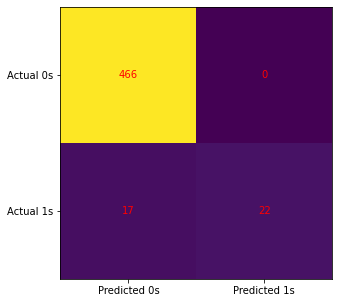

In [23]:
cm = confusion_matrix(y_test, y_pred_t)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

